<br><br>
<img src='https://www.riotgames.com/darkroom/1000/fab68f870f6da8998086165e608ea621:659056e32b0511d7f8525348809721ff/tft.jpg' width="700px">  
<br>

# Team Fight Tactics Challengers games analysis

## Game Description
Put your team-building skills to the test in Teamfight Tactics, the ultimate PvP strategy game from the studio behind League of Legends.

The game centers around eight players who construct teams to fight one another and be the last player standing. The battlefield consists of hexagons, where players can strategically place units on the hexagons on their side of the game board between rounds. During each round, a short battle automatically commences, with two players matched randomly for that round, or else paired against computer-controlled enemies. In the rounds against computer-controlled enemies, each enemy has a chance to drop gold, units, or items that the player can use. Health lost from losing a round is calculated with a combination of set damage per round and how many units an opponent had still alive.

## **TLDR**: 8 players poker game that involved probability for data analysis and game meta for predictor feature analysis. ##




## **Objective** of this notebook to analysis the best strategy to use for Team Fight Tactics.

## Datasets

**Target Label**: *placement*
1 is best. Lower is better.

**Set**
Dragonlands 	June 8, 2022 	Dragons

In [1121]:
# %pip install git+https://github.com/tensorflow/docs

import requests
import os.path
from datetime import date, datetime
import asyncio
import json
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pathlib
import pandas as pd
import seaborn as sns
# import tensorflow as tf
import time
# from tensorflow import keras
# from tensorflow.keras import layers
# import tensorflow_docs as tfdocs
# import tensorflow_docs.plots
# import tensorflow_docs.modeling
from riotwatcher import TftWatcher, ApiError

from utils.configuration import settings
from utils.utils import *
from tft.api import *

pd.options.mode.chained_assignment = None  # default='warn'

# Set Matplotlib defaults
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True, figsize=(10, 8))
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=16,
    titlepad=10,
)
plot_params = dict(
    color="0.75",
    style=".-",
    markeredgecolor="0.25",
    markerfacecolor="0.25",
    legend=True,
)
%config InlineBackend.figure_format = 'retina'


In [1122]:
API_KEY = settings.api_key
ASSETS_DIR = settings.assets_dir
MAX_COUNT = settings.max_count

SERVER = 'na1'  # euw1 na1 kr oc1
LEAGUE='challengers'
LATEST_RELEASE = '12.12.450.4196' # '12.12.450.4196'
PATCH = date(2022, 7, 1)

TARGETNAME = 'placement'

# Data Loading

In [1123]:
raw_df = pd.read_pickle(os.path.join(ASSETS_DIR, f'{SERVER}_{LEAGUE}_{LATEST_RELEASE}_{PATCH}_matches.pickle'))

In [1124]:
raw_df

match_id  placement                         augment0  \
0     NA1_4360081160          8          TFT7_Augment_JadeEmblem   
1     NA1_4360081160          1         TFT6_Augment_SecondWind1   
2     NA1_4360081160          6          TFT6_Augment_TinyTitans   
3     NA1_4360081160          3          TFT7_Augment_JadeEmblem   
4     NA1_4360081160          2  TFT6_Augment_CelestialBlessing1   
...              ...        ...                              ...   
7291  NA1_4360073361          1       TFT6_Augment_PortableForge   
7292  NA1_4360073361          4        TFT7_Augment_UrfsGrabBag1   
7293  NA1_4360073361          3      TFT6_Augment_Electrocharge2   
7294  NA1_4360073361          5       TFT6_Augment_RichGetRicher   
7295  NA1_4360073361          7        TFT7_Augment_UrfsGrabBag1   

                             augment1                            augment2  \
0            TFT6_Augment_FirstAidKit    TFT6_Augment_CyberneticImplants2   
1          TFT6_Augment_PandorasItems            TFT6_Augment_Distancing2   
2           TFT7_Augment_BruiserTrait             TFT7_Augment_BigFriend2   
3             TFT6_Augment_Diversify1  TFT7_Augment_JadeEternalProtection   
4           TFT7_Augment_BestFriends1             TFT6_Augment_Diversify2   
...                               ...                                 ...   
7291          TFT6_Augment_Diversify1             TFT6_Augment_Diversify3   
7292      TFT7_Augment_BandOfThieves1    TFT6_Augment_CyberneticImplants3   
7293        TFT7_Augment_BruiserTrait           TFT7_Augment_UrfsGrabBag2   
7294      TFT7_Augment_BandOfThieves1             TFT6_Augment_MaxLevel10   
7295  TFT6_Augment_CelestialBlessing1           TFT7_Augment_GuildEmblem2   

      Set7_Bard  Set7_Dragon  Set7_Dragonmancer  Set7_Evoker  Set7_Guild  ...  \
0           1.0          1.0                0.0          0.0         1.0  ...   
1           1.0          NaN                NaN          NaN         5.0  ...   
2           NaN          1.0                NaN          NaN         NaN  ...   
3           NaN          1.0                1.0          NaN         NaN  ...   
4           NaN          1.0                NaN          1.0         NaN  ...   
...         ...          ...                ...          ...         ...  ...   
7291        1.0          NaN                0.0          NaN         3.0  ...   
7292        NaN          1.0                NaN          NaN         1.0  ...   
7293        NaN          1.0                0.0          NaN         NaN  ...   
7294        NaN          1.0                1.0          0.0         NaN  ...   
7295        NaN          NaN                NaN          NaN         2.0  ...   

      TFT7_Sejuani_item2  TFT7_Jinx_item1  TFT7_Thresh_item2  \
0                    NaN              NaN                NaN   
1                    NaN              NaN                NaN   
2                    NaN              NaN                NaN   
3                    NaN              NaN                NaN   
4                    NaN              NaN                NaN   
...                  ...              ...                ...   
7291                 NaN              NaN                NaN   
7292                 NaN              NaN                NaN   
7293                 NaN              NaN                NaN   
7294                 NaN              NaN                NaN   
7295                 NaN              NaN                NaN   

      TFT7_TahmKench_item1  TFT7_TahmKench_item2  TFT7_Senna_item0  \
0                      NaN                   NaN               NaN   
1                      NaN                   NaN               NaN   
2                      NaN                   NaN               NaN   
3                      NaN                   NaN               NaN   
4                      NaN                   NaN               NaN   
...                    ...                   ...               ...   
7291                   NaN            

In [1125]:
def reduce_mem_usage(df, verbose=True):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2

    for col in df.columns:
        col_type = df[col].dtypes

        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()

            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)

    end_mem = df.memory_usage().sum() / 1024**2

    if verbose:
        print('Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction)'.format(end_mem, 100 * (start_mem - end_mem) / start_mem))
 
    return df

In [1126]:
raw_df = reduce_mem_usage(raw_df)

Mem. usage decreased to 12.39 Mb (16.6% reduction)


In [1127]:
raw_df[raw_df['match_id'].duplicated()]

match_id  placement                         augment0  \
1     NA1_4360081160          1         TFT6_Augment_SecondWind1   
2     NA1_4360081160          6          TFT6_Augment_TinyTitans   
3     NA1_4360081160          3          TFT7_Augment_JadeEmblem   
4     NA1_4360081160          2  TFT6_Augment_CelestialBlessing1   
5     NA1_4360081160          4    TFT6_Augment_ThrillOfTheHunt1   
...              ...        ...                              ...   
7291  NA1_4360073361          1       TFT6_Augment_PortableForge   
7292  NA1_4360073361          4        TFT7_Augment_UrfsGrabBag1   
7293  NA1_4360073361          3      TFT6_Augment_Electrocharge2   
7294  NA1_4360073361          5       TFT6_Augment_RichGetRicher   
7295  NA1_4360073361          7        TFT7_Augment_UrfsGrabBag1   

                             augment1                            augment2  \
1          TFT6_Augment_PandorasItems            TFT6_Augment_Distancing2   
2           TFT7_Augment_BruiserTrait             TFT7_Augment_BigFriend2   
3             TFT6_Augment_Diversify1  TFT7_Augment_JadeEternalProtection   
4           TFT7_Augment_BestFriends1             TFT6_Augment_Diversify2   
5               TFT6_Augment_Weakspot    TFT6_Augment_CyberneticImplants2   
...                               ...                                 ...   
7291          TFT6_Augment_Diversify1             TFT6_Augment_Diversify3   
7292      TFT7_Augment_BandOfThieves1    TFT6_Augment_CyberneticImplants3   
7293        TFT7_Augment_BruiserTrait           TFT7_Augment_UrfsGrabBag2   
7294      TFT7_Augment_BandOfThieves1             TFT6_Augment_MaxLevel10   
7295  TFT6_Augment_CelestialBlessing1           TFT7_Augment_GuildEmblem2   

      Set7_Bard  Set7_Dragon  Set7_Dragonmancer  Set7_Evoker  Set7_Guild  ...  \
1           1.0          NaN                NaN          NaN         5.0  ...   
2           NaN          1.0                NaN          NaN         NaN  ...   
3           NaN          1.0                1.0          NaN         NaN  ...   
4           NaN          1.0                NaN          1.0         NaN  ...   
5           1.0          1.0                NaN          1.0         1.0  ...   
...         ...          ...                ...          ...         ...  ...   
7291        1.0          NaN                0.0          NaN         3.0  ...   
7292        NaN          1.0                NaN          NaN         1.0  ...   
7293        NaN          1.0                0.0          NaN         NaN  ...   
7294        NaN          1.0                1.0          0.0         NaN  ...   
7295        NaN          NaN                NaN          NaN         2.0  ...   

      TFT7_Sejuani_item2  TFT7_Jinx_item1  TFT7_Thresh_item2  \
1                    NaN              NaN                NaN   
2                    NaN              NaN                NaN   
3                    NaN              NaN                NaN   
4                    NaN              NaN                NaN   
5                    NaN              NaN                NaN   
...                  ...              ...                ...   
7291                 NaN              NaN                NaN   
7292                 NaN              NaN                NaN   
7293                 NaN              NaN                NaN   
7294                 NaN              NaN                NaN   
7295                 NaN              NaN                NaN   

      TFT7_TahmKench_item1  TFT7_TahmKench_item2  TFT7_Senna_item0  \
1                      NaN                   NaN               NaN   
2                      NaN                   NaN               NaN   
3                      NaN                   NaN               NaN   
4                      NaN                   NaN               NaN   
5                      NaN                   NaN               NaN   
...                    ...                   ...               ...   
7291                   NaN            

# Data Cleanup

In [1128]:
def check_NA(df):
    missing_val = df.isnull().sum()
    print(missing_val[missing_val > 0])

In [1129]:
# Check NA
check_NA(raw_df)

augment1                5
augment2               29
Set7_Bard            5132
Set7_Dragon          2150
Set7_Dragonmancer    4044
                     ... 
TFT7_Senna_item0     7274
TFT7_Jinx_item2      7255
TFT7_Senna_item1     7281
TFT7_Aatrox_item2    7282
TFT7_Senna_item2     7287
Length: 264, dtype: int64


In [1130]:
def impute(df):
    for name in df.select_dtypes("number"):
        df[name] = df[name].fillna(0)
    for name in df.select_dtypes("object"):
        df[name] = df[name].fillna("None")
    return df

In [1131]:
raw_df = impute(raw_df)

In [1132]:
numeric_cols = raw_df.select_dtypes(include=np.number).columns.tolist()
categorical_cols = raw_df.select_dtypes(include=['object']).columns.tolist()

In [1133]:
def check_categorical_cols(df):
    print('Values along with Count in the Categorical Columns','\n')
    for i in categorical_cols:
        print(i)
        print(df[i].value_counts(),'\n')  

In [1134]:
check_categorical_cols(raw_df)

Values along with Count in the Categorical Columns 

match_id
NA1_4360081160    8
NA1_4359644301    8
NA1_4359576097    8
NA1_4359365113    8
NA1_4360043027    8
                 ..
NA1_4361955823    8
NA1_4361791501    8
NA1_4361726336    8
NA1_4361710655    8
NA1_4360073361    8
Name: match_id, Length: 912, dtype: int64 

augment0
TFT6_Augment_PortableForge           297
TFT6_Augment_SecondWind2             237
TFT6_Augment_Electrocharge2          224
TFT6_Augment_Weakspot                212
TFT6_Augment_TradeSector             208
                                    ... 
TFT7_Augment_ShapeshifterTrait2        2
TFT6_Augment_Distancing3               2
TFT6_Augment_BinaryAirdrop             1
TFT7_Augment_ShimmerscaleSpending      1
TFT7_Augment_RagewingTrait             1
Name: augment0, Length: 179, dtype: int64 

augment1
TFT6_Augment_Weakspot            312
TFT6_Augment_SecondWind1         291
TFT6_Augment_TinyTitans          263
TFT6_Augment_Electrocharge1      223
TFT6_Augment_

In [1135]:
raw_df.describe()

placement    Set7_Bard  Set7_Dragon  Set7_Dragonmancer  Set7_Evoker  \
count  7296.000000  7296.000000  7296.000000        7296.000000  7296.000000   
mean      4.500000     0.296601     0.735471           0.148986     0.243010   
std       2.291445     0.456790     0.507039           0.450581     0.441839   
min       1.000000     0.000000     0.000000           0.000000     0.000000   
25%       2.750000     0.000000     0.000000           0.000000     0.000000   
50%       4.500000     0.000000     1.000000           0.000000     0.000000   
75%       6.250000     1.000000     1.000000           0.000000     0.000000   
max       8.000000     1.000000     2.000000           3.000000     3.000000   

        Set7_Guild    Set7_Jade  Set7_Legend  Set7_Mystic  Set7_Shapeshifter  \
count  7296.000000  7296.000000  7296.000000  7296.000000        7296.000000   
mean      1.117325     0.483004     0.021382     0.331689           0.291667   
std       1.161737     0.883936     0.144663     0.600584           0.582982   
min       0.000000     0.000000     0.000000     0.000000           0.000000   
25%       0.000000     0.000000     0.000000     0.000000           0.000000   
50%       1.000000     0.000000     0.000000     0.000000           0.000000   
75%       2.000000     1.000000     0.000000     1.000000           0.000000   
max       6.000000     4.000000     1.000000     4.000000           3.000000   

       ...    TFT7_Jinx  TFT7_Vladimir  TFT7_Skarner   TFT7_Varus  \
count  ...  7296.000000    7296.000000   7296.000000  7296.000000   
mean   ...     0.094161       0.060170      0.065652     0.121711   
std    ...     0.421543       0.373668      0.396965     0.580222   
min    ...     0.000000       0.000000      0.000000     0.000000   
25%    ...     0.000000       0.000000      0.000000     0.000000   
50%    ...     0.000000       0.000000      0.000000     0.000000   
75%    ...     0.000000       0.000000      0.000000     0.000000   
max    ...     3.000000       3.000000      3.000000     3.000000   

       TFT7_Shyvana  TFT7_Ezreal   TFT7_Senna  TFT7_Nidalee   TFT7_Taric  \
count   7296.000000  7296.000000  7296.000000   7296.000000  7296.000000   
mean       0.058799     0.074561     0.014940      0.111157     0.080044   
std        0.297528     0.396599     0.180386      0.559650     0.414814   
min        0.000000     0.000000     0.000000      0.000000     0.000000   
25%        0.000000     0.000000     0.000000      0.000000     0.000000   
50%        0.000000     0.000000     0.000000      0.000000     0.000000   
75%        0.000000     0.000000     0.000000      0.000000     0.000000   
max        2.000000     3.000000     3.000000      3.000000     3.000000   

       TFT7_AurelionSol  
count       7296.000000  
mean           0.006031  
std            0.093471  
min            0.000000  
25%            0.000000  
50%            0.000000  
75%            0.000000  
max            2.000000  

[8 rows x 88 columns]

In [1136]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7296 entries, 0 to 7295
Columns: 267 entries, match_id to TFT7_Senna_item2
dtypes: float32(87), int8(1), object(179)
memory usage: 12.4+ MB


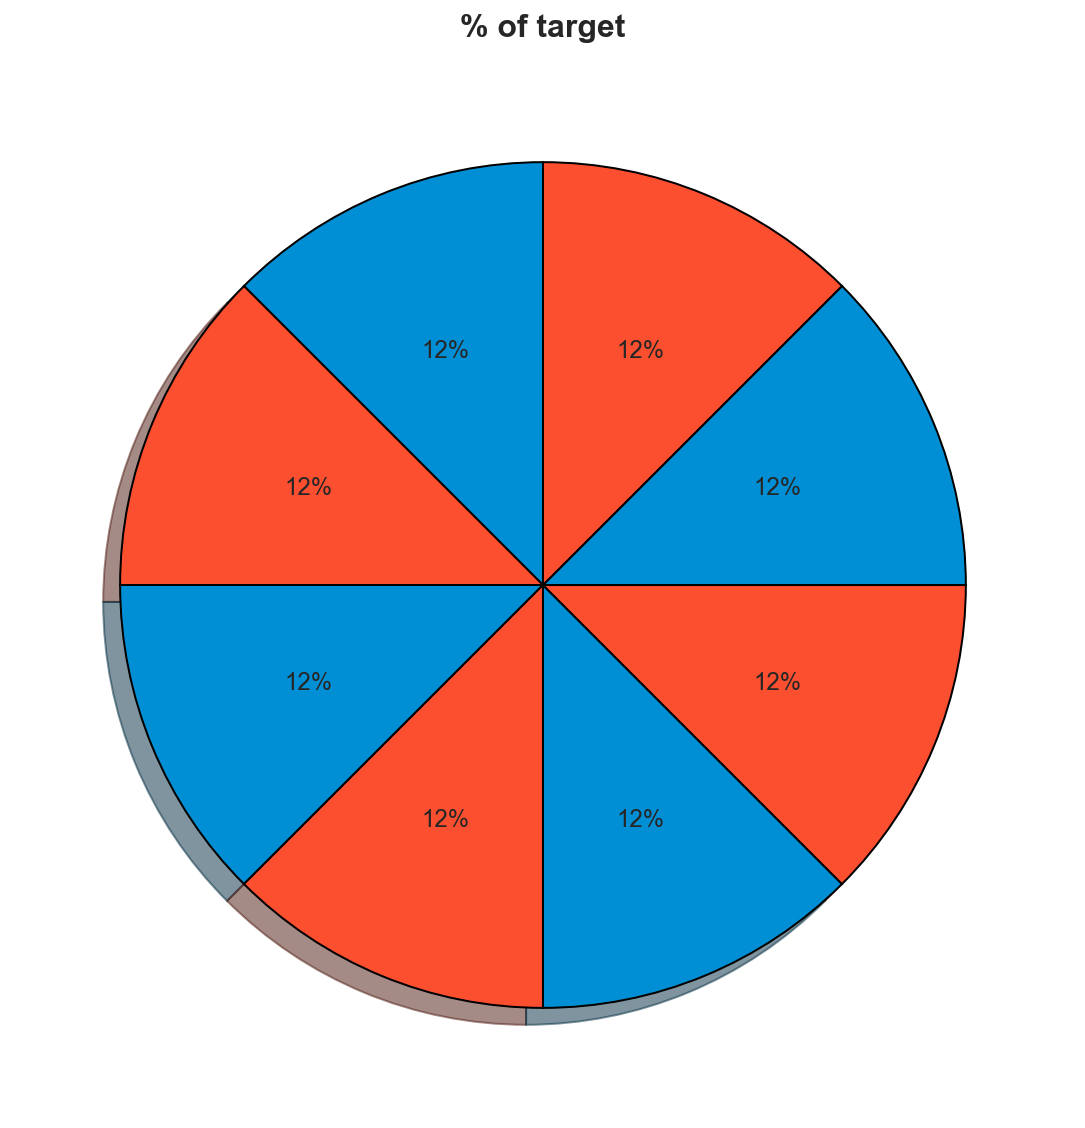

In [1137]:
target_count = raw_df[TARGETNAME].value_counts().to_frame().T

colors = ['#008fd5', '#fc4f30']
plt.figure(figsize=(8,8))
plt.title('% of target')
plt.tight_layout()
plt.pie(list(target_count.iloc[0].values), startangle=90, wedgeprops={'edgecolor': 'black'}, colors=colors, autopct='%1.f%%', shadow=True)
# plt.legend(loc='best', fontsize='medium')
plt.show()

# Preprocessing

To X, y

In [1138]:
match_id_df = raw_df['match_id']
X = raw_df.drop(['match_id'], axis=1)
# X = raw_df.copy()

In [1139]:
y = X.pop(TARGETNAME)

In [1140]:
X.fillna('', inplace=True)

In [1141]:
X.dtypes

augment0              object
augment1              object
augment2              object
Set7_Bard            float32
Set7_Dragon          float32
                      ...   
TFT7_Senna_item0      object
TFT7_Jinx_item2       object
TFT7_Senna_item1      object
TFT7_Aatrox_item2     object
TFT7_Senna_item2      object
Length: 265, dtype: object

In [1142]:
y.dtypes

dtype('int8')

In [1143]:
numeric_cols = X.select_dtypes(include=np.number).columns.tolist()
categorical_cols = X.select_dtypes(include=['object','category']).columns.tolist()

# Feature Engineering

In [1144]:
traits_col = [s for s in numeric_cols if "Set7" in s]
units_col = [s for s in numeric_cols if "TFT7" in s]
augments_col = ['augment0', 'augment1', 'augment2']
items_col = [s for s in categorical_cols if s not in augments_col]

In [1145]:
df_unique = X.nunique().to_frame().reset_index()
df_unique.columns = ['Variable','DistinctCount']

In [1146]:
df_unique.to_csv('df_unique.csv')

In [1147]:
unique_items_set = {y for col in items_col for y in X[col].unique().tolist()}
unique_augments_set = {y for col in augments_col for y in X[col].unique().tolist()}

In [1148]:
X[f'items_count'] = X[items_col].apply(lambda row: sum(x != 'None' for x in row), axis=1)

In [1149]:
X[f'traits_sum'] = X[traits_col].sum(axis=1)
X[f'units_sum'] = X[units_col].sum(axis=1)

In [1150]:
X.iloc[X[f'units_sum'].idxmax()]

augment0             TFT6_Augment_PortableForge
augment1              TFT7_Augment_UrfsGrabBag2
augment2             TFT7_Augment_PandorasBench
Set7_Bard                                   0.0
Set7_Dragon                                 0.0
                                ...            
TFT7_Aatrox_item2                          None
TFT7_Senna_item2                           None
items_count                                  21
traits_sum                                 10.0
units_sum                                  25.0
Name: 173, Length: 268, dtype: object

In [1151]:
numeric_cols = X.select_dtypes(include=np.number).columns.tolist()
categorical_cols = X.select_dtypes(include=['object','category']).columns.tolist()

In [1152]:
X[numeric_cols] = X[numeric_cols].applymap(np.int64)

In [1153]:
matches_df = X.copy()
matches_df[TARGETNAME] = y

In [1154]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7296 entries, 0 to 7295
Columns: 268 entries, augment0 to units_sum
dtypes: int64(90), object(178)
memory usage: 14.9+ MB


# Data Analysis

## Traits

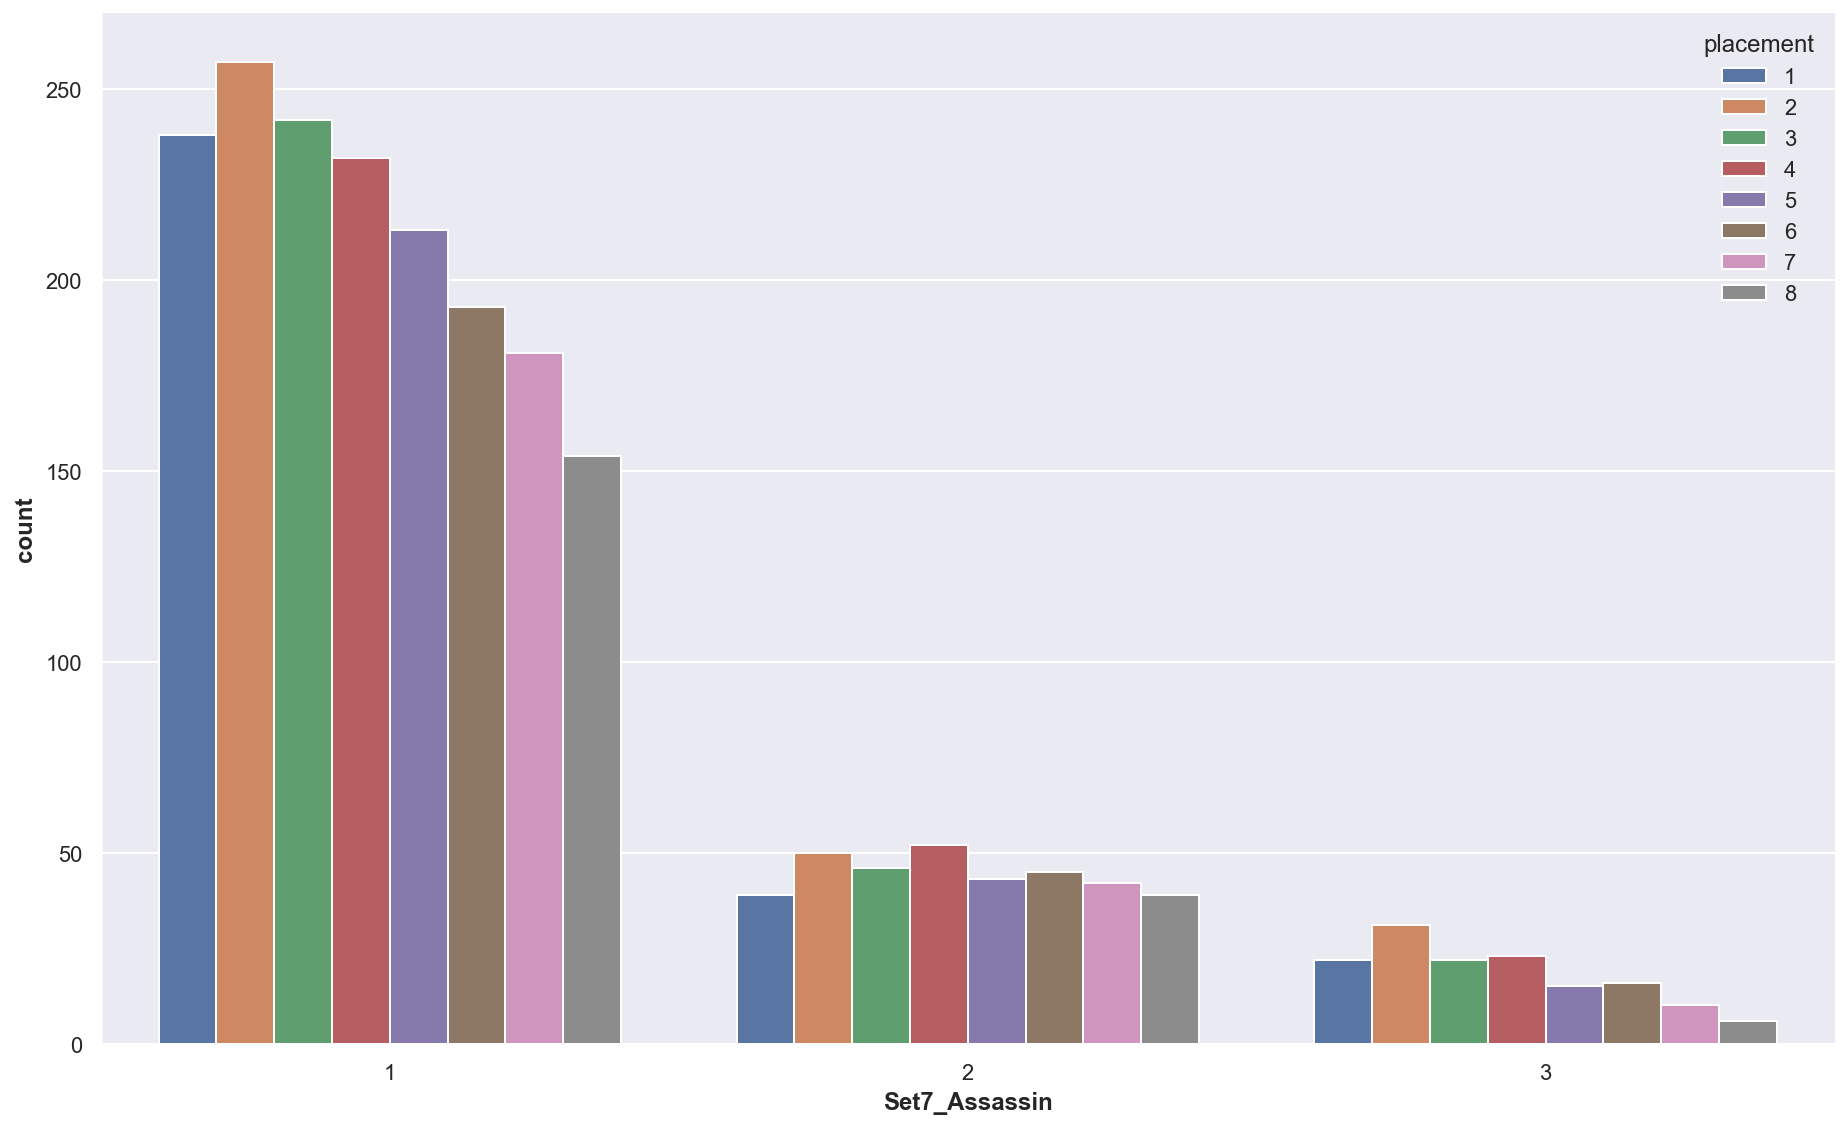

In [1155]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['Set7_Assassin']>0], x='Set7_Assassin', hue=TARGETNAME)
sns.despine()

Worst Trait.

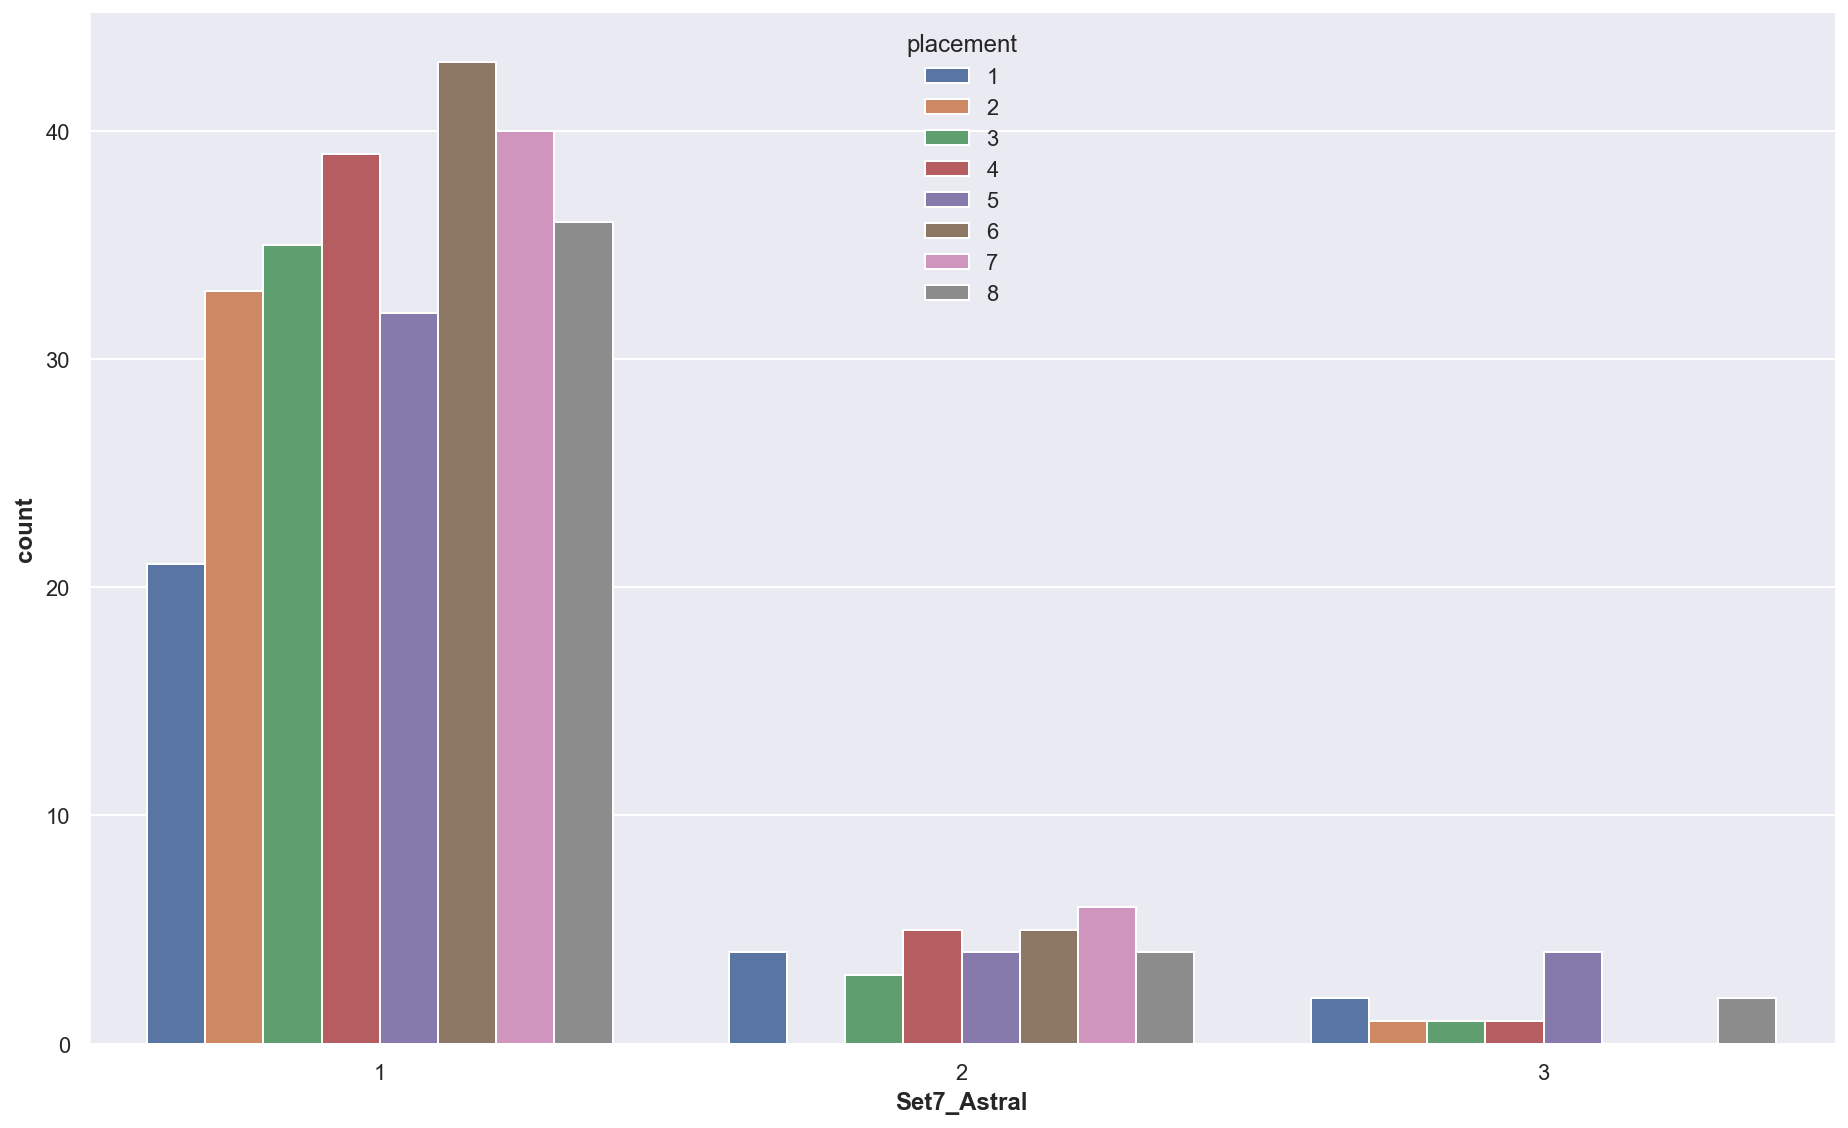

In [1156]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['Set7_Astral']>0], x='Set7_Astral', hue=TARGETNAME)
sns.despine()

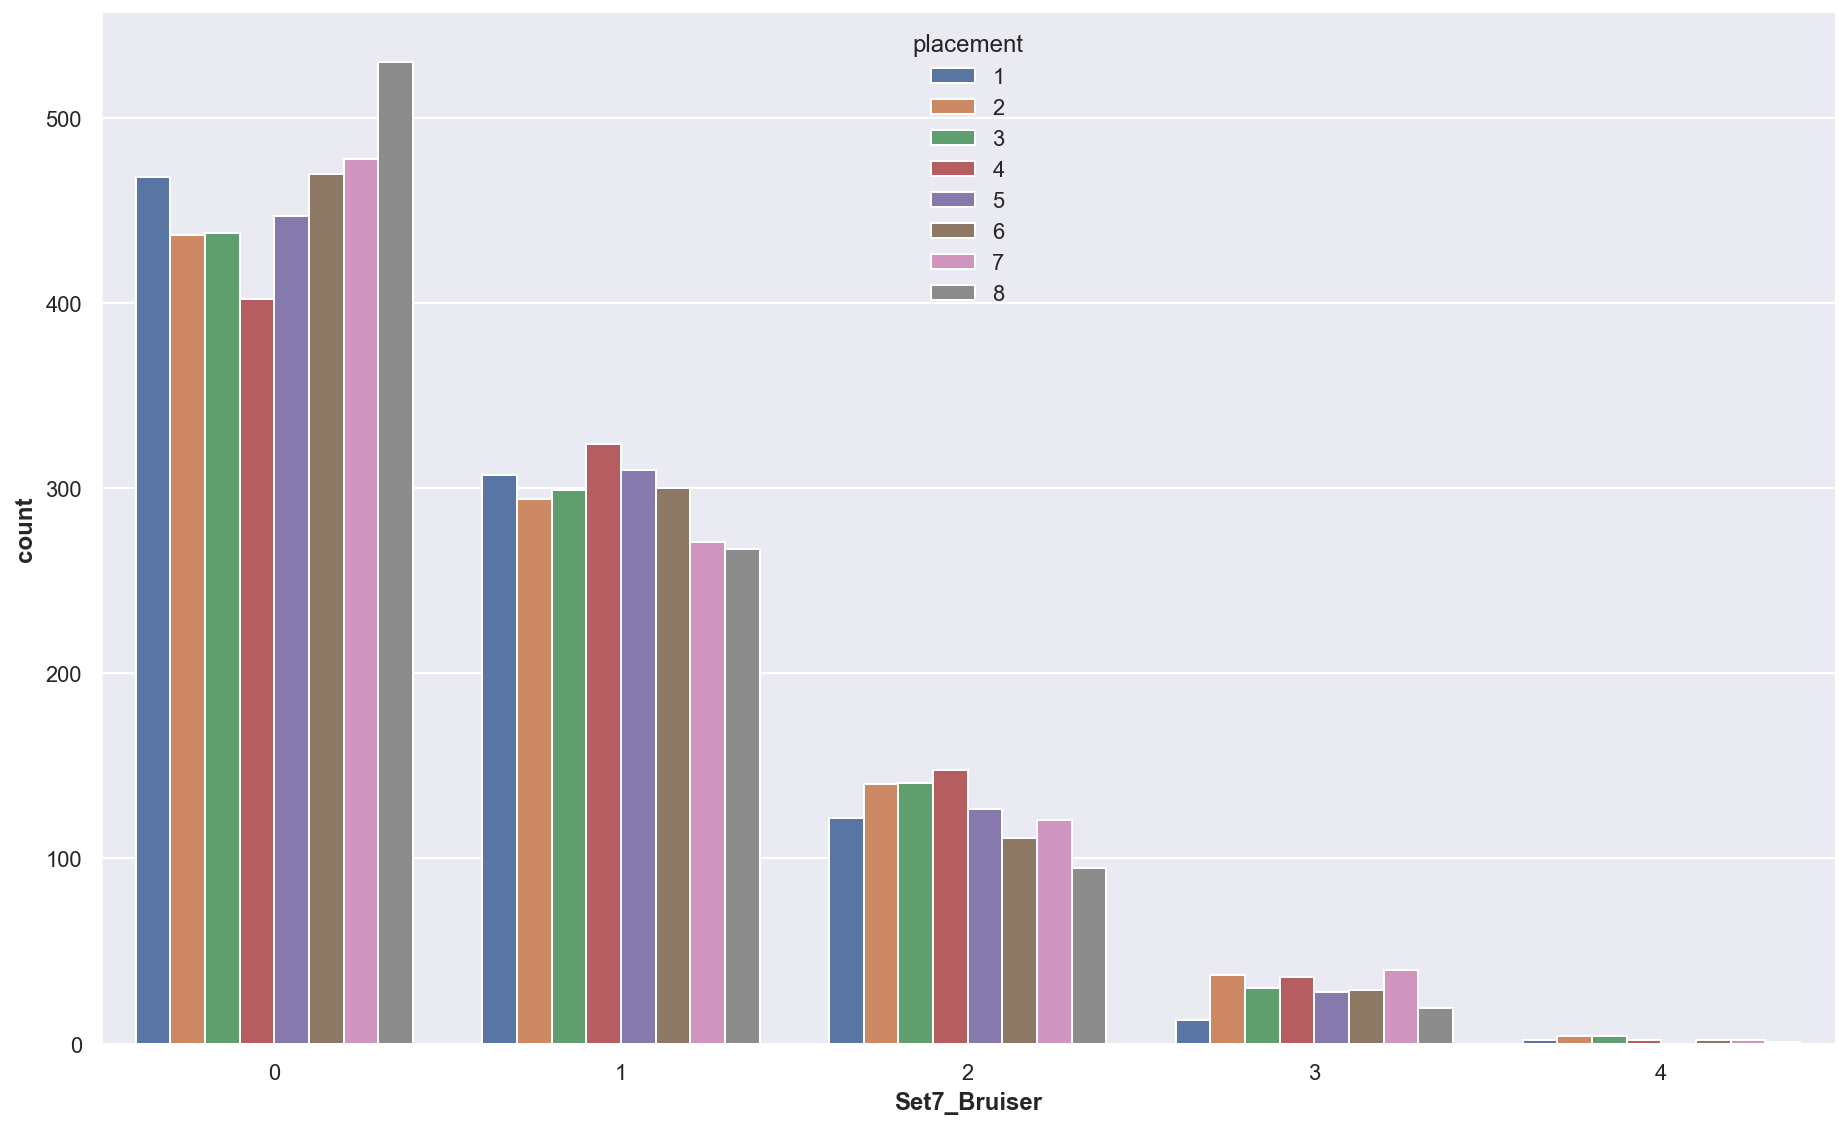

In [1157]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['Set7_Bruiser']>=0], x='Set7_Bruiser', hue=TARGETNAME)
sns.despine()

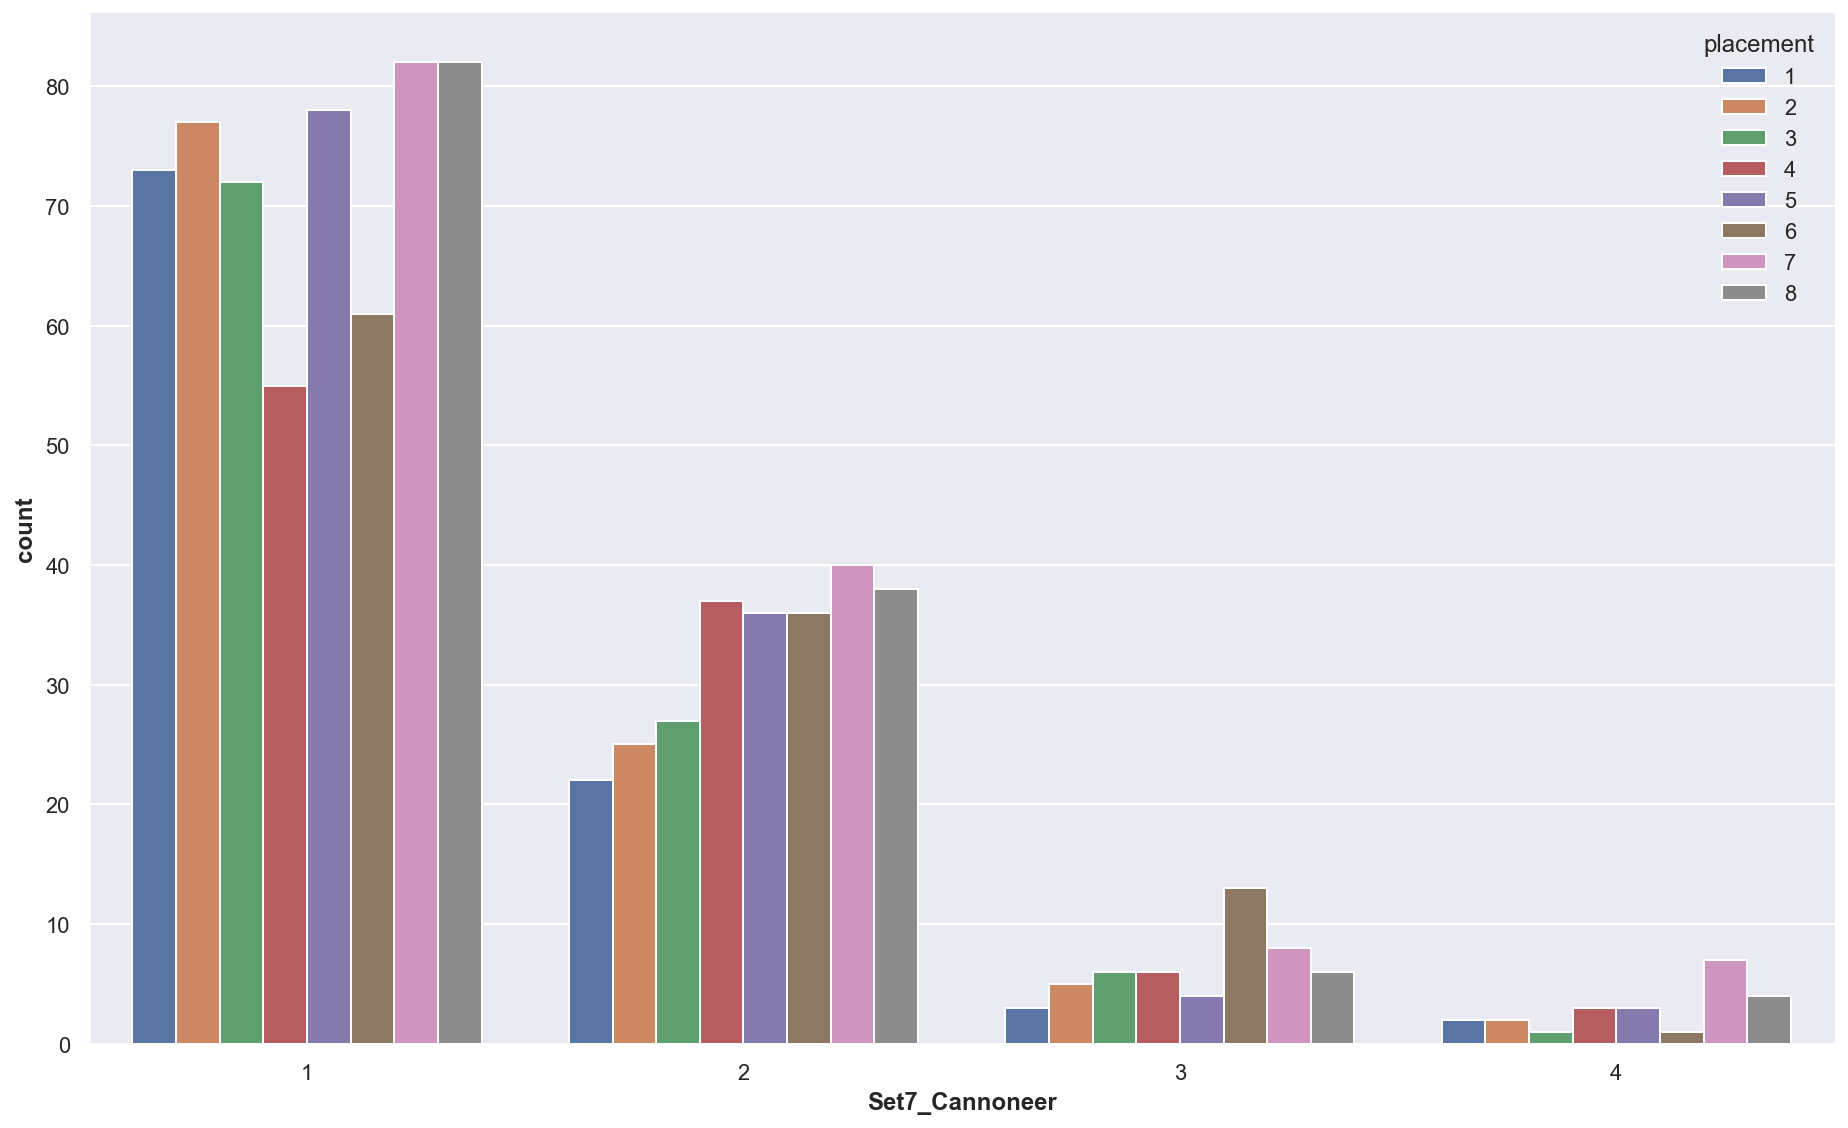

In [1158]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['Set7_Cannoneer']>0], x='Set7_Cannoneer', hue=TARGETNAME)
sns.despine()

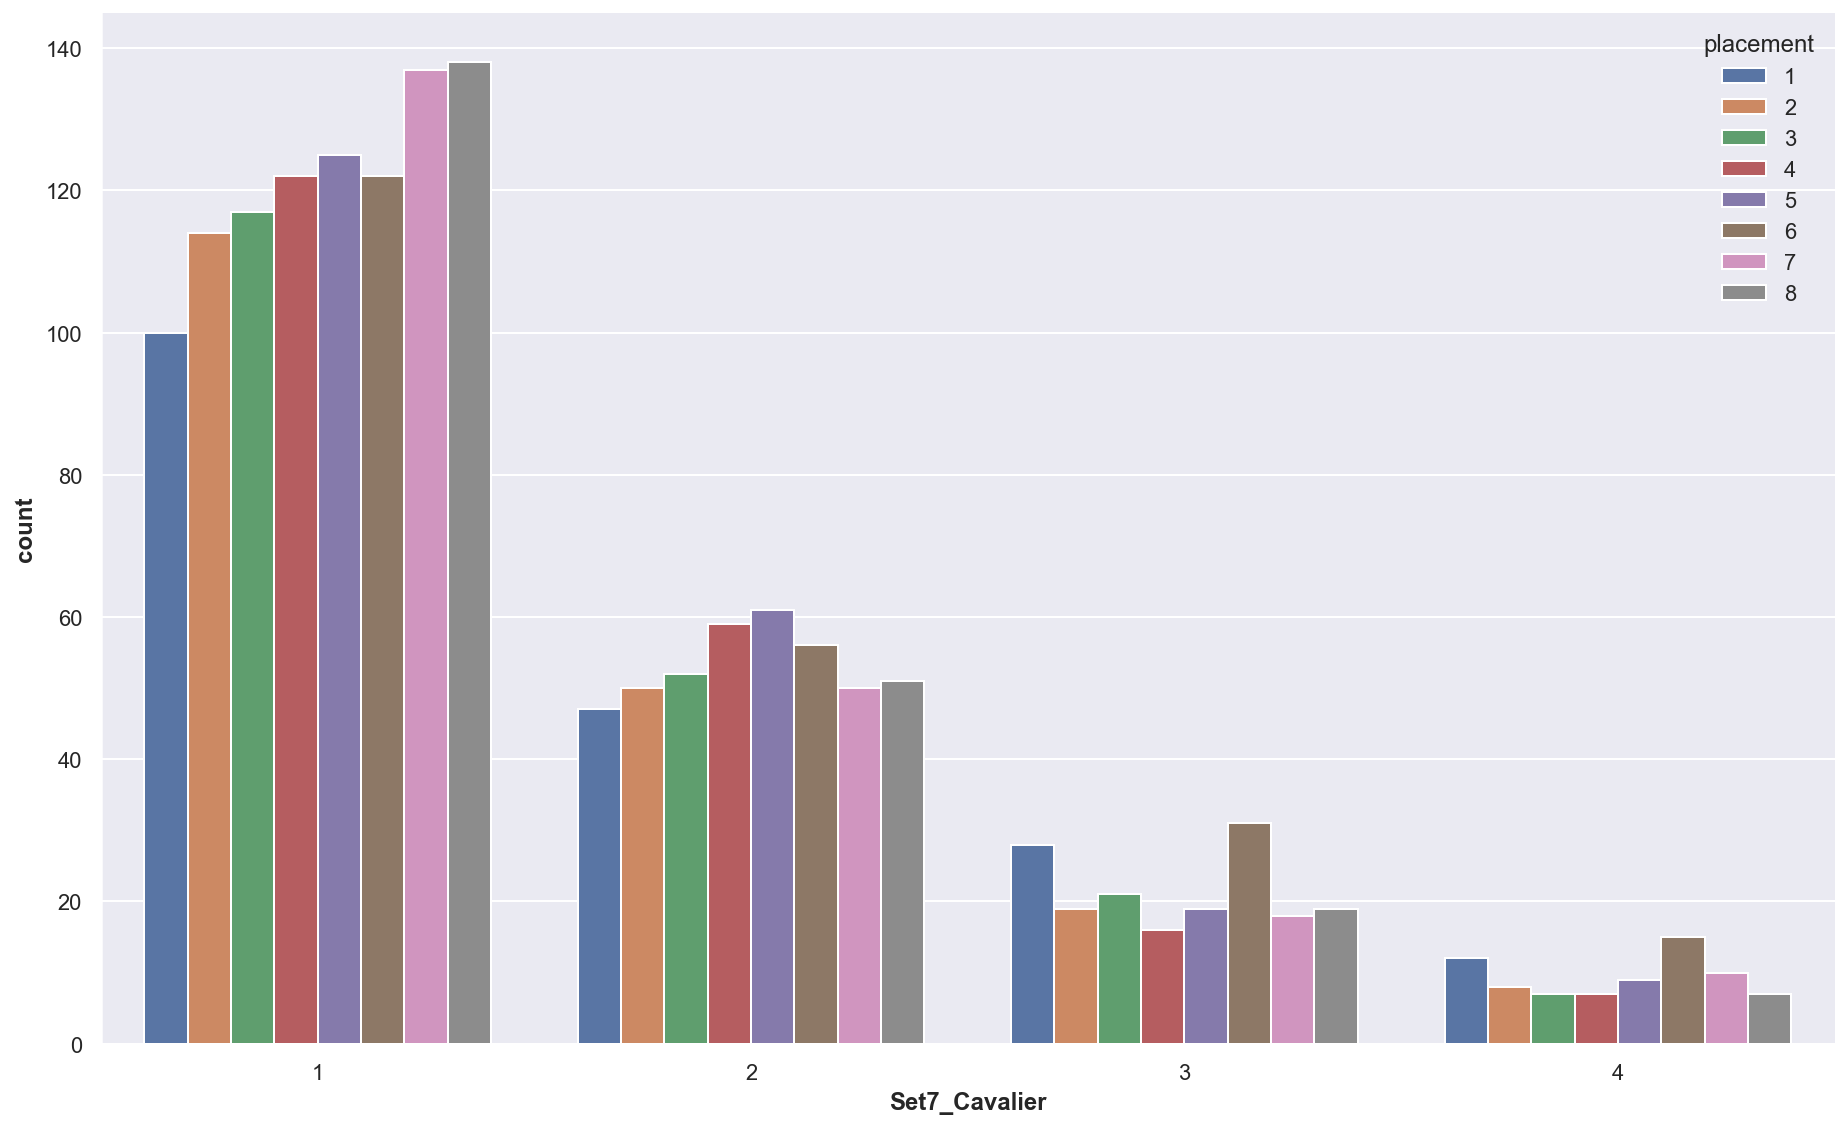

In [1159]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['Set7_Cavalier']>0], x='Set7_Cavalier', hue=TARGETNAME)
sns.despine()

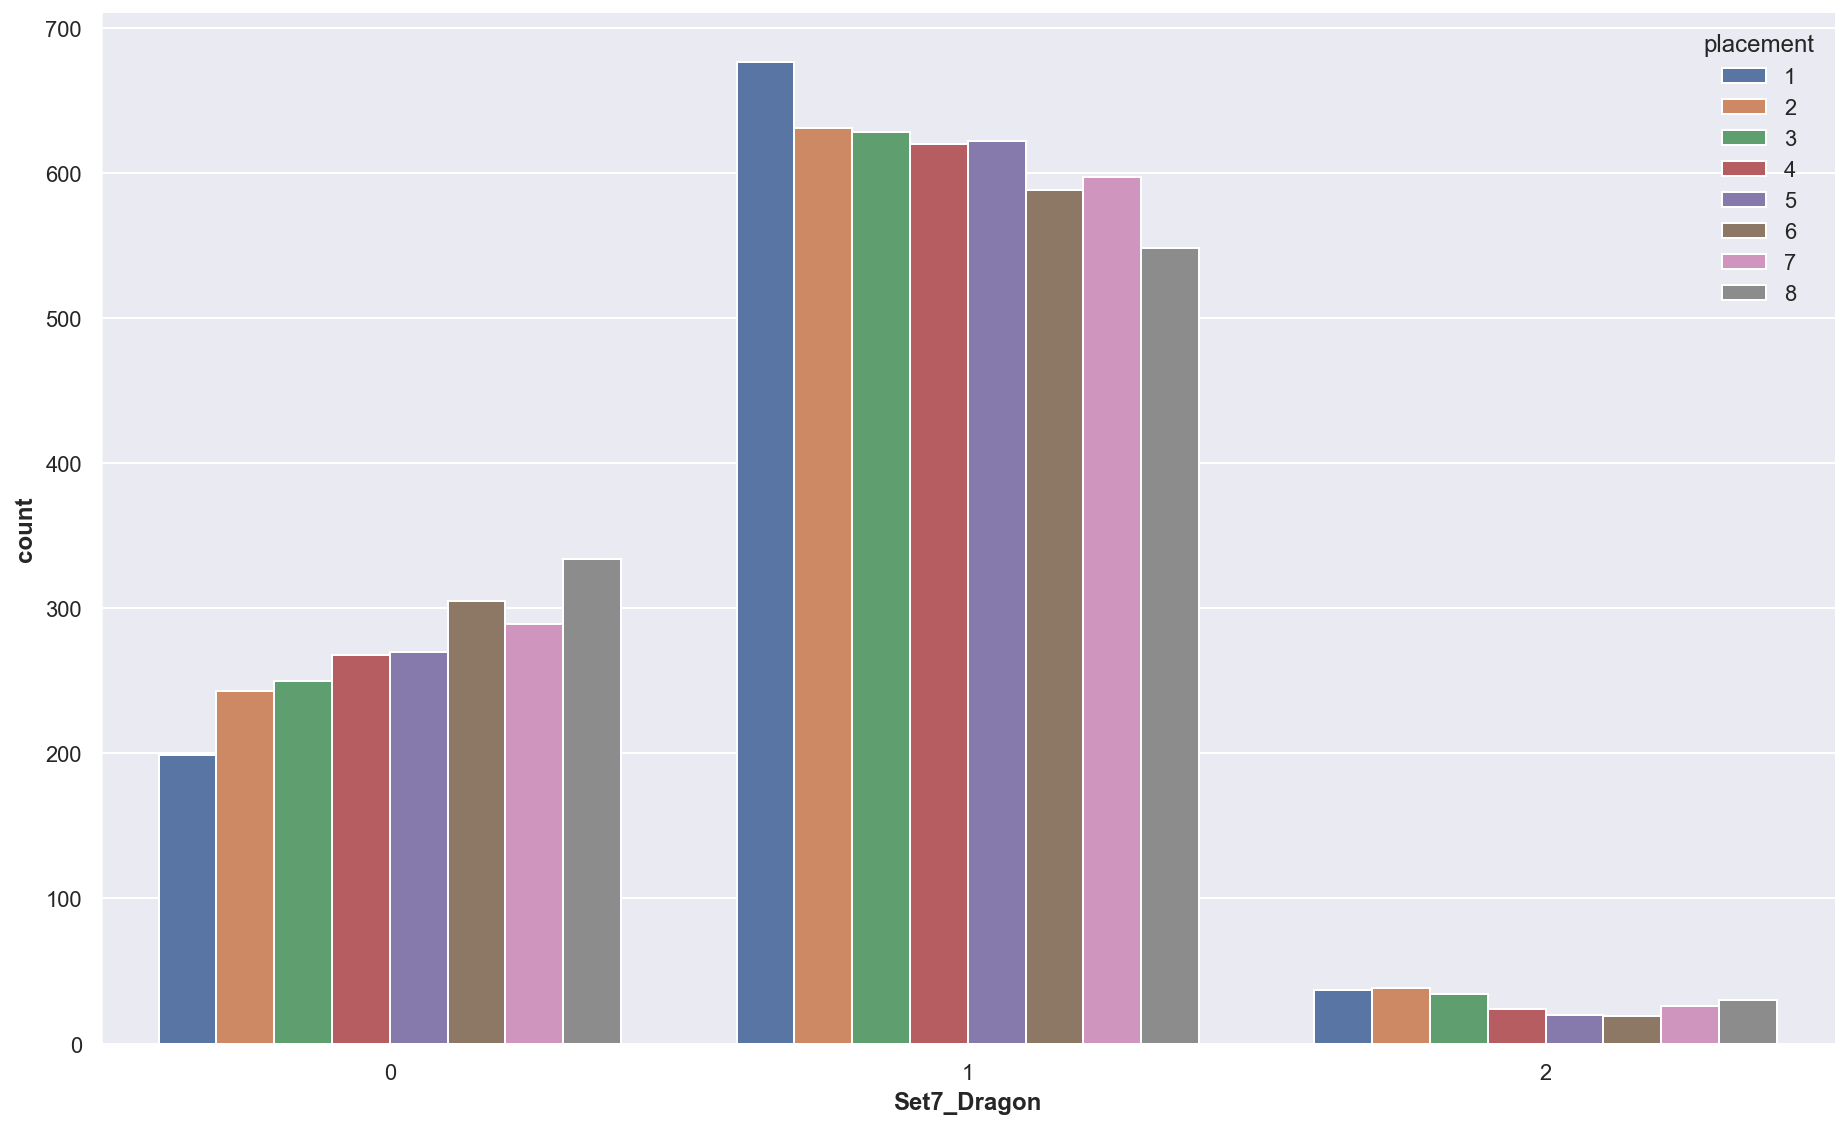

In [1160]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['Set7_Dragon']>=0], x='Set7_Dragon', hue=TARGETNAME)
sns.despine()

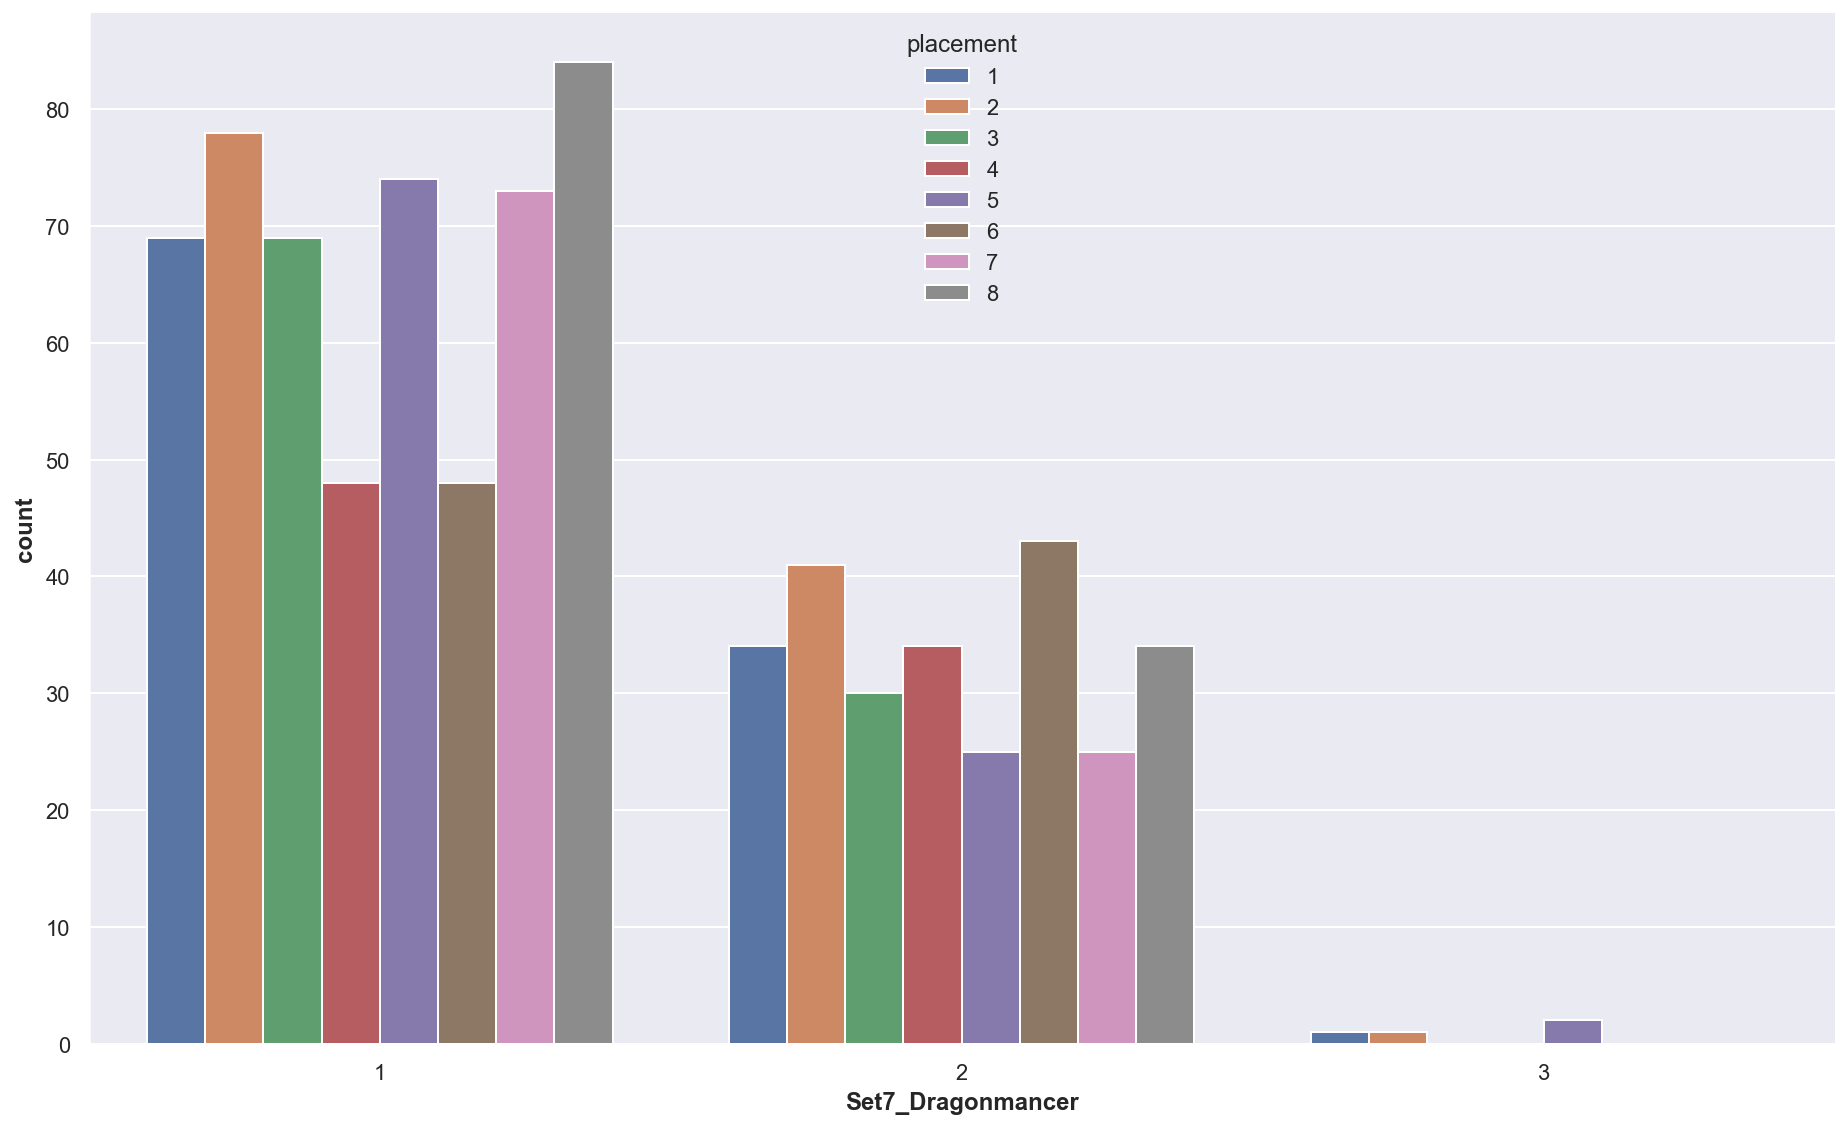

In [1161]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['Set7_Dragonmancer']>0], x='Set7_Dragonmancer', hue=TARGETNAME)
sns.despine()

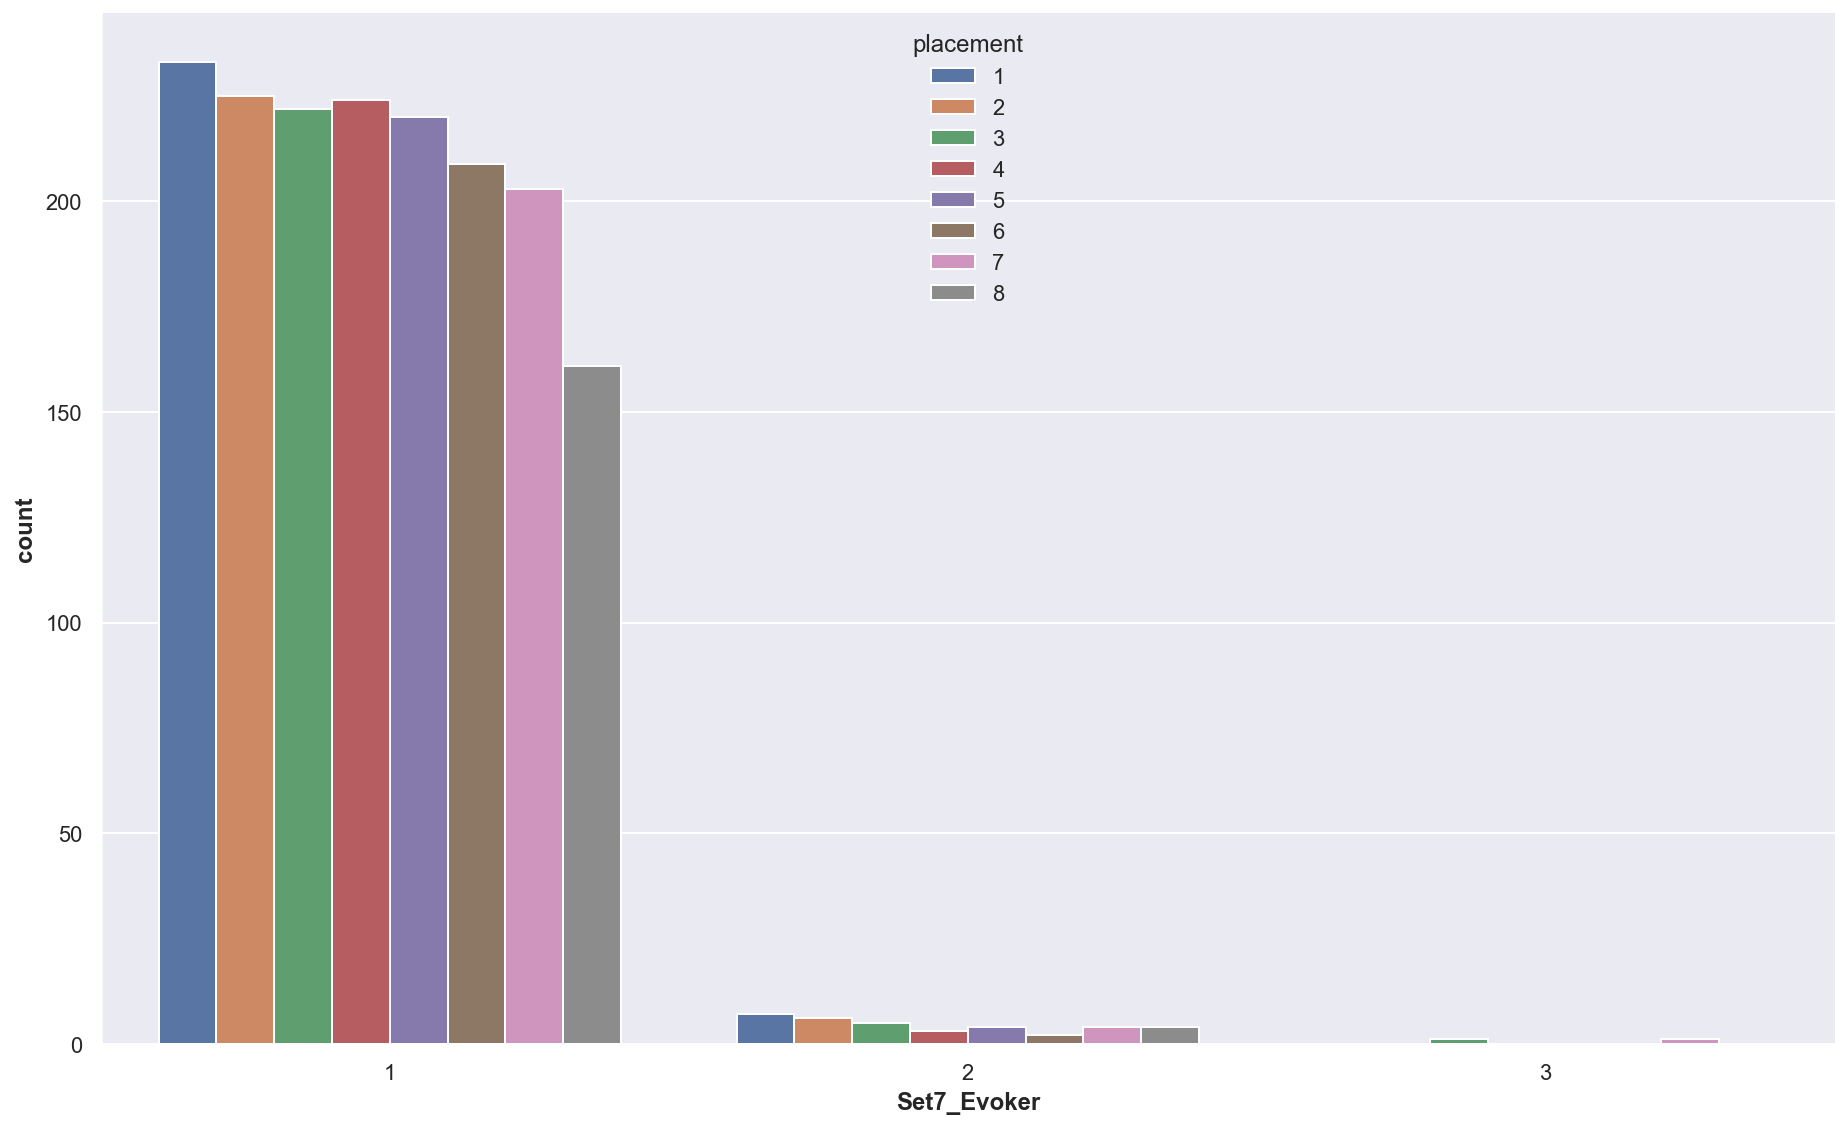

In [1162]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['Set7_Evoker']>0], x='Set7_Evoker', hue=TARGETNAME)
sns.despine()

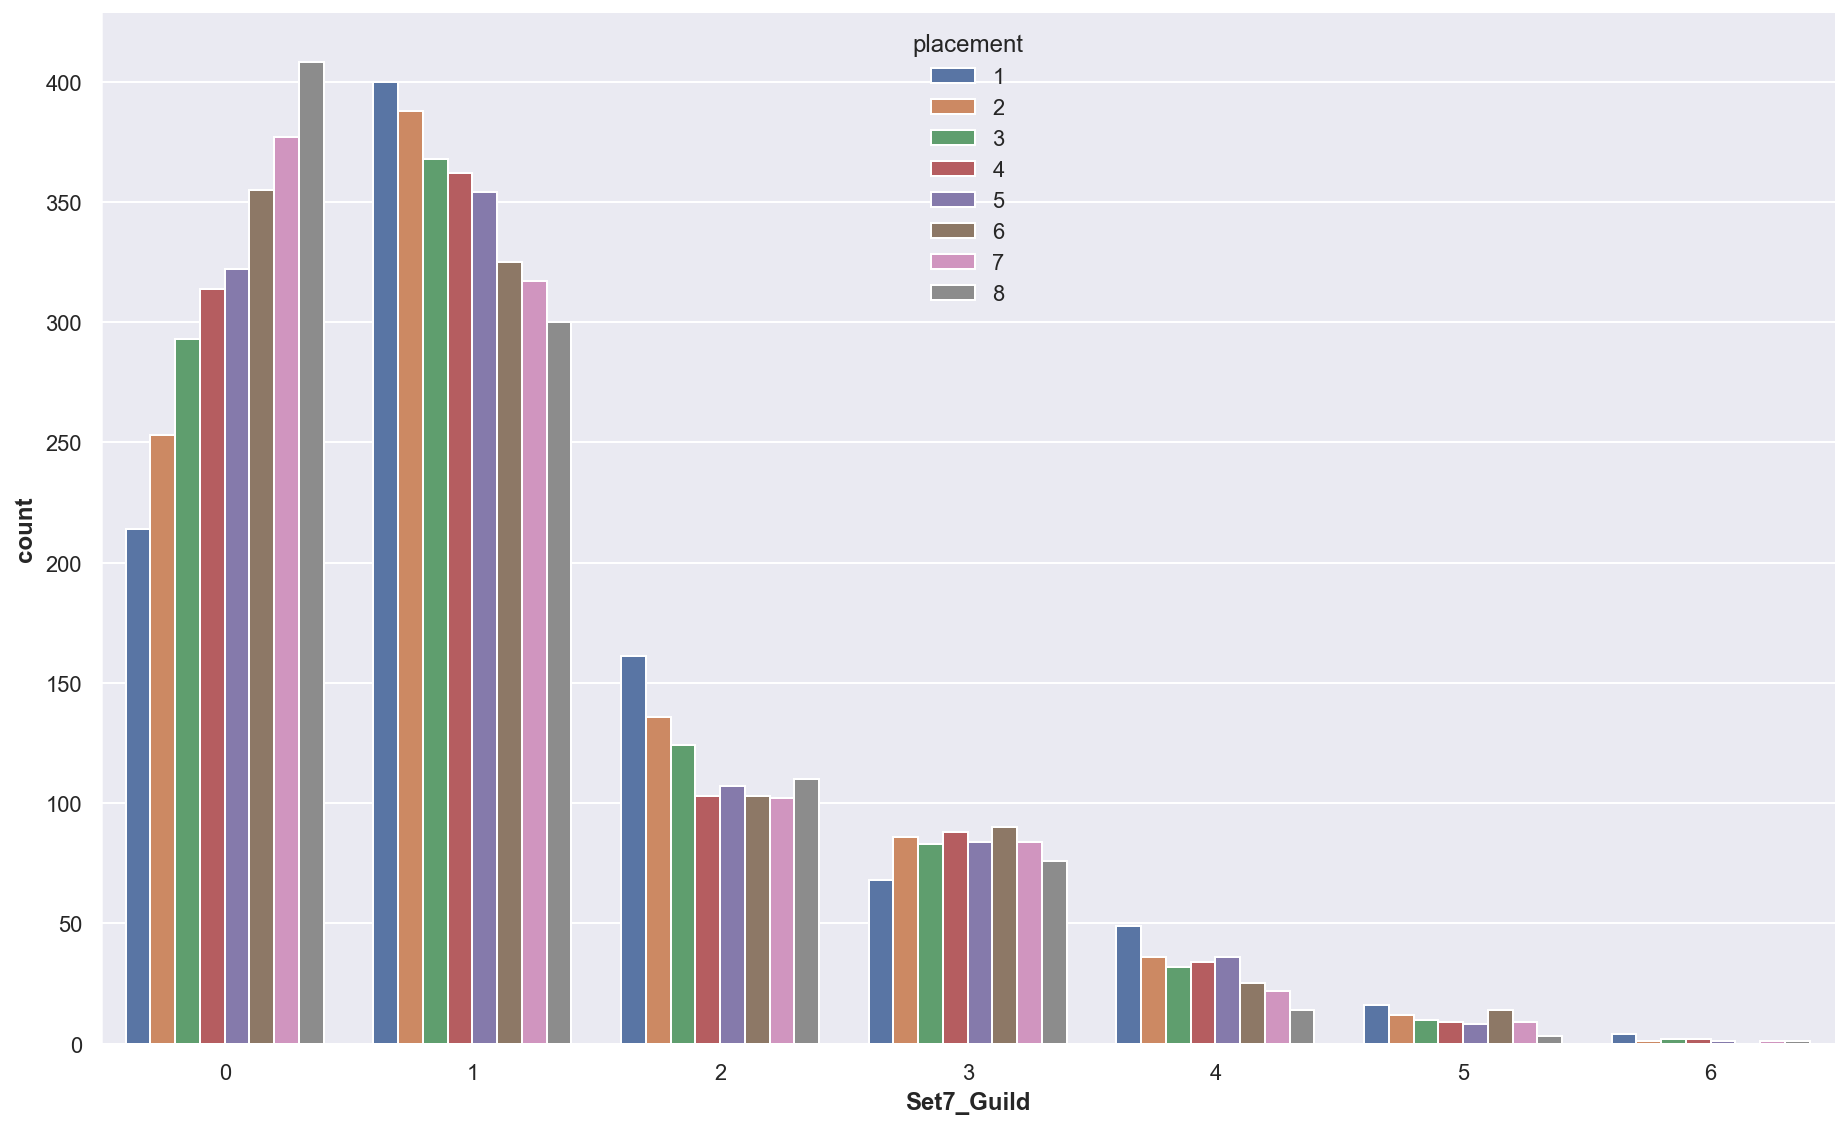

In [1163]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df, x='Set7_Guild', hue=TARGETNAME)
sns.despine()

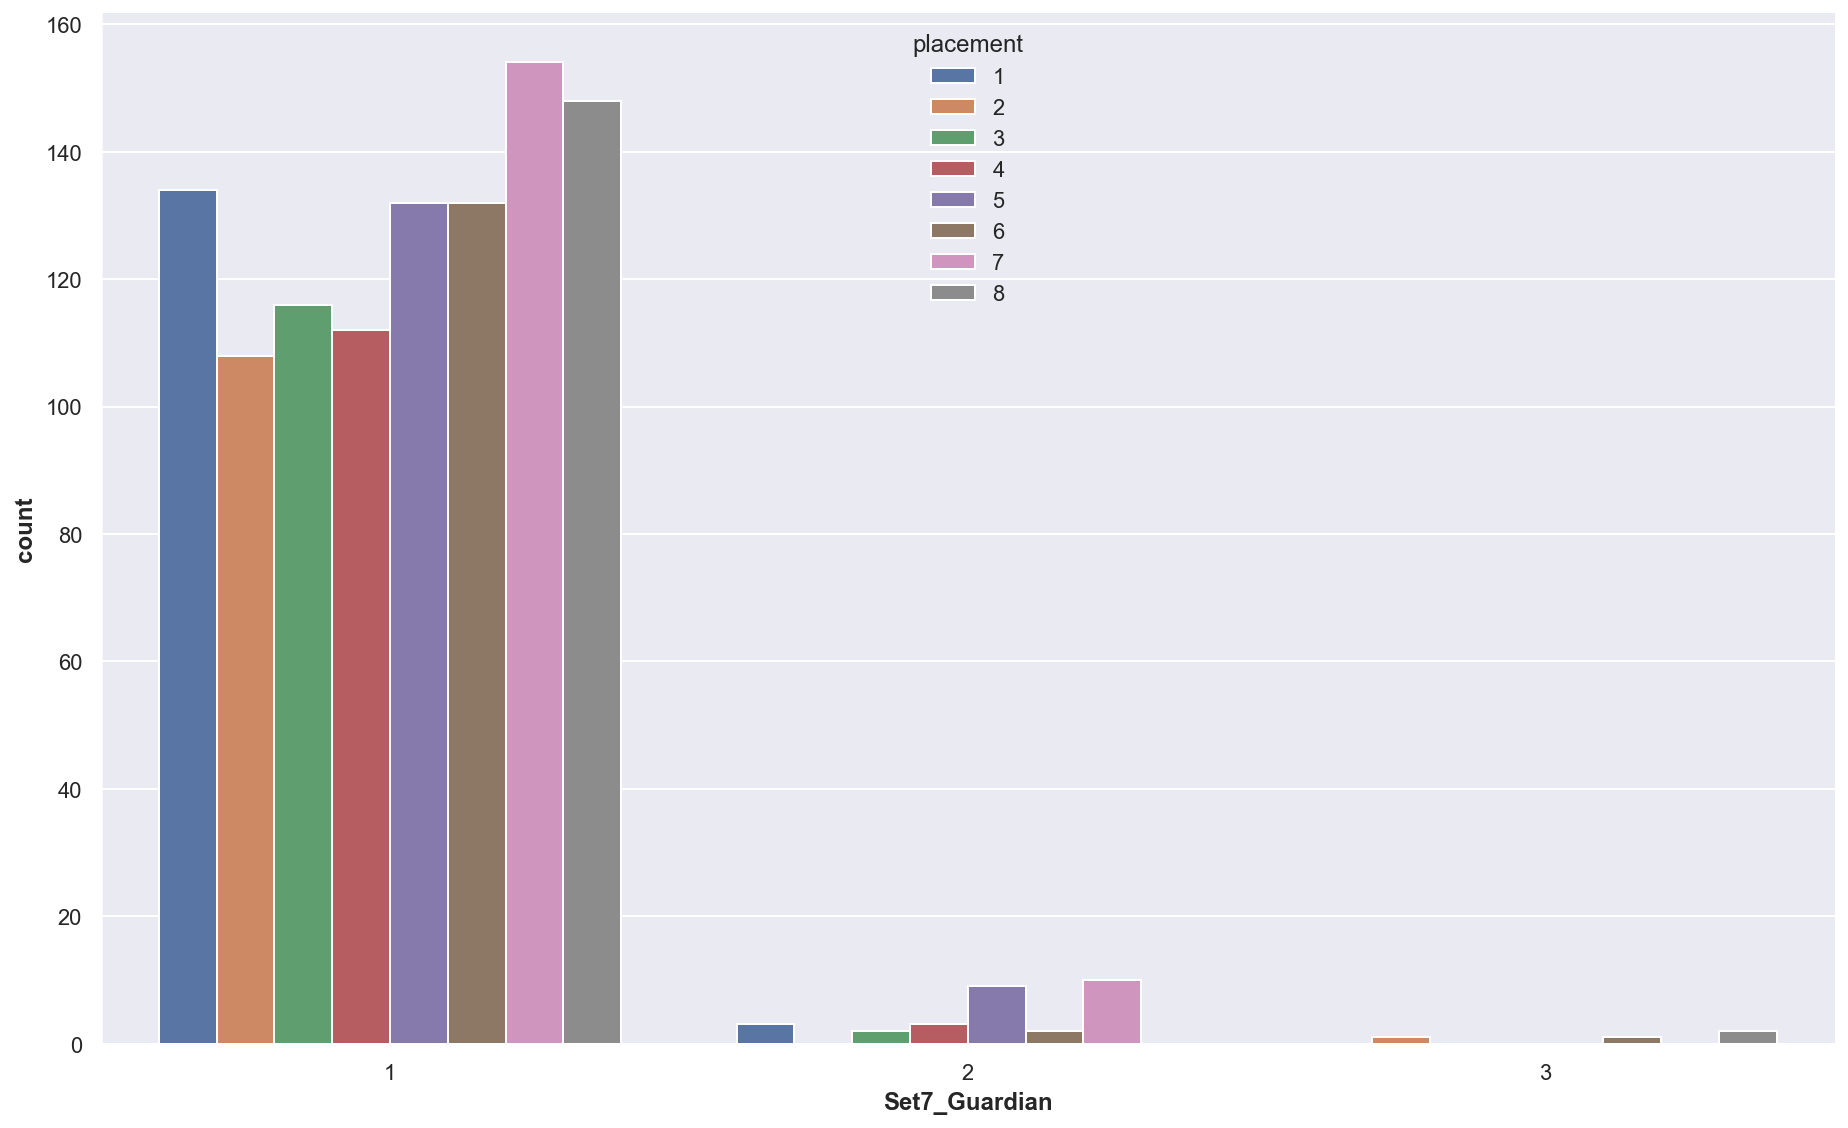

In [1164]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['Set7_Guardian']>0], x='Set7_Guardian', hue=TARGETNAME)
sns.despine()

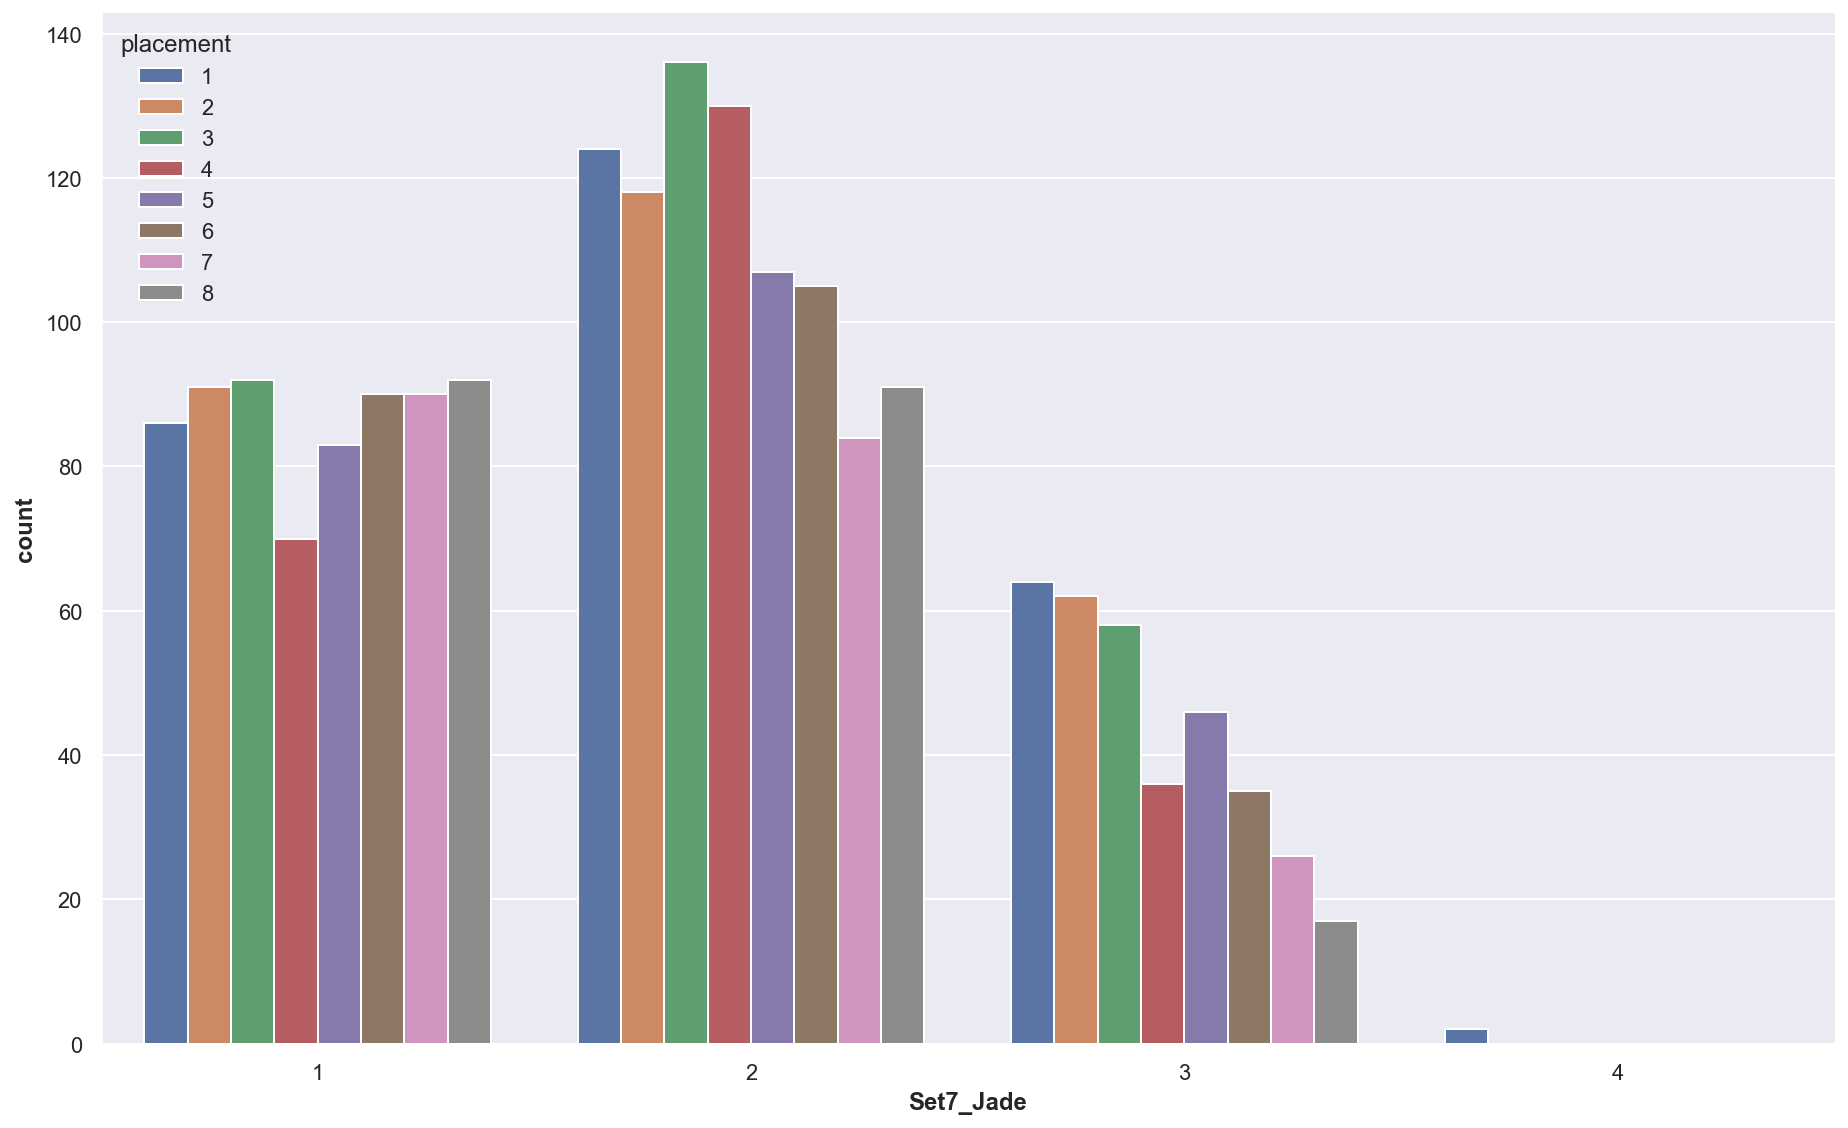

In [1165]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['Set7_Jade']>0], x='Set7_Jade', hue=TARGETNAME)
sns.despine()

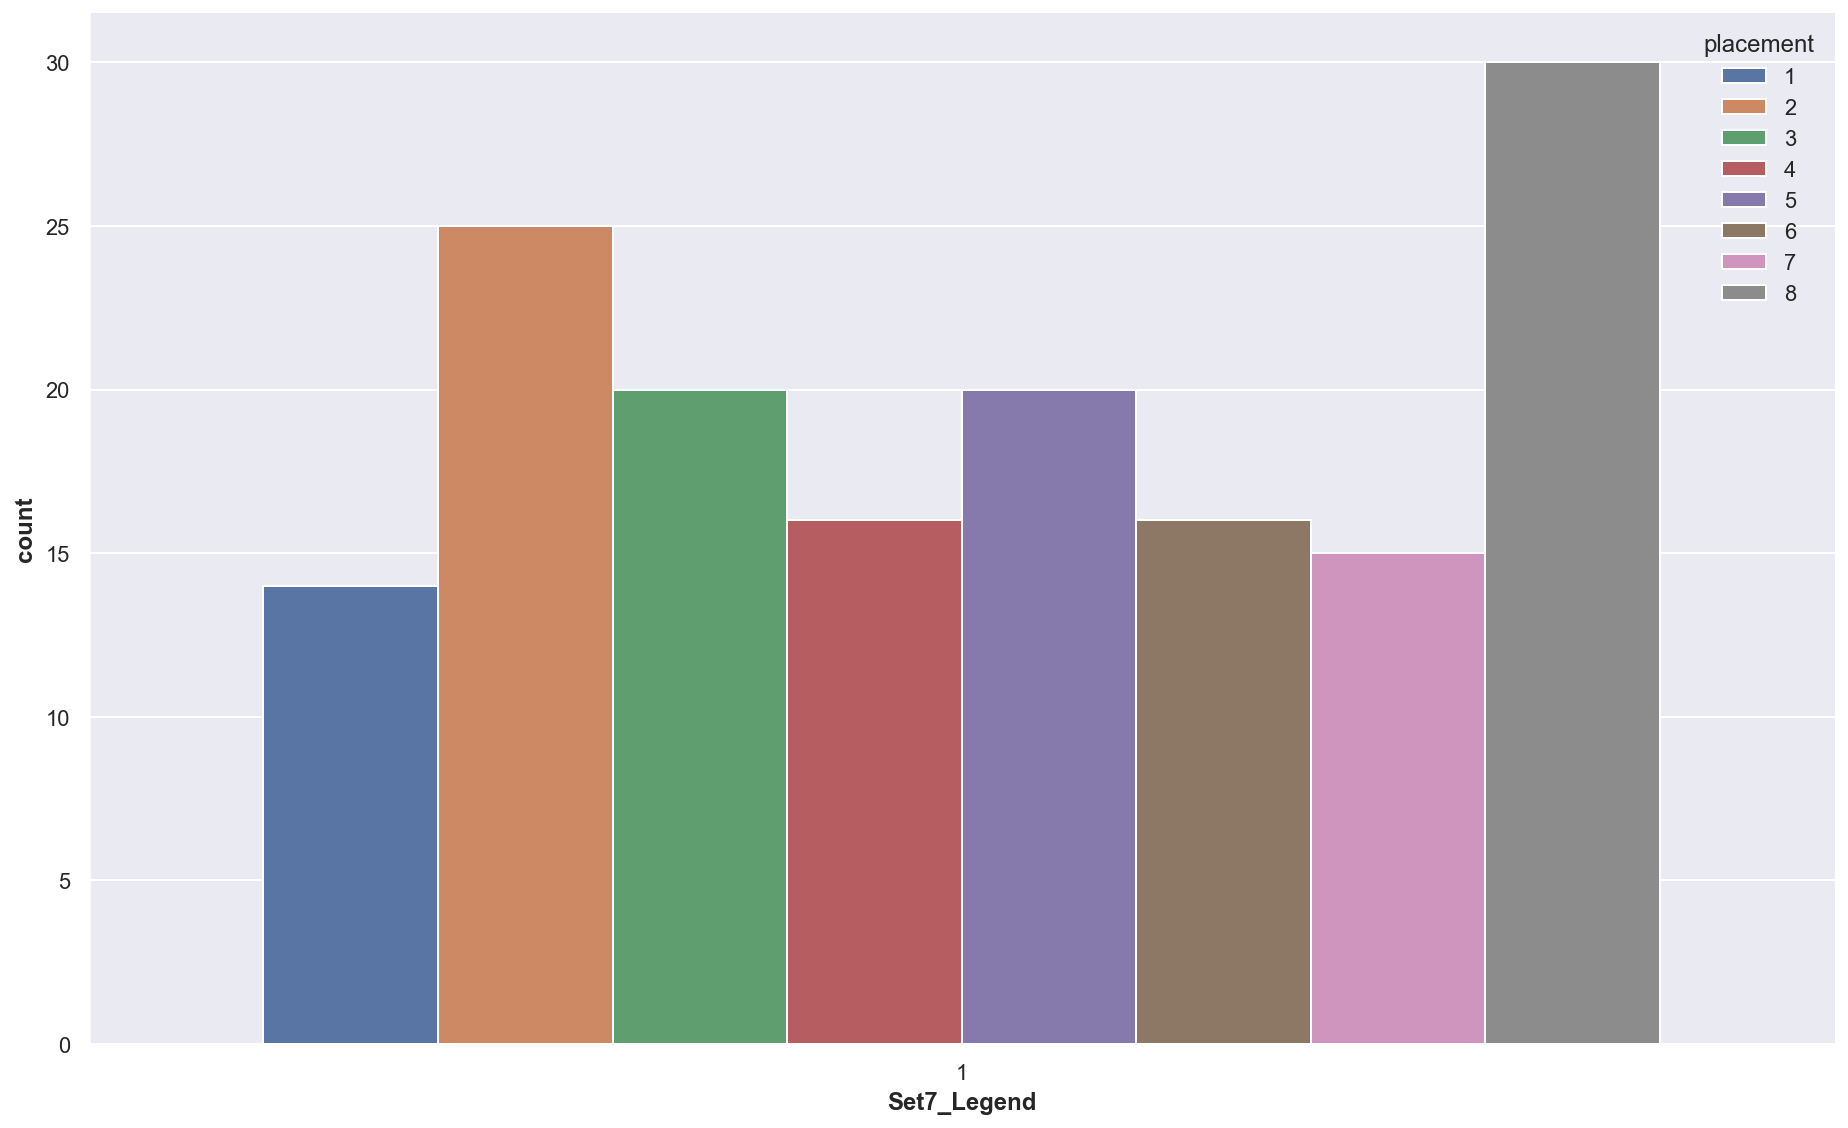

In [1166]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['Set7_Legend']>0], x='Set7_Legend', hue=TARGETNAME)
sns.despine()

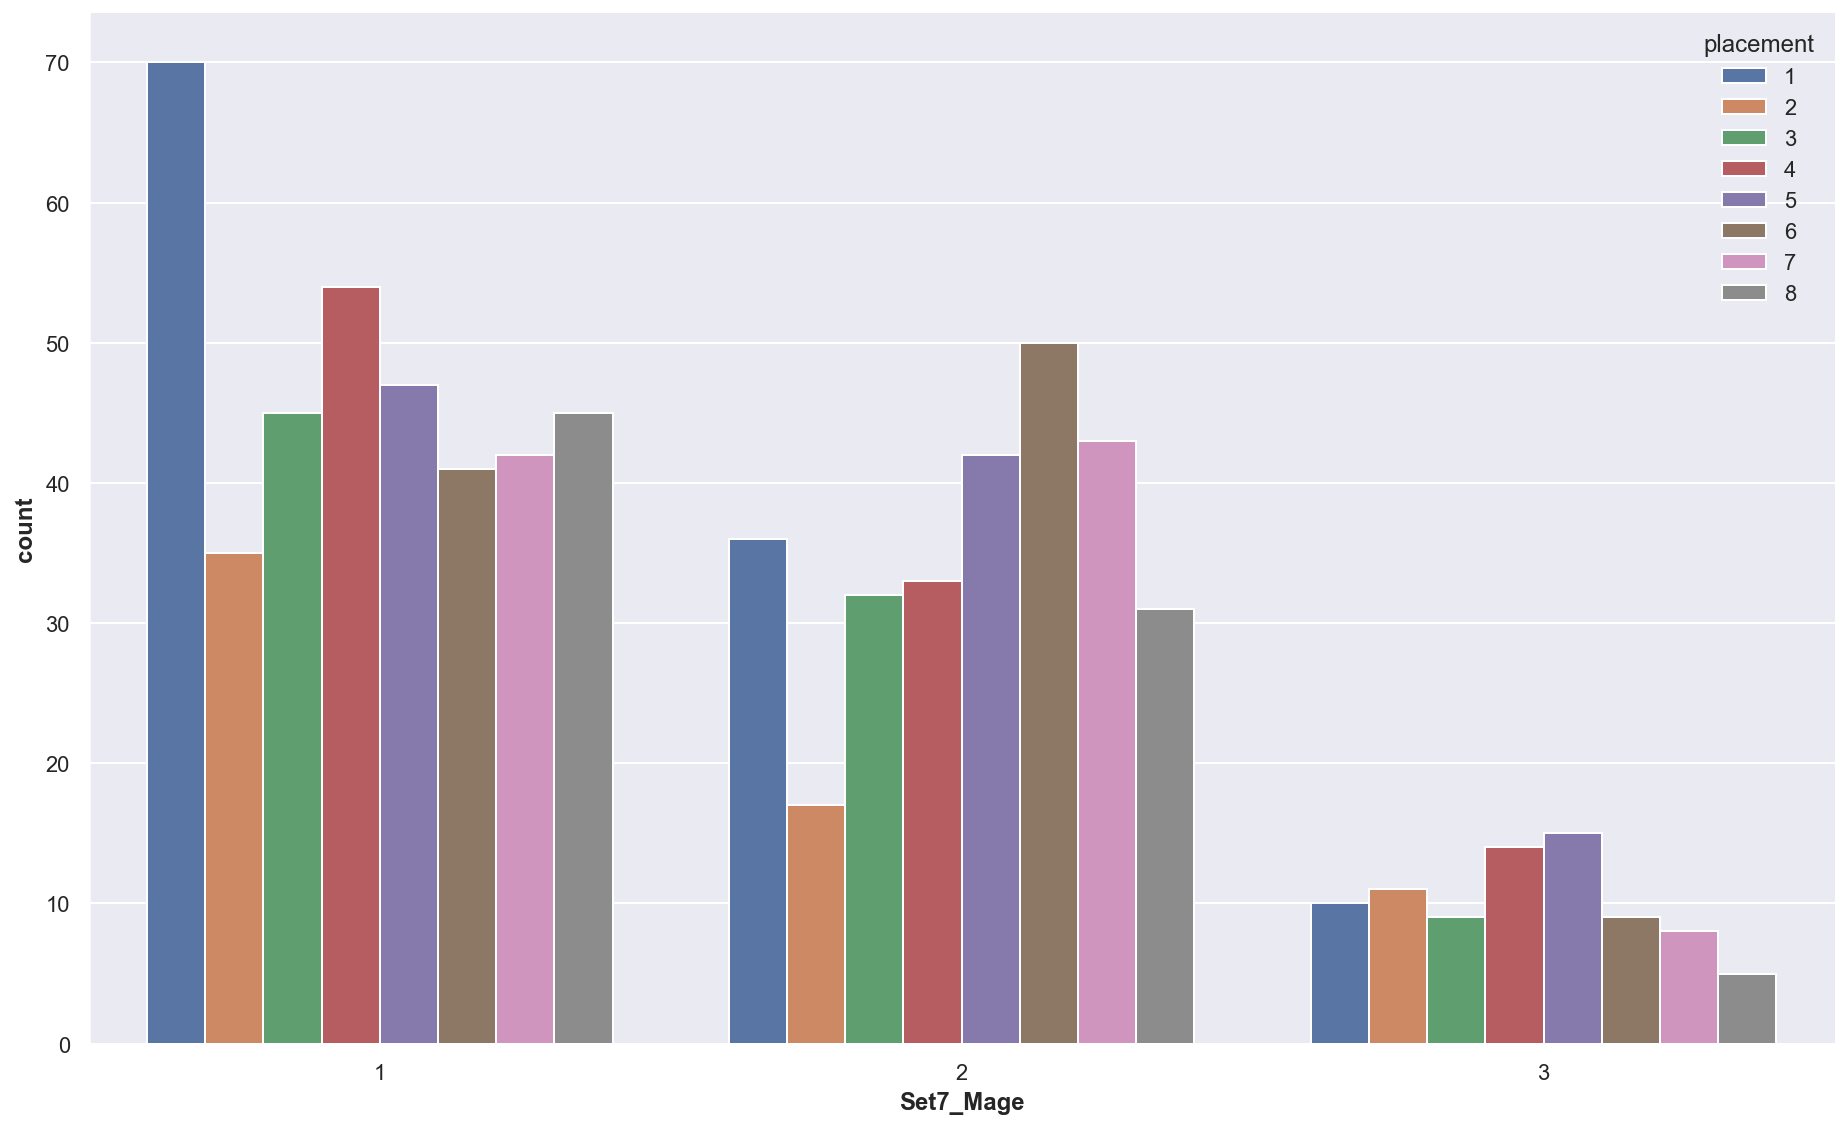

In [1167]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['Set7_Mage']>0], x='Set7_Mage', hue=TARGETNAME)
sns.despine()

Need Zoe for Mages

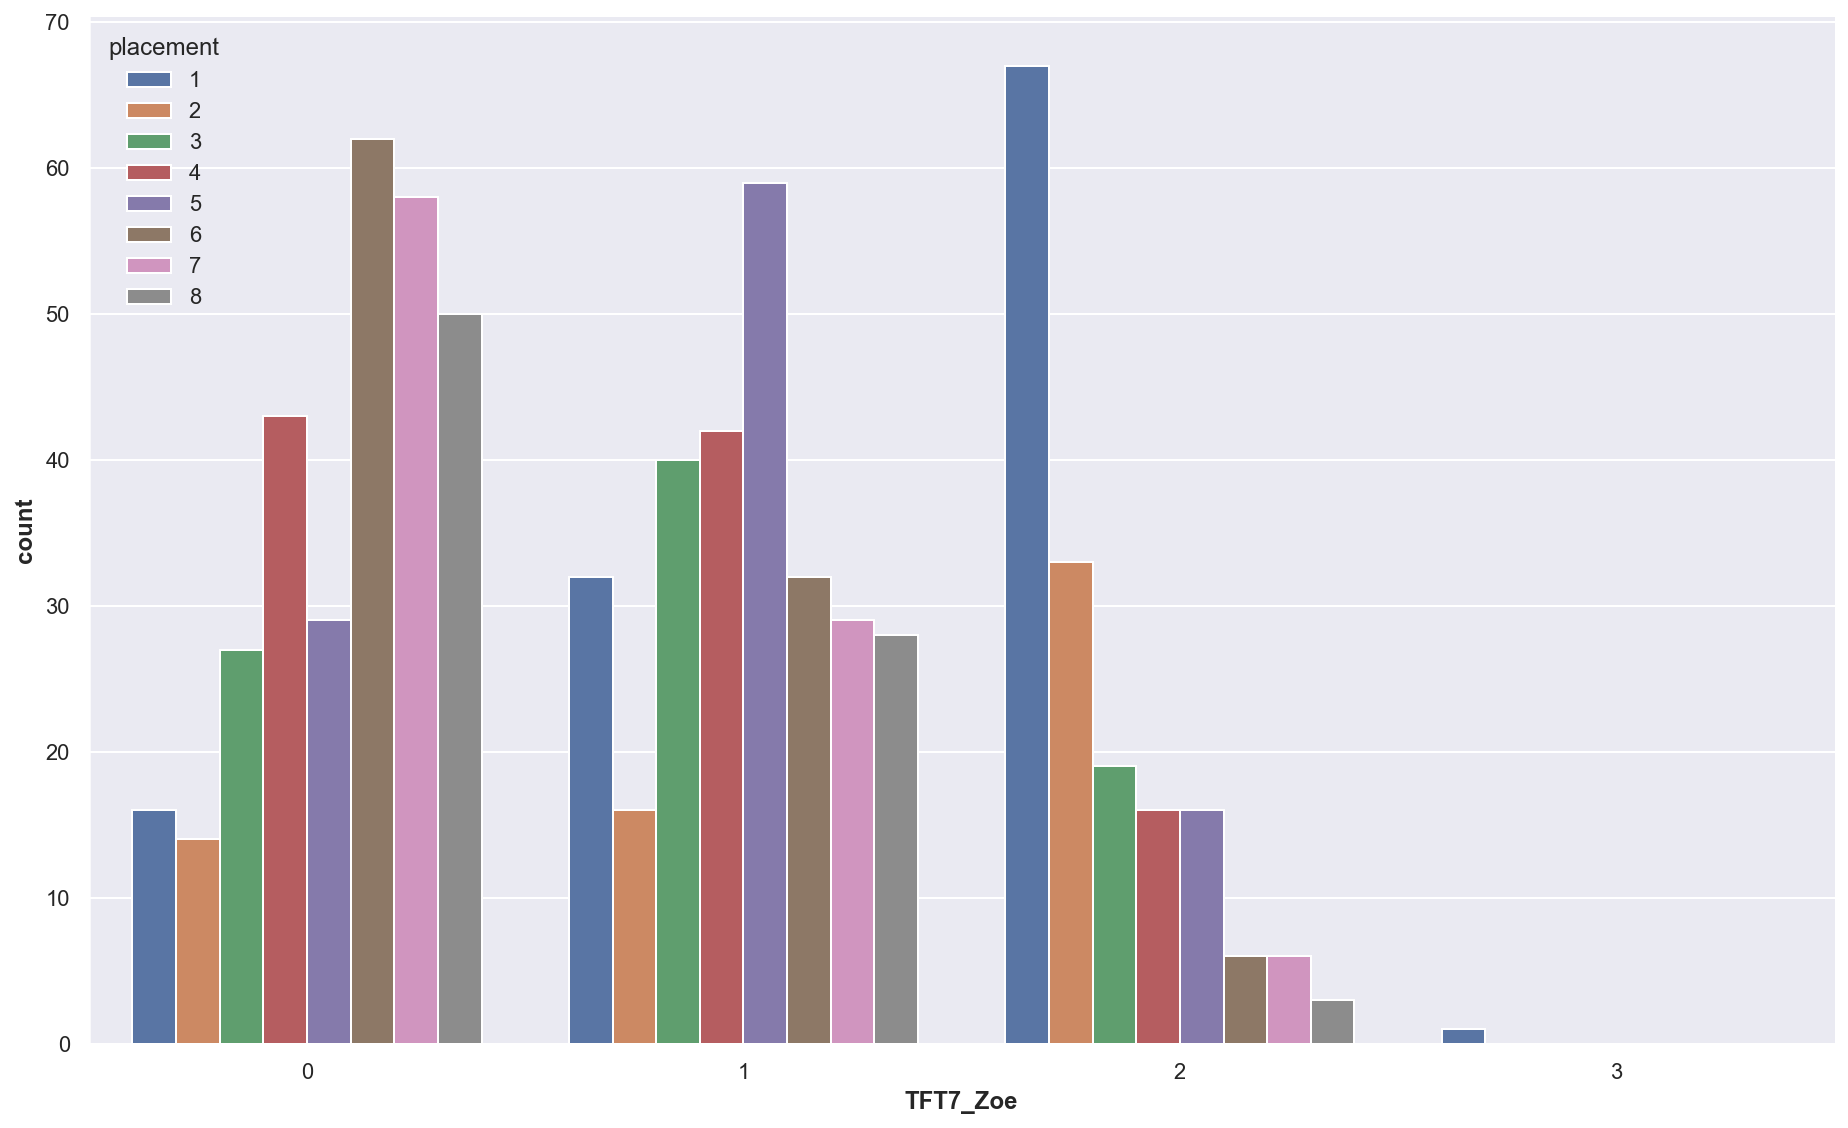

In [1168]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['Set7_Mage']>0], x='TFT7_Zoe', hue=TARGETNAME)
sns.despine()

Significant correlation with Mystic.

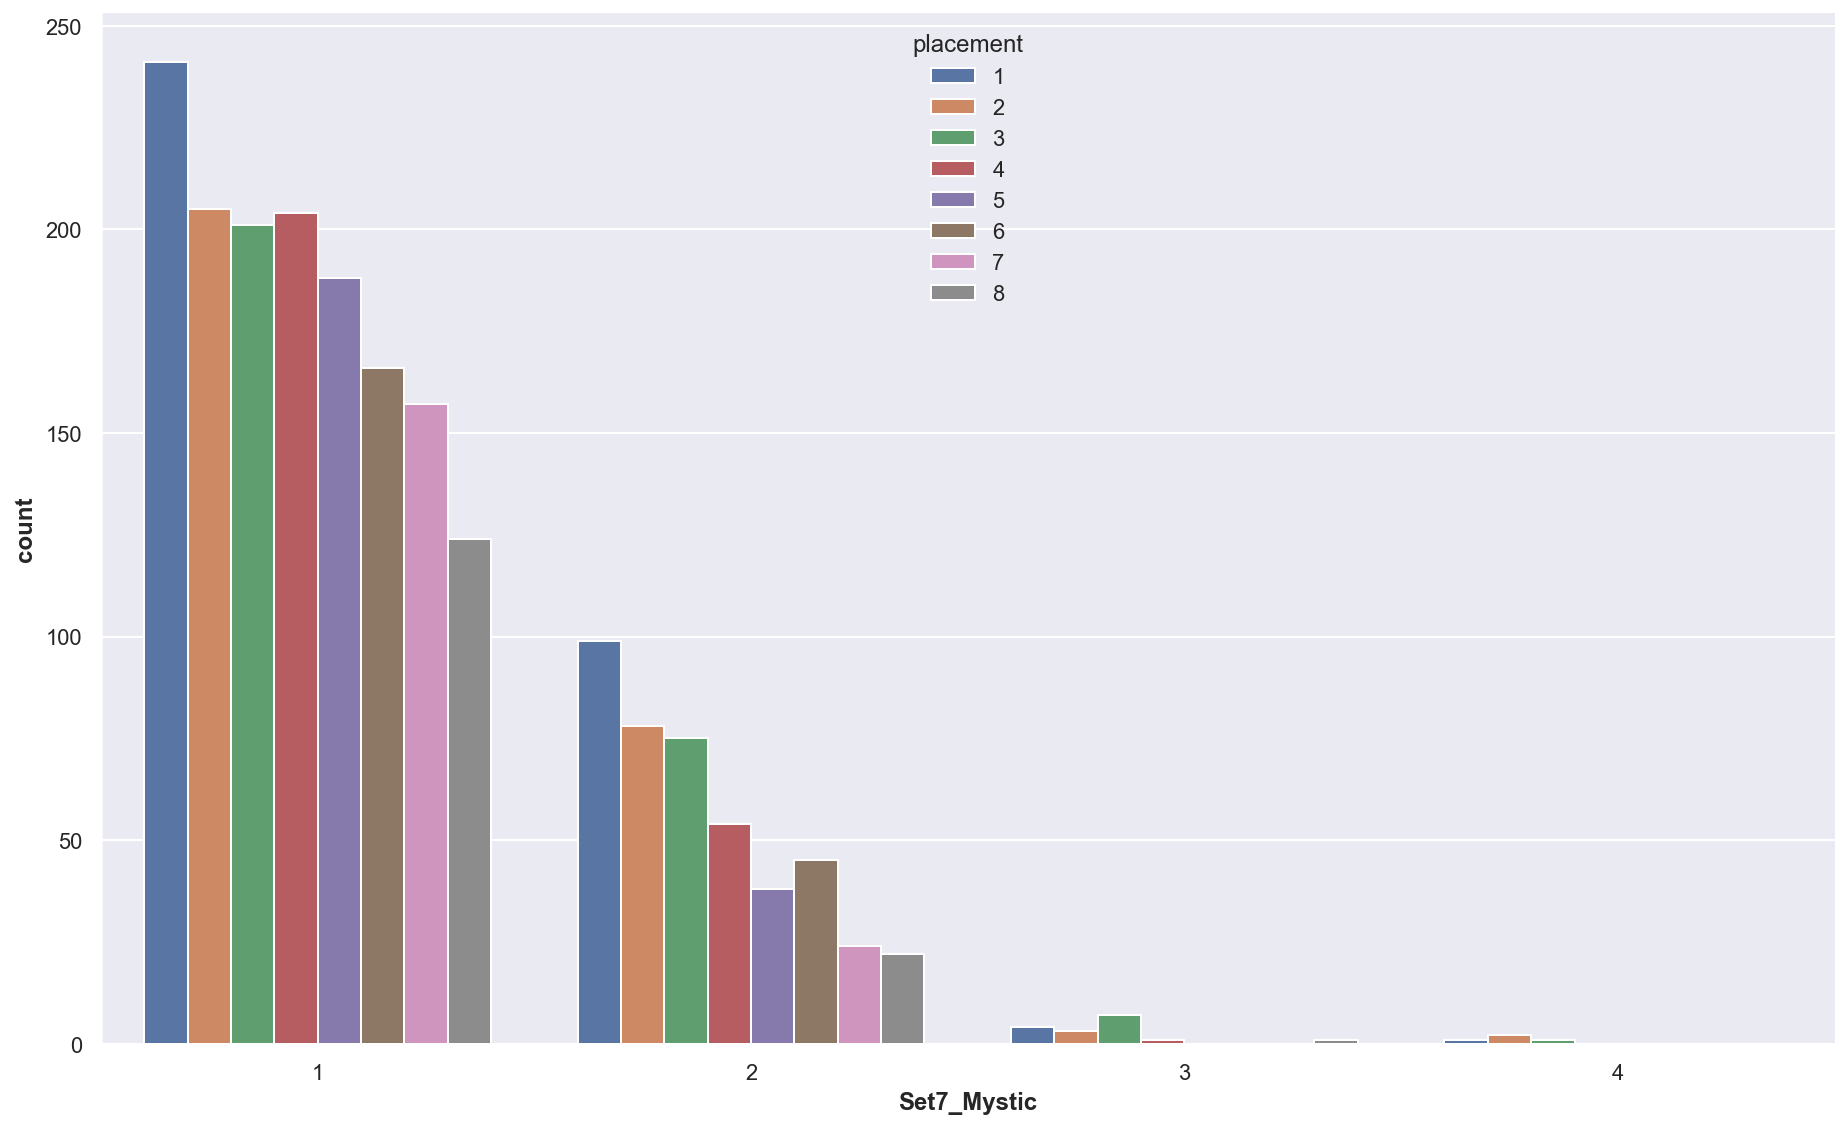

In [1169]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['Set7_Mystic']>0], x='Set7_Mystic', hue=TARGETNAME)
sns.despine()

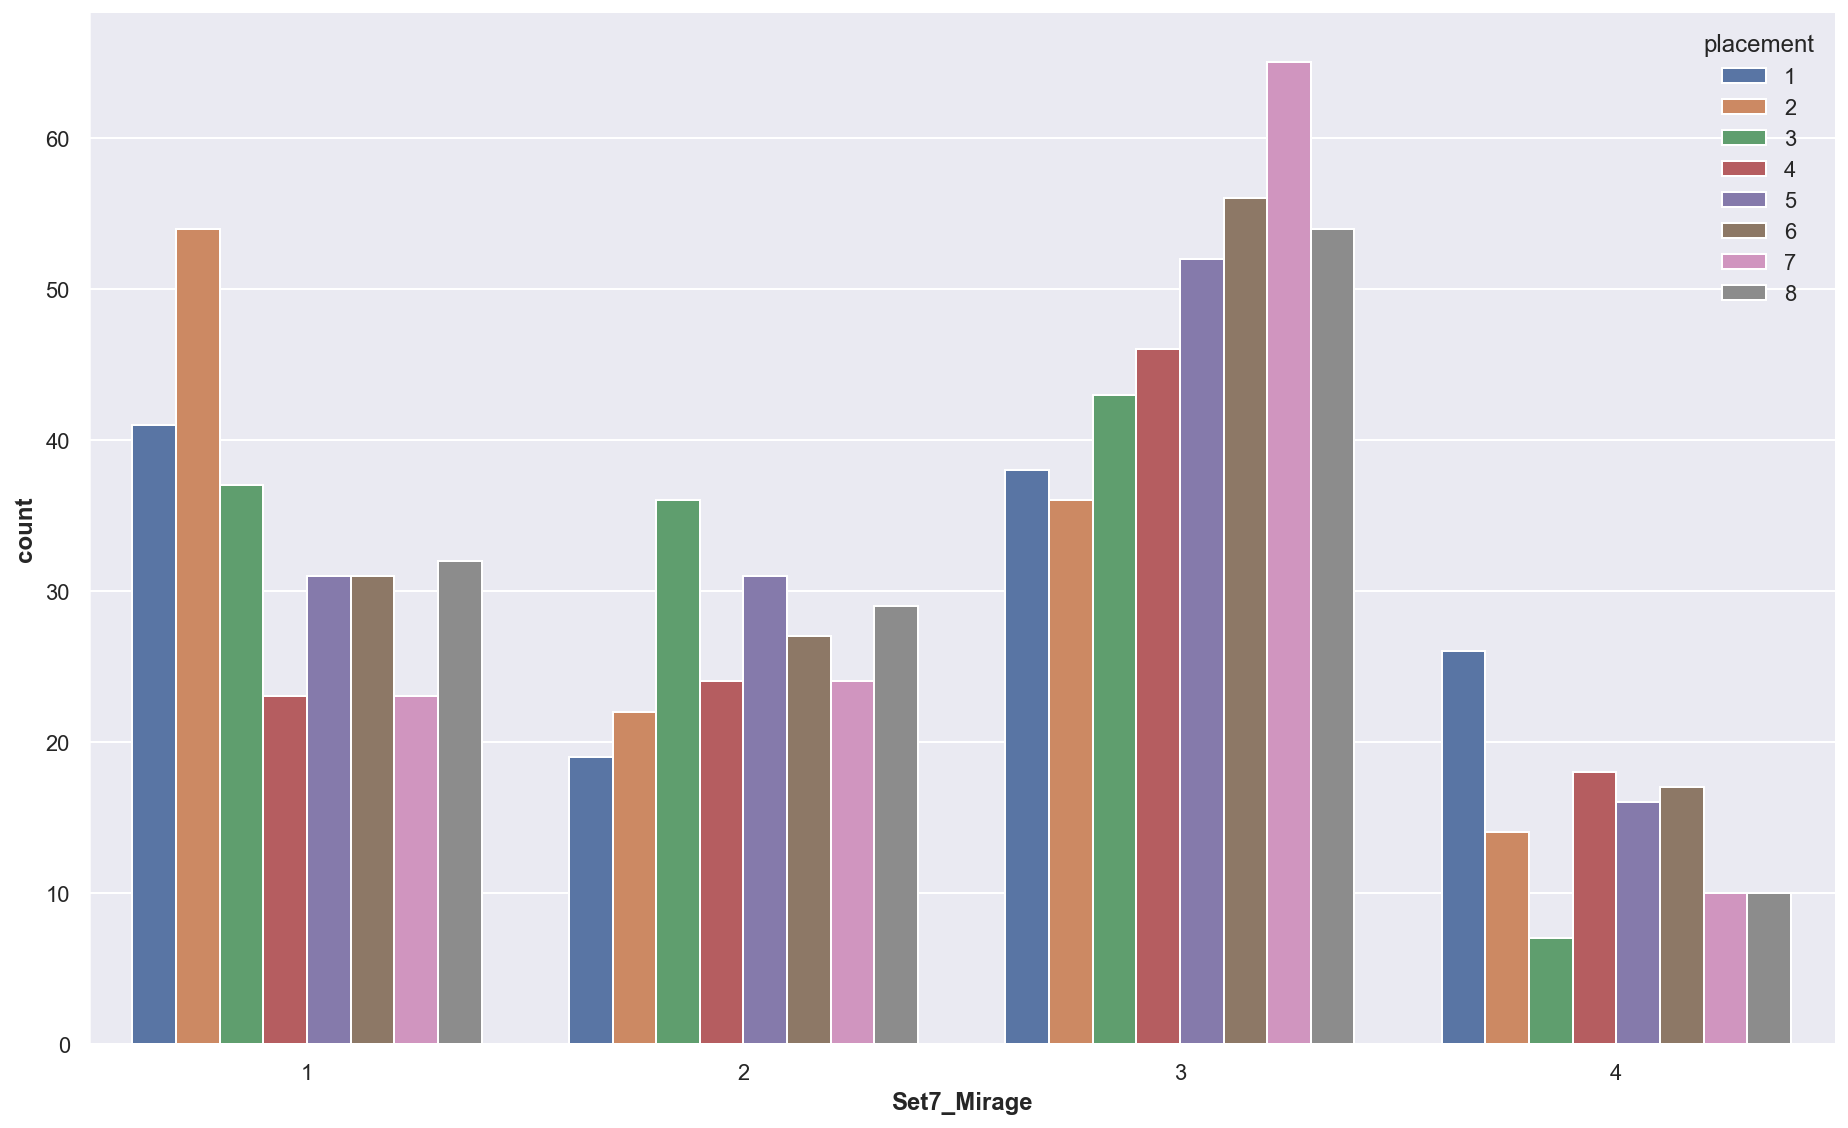

In [1170]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['Set7_Mirage']>0], x='Set7_Mirage', hue=TARGETNAME)
sns.despine()

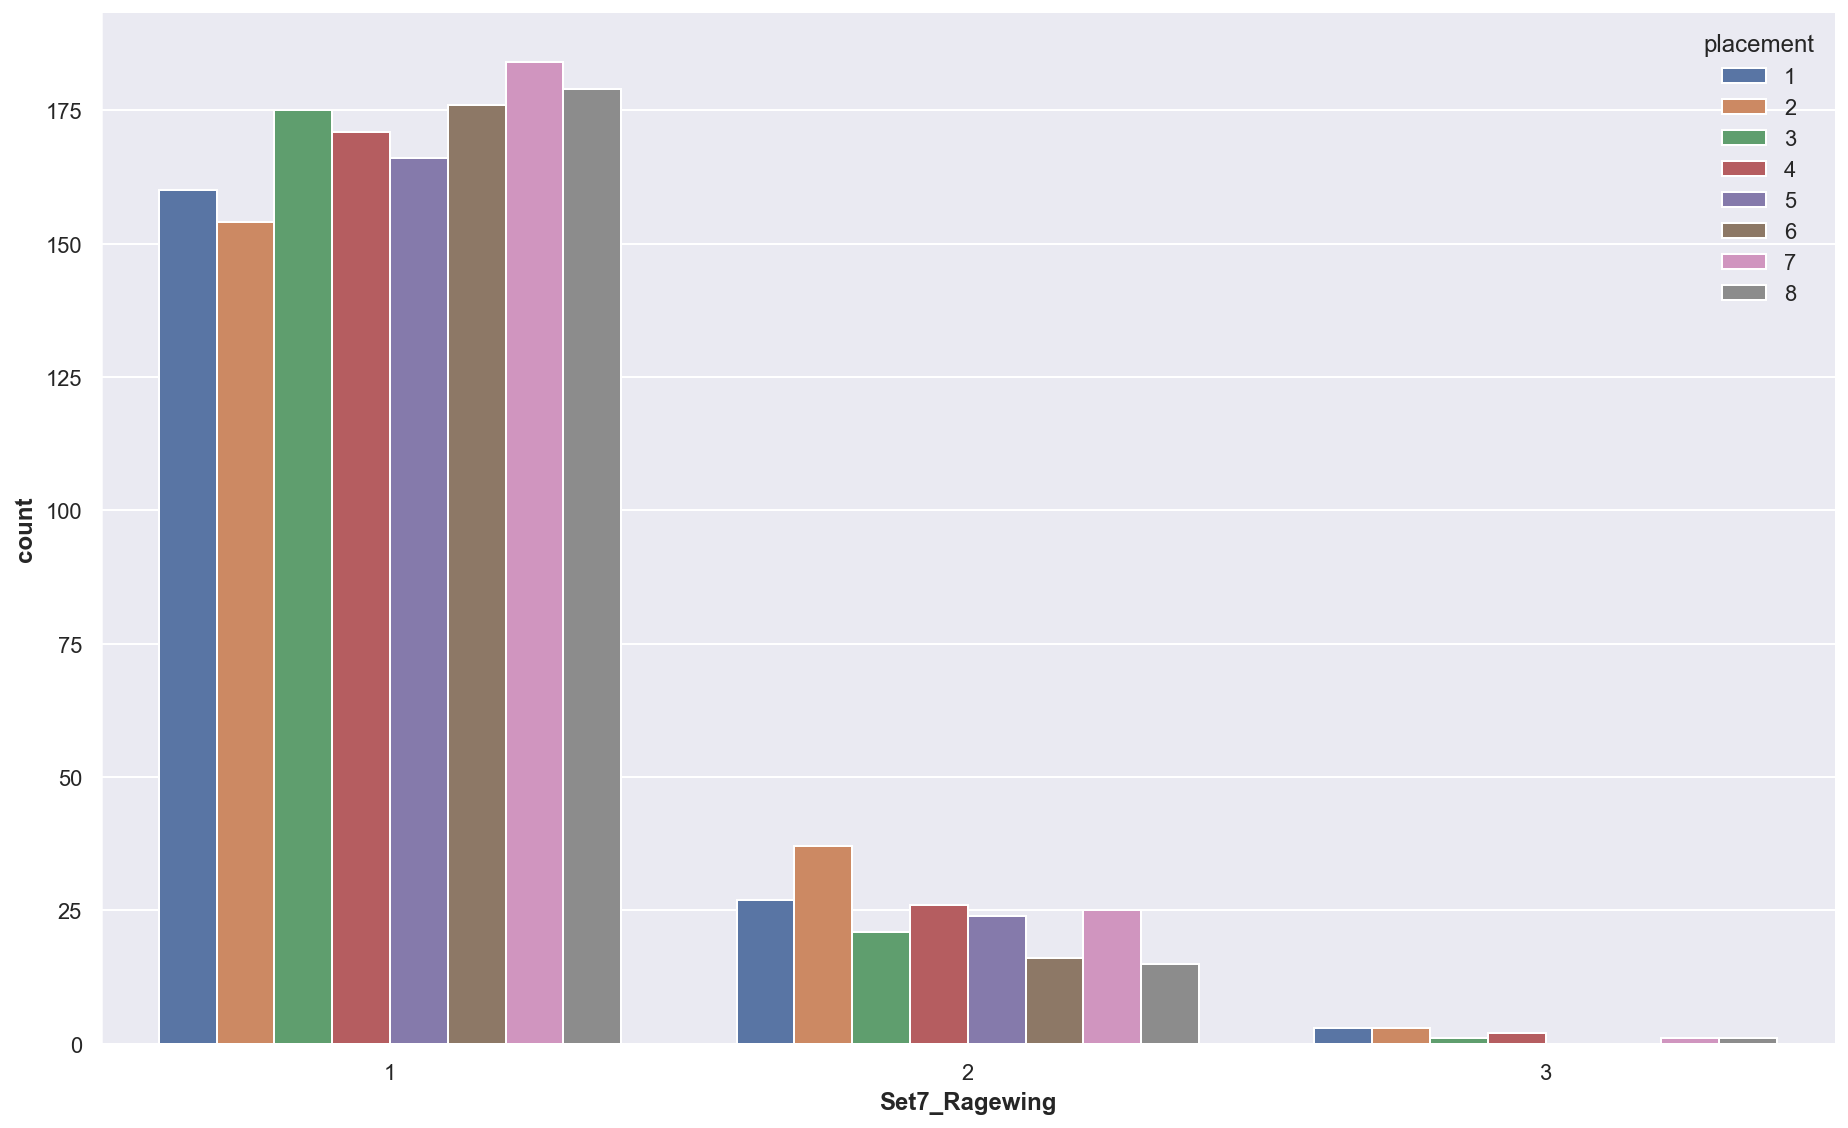

In [1171]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['Set7_Ragewing']>0], x='Set7_Ragewing', hue=TARGETNAME)
sns.despine()

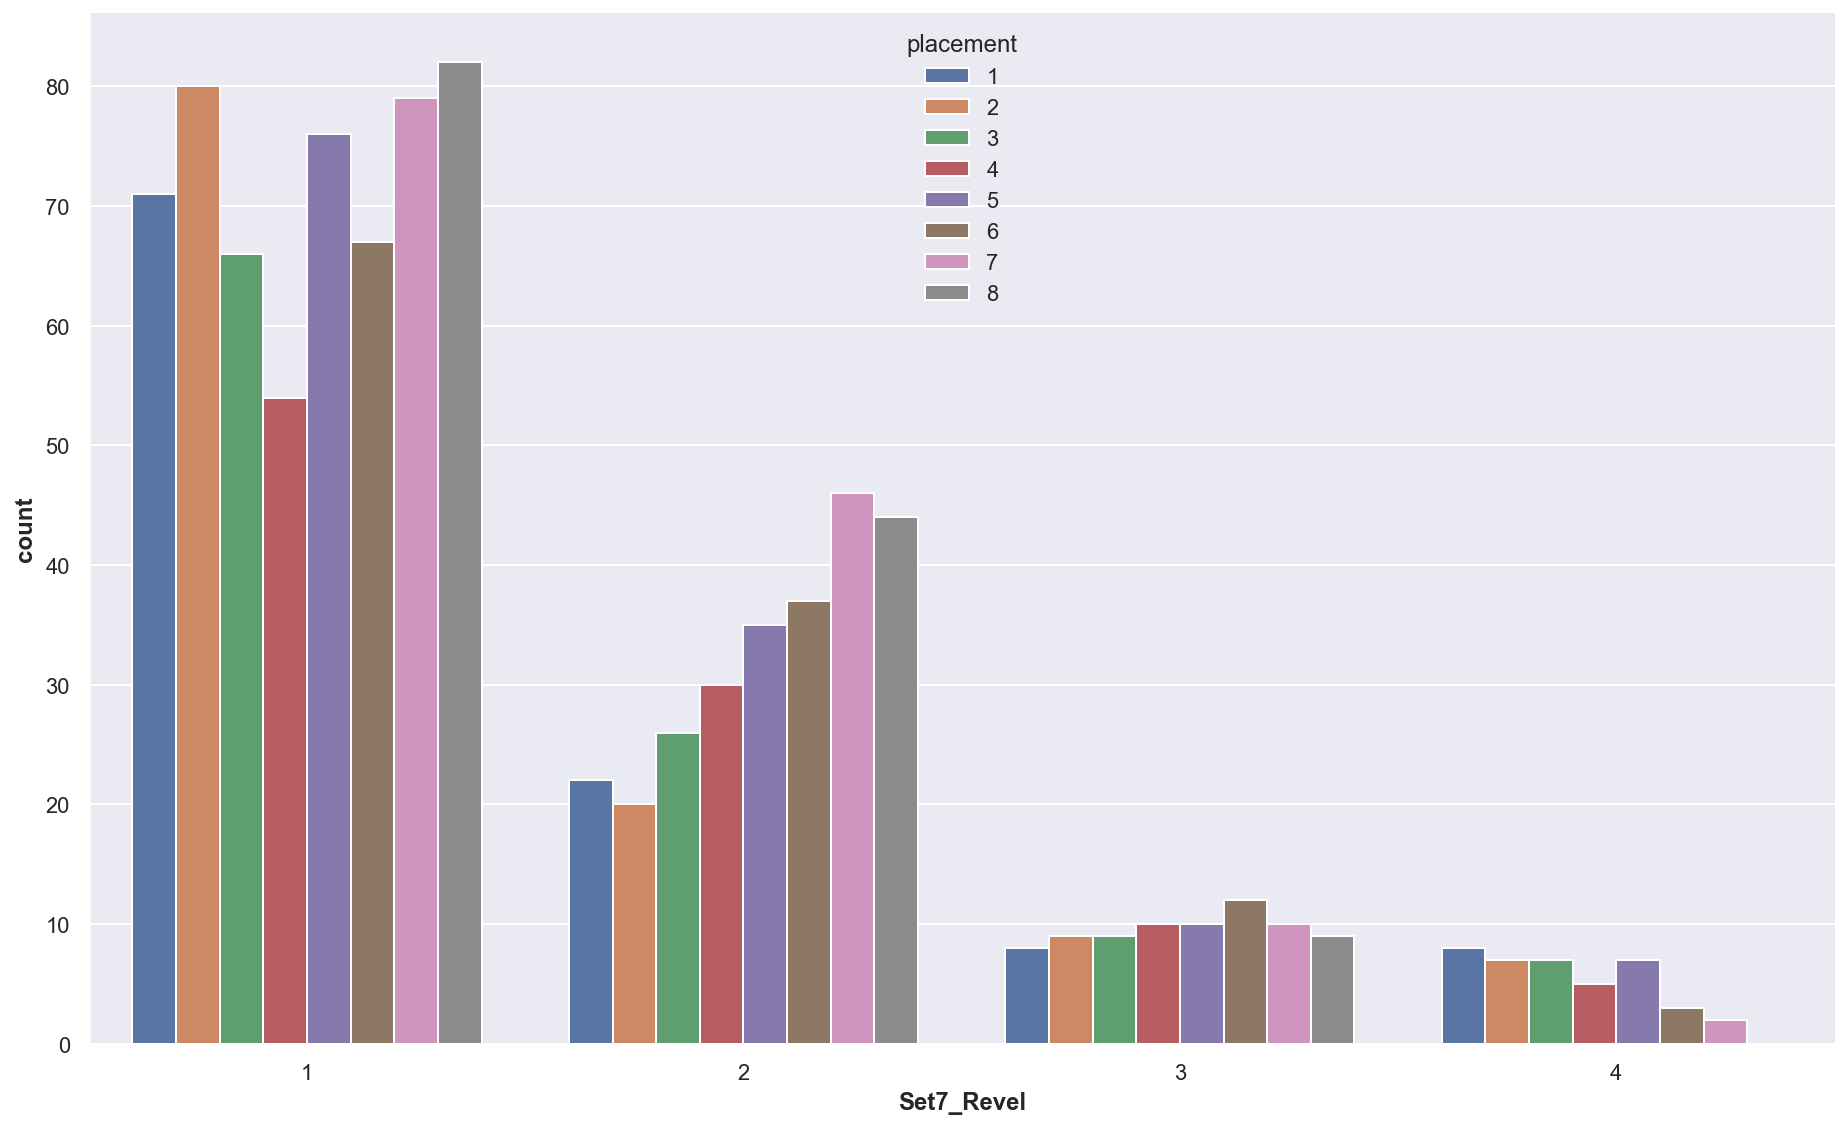

In [1172]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['Set7_Revel']>0], x='Set7_Revel', hue=TARGETNAME)
sns.despine()

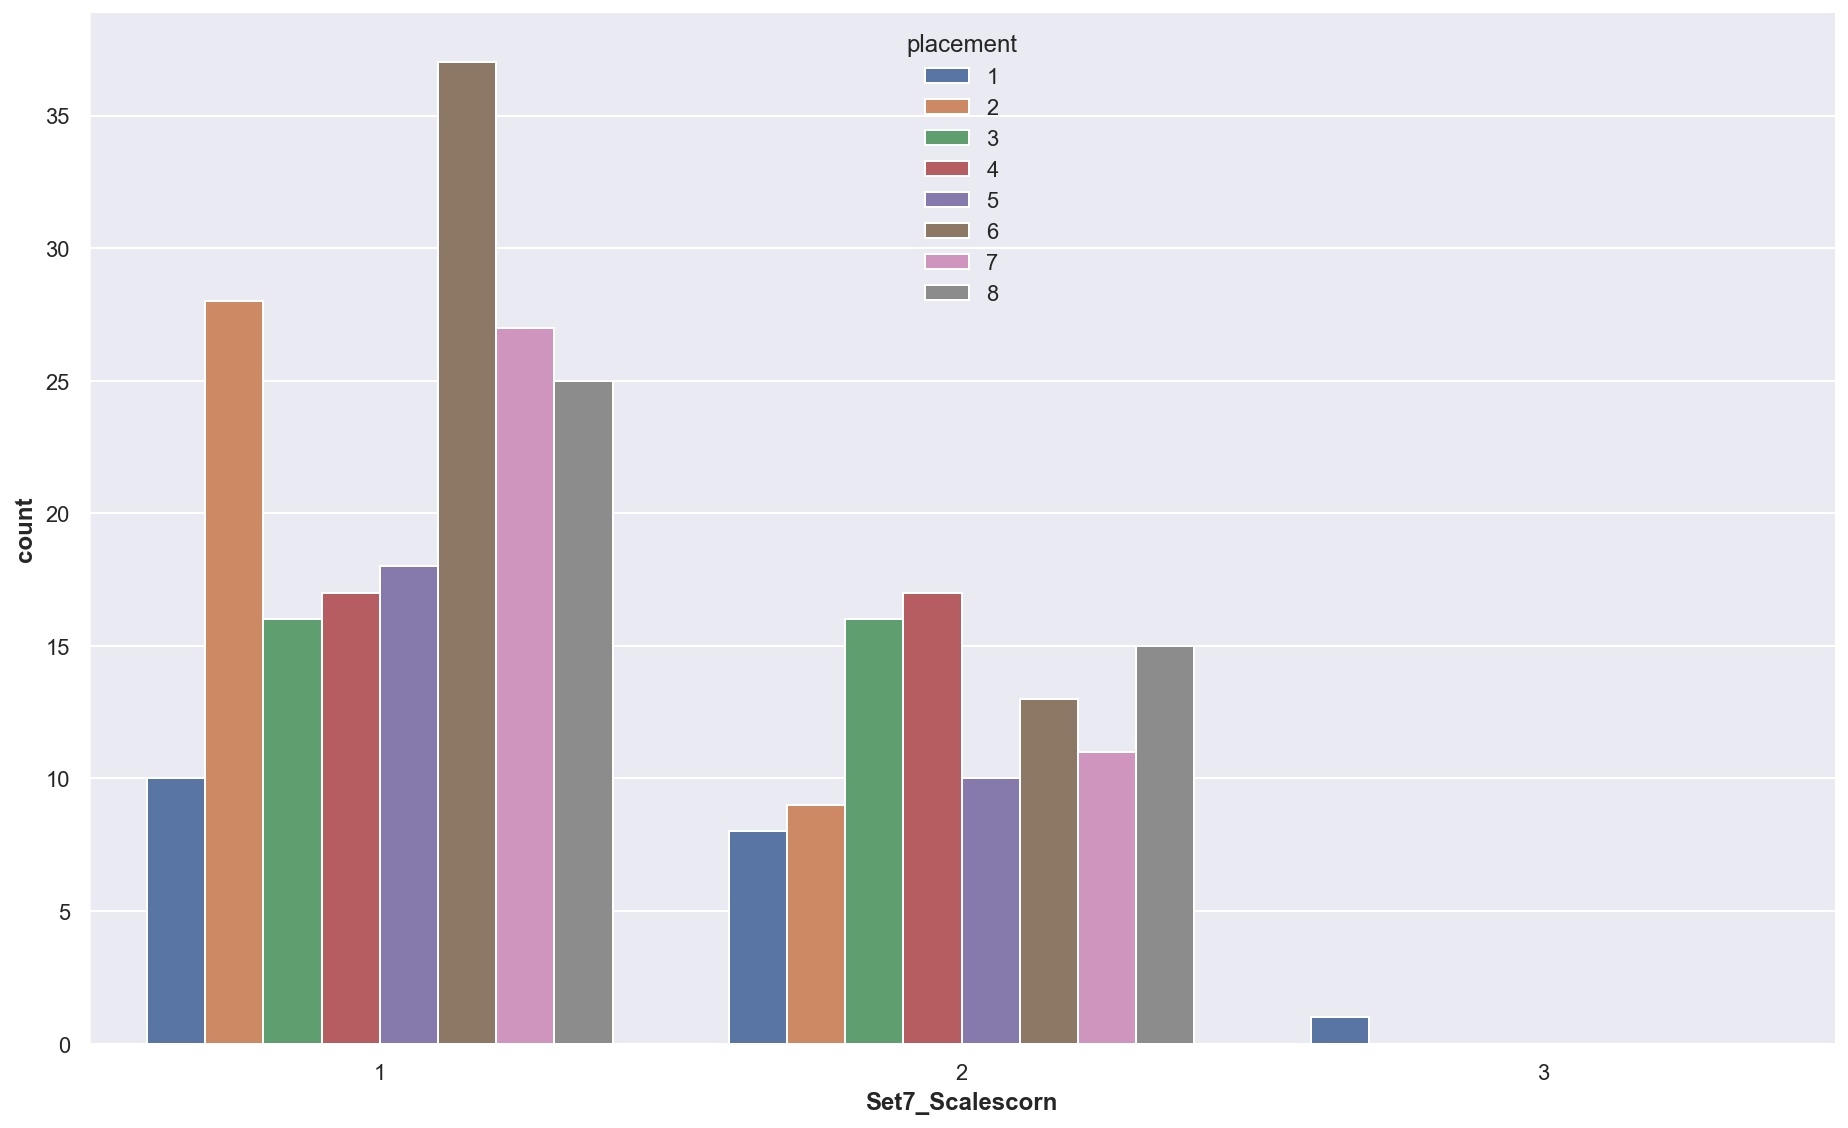

In [1173]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['Set7_Scalescorn']>0], x='Set7_Scalescorn', hue=TARGETNAME)
sns.despine()

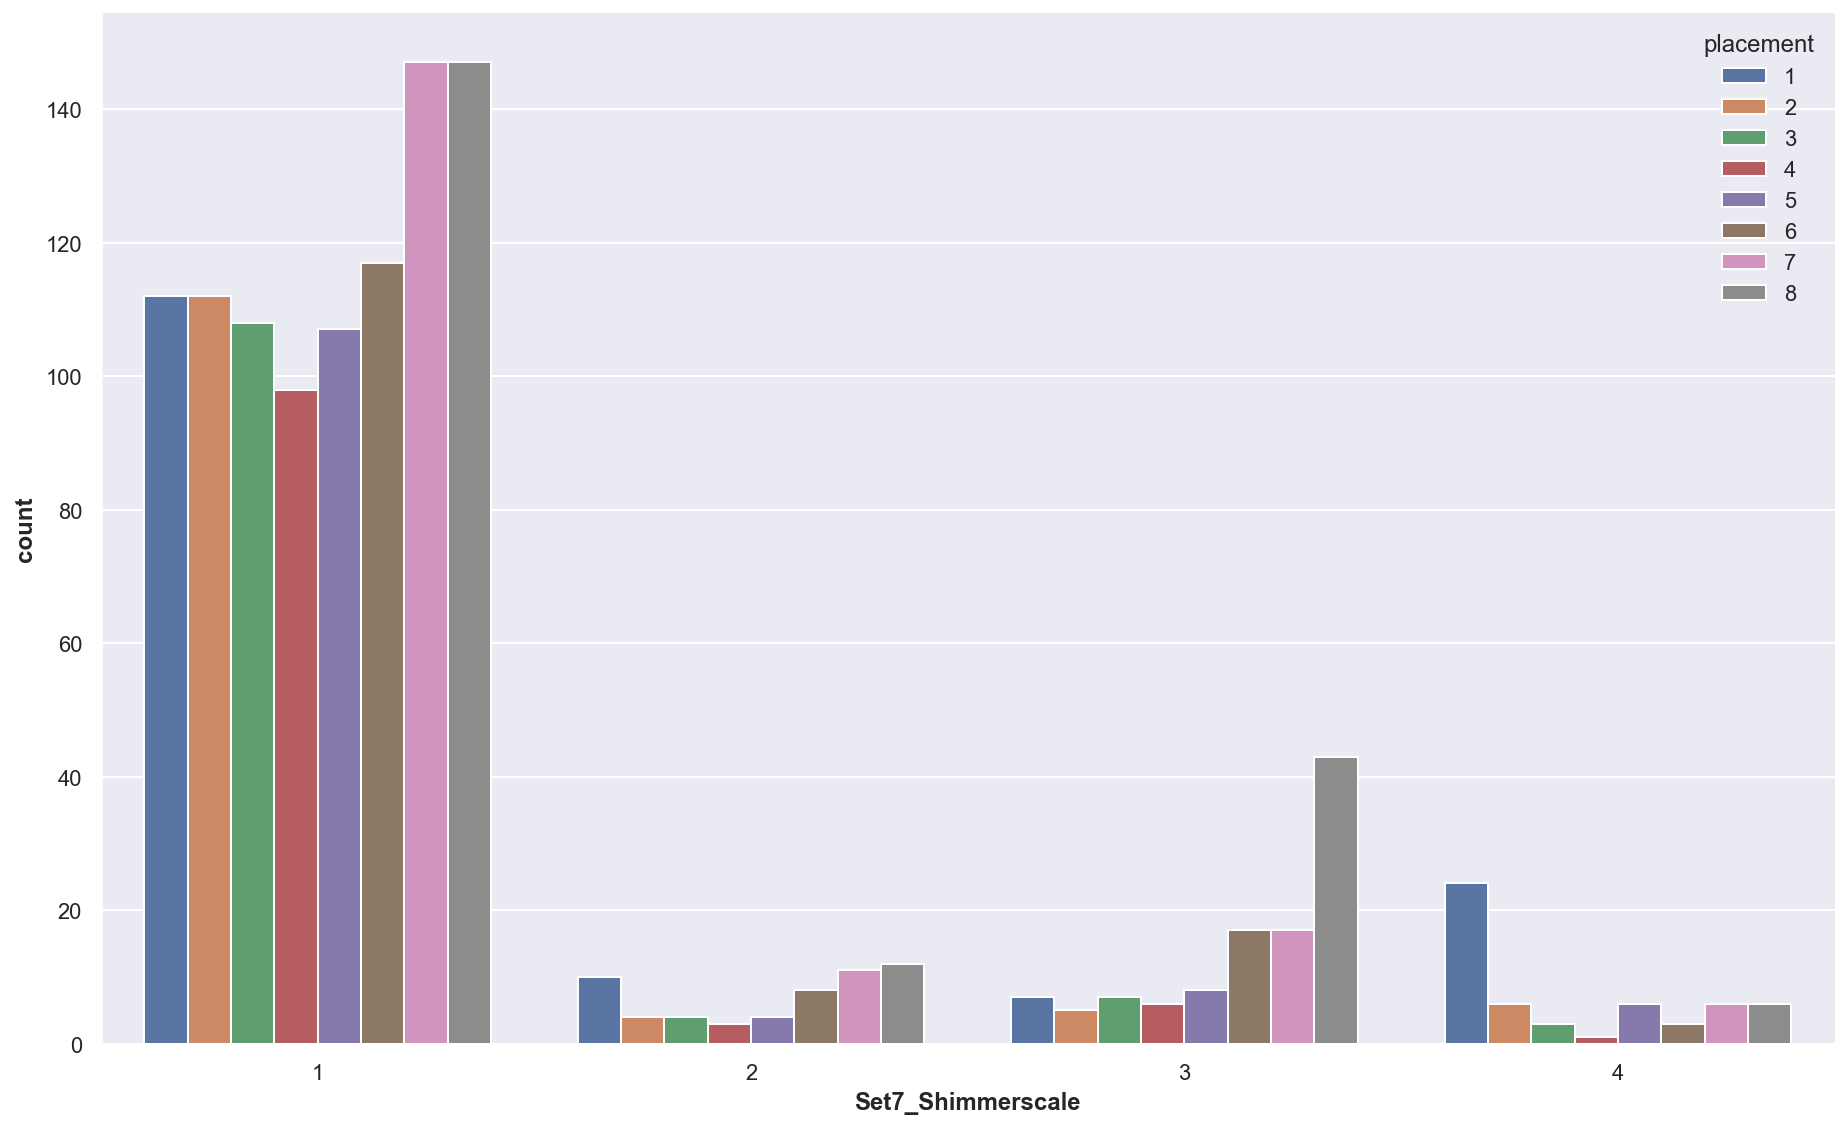

In [1174]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['Set7_Shimmerscale']>0], x='Set7_Shimmerscale', hue=TARGETNAME)
sns.despine()

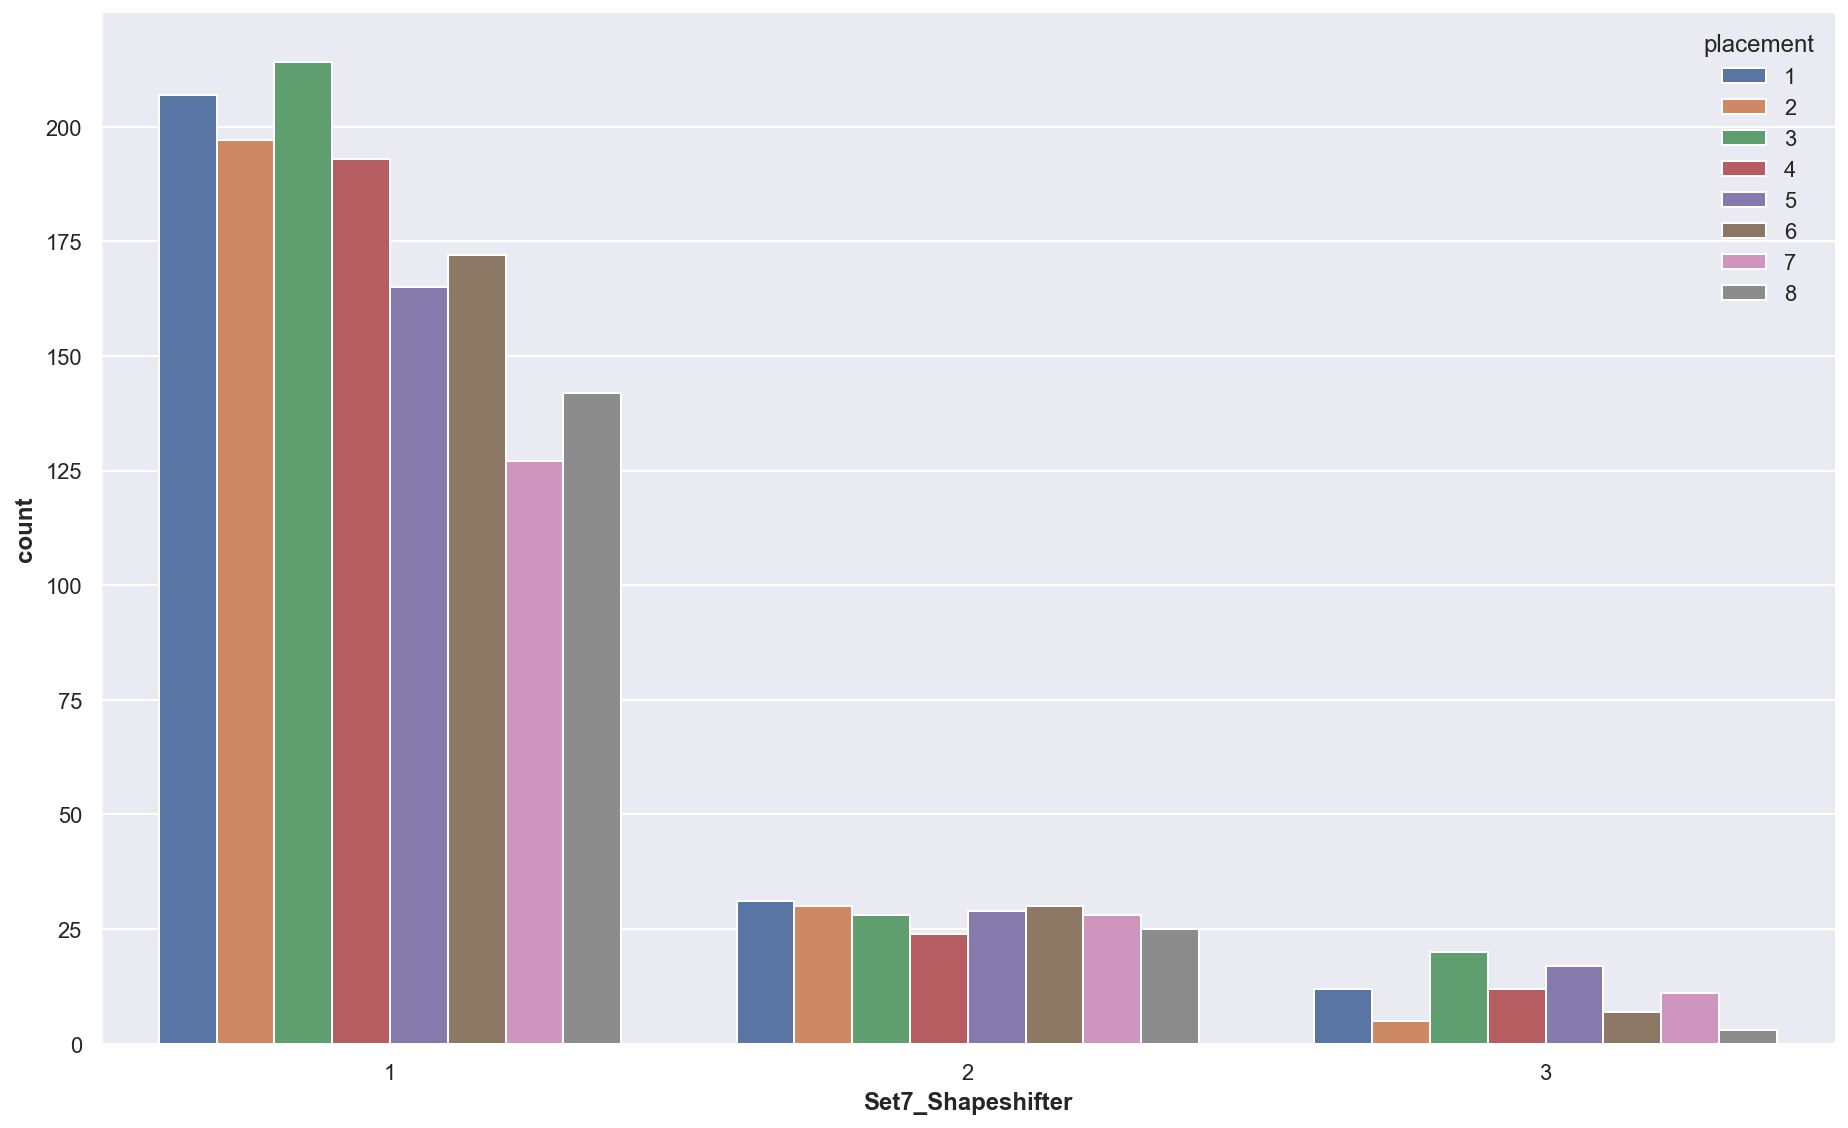

In [1175]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['Set7_Shapeshifter']>0], x='Set7_Shapeshifter', hue=TARGETNAME)
sns.despine()

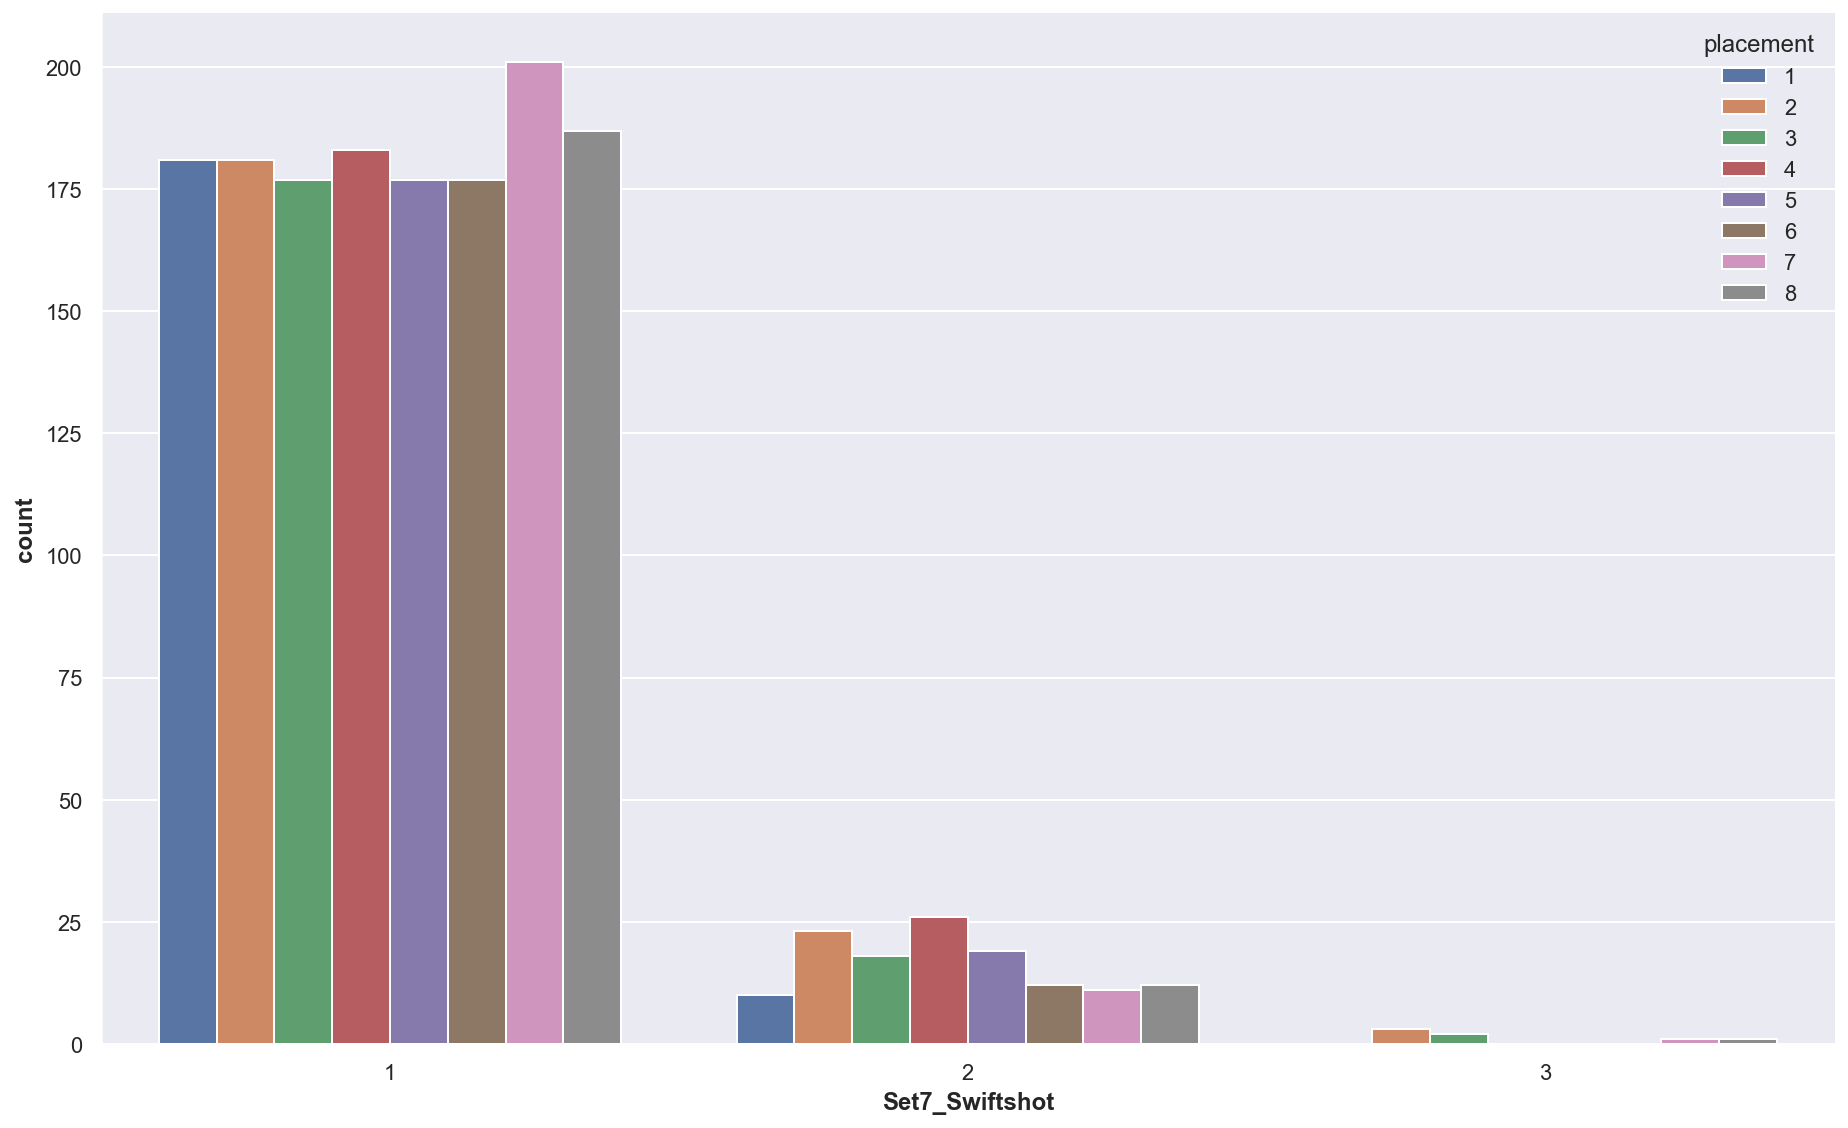

In [1176]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['Set7_Swiftshot']>0], x='Set7_Swiftshot', hue=TARGETNAME)
sns.despine()

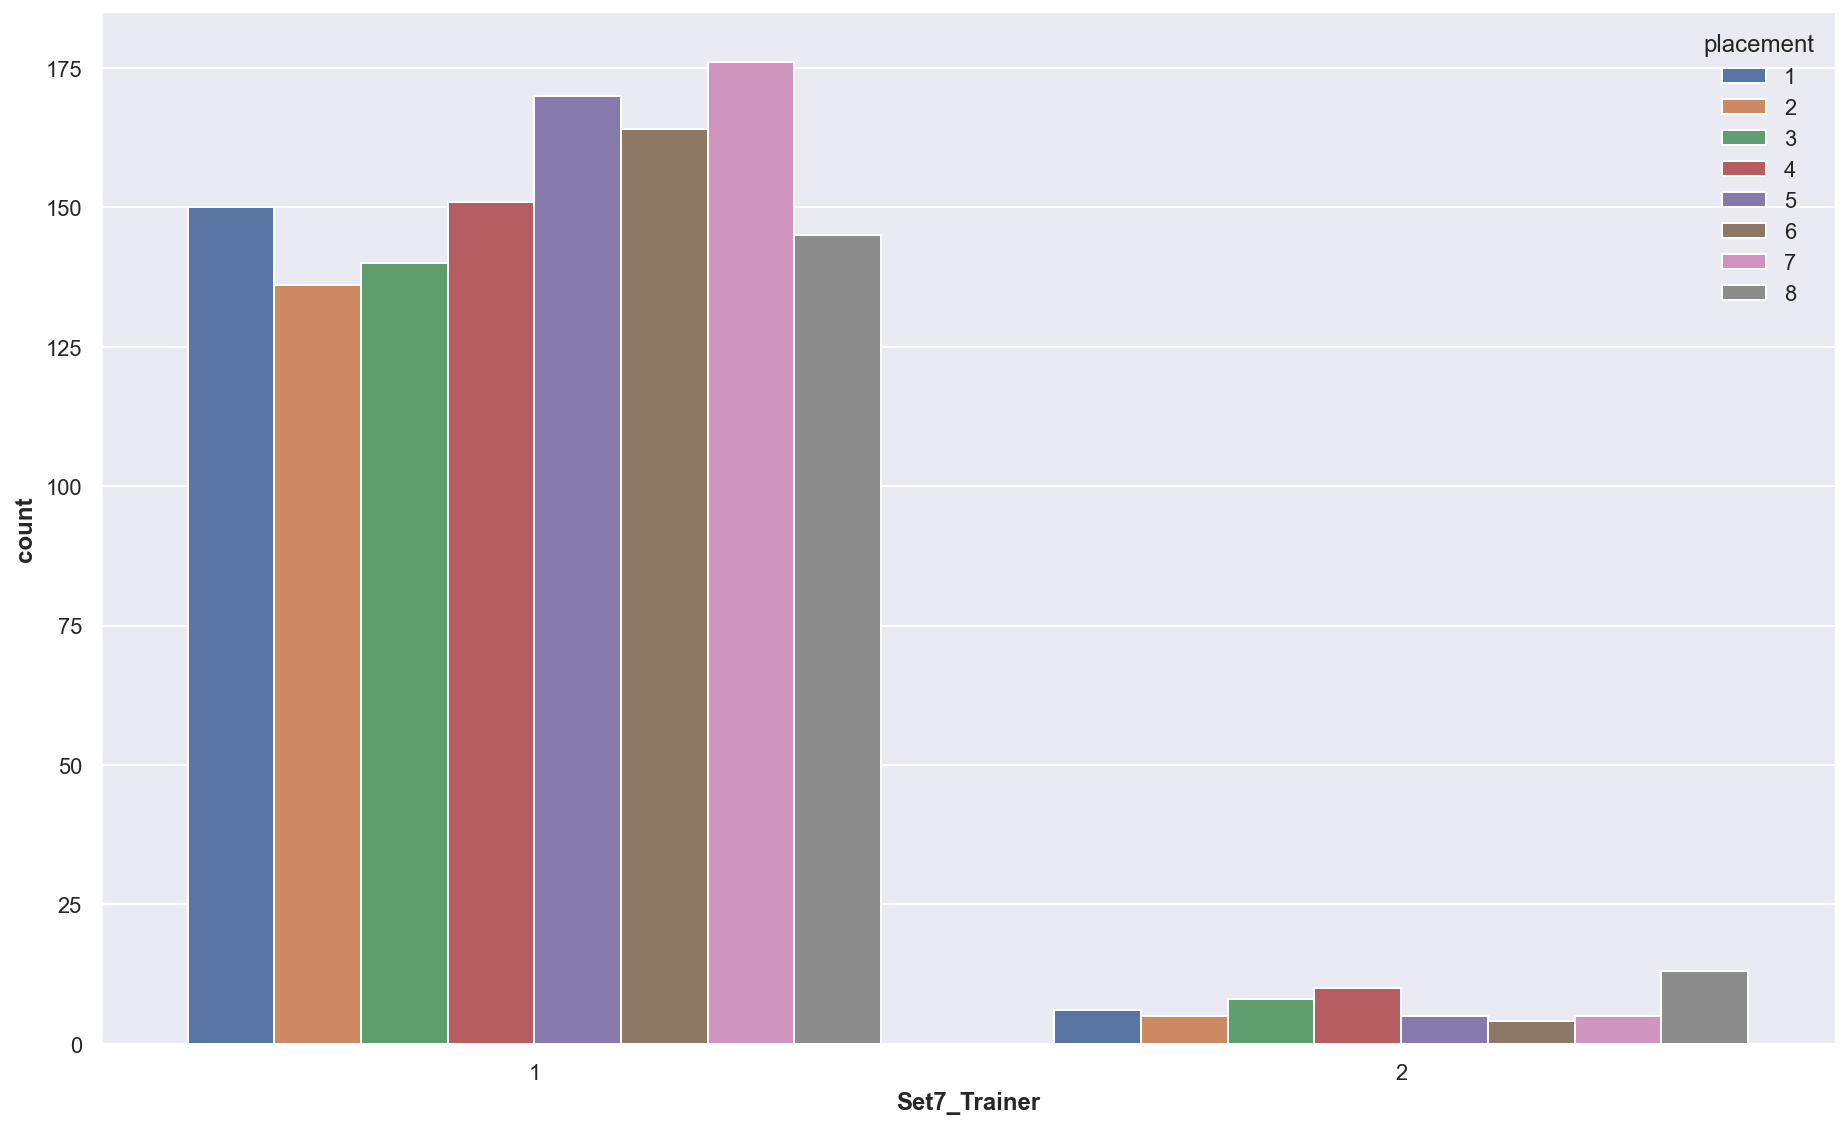

In [1177]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['Set7_Trainer']>0], x='Set7_Trainer', hue=TARGETNAME)
sns.despine()

This trait show the highest correlation in placement.

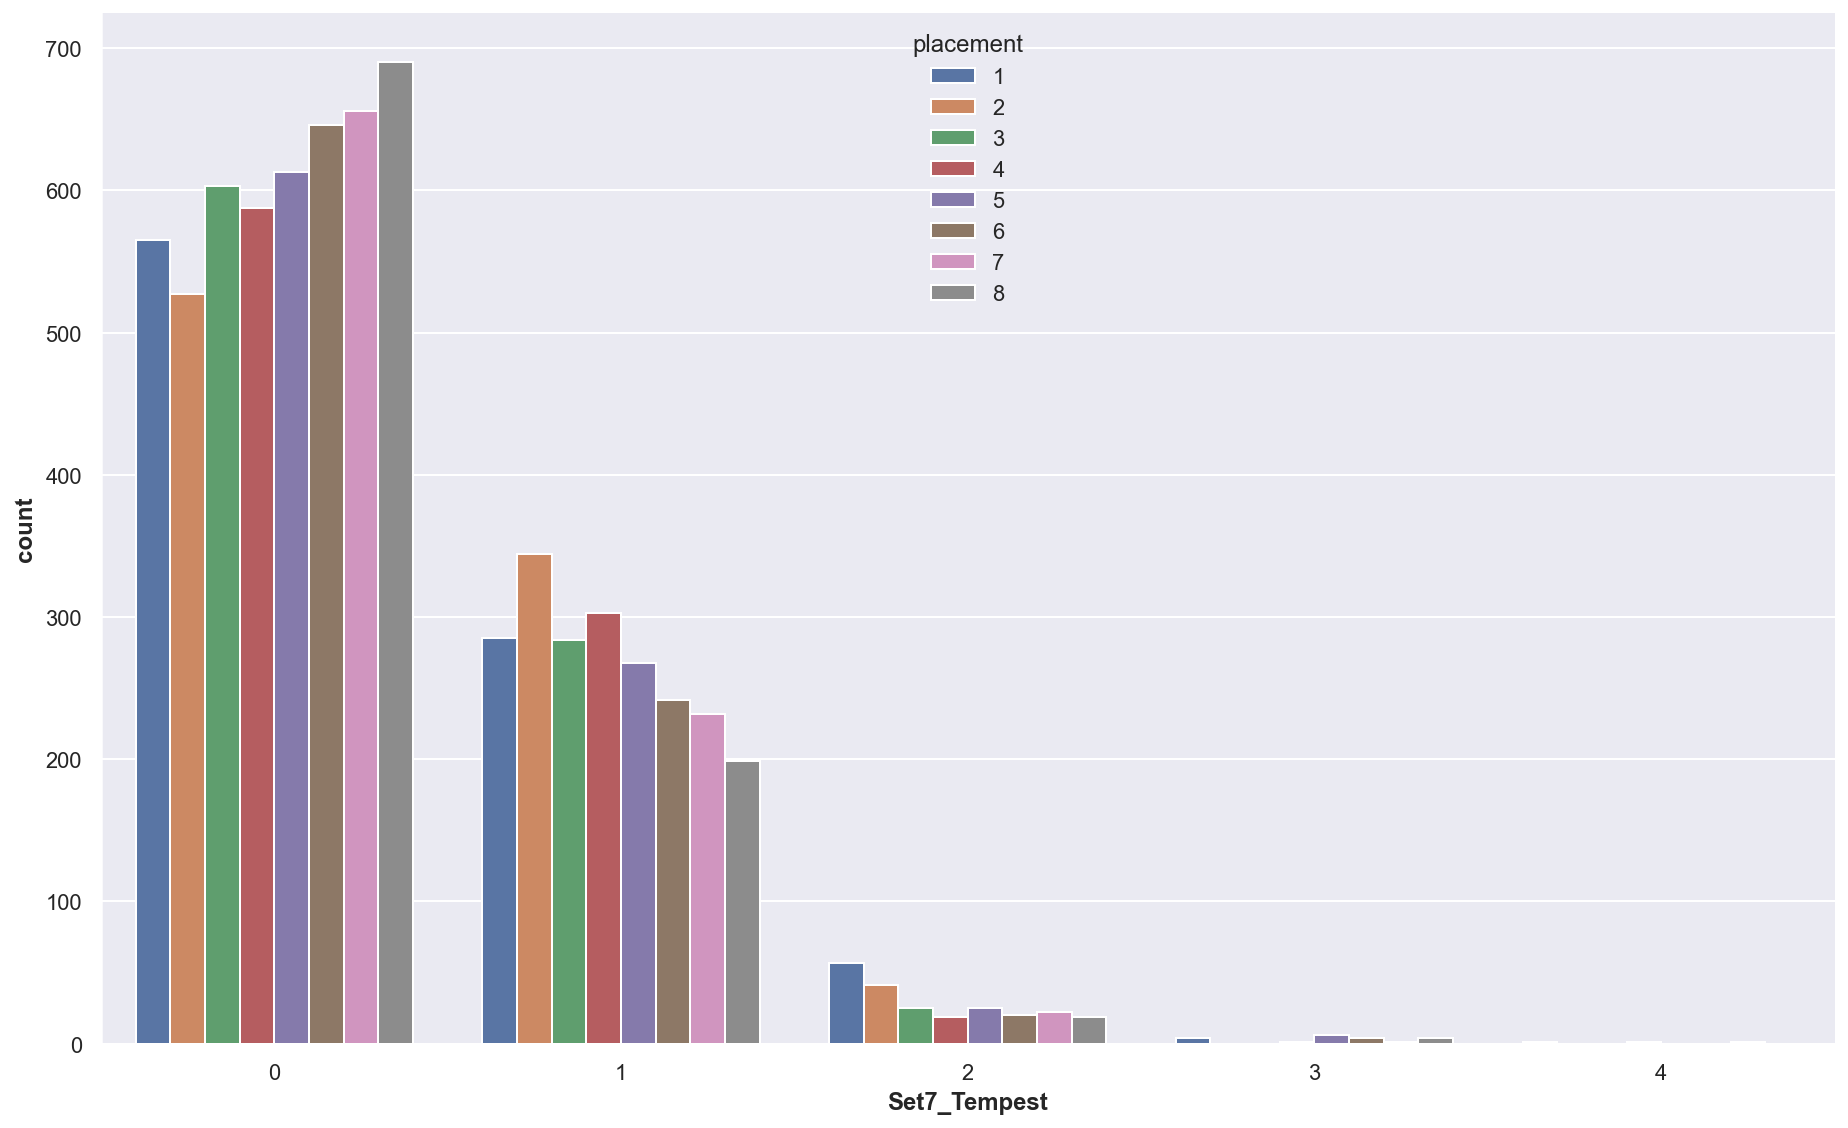

In [1178]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['Set7_Tempest']>=0], x='Set7_Tempest', hue=TARGETNAME)
sns.despine()

Stronger correlation at trait lvl 1.

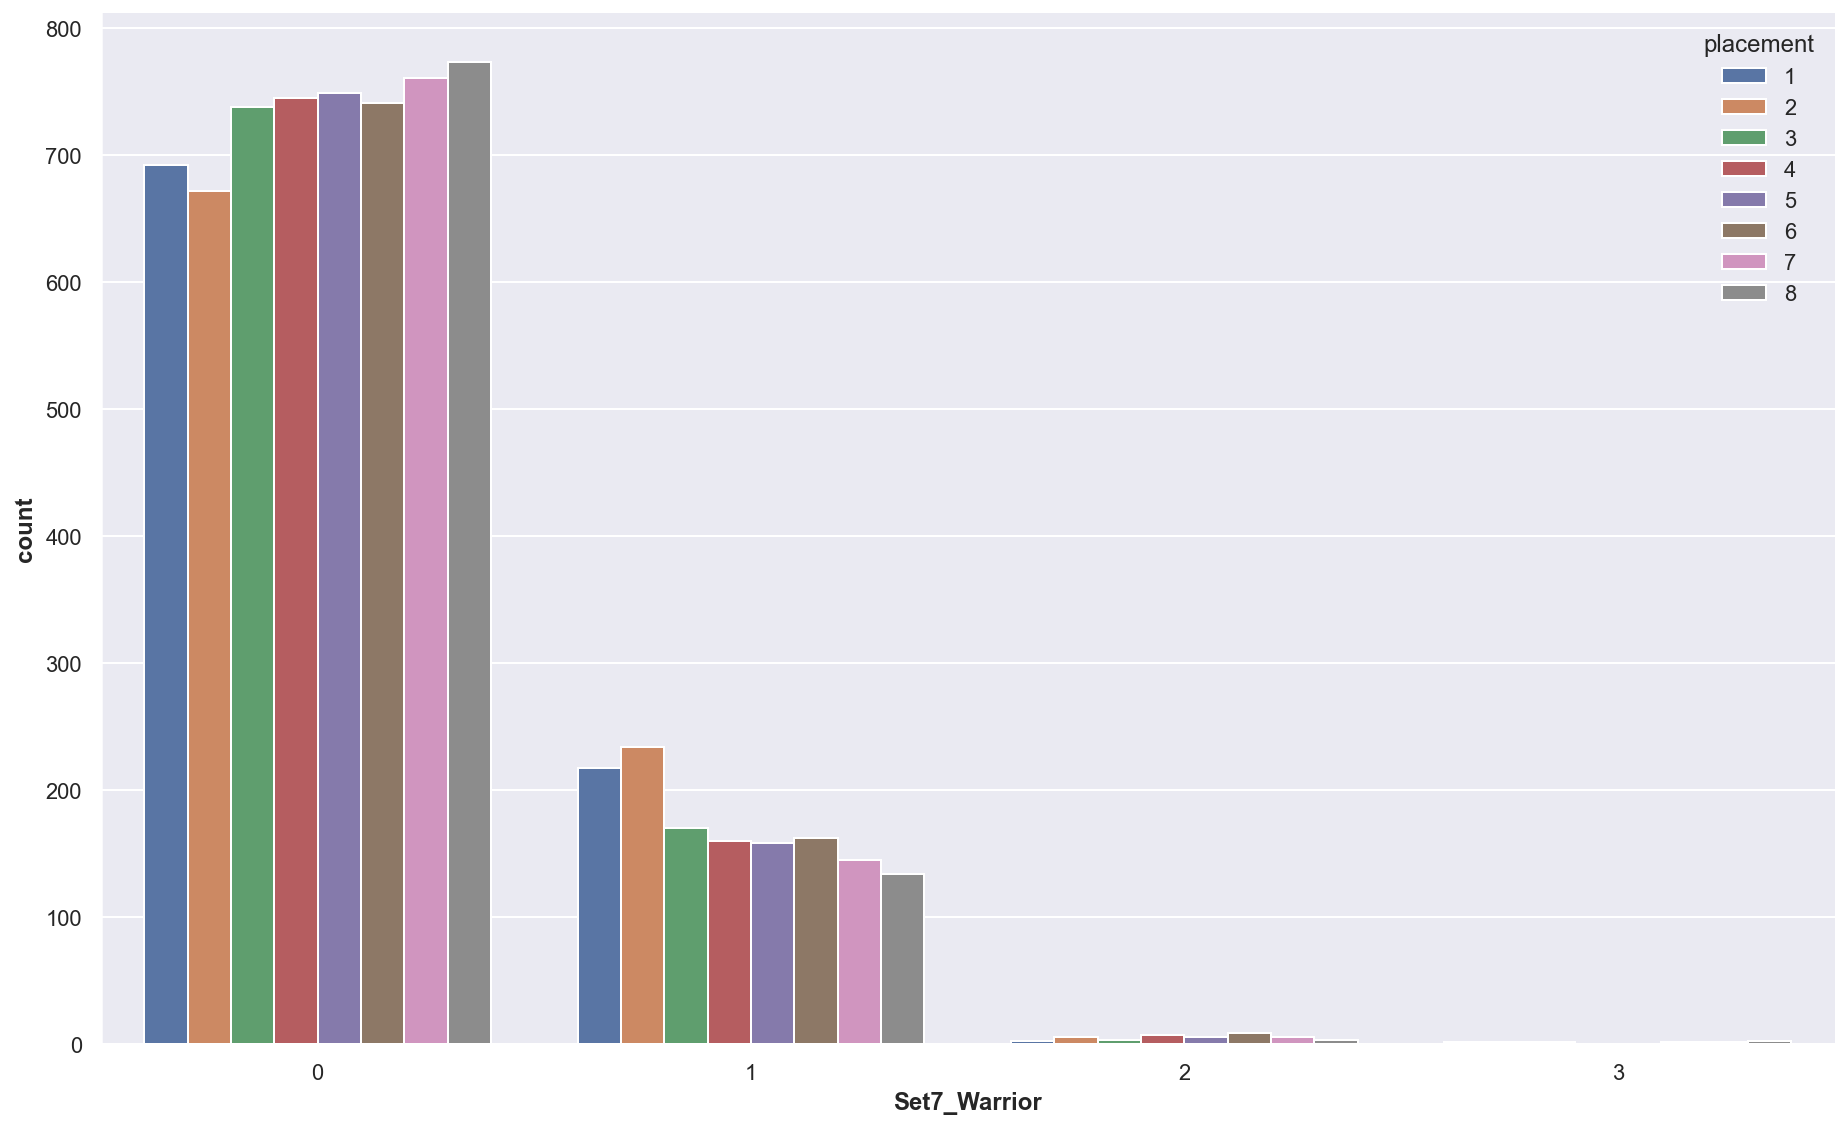

In [1179]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['Set7_Warrior']>=0], x='Set7_Warrior', hue=TARGETNAME)
sns.despine()

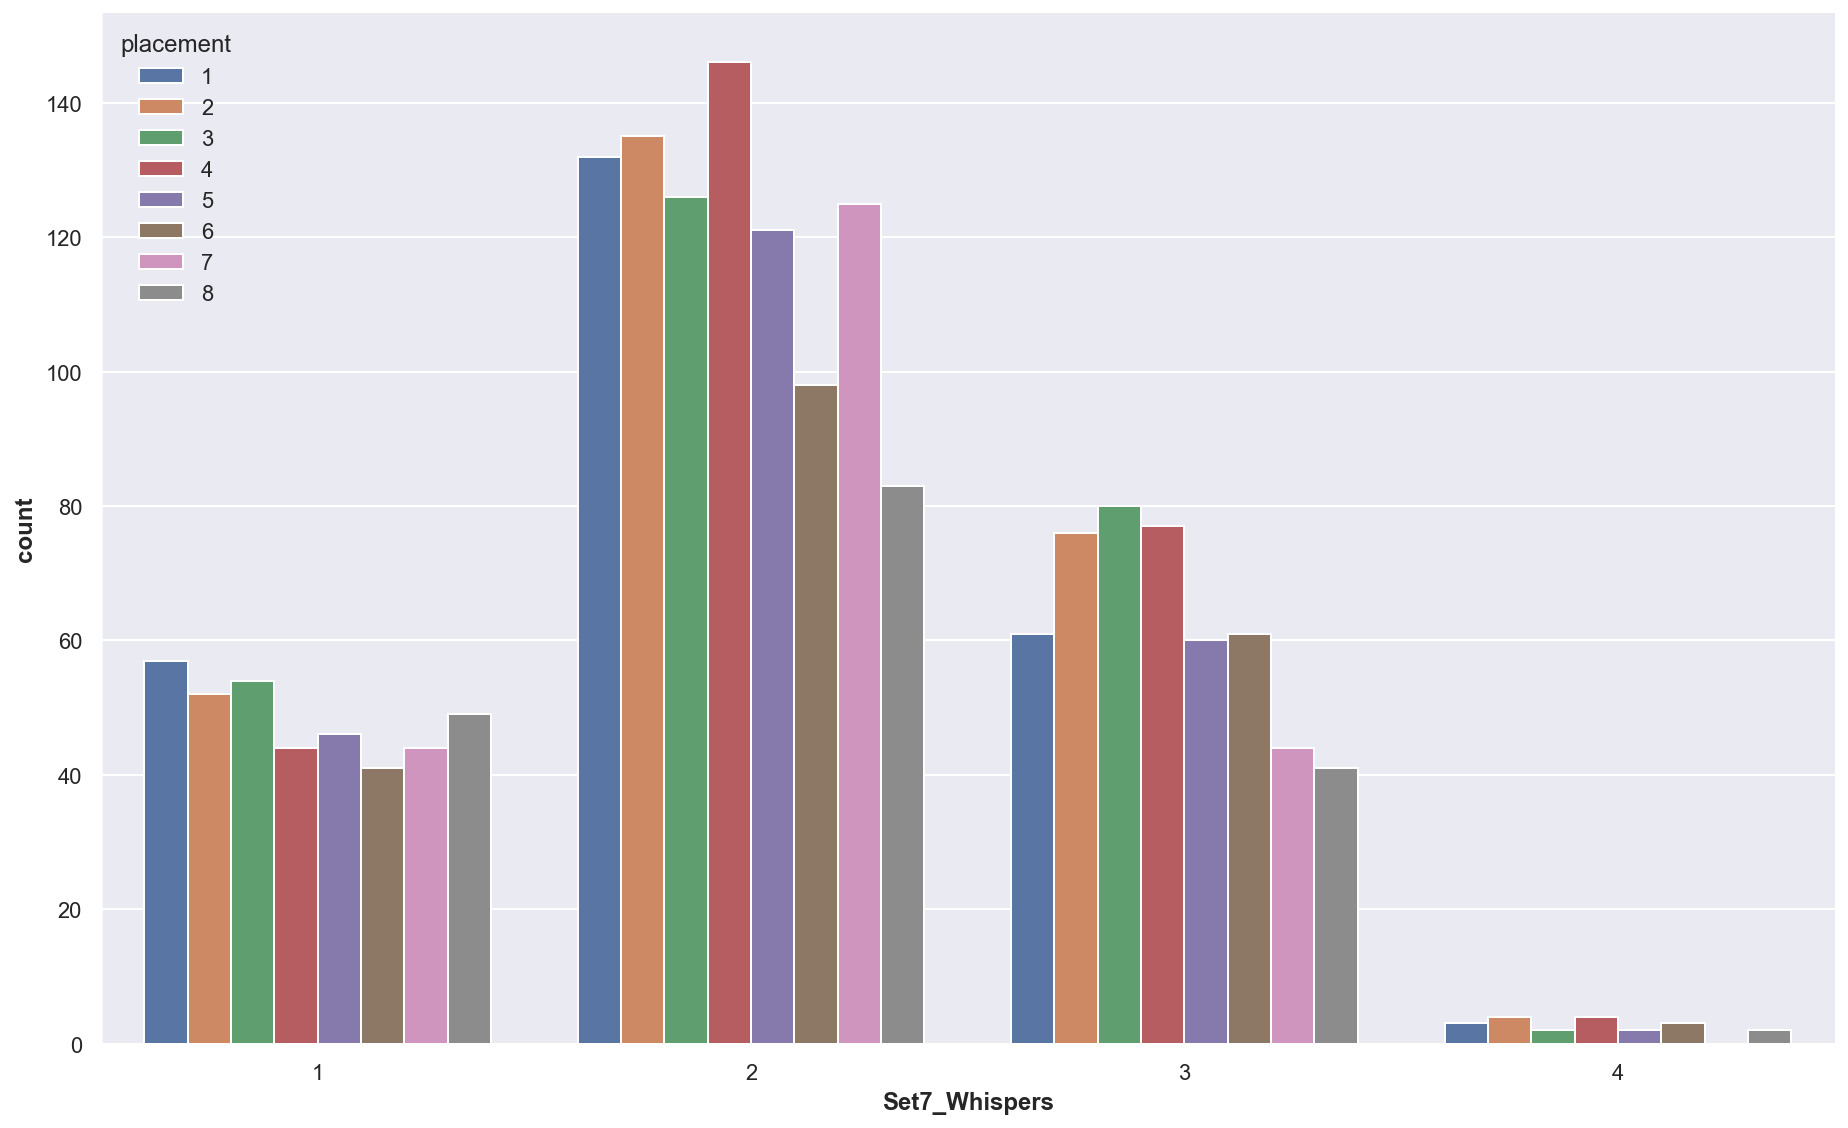

In [1180]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['Set7_Whispers']>0], x='Set7_Whispers', hue=TARGETNAME)
sns.despine()

## Units

Best unit in TFT Yasuo. DIESOFYASUO

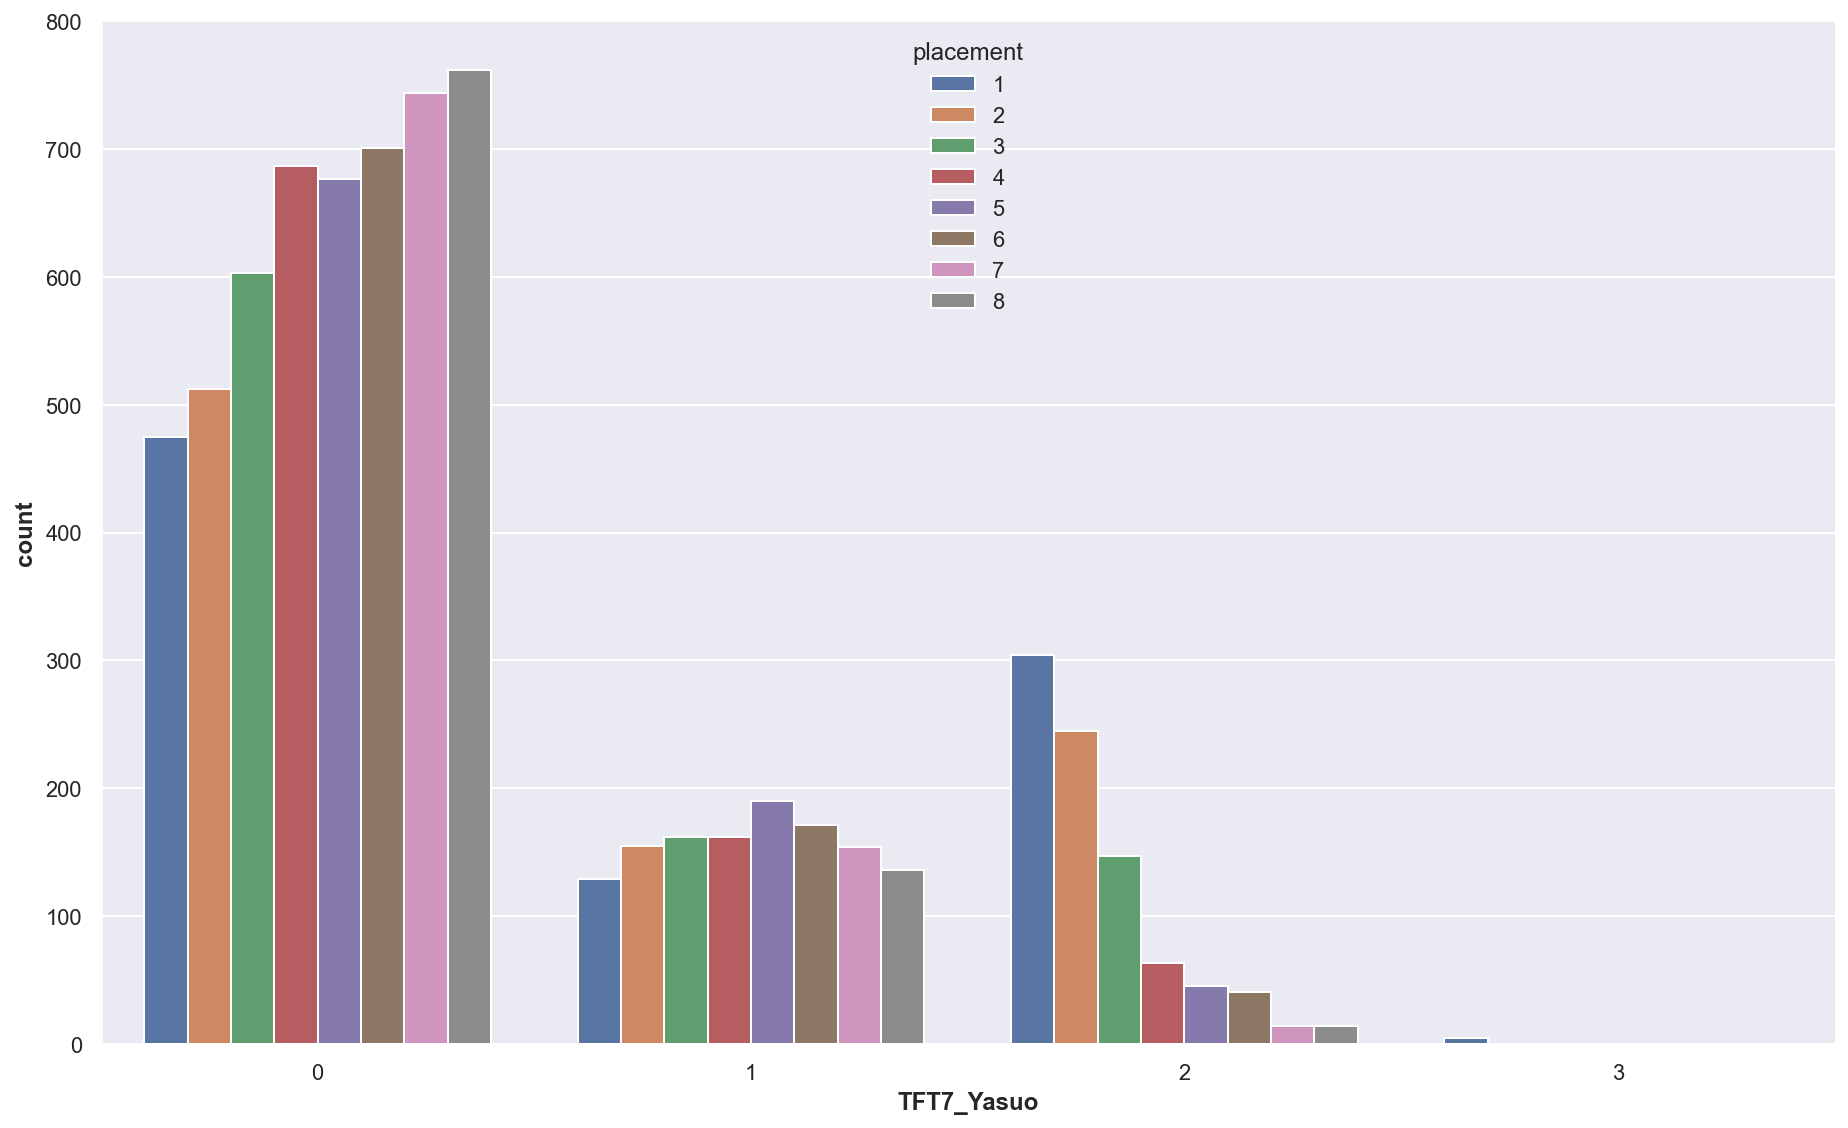

In [1181]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df, x='TFT7_Yasuo', hue=TARGETNAME)
sns.despine()

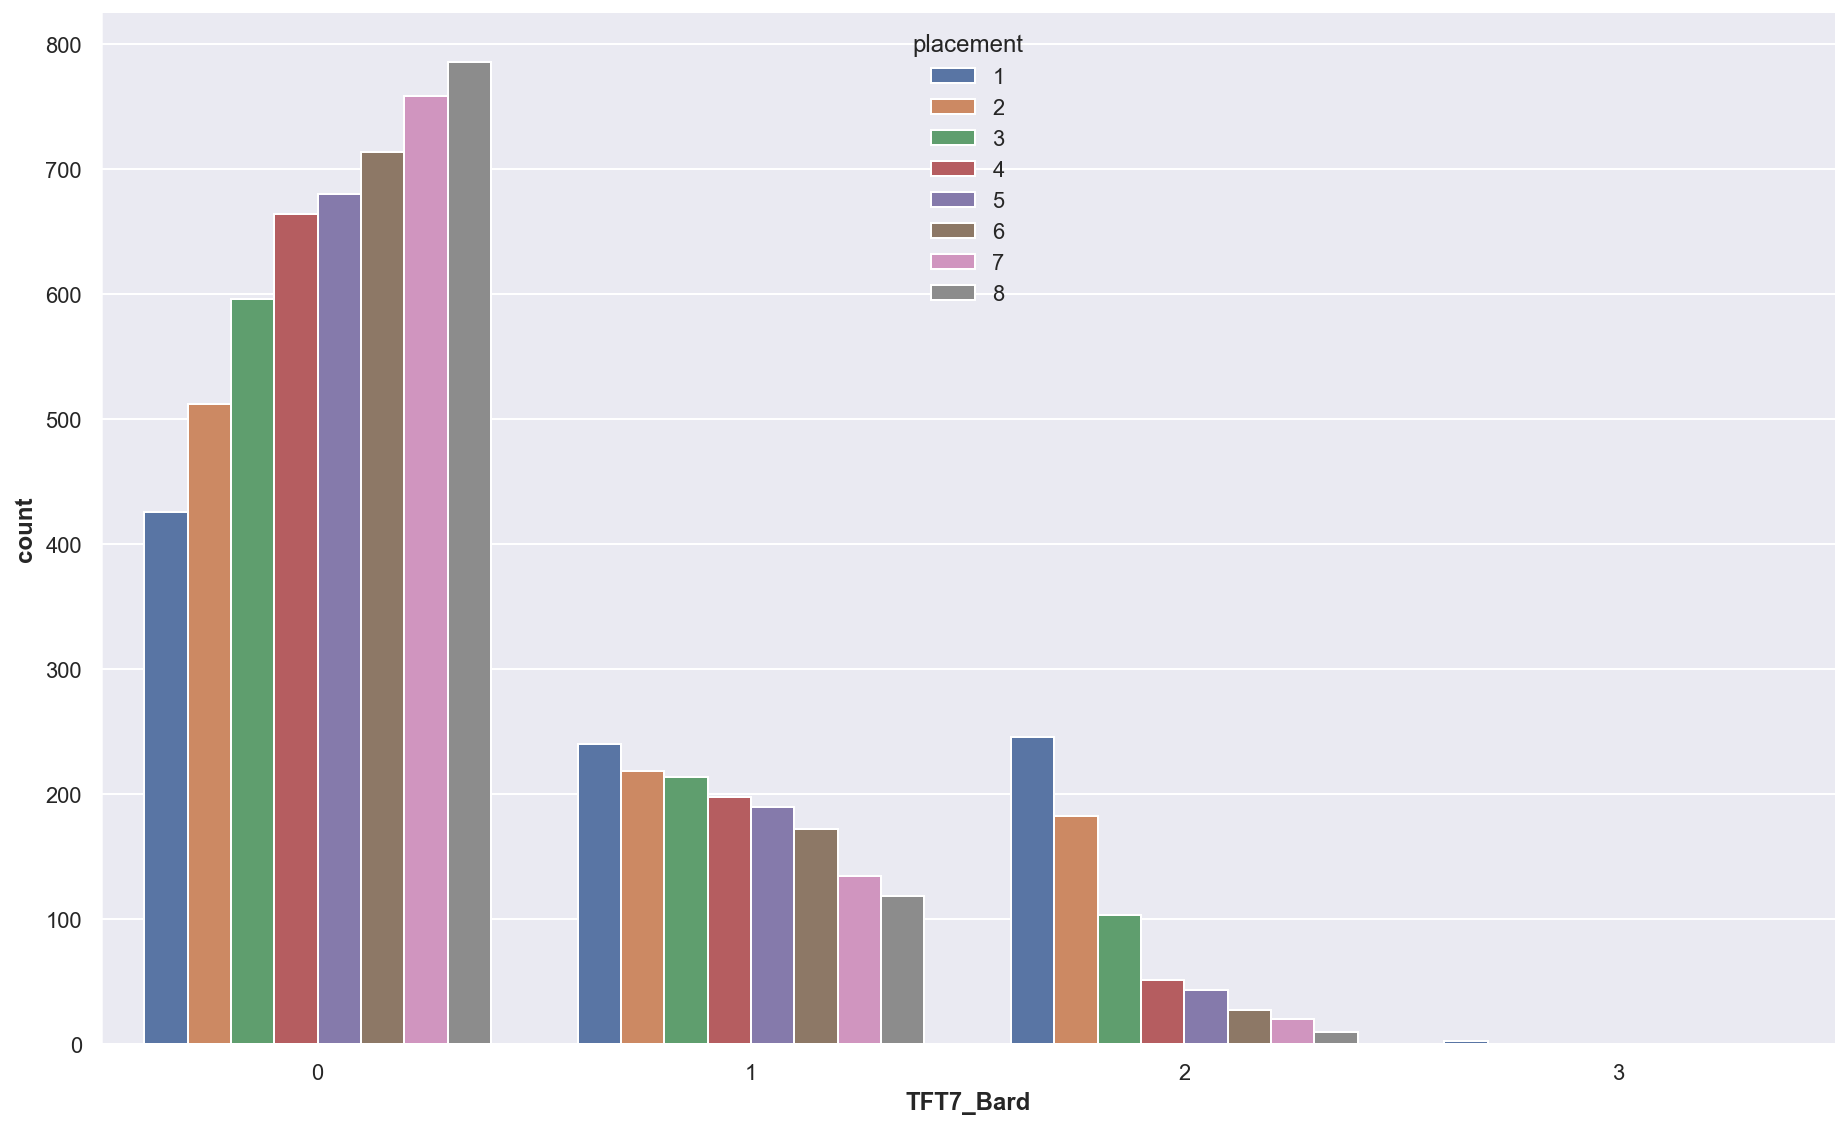

In [1182]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df, x='TFT7_Bard', hue=TARGETNAME)
sns.despine()

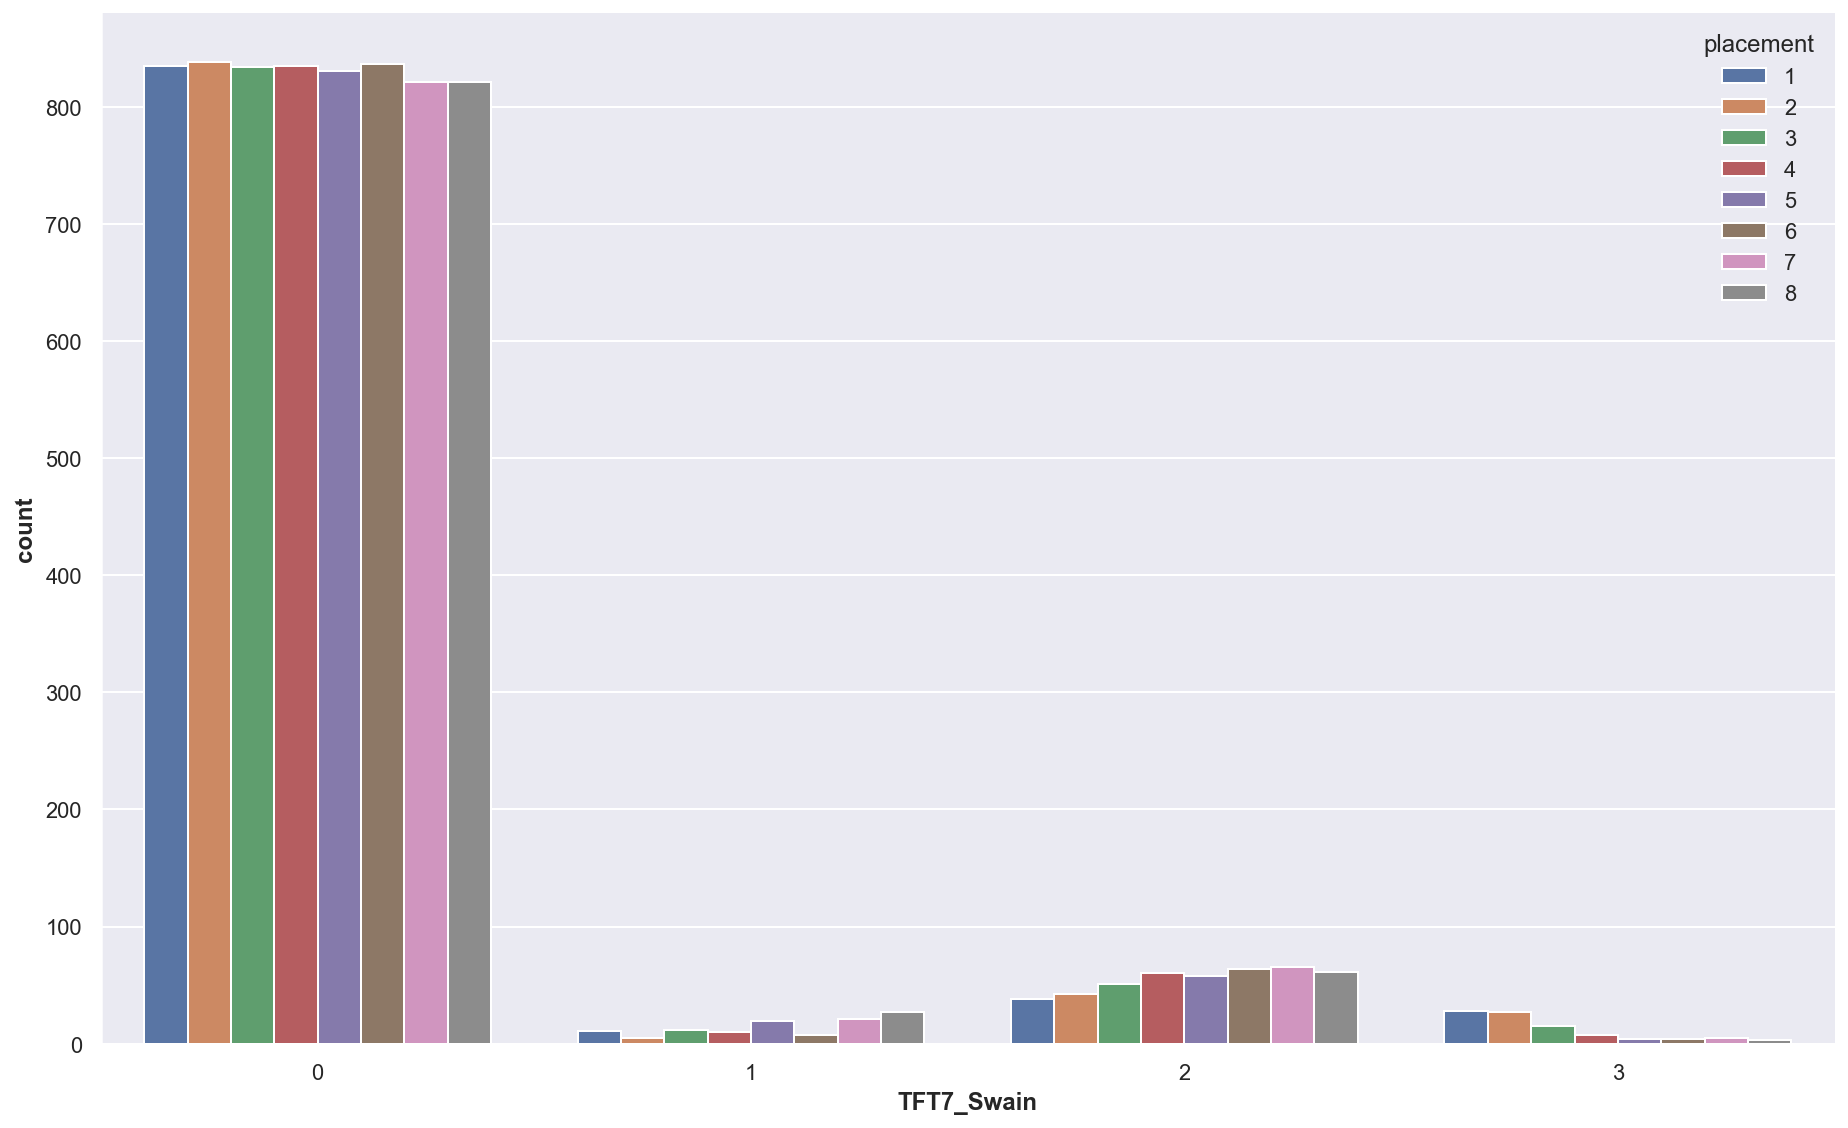

In [1183]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df, x='TFT7_Swain', hue=TARGETNAME)
sns.despine()

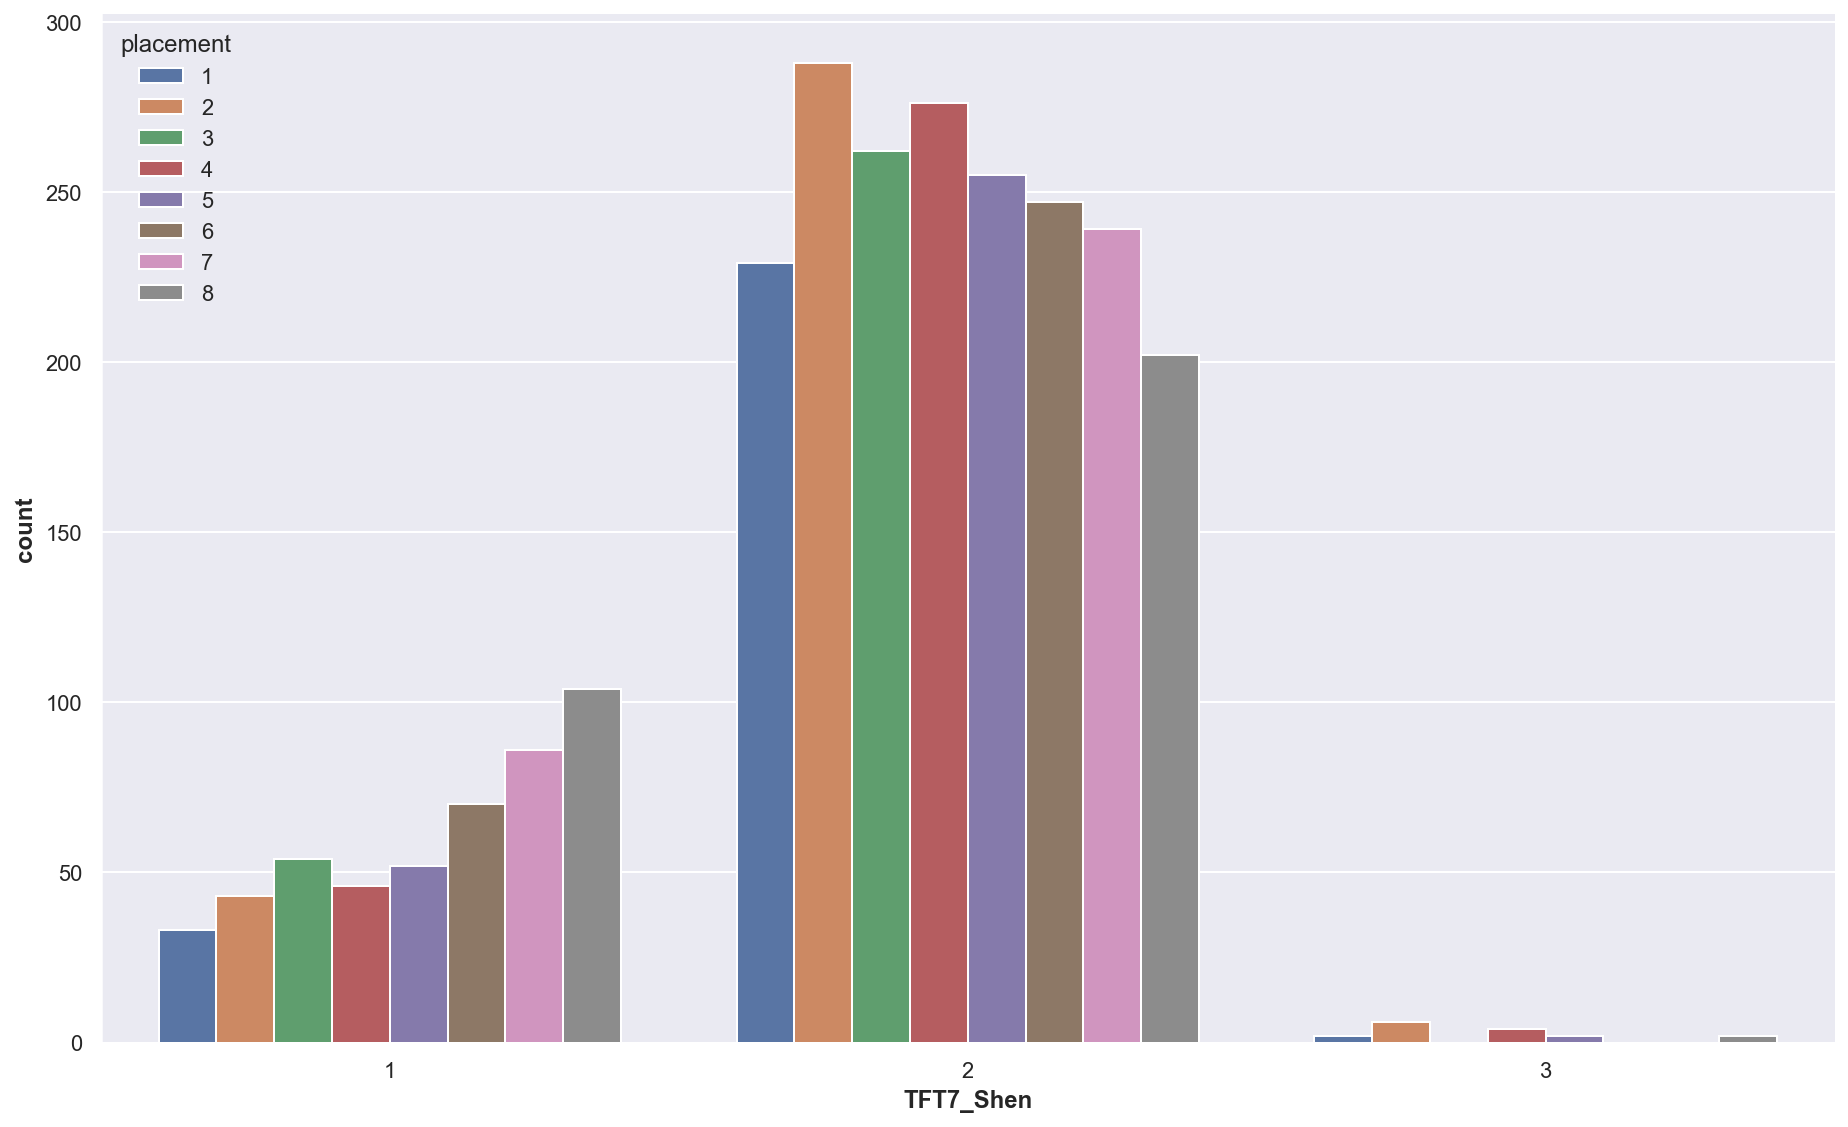

In [1184]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['TFT7_Shen']>0], x='TFT7_Shen', hue=TARGETNAME)
sns.despine()

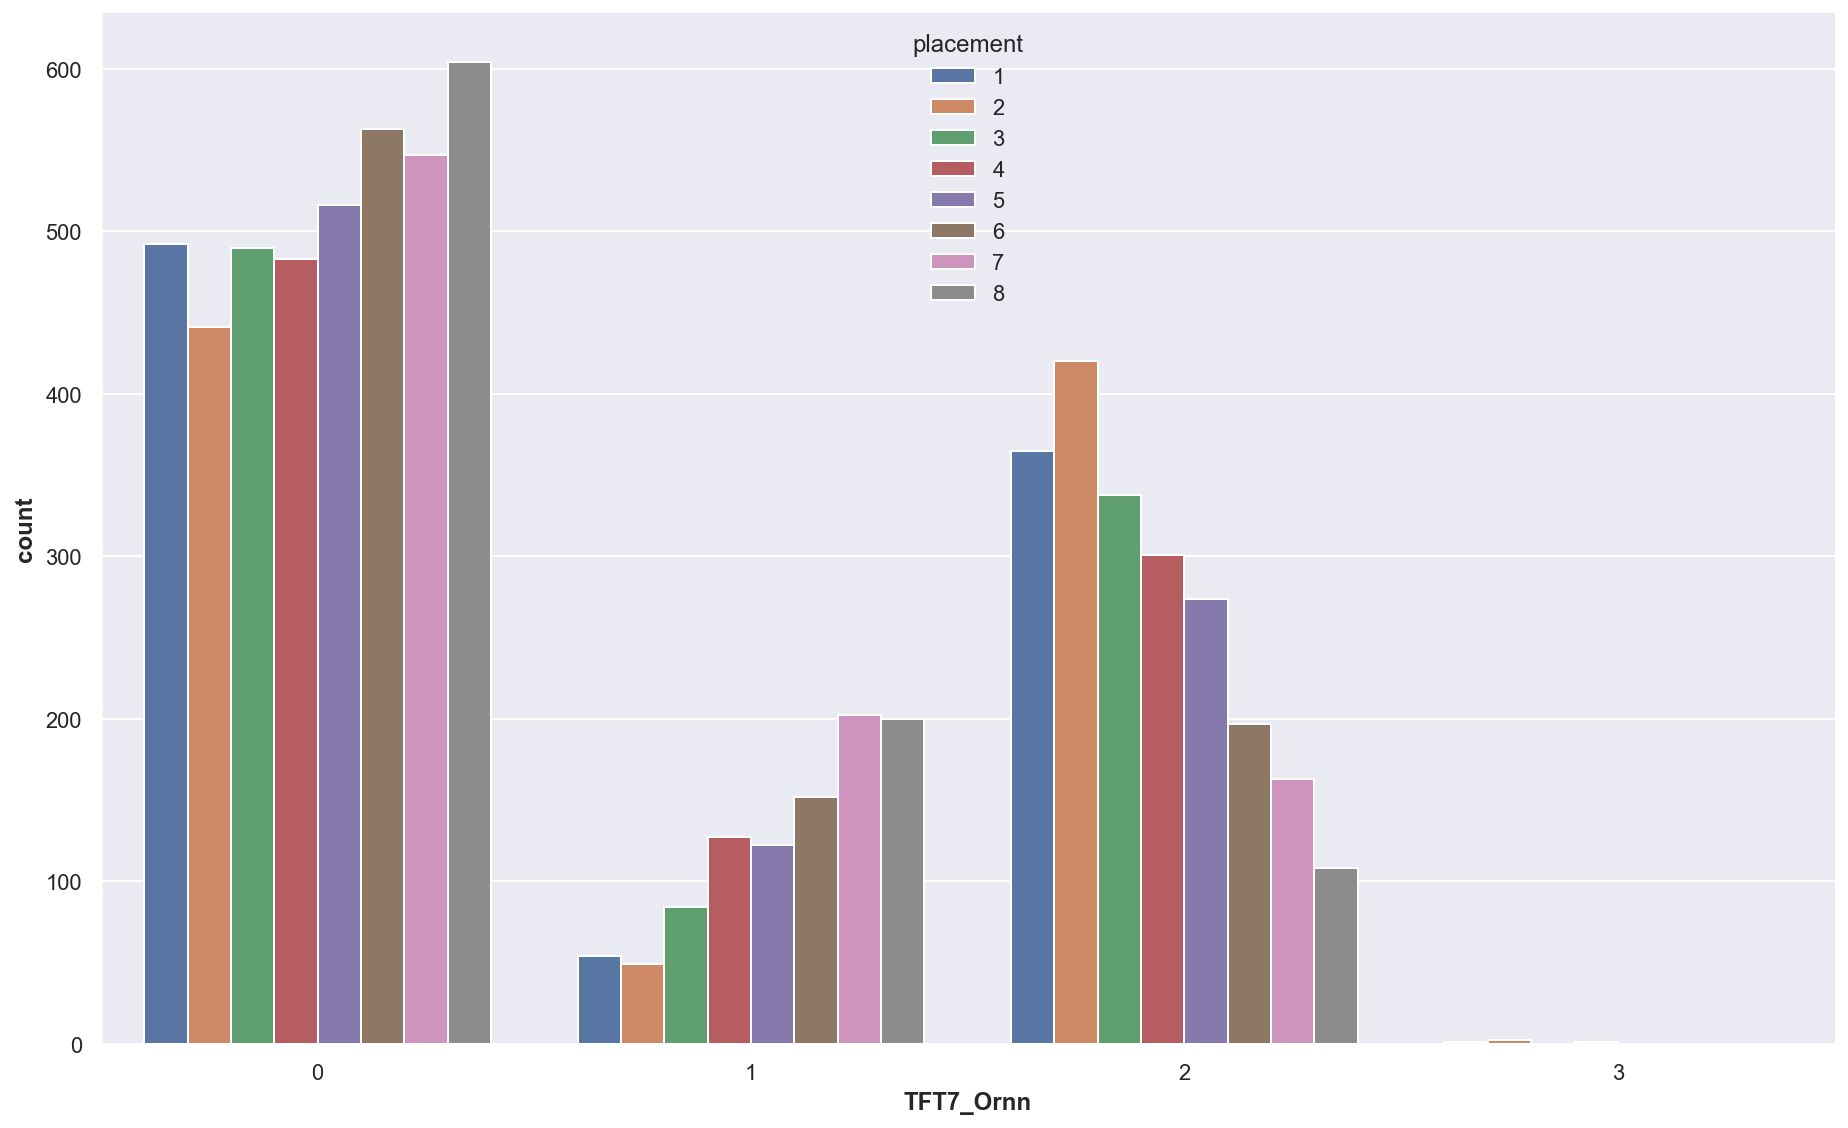

In [1185]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['TFT7_Ornn']>=0], x='TFT7_Ornn', hue=TARGETNAME)
sns.despine()

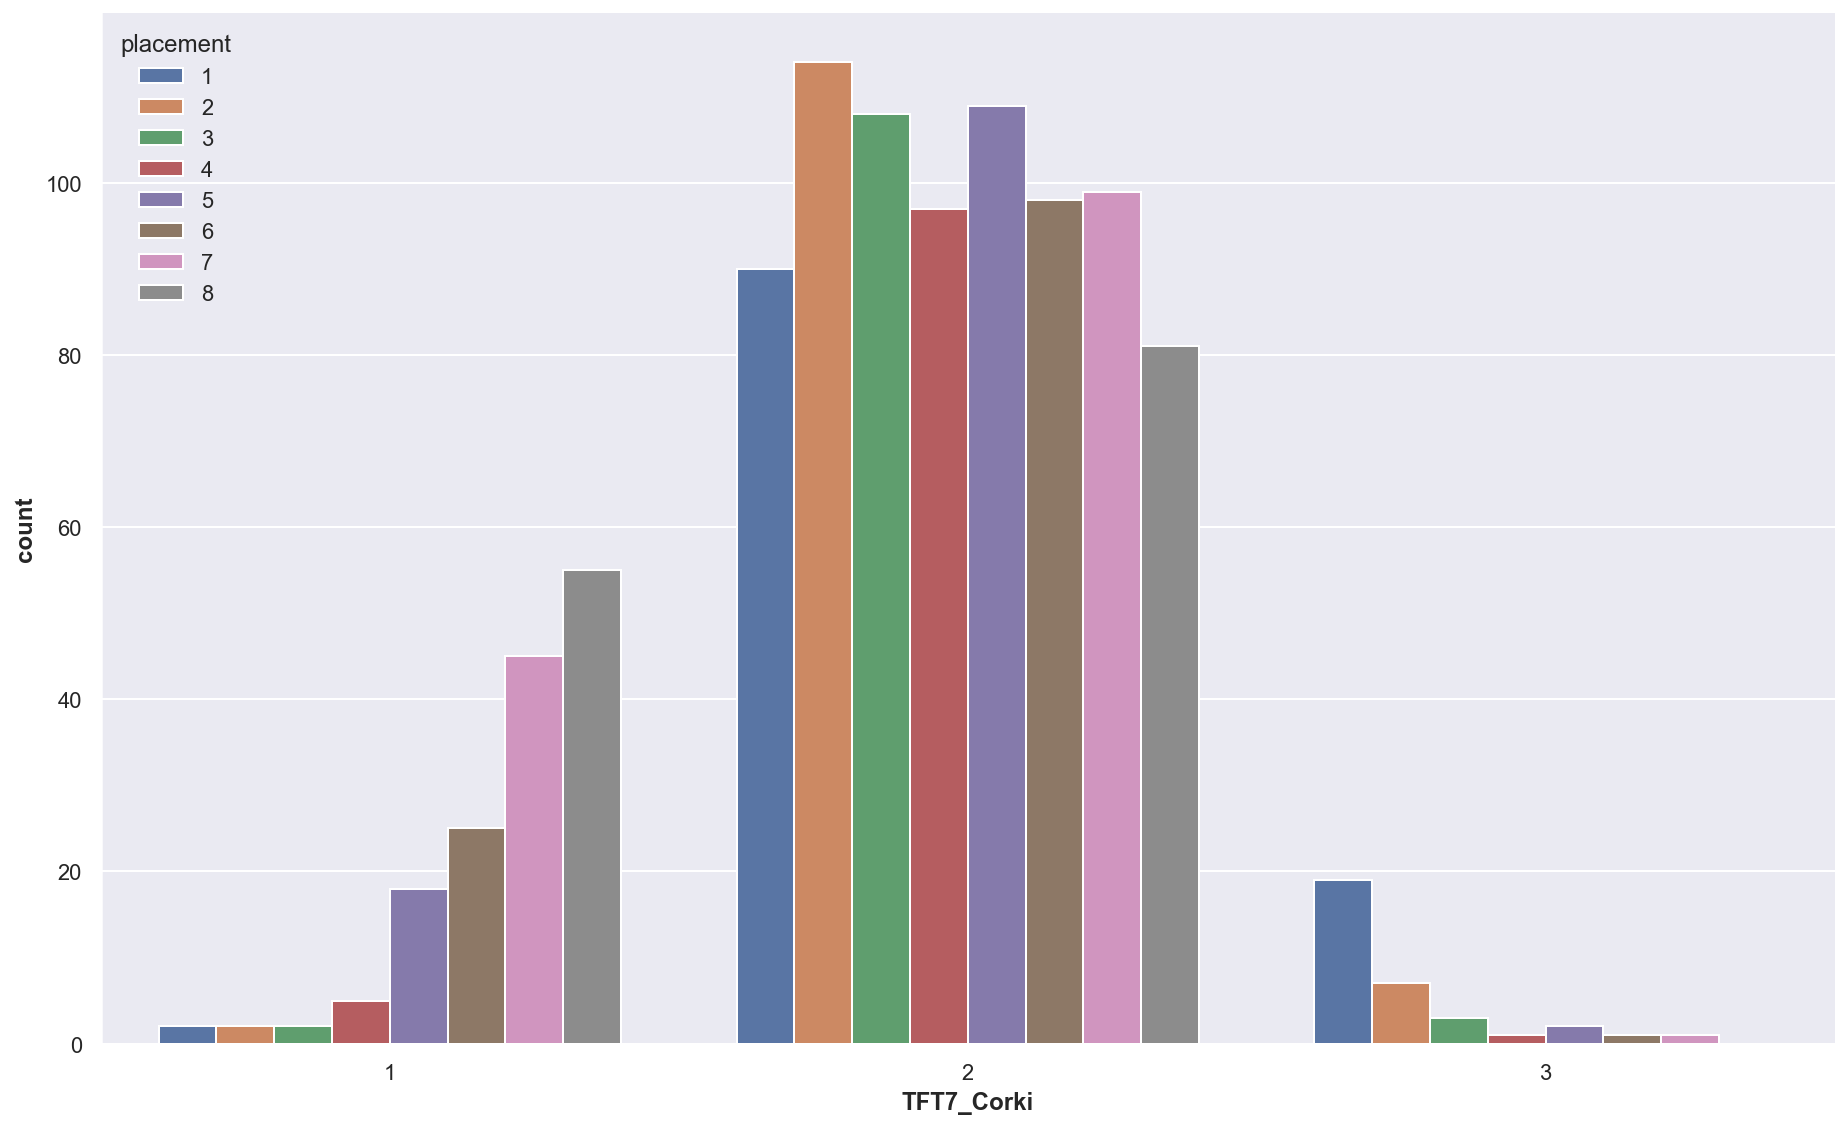

In [1186]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['TFT7_Corki']>0], x='TFT7_Corki', hue=TARGETNAME)
sns.despine()

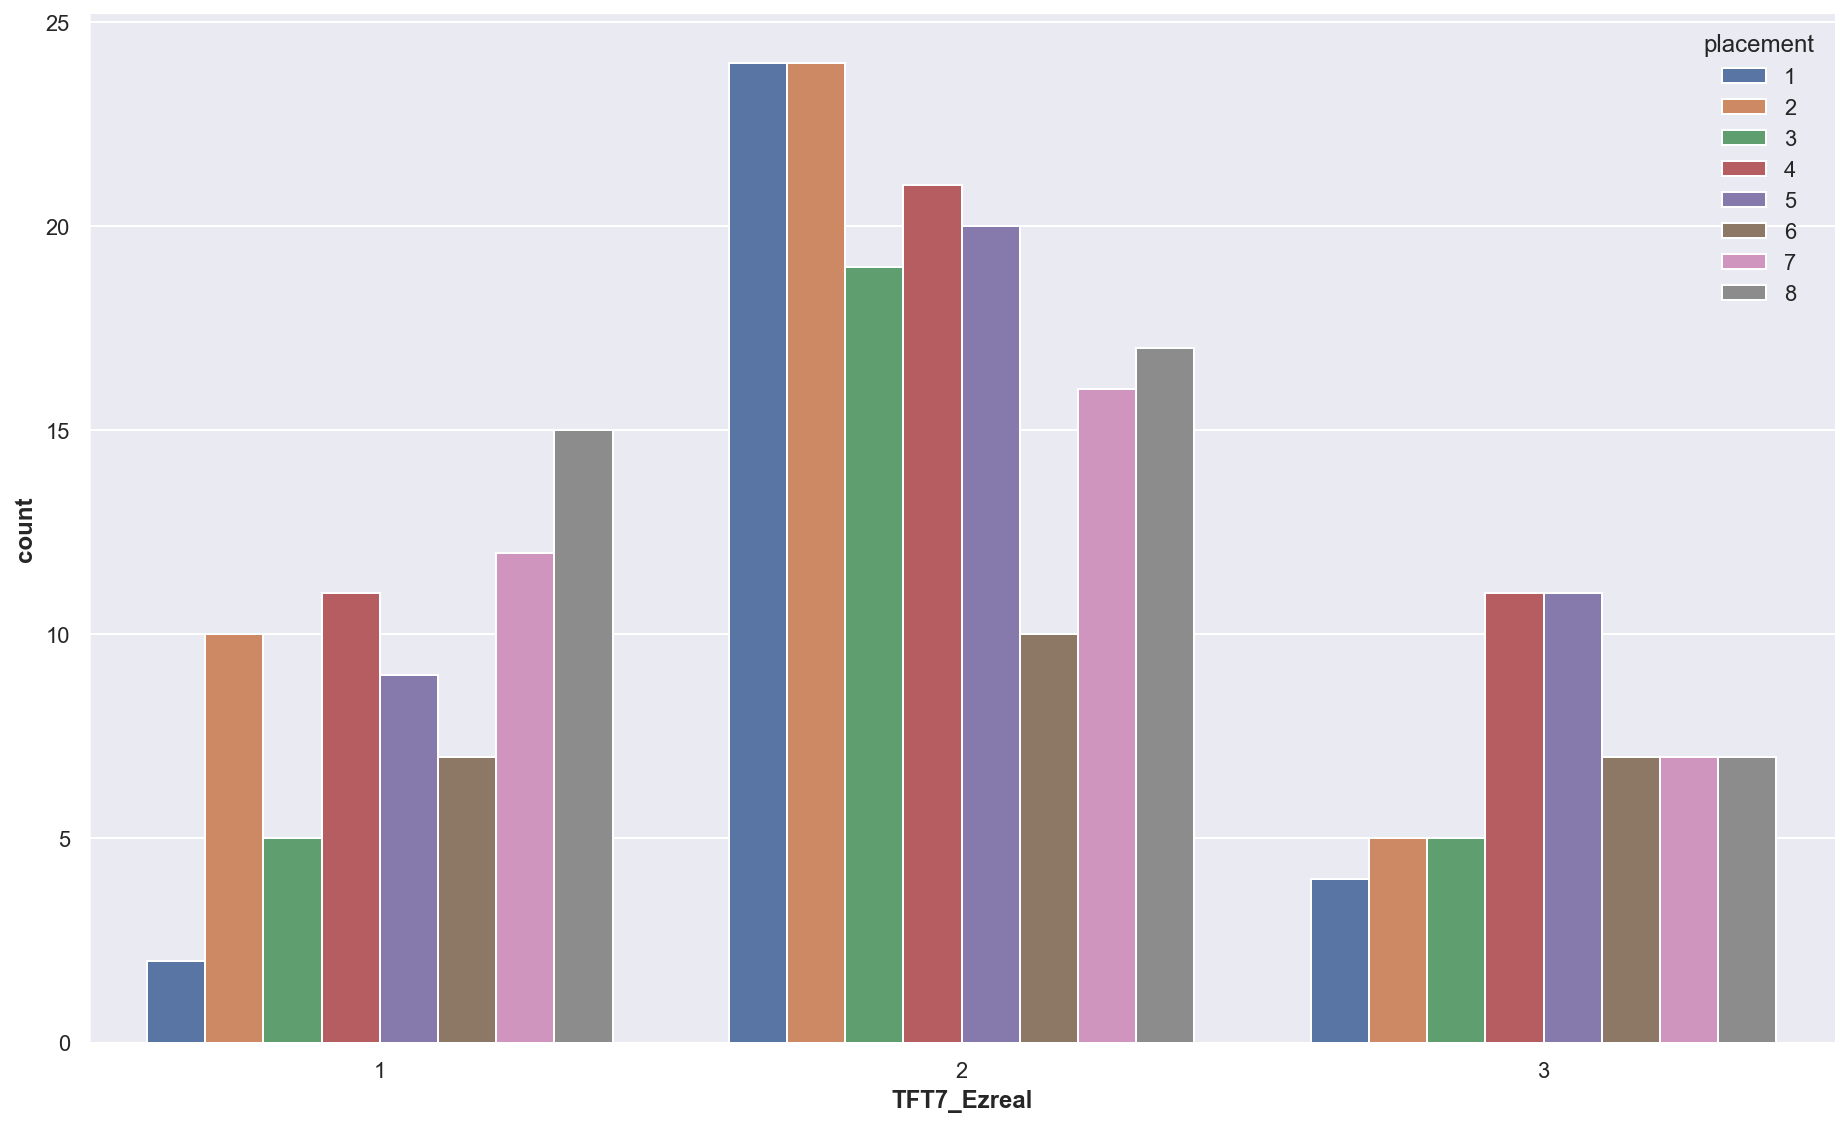

In [1187]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['TFT7_Ezreal']>0], x='TFT7_Ezreal', hue=TARGETNAME)
sns.despine()

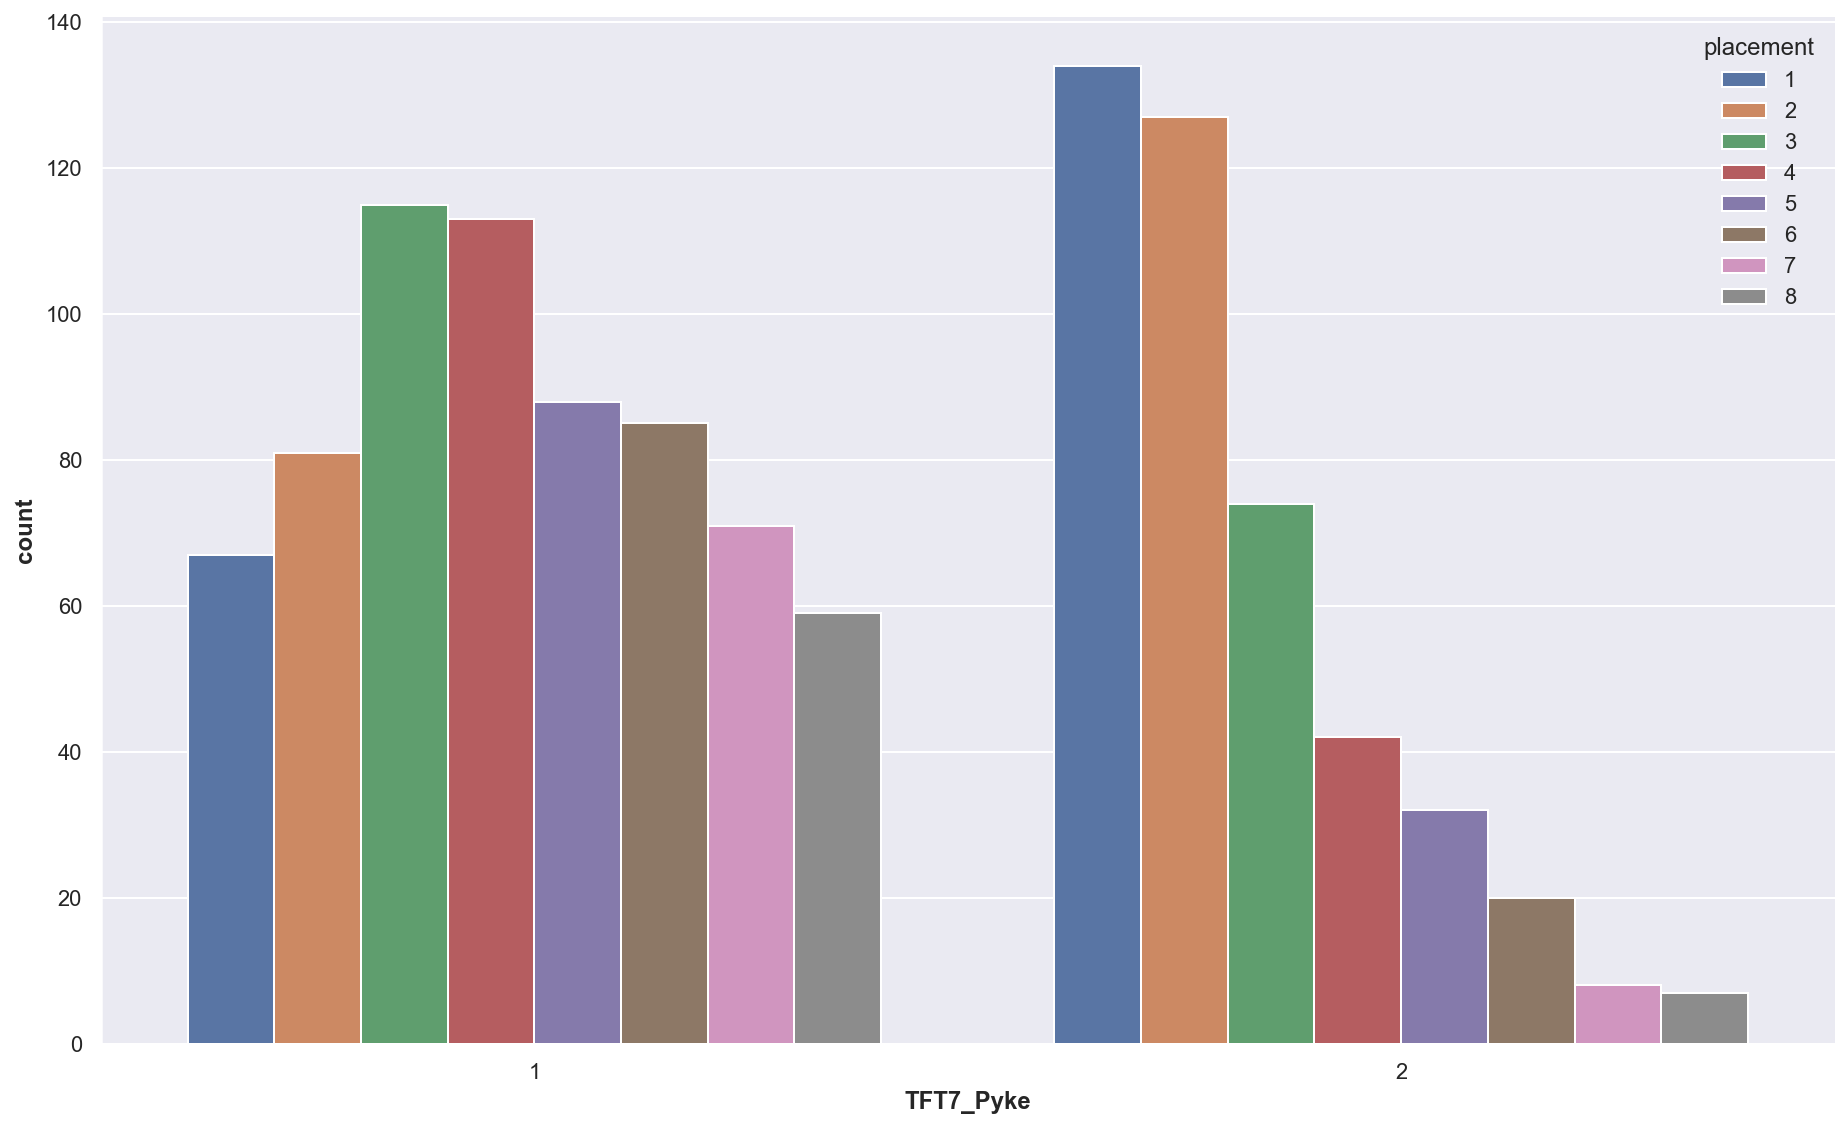

In [1188]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['TFT7_Pyke']>0], x='TFT7_Pyke', hue=TARGETNAME)
sns.despine()

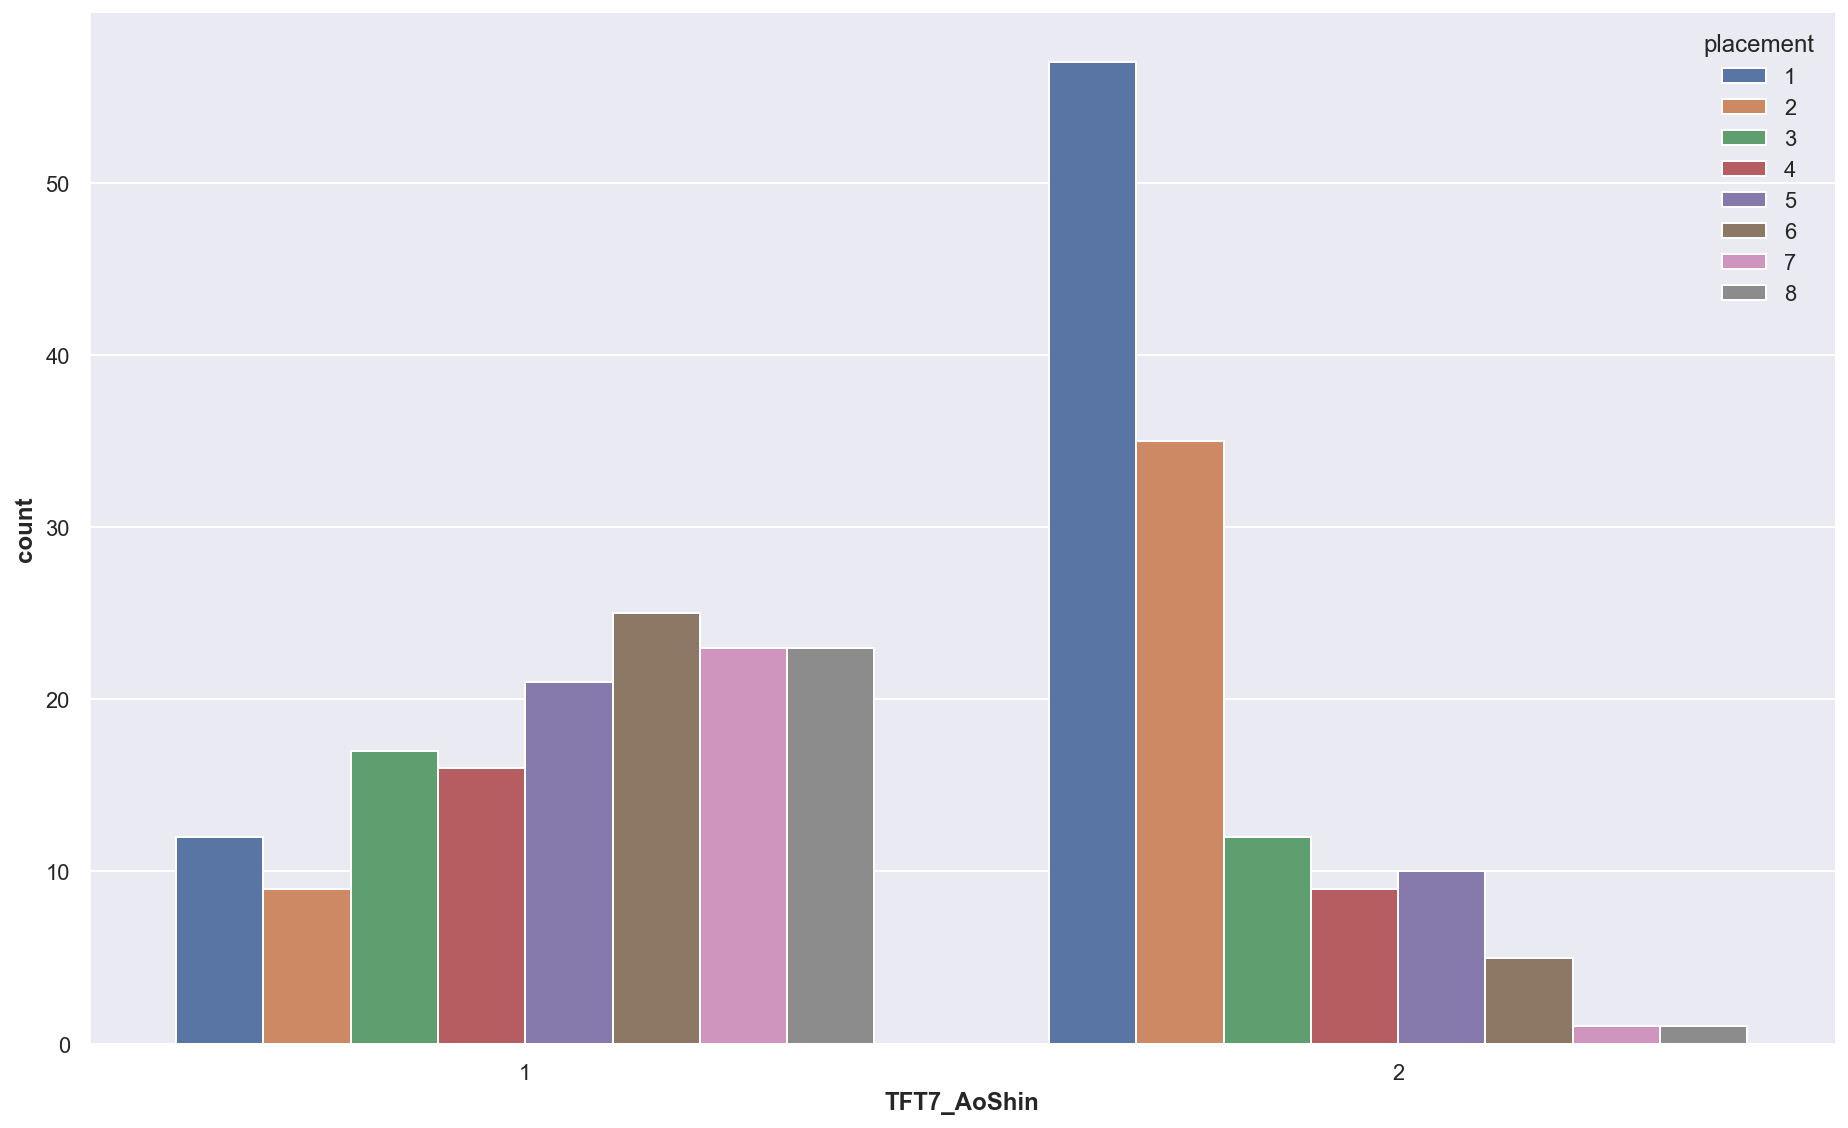

In [1189]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['TFT7_AoShin']>0], x='TFT7_AoShin', hue=TARGETNAME)
sns.despine()

Daeja.


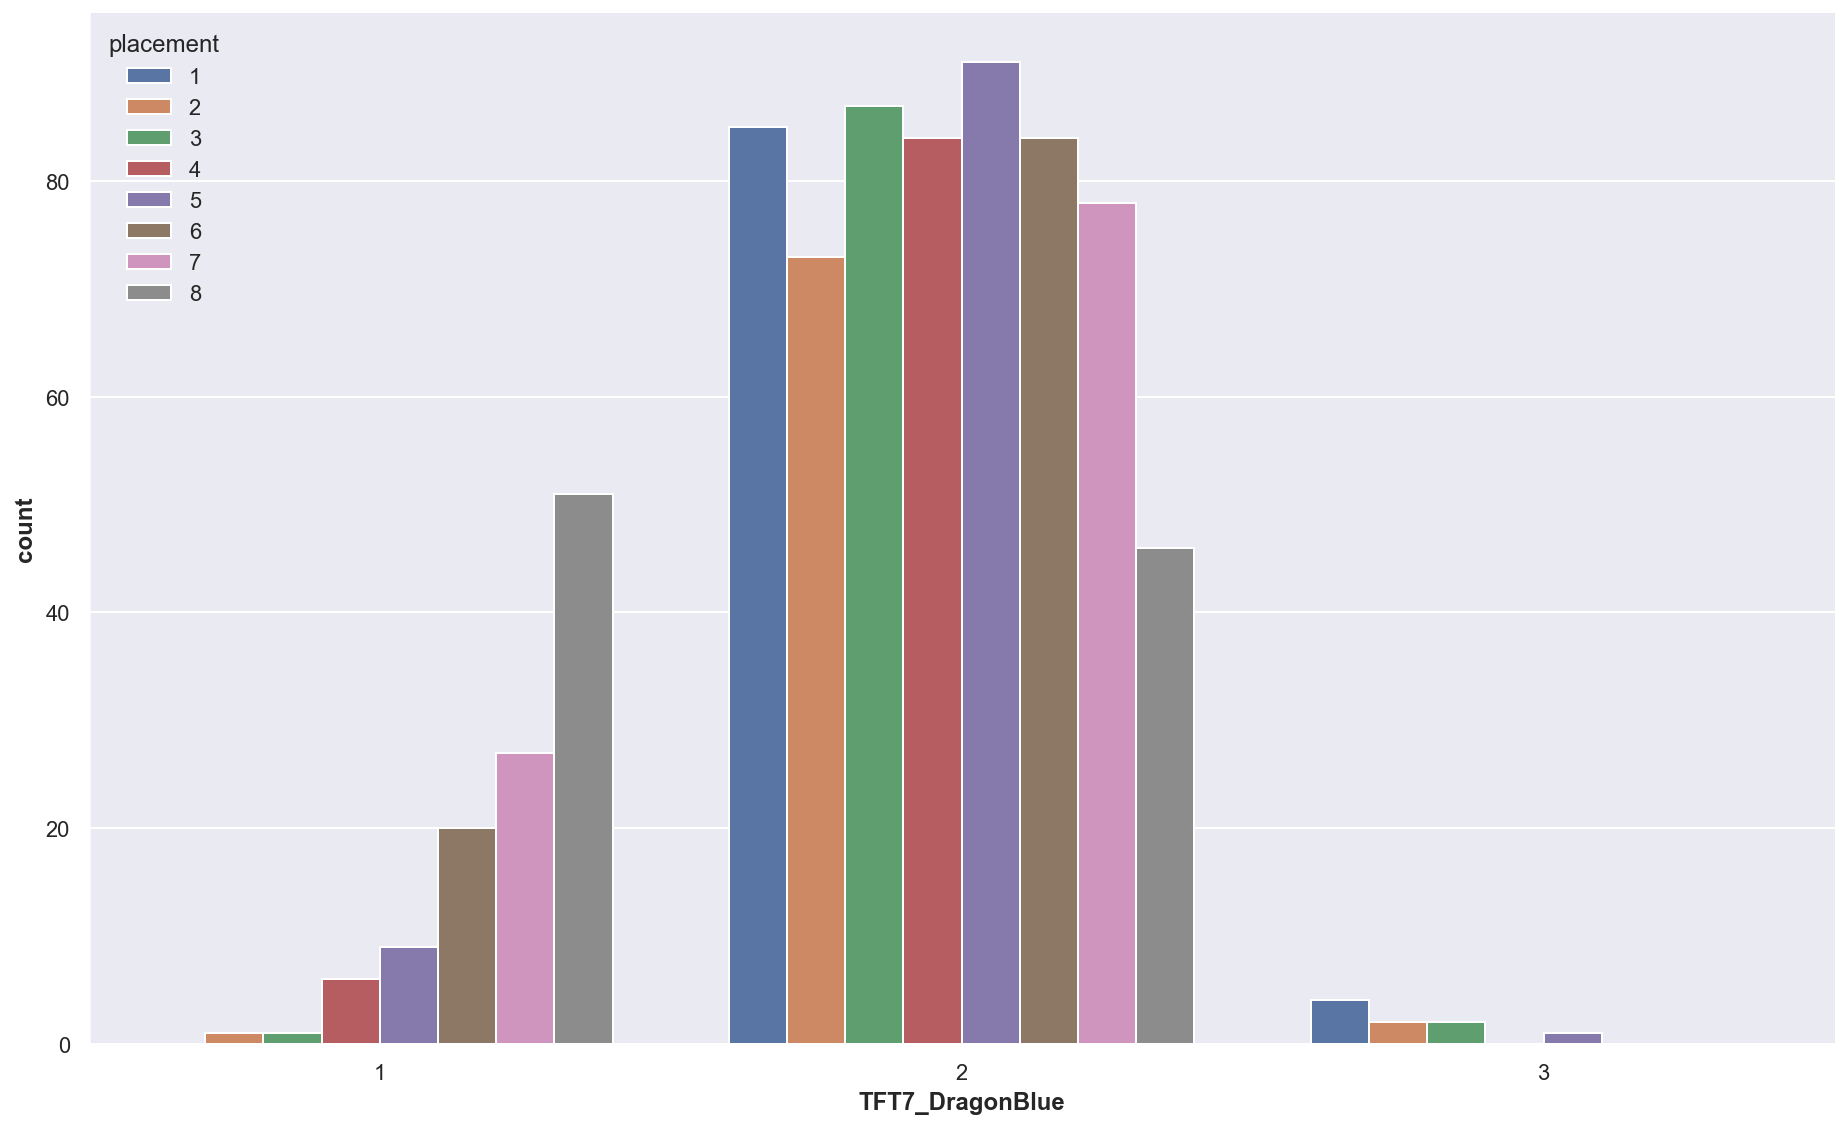

In [1190]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['TFT7_DragonBlue']>0], x='TFT7_DragonBlue', hue=TARGETNAME)
sns.despine()

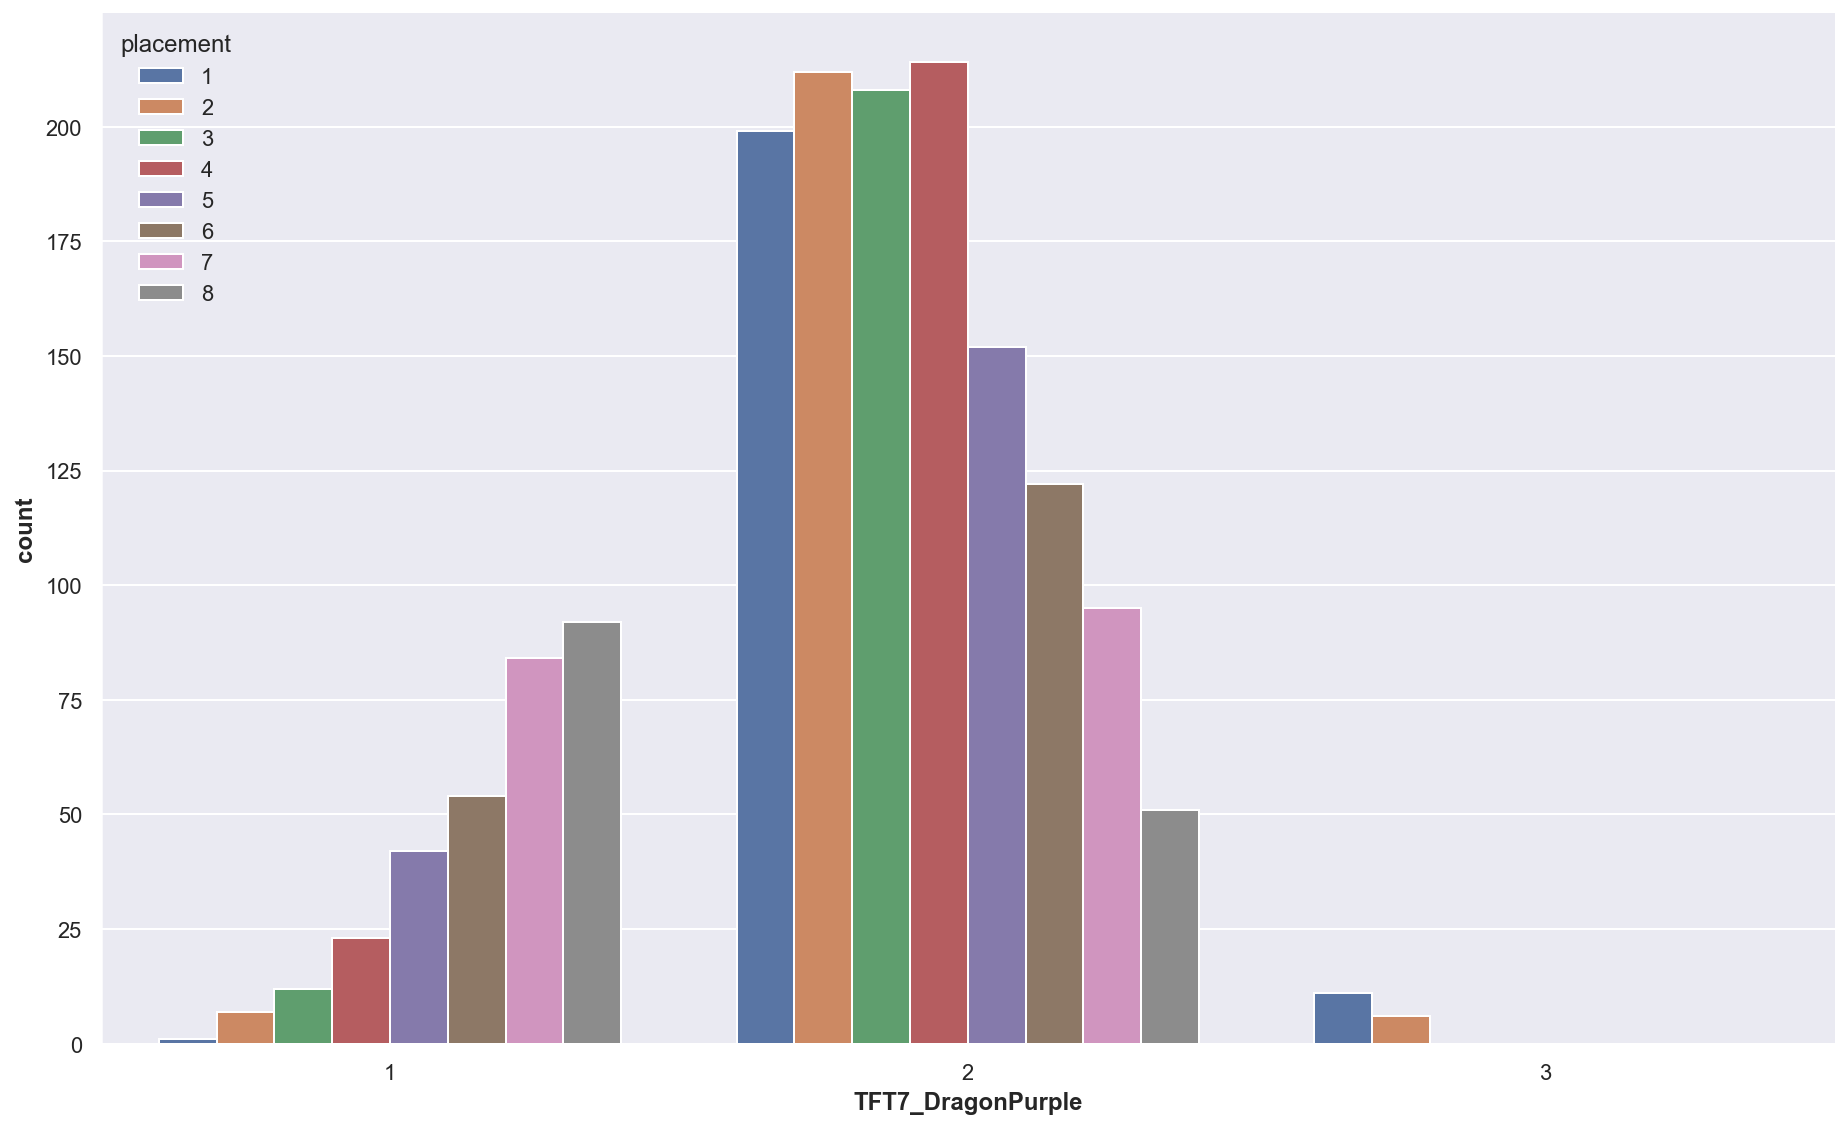

In [1191]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['TFT7_DragonPurple']>0], x='TFT7_DragonPurple', hue=TARGETNAME)
sns.despine()

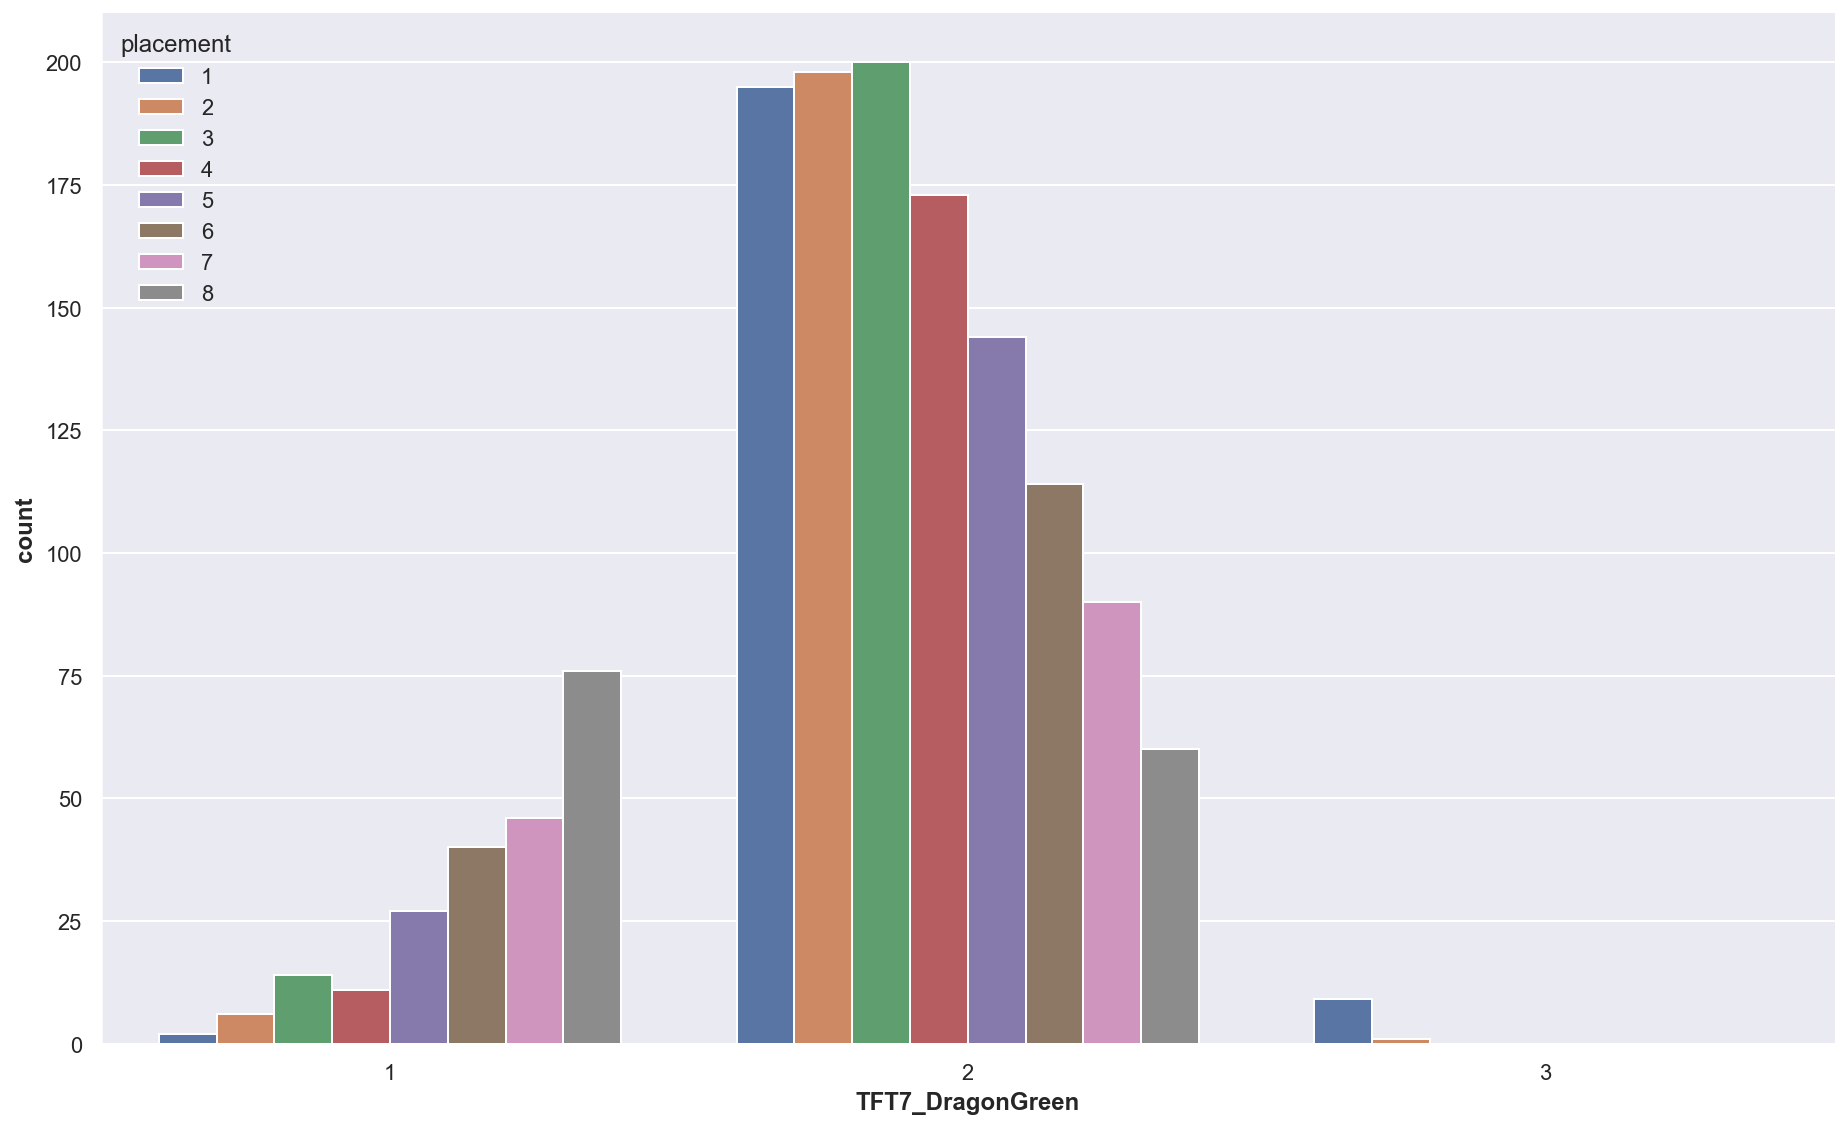

In [1192]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['TFT7_DragonGreen']>0], x='TFT7_DragonGreen', hue=TARGETNAME)
sns.despine()

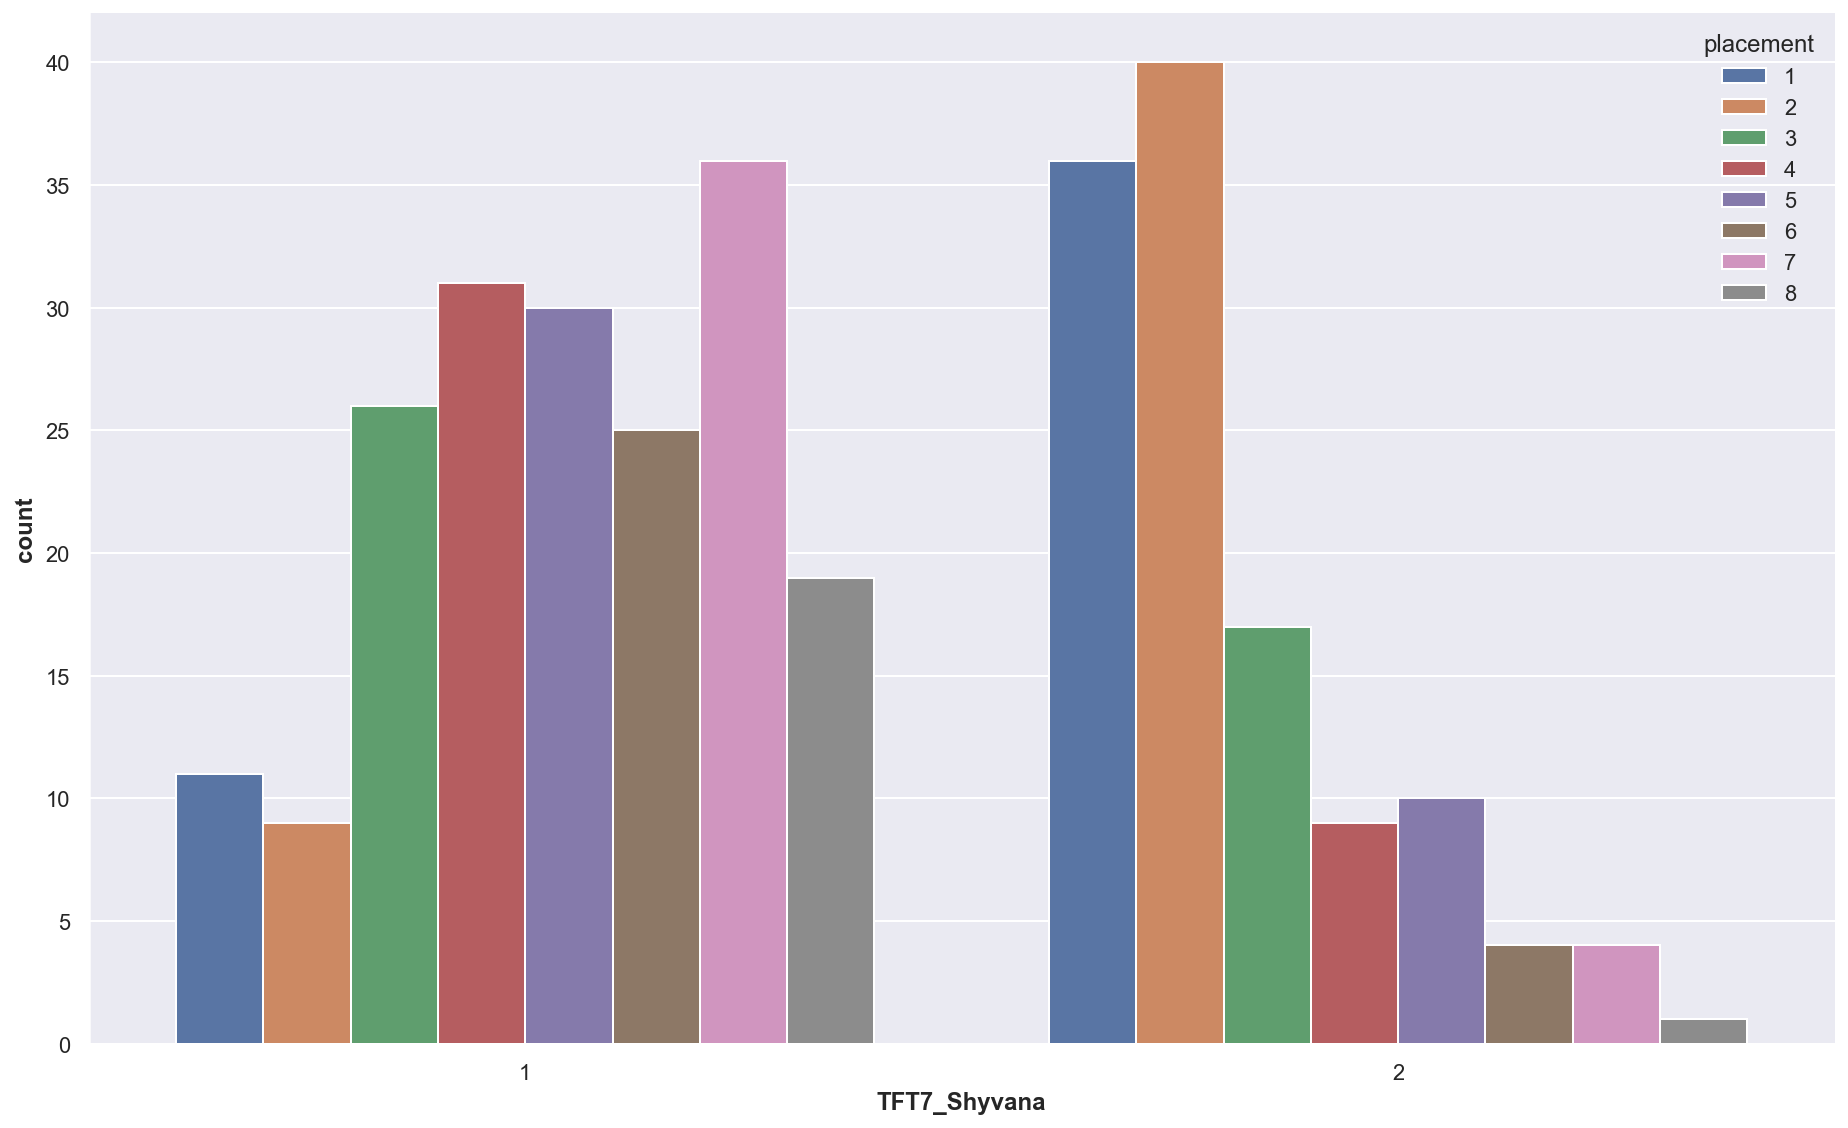

In [1193]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['TFT7_Shyvana']>0], x='TFT7_Shyvana', hue=TARGETNAME)
sns.despine()

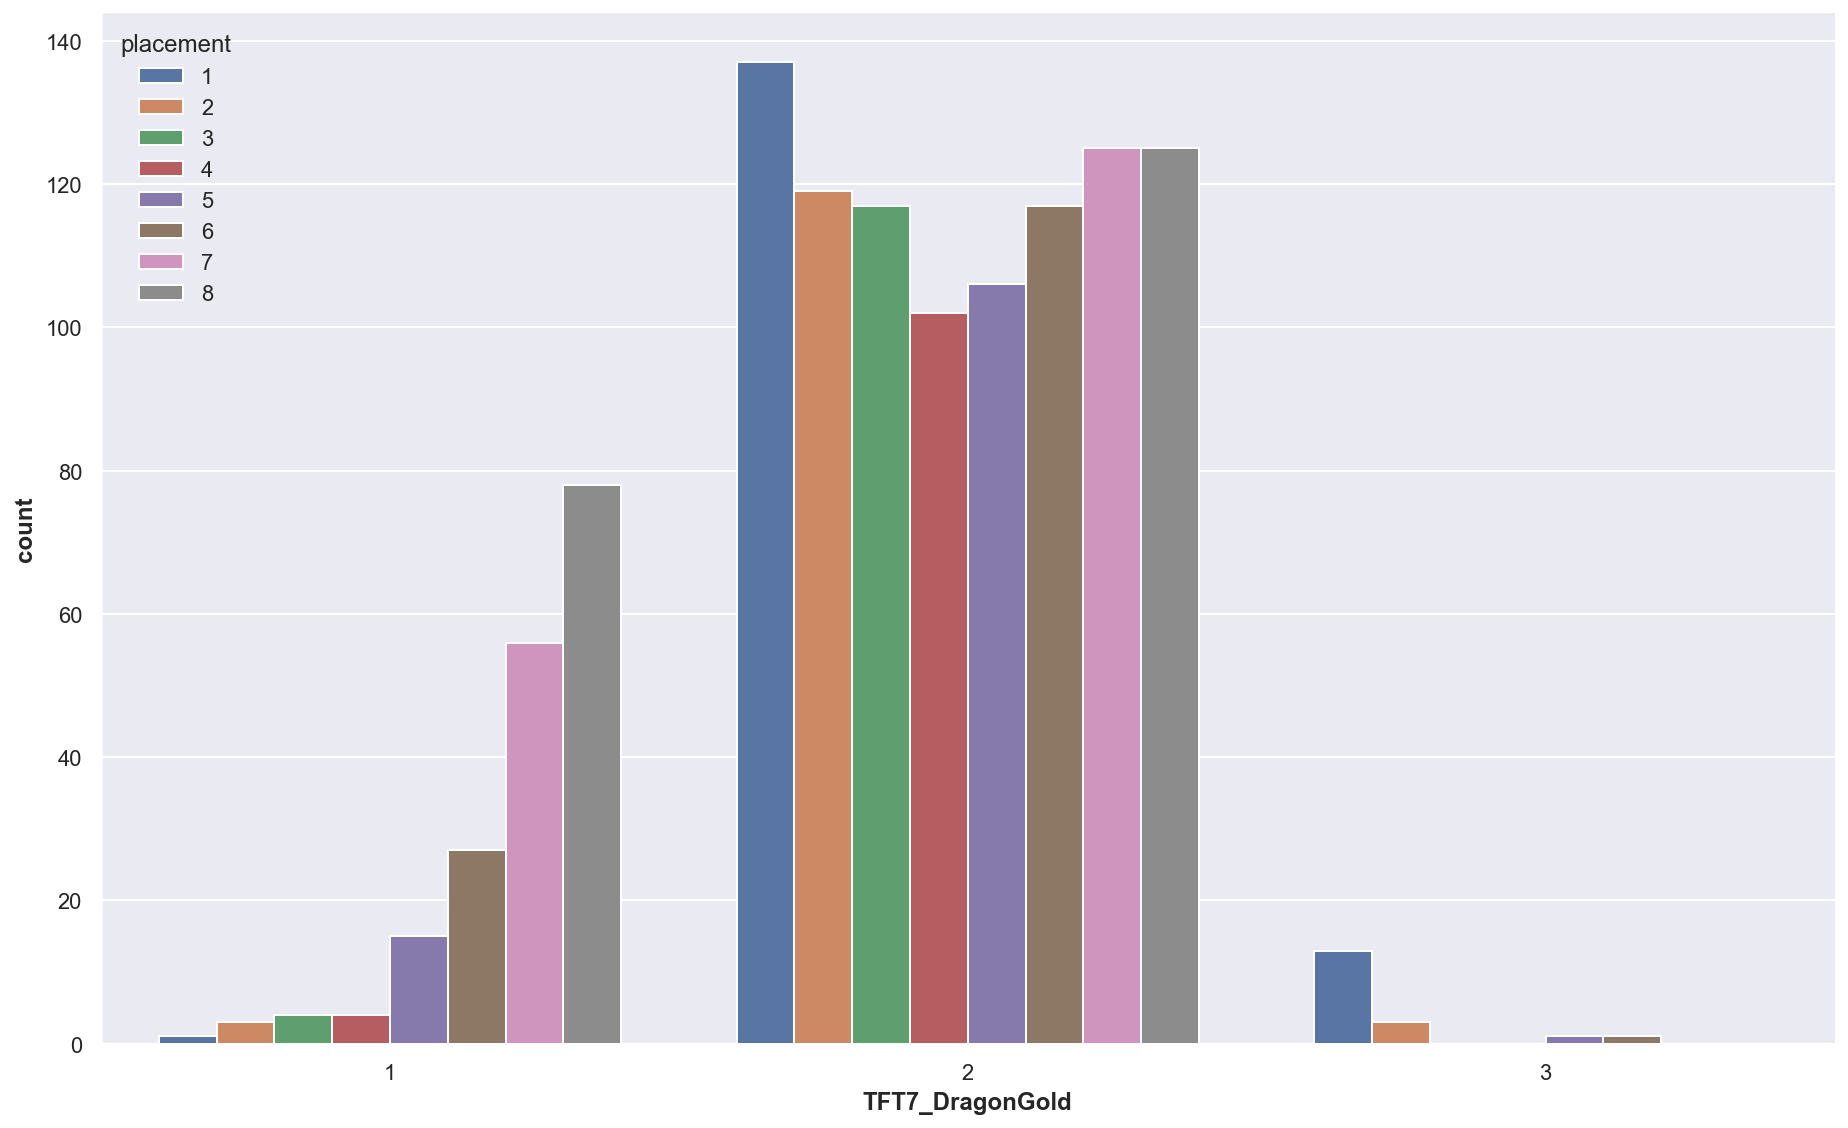

In [1194]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['TFT7_DragonGold']>0], x='TFT7_DragonGold', hue=TARGETNAME)
sns.despine()

Nomsy best dragon at tier 4.

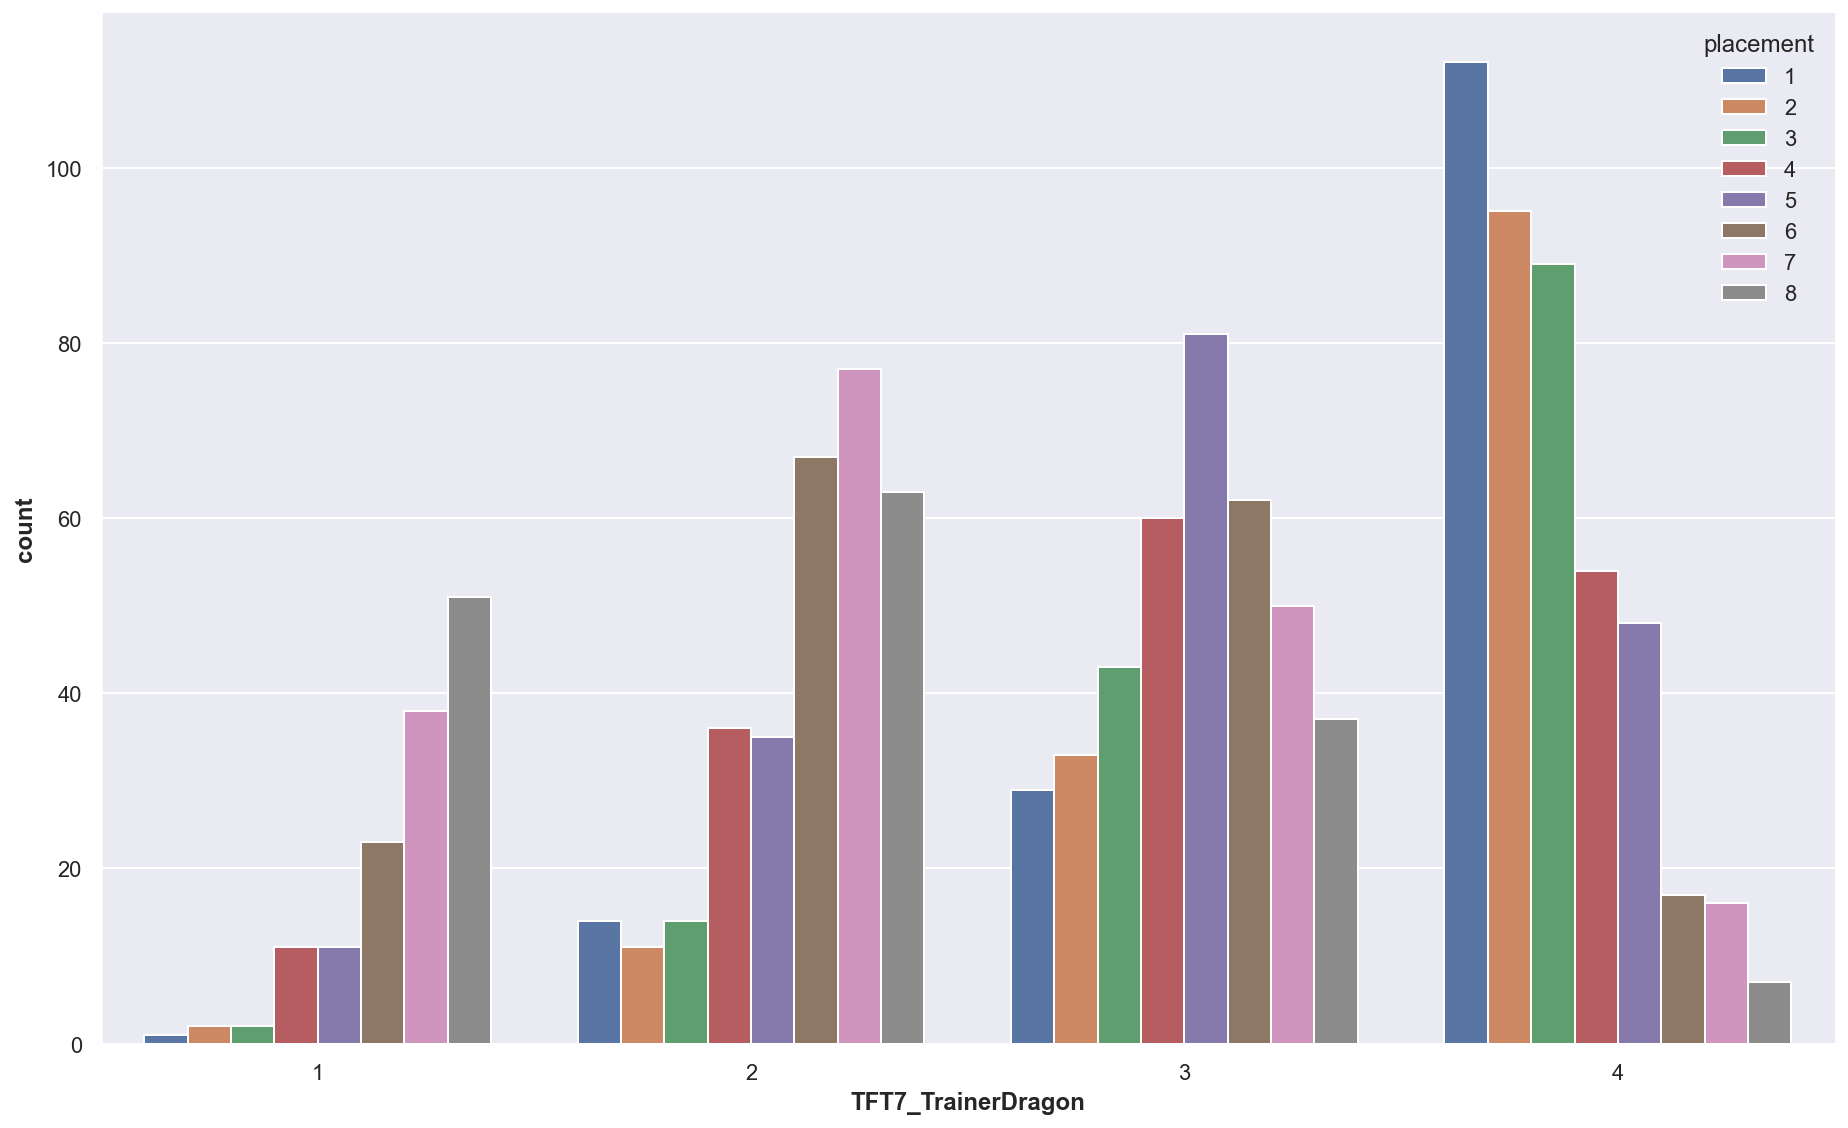

In [1195]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['TFT7_TrainerDragon']>0], x='TFT7_TrainerDragon', hue=TARGETNAME)
sns.despine()

Huge difference between holding Neeko1 and Neeko2.


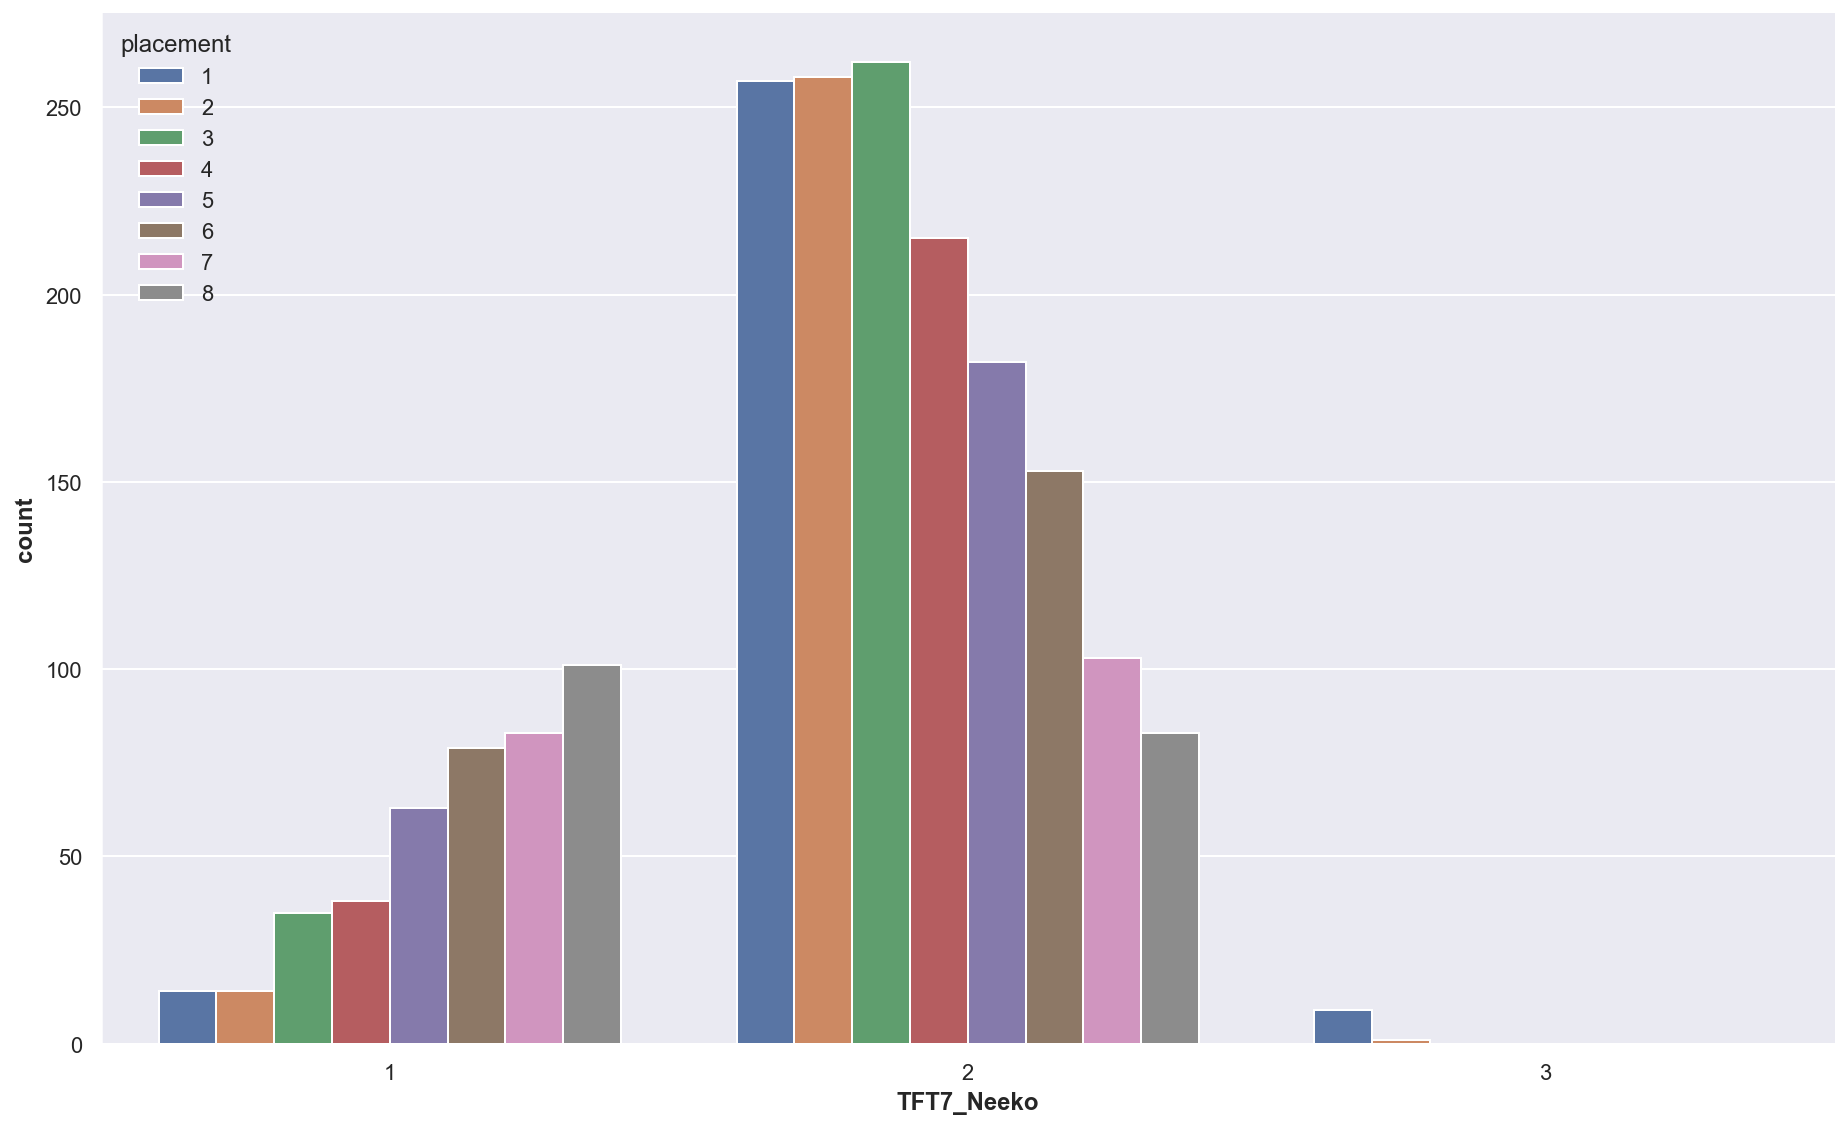

In [1196]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['TFT7_Neeko']>0], x='TFT7_Neeko', hue=TARGETNAME)
sns.despine()

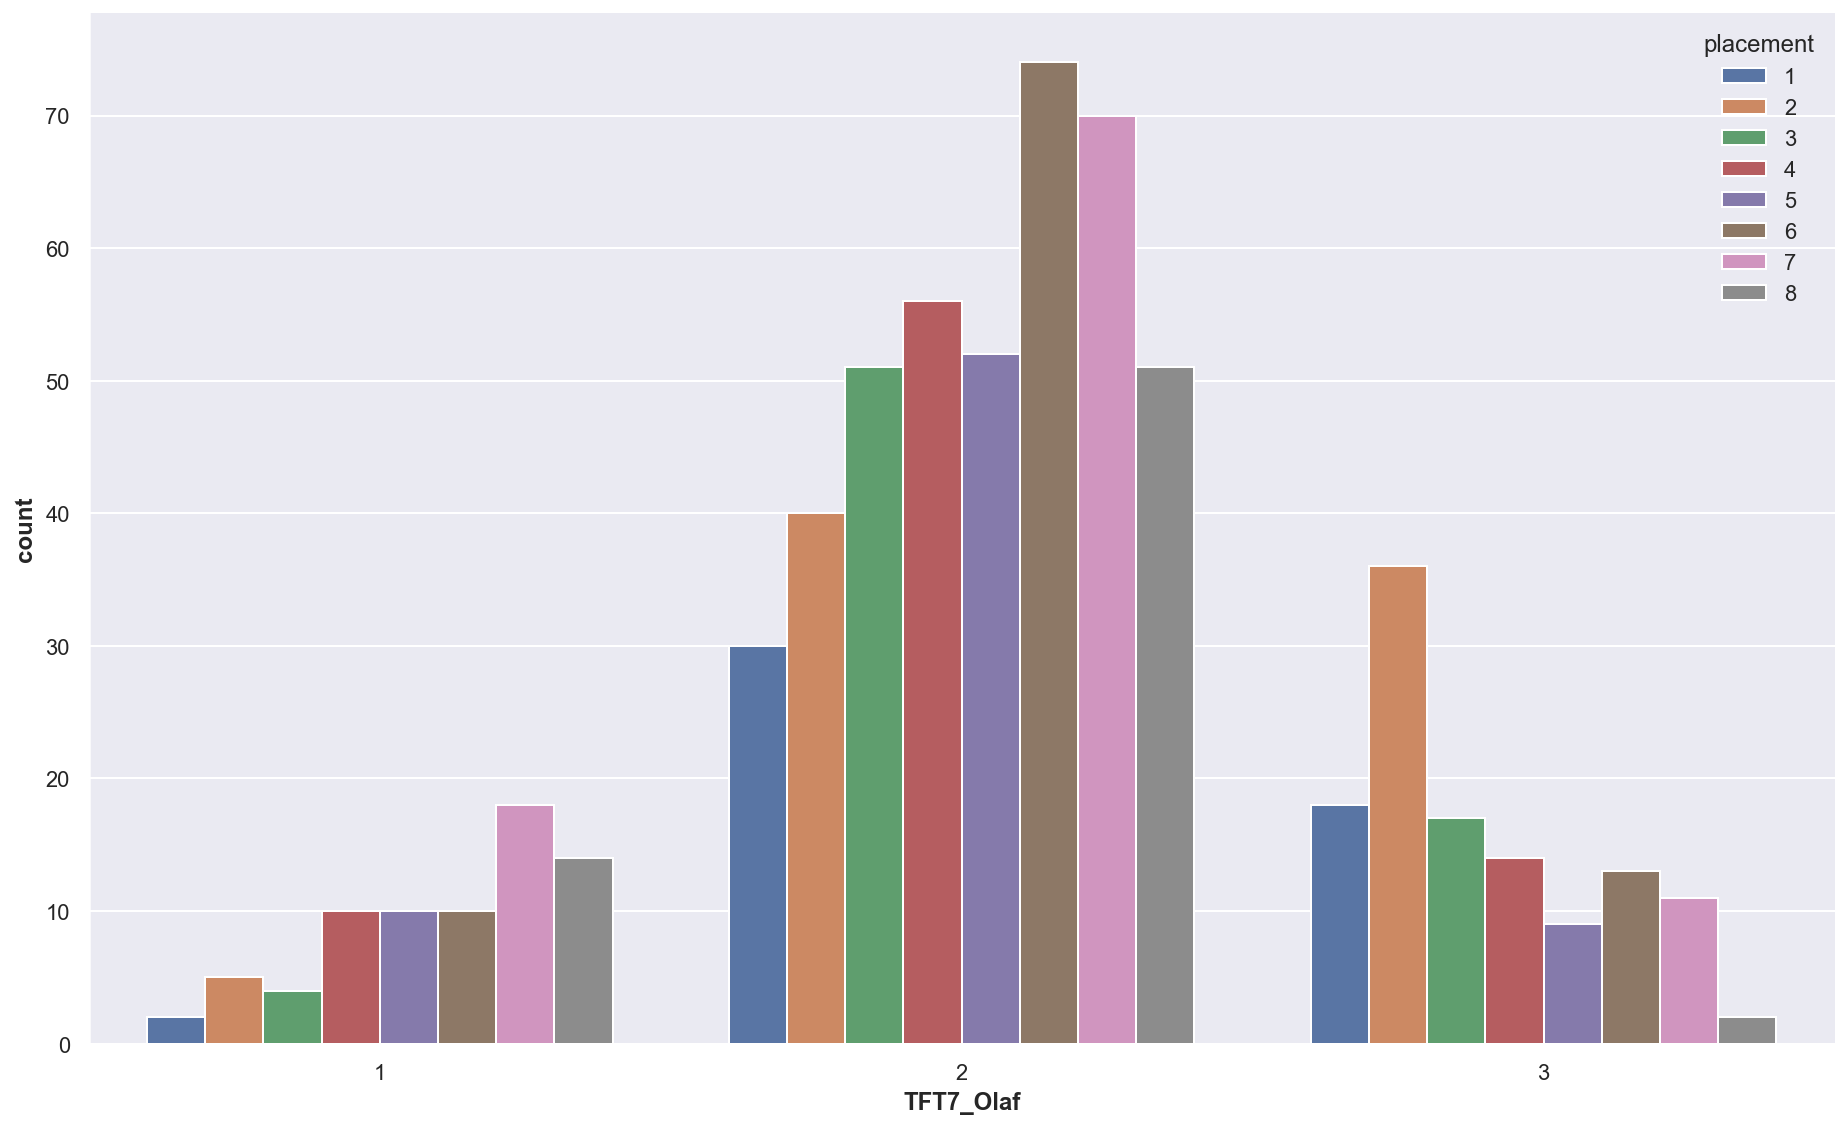

In [1197]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['TFT7_Olaf']>0], x='TFT7_Olaf', hue=TARGETNAME)
sns.despine()

Synergy between units

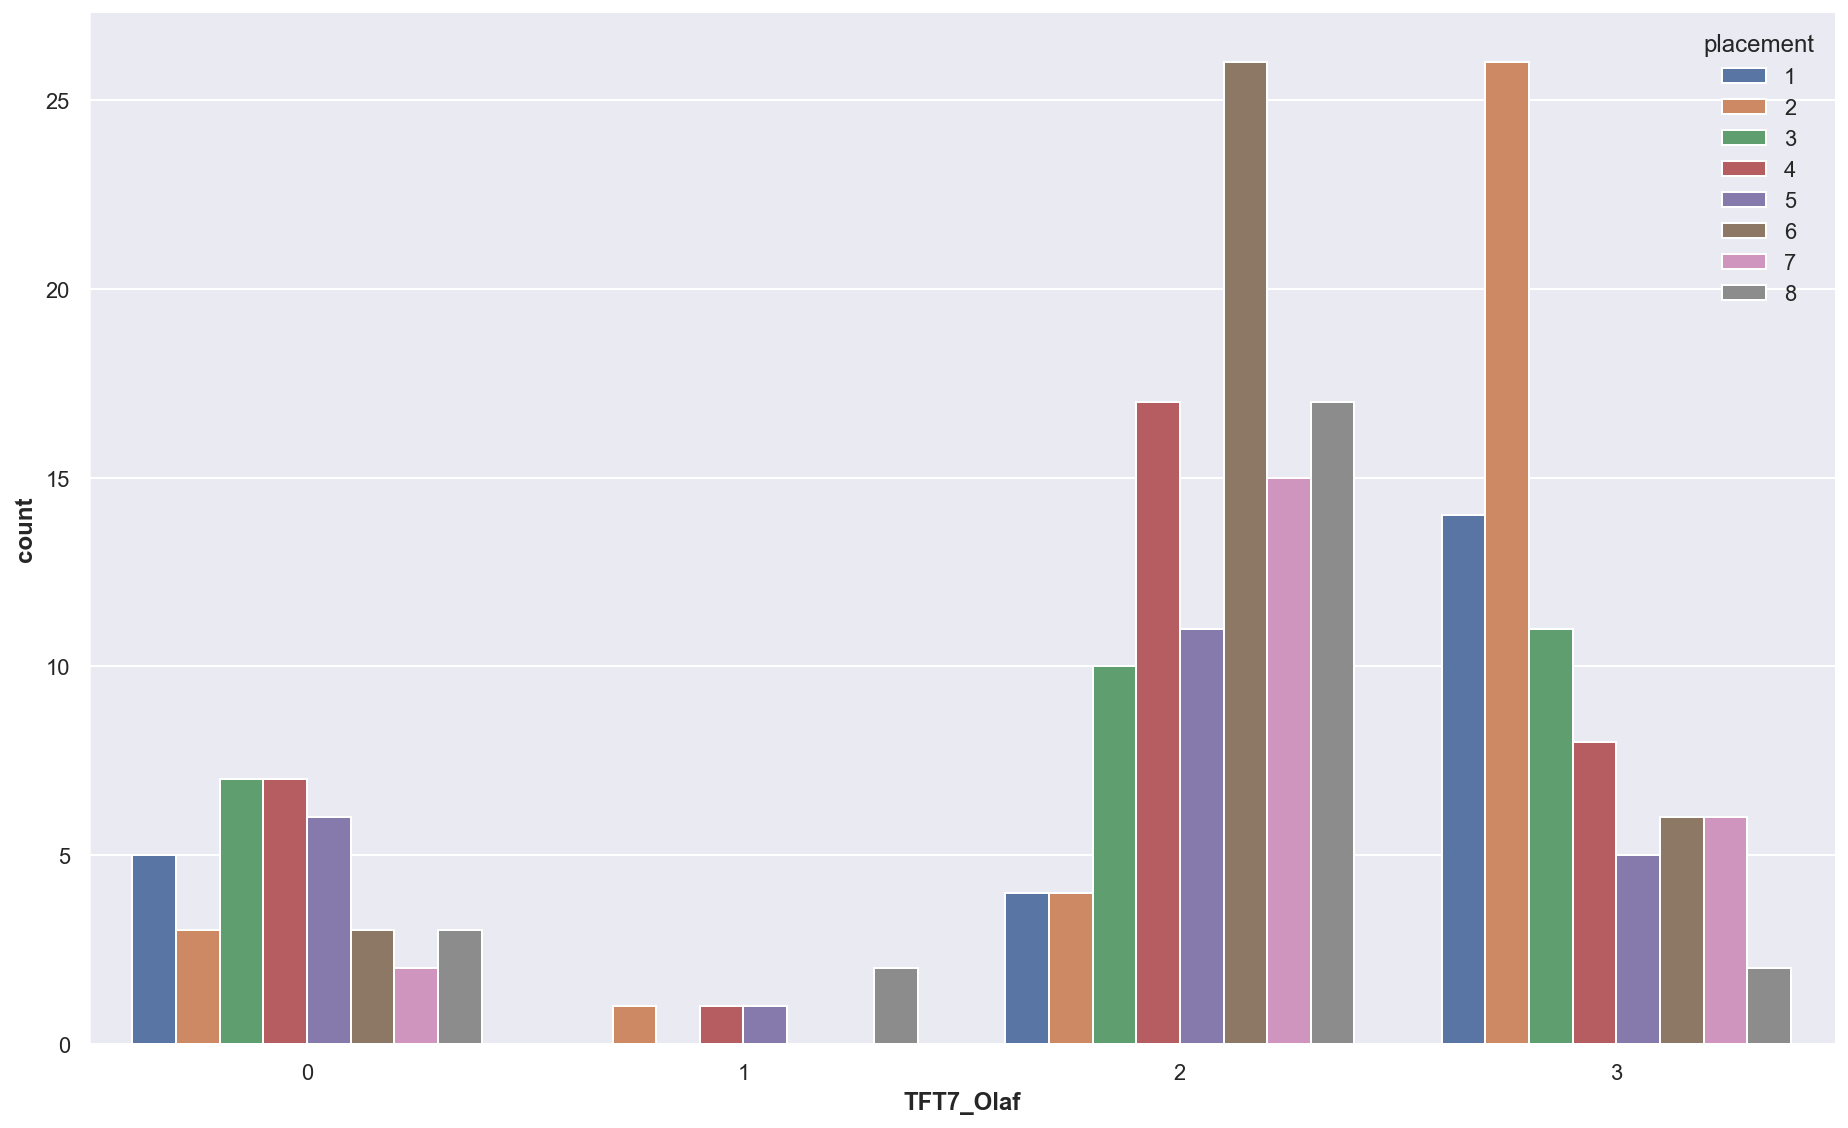

In [1198]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[(matches_df['TFT7_Shen']>1) & (matches_df['TFT7_Diana']>1)], x='TFT7_Olaf', hue=TARGETNAME)
sns.despine()

Synergy between units Shen & Diana with Olaf.

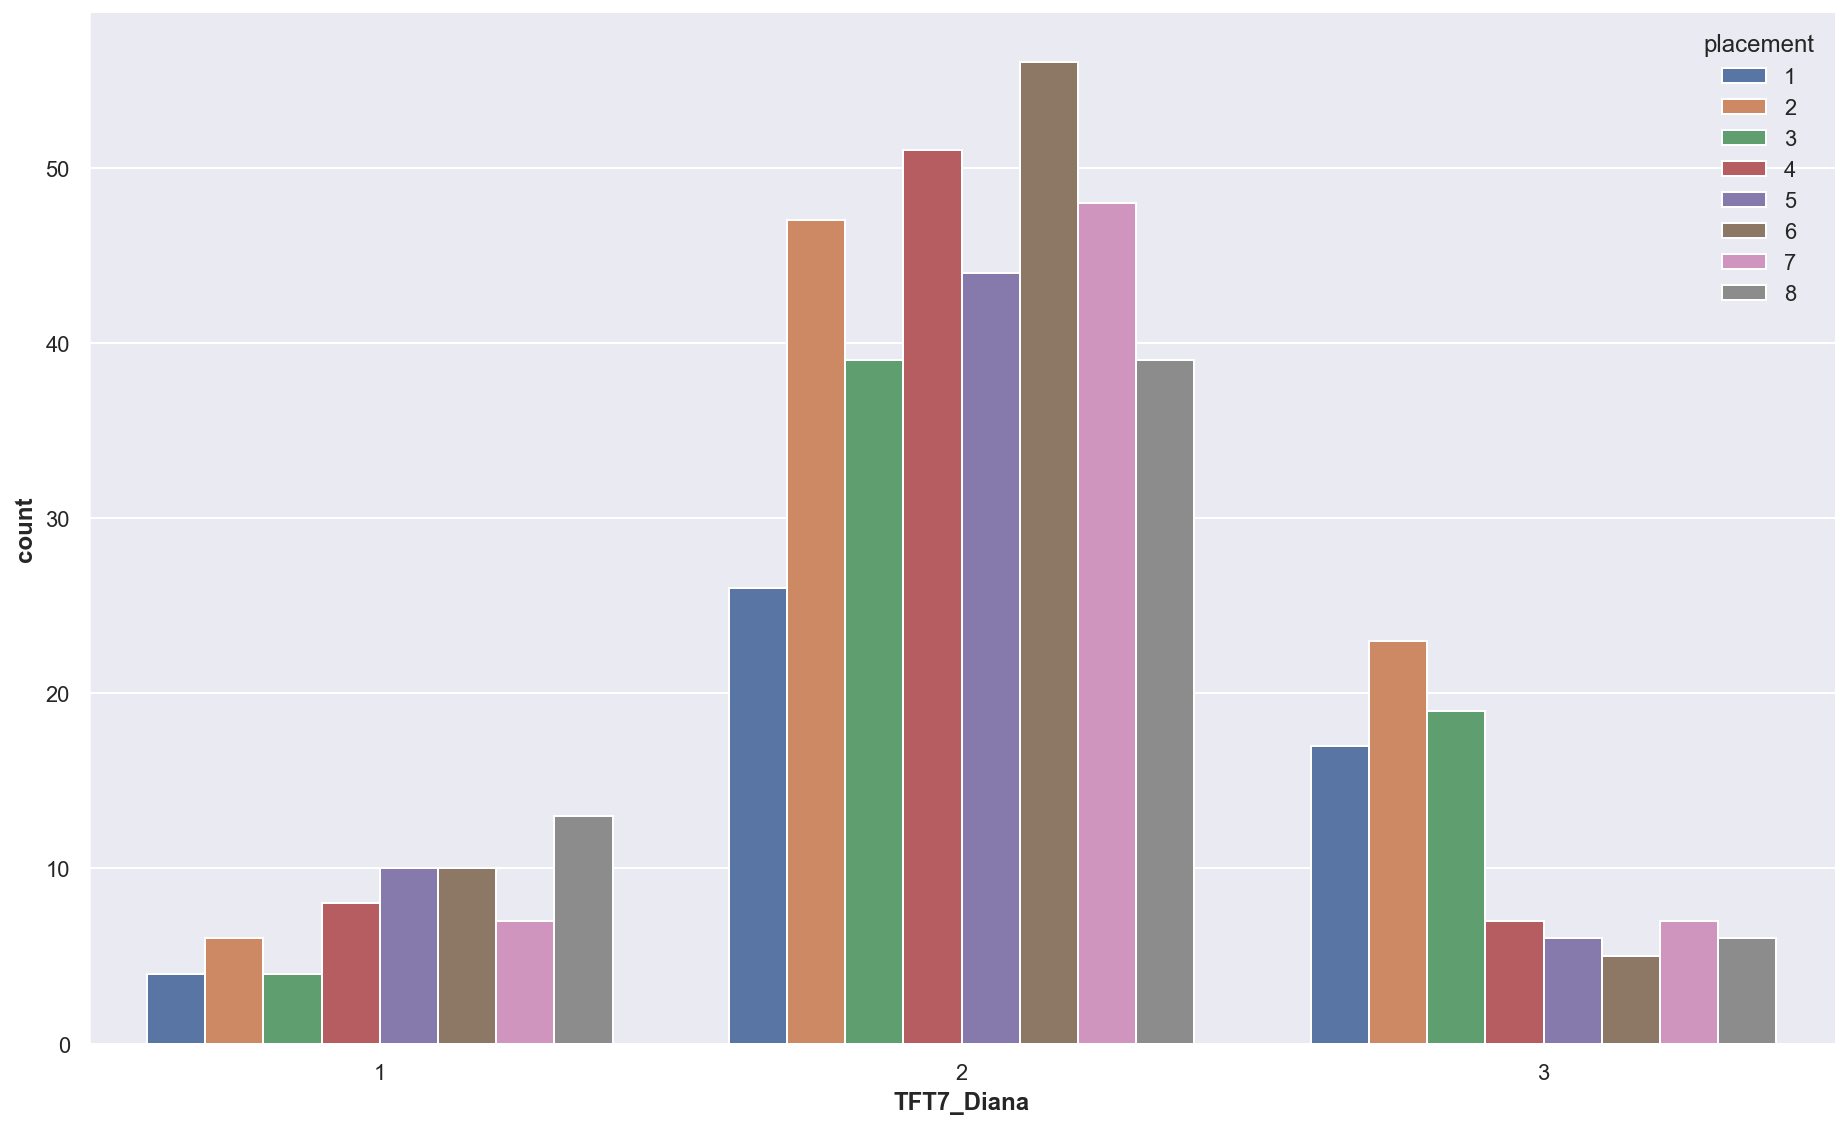

In [1199]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['TFT7_Diana']>0], x='TFT7_Diana', hue=TARGETNAME)
sns.despine()

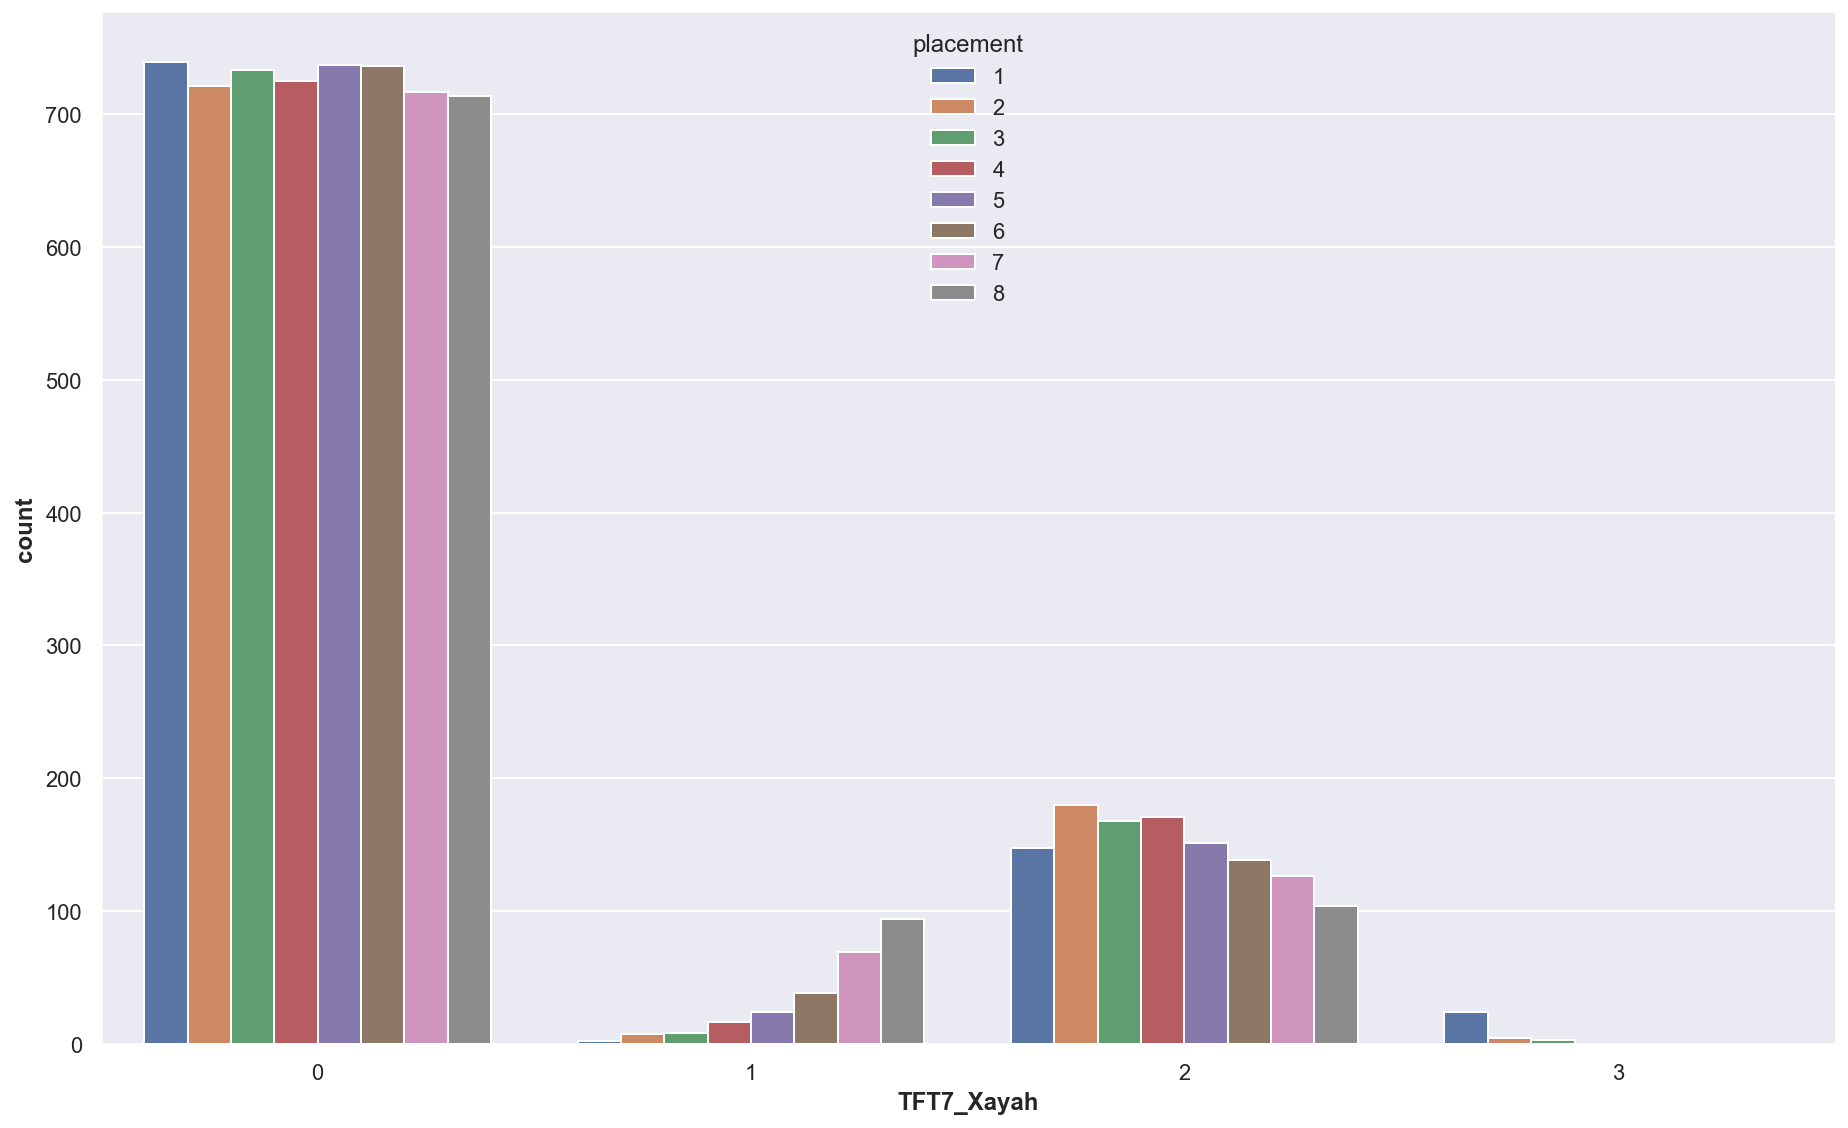

In [1200]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['TFT7_Xayah']>=0], x='TFT7_Xayah', hue=TARGETNAME)
sns.despine()

## Items

When TFT7_DragonGold (Idas) is holding item TFT7_Item_ShimmerscaleDiamondHands.

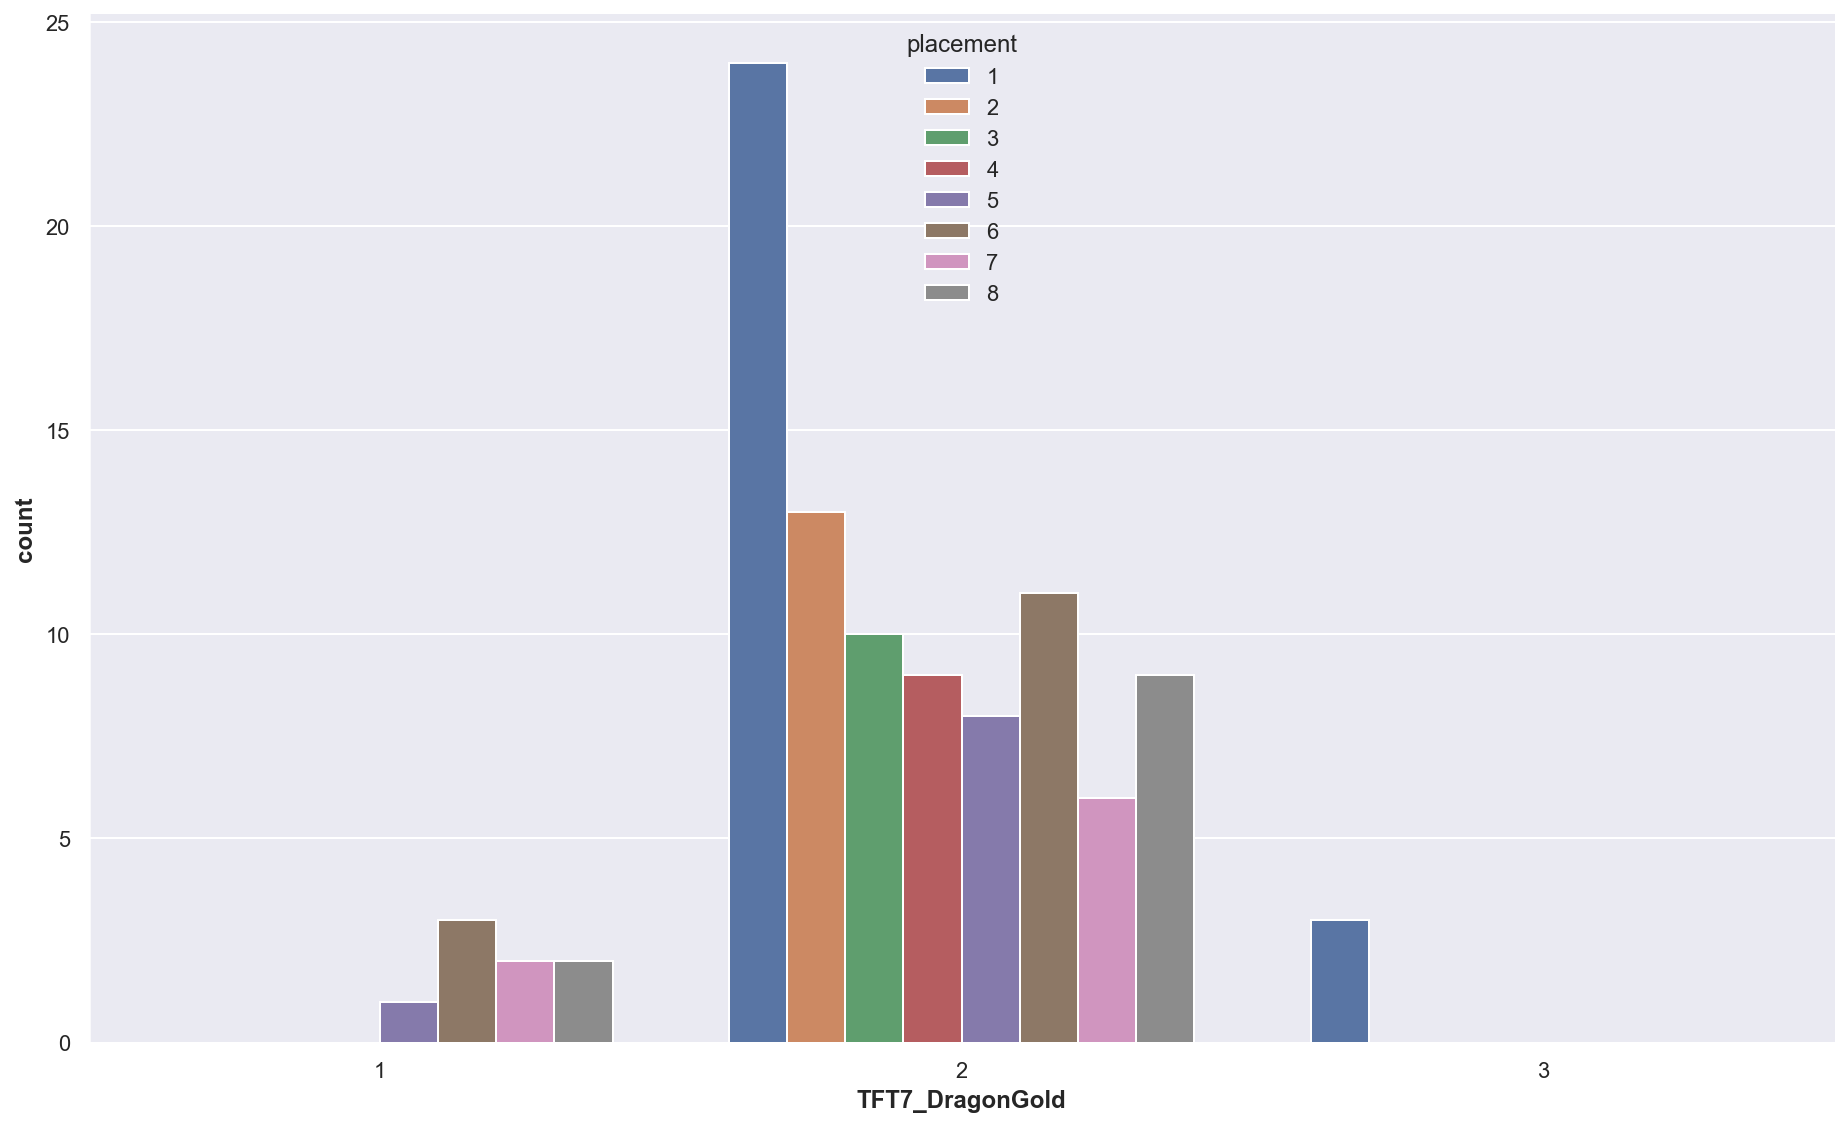

In [1201]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[(matches_df['TFT7_DragonGold_item0']=='TFT7_Item_ShimmerscaleDiamondHands') | (matches_df['TFT7_DragonGold_item1']=='TFT7_Item_ShimmerscaleDiamondHands') | (matches_df['TFT7_DragonGold_item2']=='TFT7_Item_ShimmerscaleDiamondHands')], x='TFT7_DragonGold', hue=TARGETNAME)
sns.despine()

VS When TFT7_DragonGold (Idas) is **NOT** holding item TFT7_Item_ShimmerscaleDiamondHands.

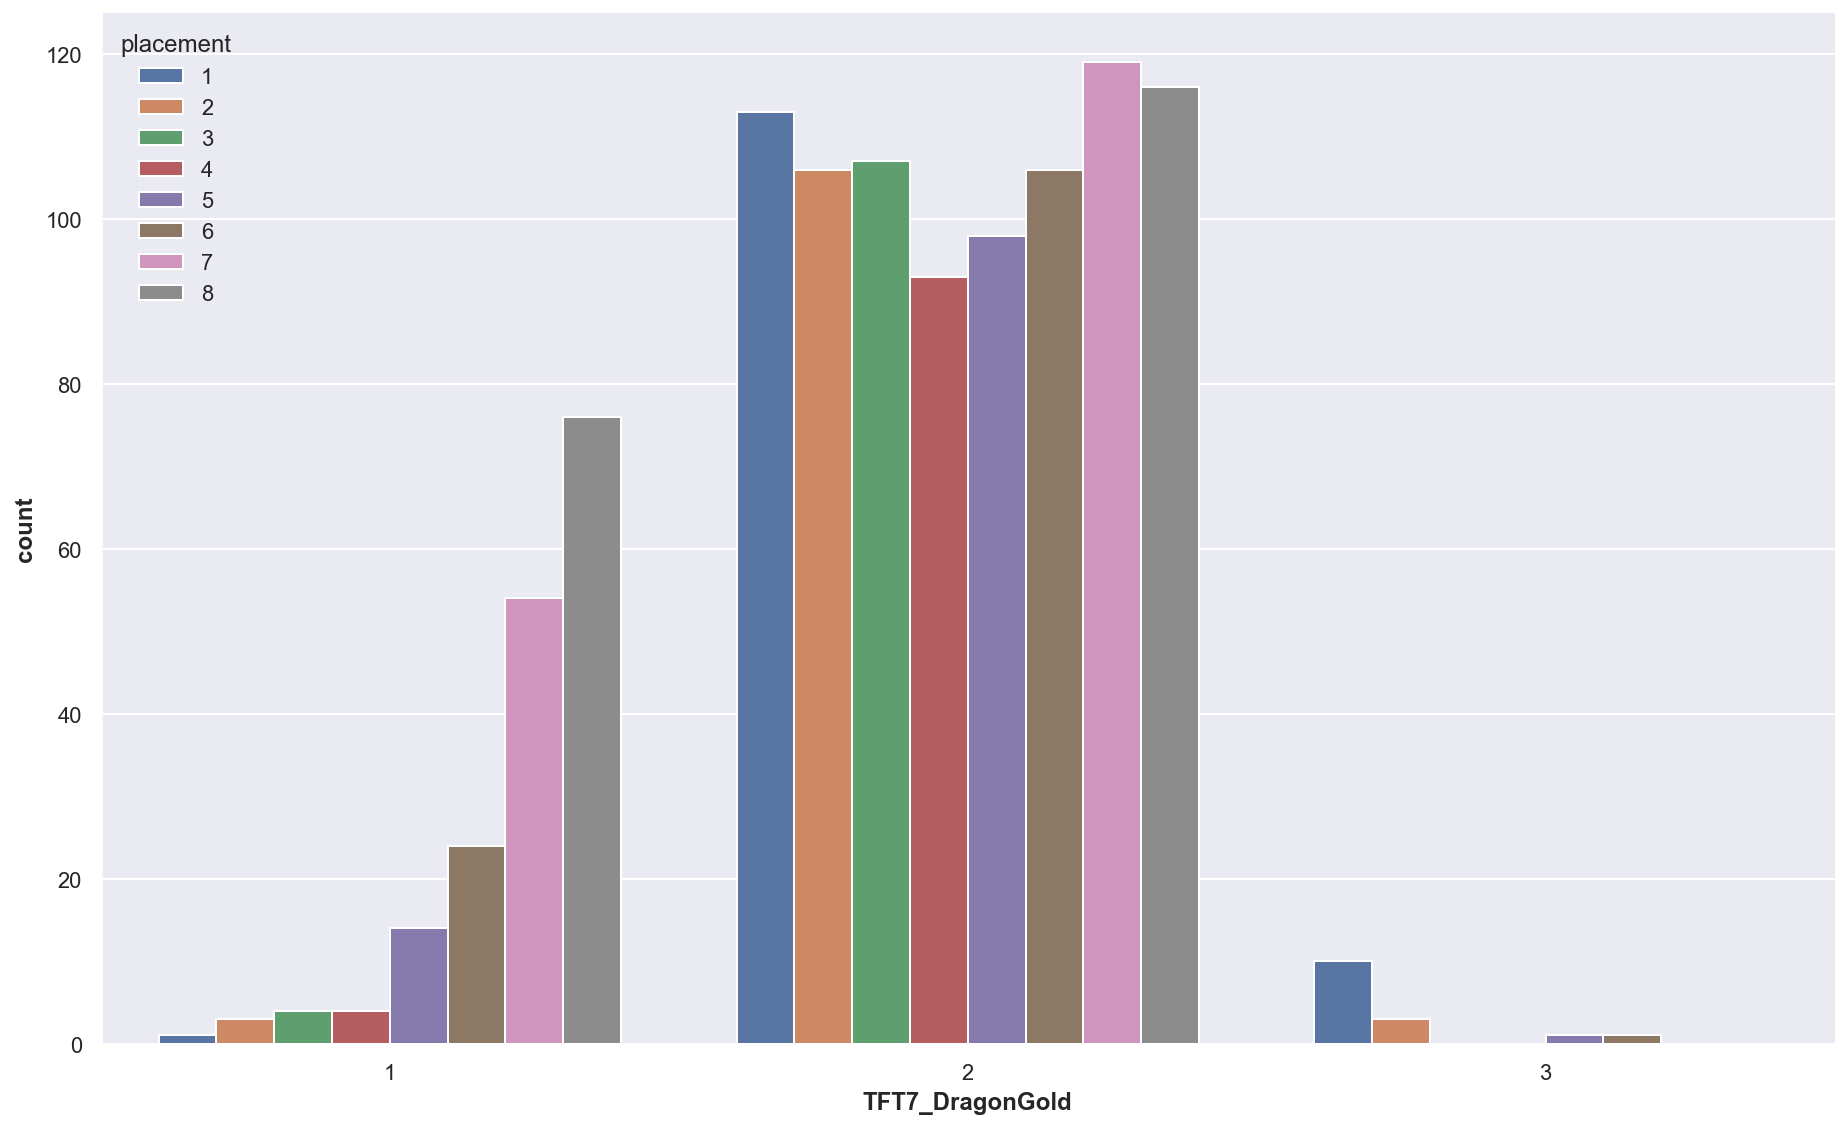

In [1202]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[(matches_df['TFT7_DragonGold_item0']!='TFT7_Item_ShimmerscaleDiamondHands') & (matches_df['TFT7_DragonGold_item1']!='TFT7_Item_ShimmerscaleDiamondHands') & (matches_df['TFT7_DragonGold_item2']!='TFT7_Item_ShimmerscaleDiamondHands') & (matches_df['TFT7_DragonGold']>0)], x='TFT7_DragonGold', hue=TARGETNAME)
sns.despine()

Does Quicksilver help on your carry?
With Quicksilver.

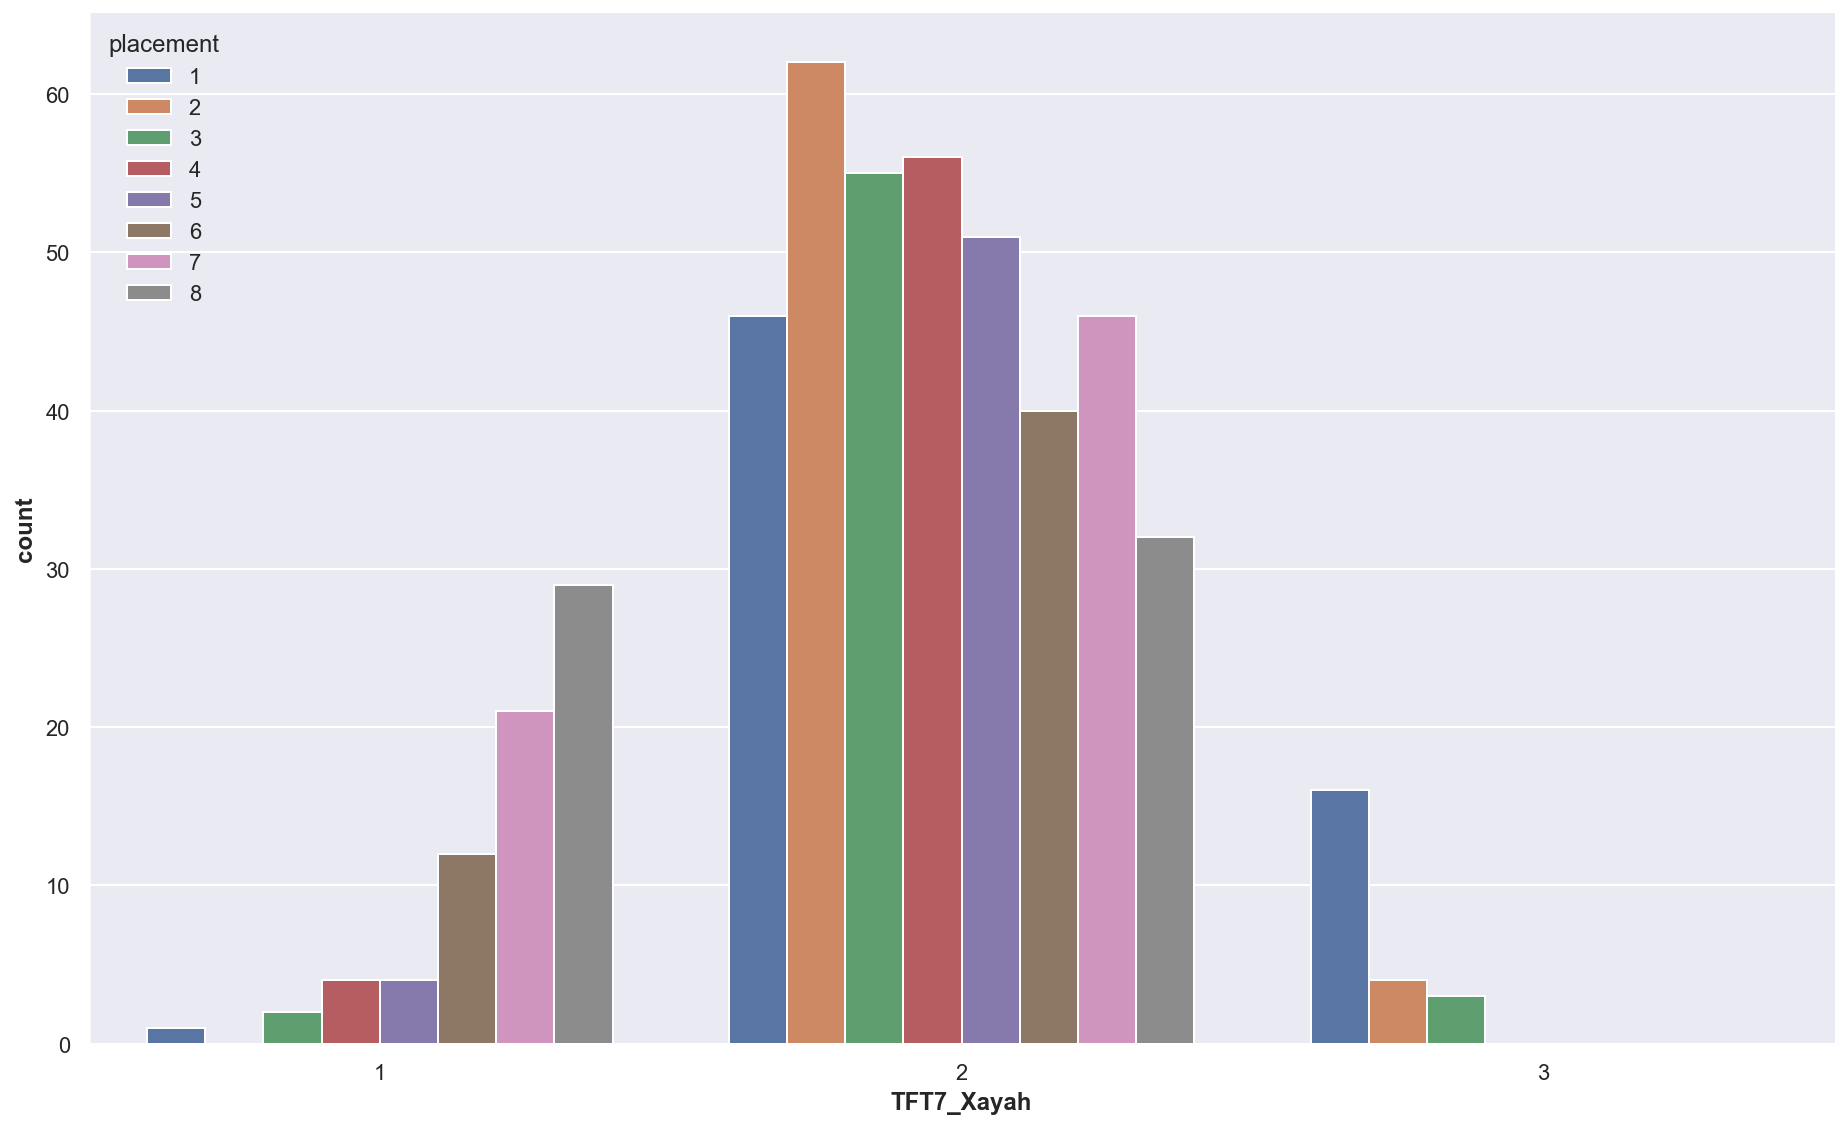

In [1203]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[(matches_df['TFT7_Xayah_item0']=='TFT_Item_Quicksilver') | (matches_df['TFT7_Xayah_item1']=='TFT_Item_Quicksilver') | (matches_df['TFT7_Xayah_item2']=='TFT_Item_Quicksilver')], x='TFT7_Xayah', hue=TARGETNAME)
sns.despine()

Without Quicksilver.

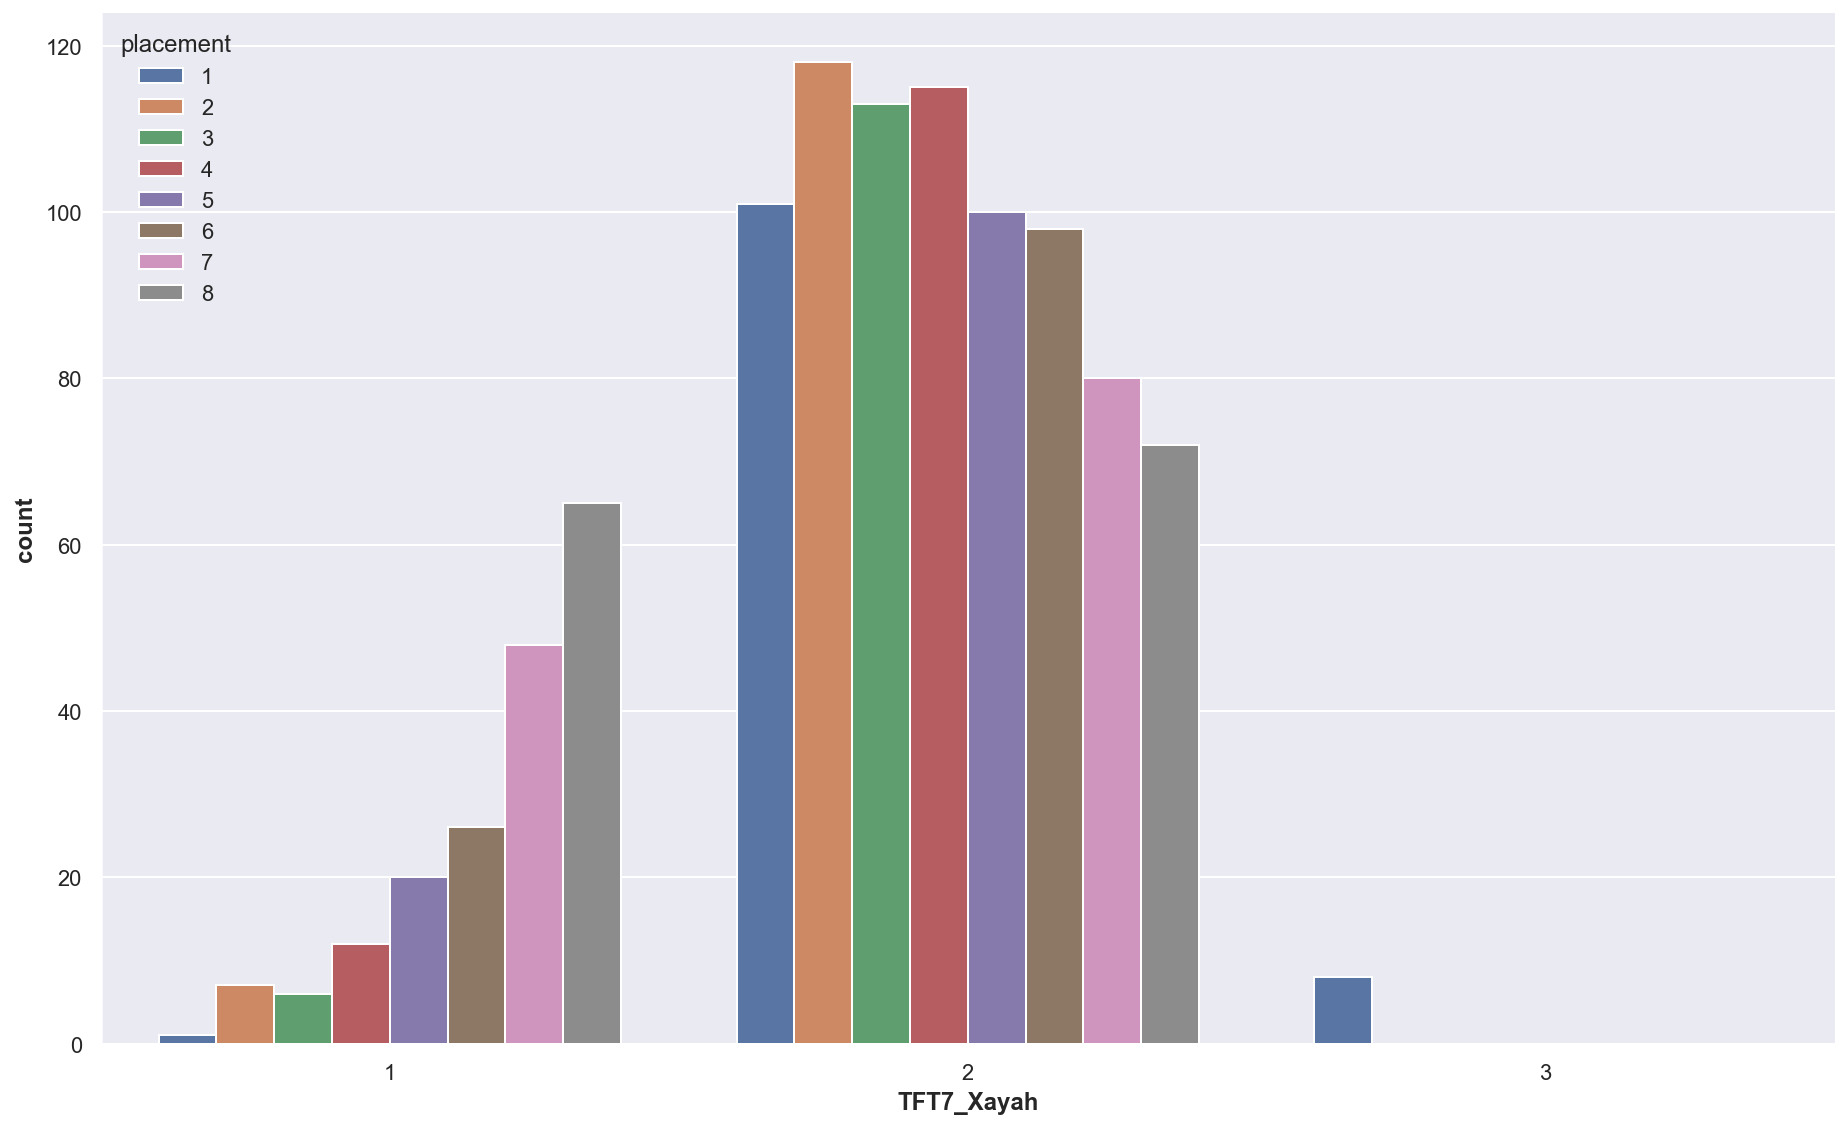

In [1204]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[(matches_df['TFT7_Xayah_item0']!='TFT_Item_Quicksilver') & (matches_df['TFT7_Xayah_item1']!='TFT_Item_Quicksilver') & (matches_df['TFT7_Xayah_item2']!='TFT_Item_Quicksilver') & (matches_df['TFT7_Xayah']>0)], x='TFT7_Xayah', hue=TARGETNAME)
sns.despine()

Does Quicksilver help on your carry?
With Quicksilver.

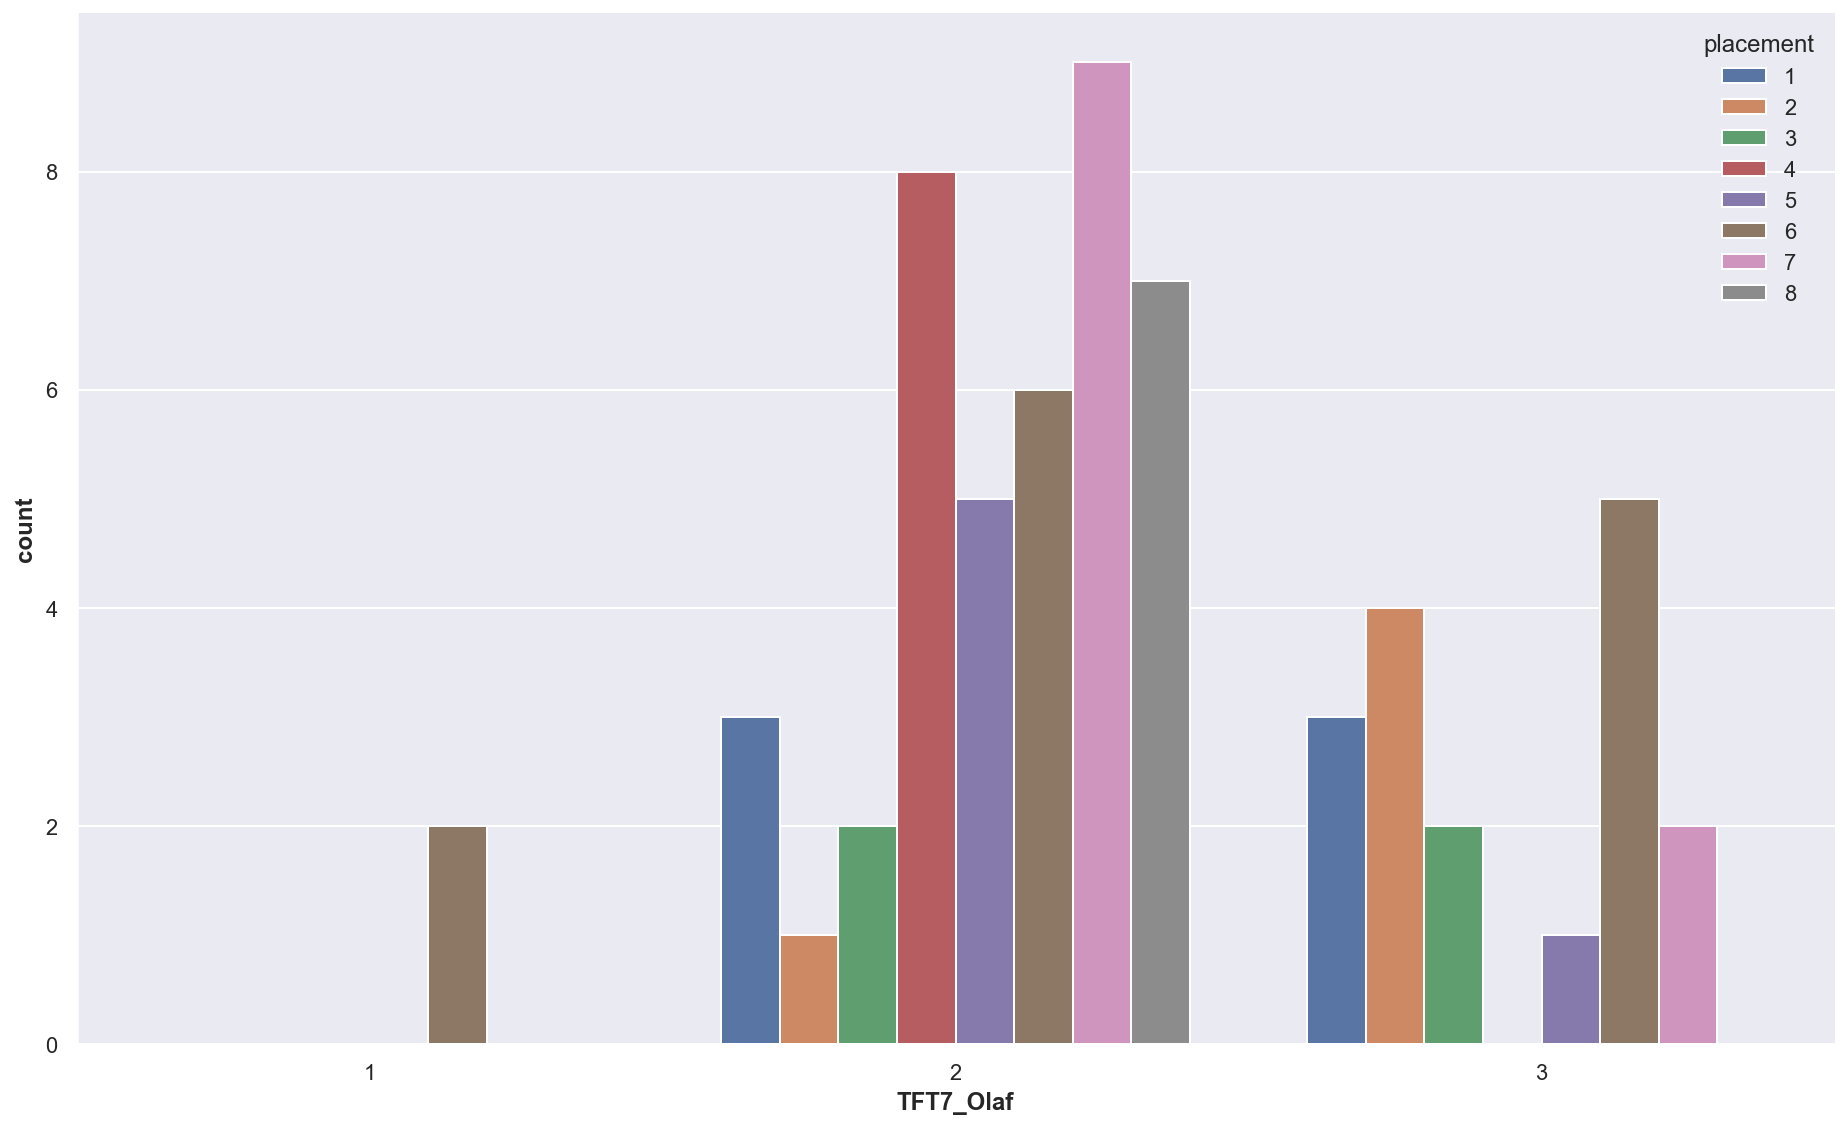

In [1205]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[(matches_df['TFT7_Olaf_item0']=='TFT_Item_GuinsoosRageblade') | (matches_df['TFT7_Olaf_item1']=='TFT_Item_GuinsoosRageblade') | (matches_df['TFT7_Olaf_item2']=='TFT_Item_GuinsoosRageblade')], x='TFT7_Olaf', hue=TARGETNAME)
sns.despine()

Without TFT_Item_GuinsoosRageblade

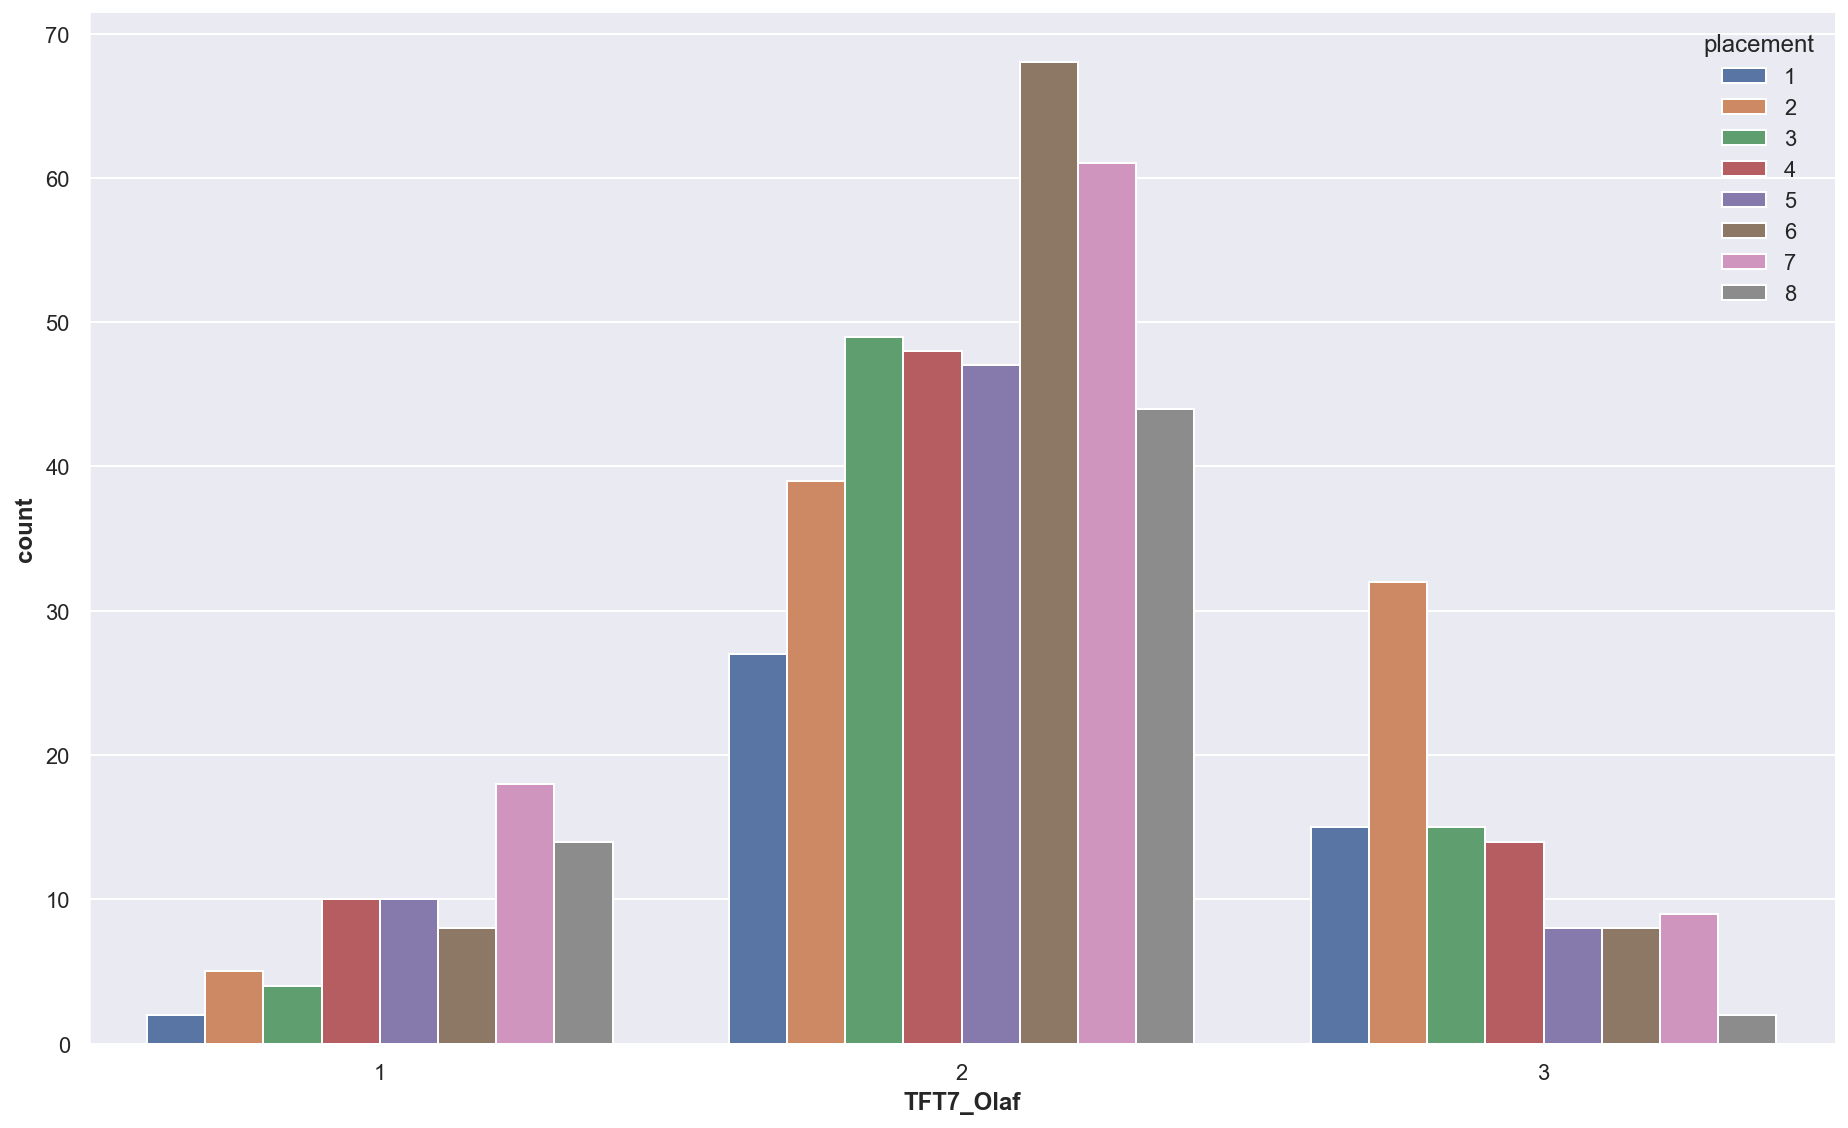

In [1206]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[(matches_df['TFT7_Olaf_item0']!='TFT_Item_GuinsoosRageblade') & (matches_df['TFT7_Olaf_item1']!='TFT_Item_GuinsoosRageblade') & (matches_df['TFT7_Olaf_item2']!='TFT_Item_GuinsoosRageblade')&(matches_df['TFT7_Olaf']>0)], x='TFT7_Olaf', hue=TARGETNAME)
sns.despine()

In [1207]:
def get_unit_item_ranking(df: matches_df, unit: str):
    # filter and melt the dataframe
    m = df.filter(regex=f'placement|{unit}_item0|{unit}_item1|{unit}_item2').melt(
        'placement', value_name=f'{unit}_item')
    # group and aggregate mean/median
    dct = {'value_count': (f'{unit}_item', 'count'),
           'average_placement': ('placement', 'mean')}
    return m.groupby(f'{unit}_item', as_index=False).agg(**dct).sort_values(by='average_placement')


In [1208]:
TFT7_Olaf_item_merged_df = get_unit_item_ranking(df=matches_df, unit='TFT7_Olaf')
TFT7_Olaf_item_merged_df[TFT7_Olaf_item_merged_df['value_count']>=10][:35]

TFT7_Olaf_item  value_count  average_placement
45  TFT_Item_LocketOfTheIronSolari           14           2.857143
55                TFT_Item_RedBuff           15           3.533333
44            TFT_Item_LastWhisper           11           3.818182
46      TFT_Item_MadredsBloodrazor           72           3.916667
62            TFT_Item_StatikkShiv           12           3.916667
50          TFT_Item_PowerGauntlet           10           4.000000
66          TFT_Item_TitansResolve           24           4.041667
69            TFT_Item_ZekesHerald           33           4.090909
67     TFT_Item_UnstableConcoction           41           4.097561
38          TFT_Item_GuardianAngel           19           4.105263
51            TFT_Item_Quicksilver           57           4.157895
70                 TFT_Item_Zephyr           14           4.214286
0                             None        20628           4.499564
57       TFT_Item_RunaansHurricane          170           4.511765
64           TFT_Item_ThiefsGloves           21           4.523810
32             TFT_Item_Deathblade           24           4.541667
15    TFT7_Item_AssassinEmblemItem          198           4.691919
41           TFT_Item_InfinityEdge          171           4.777778
28          TFT_Item_Bloodthirster           66           4.893939
53        TFT_Item_RapidFireCannon           78           4.961538
39      TFT_Item_GuinsoosRageblade           61           5.000000

In [1209]:
TFT7_Xayah_item_merged_df = get_unit_item_ranking(df=matches_df, unit='TFT7_Xayah')
TFT7_Xayah_item_merged_df[TFT7_Xayah_item_merged_df['value_count']>=20][:35]

TFT7_Xayah_item  value_count  average_placement
70                 TFT_Item_ZekesHerald           22           3.318182
42               TFT_Item_GuardianAngel           69           3.797101
63                 TFT_Item_StatikkShiv           63           3.825397
5            TFT4_Item_OrnnTheCollector           23           3.956522
36               TFT_Item_Bloodthirster           39           4.076923
2           TFT4_Item_OrnnInfinityForce           39           4.128205
68          TFT_Item_UnstableConcoction          210           4.333333
47                 TFT_Item_LastWhisper           57           4.368421
58            TFT_Item_RunaansHurricane          106           4.452830
53                 TFT_Item_Quicksilver          484           4.460744
43           TFT_Item_GuinsoosRageblade         1117           4.476276
48           TFT_Item_MadredsBloodrazor          919           4.483134
0                                  None        17858           4.503752
39                  TFT_Item_Deathblade          187           4.518717
45                TFT_Item_InfinityEdge          234           4.521368
67               TFT_Item_TitansResolve           36           4.750000
55             TFT_Item_RapidFireCannon           34           4.823529
20            TFT7_Item_GuildEmblemItem           95           4.905263
26     TFT7_Item_ShimmerscaleDravensAxe           74           5.108108
28  TFT7_Item_ShimmerscaleGamblersBlade           35           5.800000

In [1210]:
TFT7_Corki_item_merged_df = get_unit_item_ranking(df=matches_df, unit='TFT7_Corki')
TFT7_Corki_item_merged_df[TFT7_Corki_item_merged_df['value_count']>=20][:35]

TFT7_Corki_item  value_count  average_placement
63                 TFT_Item_ZekesHerald           20           3.900000
40               TFT_Item_GuardianAngel           28           3.928571
54            TFT_Item_RunaansHurricane           95           4.136842
58                 TFT_Item_StatikkShiv           69           4.202899
46                 TFT_Item_LastWhisper          180           4.372222
0                                  None        19119           4.479785
50                 TFT_Item_Quicksilver          102           4.500000
43                TFT_Item_InfinityEdge          359           4.540390
35               TFT_Item_Bloodthirster           45           4.555556
62          TFT_Item_UnstableConcoction          252           4.567460
27     TFT7_Item_ShimmerscaleDravensAxe          107           4.719626
41           TFT_Item_GuinsoosRageblade          530           4.720755
2           TFT4_Item_OrnnInfinityForce           20           4.750000
47           TFT_Item_MadredsBloodrazor          502           4.780876
38                  TFT_Item_Deathblade          127           4.834646
45             TFT_Item_JeweledGauntlet           21           4.904762
42             TFT_Item_HextechGunblade           44           4.909091
57               TFT_Item_SpearOfShojin           22           4.954545
55              TFT_Item_SeraphsEmbrace           29           4.965517
52             TFT_Item_RapidFireCannon           23           5.000000
29  TFT7_Item_ShimmerscaleGamblersBlade           36           5.361111

In [1211]:
TFT7_Shyvana_item_merged_df = get_unit_item_ranking(df=matches_df, unit='TFT7_Shyvana')
TFT7_Shyvana_item_merged_df[TFT7_Shyvana_item_merged_df['value_count']>=10][:25]

TFT7_Shyvana_item  value_count  average_placement
24              TFT_Item_BrambleVest           22           3.045455
36               TFT_Item_IonicSpark           41           3.097561
58            TFT_Item_TitansResolve           39           3.307692
44              TFT_Item_Quicksilver           15           3.333333
45         TFT_Item_RabadonsDeathcap           36           3.361111
37          TFT_Item_JeweledGauntlet           17           3.529412
59       TFT_Item_UnstableConcoction           34           3.617647
41           TFT_Item_Morellonomicon           25           3.640000
29              TFT_Item_FrozenHeart           53           3.698113
56             TFT_Item_ThiefsGloves           30           3.733333
32            TFT_Item_GuardianAngel           12           3.750000
21          TFT_Item_ArchangelsStaff           30           3.766667
30       TFT_Item_GargoyleStoneplate           31           3.870968
48               TFT_Item_Redemption           27           3.888889
33        TFT_Item_GuinsoosRageblade           11           4.000000
28              TFT_Item_DragonsClaw           32           4.000000
34          TFT_Item_HextechGunblade           21           4.047619
35             TFT_Item_InfinityEdge           10           4.100000
23            TFT_Item_Bloodthirster           28           4.321429
60             TFT_Item_WarmogsArmor           51           4.372549
47                  TFT_Item_RedBuff           60           4.416667
0                               None        21128           4.521488
10  TFT7_Item_DragonmancerEmblemItem           18           4.944444
40        TFT_Item_MadredsBloodrazor           22           4.954545

In [1212]:
TFT7_DragonBlue_item_merged_df = get_unit_item_ranking(df=matches_df, unit='TFT7_DragonBlue')
TFT7_DragonBlue_item_merged_df[TFT7_DragonBlue_item_merged_df['value_count']>=10][:25]

TFT7_DragonBlue_item  value_count  average_placement
61       TFT_Item_TitansResolve           14           3.571429
22    TFT7_Item_RevelEmblemItem           48           3.604167
2   TFT4_Item_OrnnInfinityForce           12           3.750000
50    TFT_Item_RabadonsDeathcap           72           4.041667
40     TFT_Item_HextechGunblade           40           4.125000
58         TFT_Item_StatikkShiv          112           4.133929
38       TFT_Item_GuardianAngel           14           4.214286
46      TFT_Item_Morellonomicon           13           4.230769
51     TFT_Item_RapidFireCannon           21           4.428571
0                          None        19715           4.487953
31     TFT_Item_ArchangelsStaff          315           4.504762
39   TFT_Item_GuinsoosRageblade          244           4.586066
62  TFT_Item_UnstableConcoction          128           4.601562
49         TFT_Item_Quicksilver           92           4.619565
45   TFT_Item_MadredsBloodrazor          327           4.636086
43     TFT_Item_JeweledGauntlet          344           4.968023
57       TFT_Item_SpearOfShojin           16           5.062500
41        TFT_Item_InfinityEdge          251           5.063745
33       TFT_Item_Bloodthirster           16           5.312500

In [1213]:
TFT7_DragonPurple_item_merged_df = get_unit_item_ranking(df=matches_df, unit='TFT7_DragonPurple')
TFT7_DragonPurple_item_merged_df[TFT7_DragonPurple_item_merged_df['value_count']>=10][:25]

TFT7_DragonPurple_item  value_count  average_placement
4     TFT4_Item_OrnnInfinityForce           28           2.964286
26      TFT7_Item_GuildEmblemItem           10           3.100000
6      TFT4_Item_OrnnTheCollector           10           3.400000
27       TFT7_Item_MageEmblemItem           13           3.461538
23   TFT7_Item_CavalierEmblemItem           15           3.466667
52       TFT_Item_HextechGunblade           40           3.550000
80          TFT_Item_WarmogsArmor           41           3.804878
79    TFT_Item_UnstableConcoction          305           3.816393
55       TFT_Item_JeweledGauntlet           15           3.866667
46           TFT_Item_DragonsClaw           51           3.980392
67               TFT_Item_RedBuff           77           4.000000
63           TFT_Item_Quicksilver          358           4.022346
58     TFT_Item_MadredsBloodrazor          269           4.037175
69      TFT_Item_RunaansHurricane           96           4.052083
53          TFT_Item_InfinityEdge          473           4.082452
45            TFT_Item_Deathblade           41           4.121951
21   TFT7_Item_AssassinEmblemItem          283           4.130742
42           TFT_Item_BrambleVest           35           4.142857
50         TFT_Item_GuardianAngel           79           4.151899
2    TFT4_Item_OrnnDeathsDefiance           32           4.156250
68            TFT_Item_Redemption           24           4.166667
78         TFT_Item_TitansResolve          470           4.189362
41         TFT_Item_Bloodthirster          789           4.214195
65       TFT_Item_RapidFireCannon          109           4.275229
36  TFT7_Item_SwiftshotEmblemItem           20           4.350000

In [1214]:
pd.options.display.max_colwidth = 100

In [1215]:
def get_unit_items_ranking(df: matches_df, unit: str):
    # filter and melt the dataframe
    df = df.filter(regex=f'placement|{unit}_item0|{unit}_item1|{unit}_item2')
    df[f'{unit}_items'] = df[[f'{unit}_item0', f'{unit}_item1', f'{unit}_item2']].apply(lambda row: '_'.join(row.values.astype(str)), axis=1)
    m = df.melt(
        'placement', value_name=f'{unit}_items')
    # group and aggregate mean/median
    dct = {'value_count': (f'{unit}_items', 'count'),
           'average_placement': ('placement', 'mean')}
    return m.groupby(f'{unit}_items', as_index=False).agg(**dct).sort_values(by='average_placement')

In [1216]:
TFT7_Corki_items_merged_df = get_unit_items_ranking(df = matches_df, unit='TFT7_Corki')
TFT7_Corki_items_merged_df[TFT7_Corki_items_merged_df['value_count']>4][:20]

C:\Users\furyx\AppData\Local\Temp\ipykernel_10360\2377781970.py:5: FutureWarning: This dataframe has a column name that matches the 'value_name' column name of the resulting Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.
  m = df.melt(


TFT7_Corki_items  \
653       TFT_Item_UnstableConcoction_TFT_Item_GuinsoosRageblade_TFT_Item_InfinityEdge   
245         TFT_Item_GuinsoosRageblade_TFT_Item_MadredsBloodrazor_TFT_Item_Quicksilver   
442        TFT_Item_MadredsBloodrazor_TFT_Item_GuinsoosRageblade_TFT_Item_InfinityEdge   
675       TFT_Item_UnstableConcoction_TFT_Item_MadredsBloodrazor_TFT_Item_InfinityEdge   
392         TFT_Item_LastWhisper_TFT_Item_MadredsBloodrazor_TFT_Item_GuinsoosRageblade   
674  TFT_Item_UnstableConcoction_TFT_Item_MadredsBloodrazor_TFT_Item_GuinsoosRageblade   
692                                                               TFT_Item_ZekesHerald   
160                                                             TFT_Item_GuardianAngel   
13                                                       TFT4_Item_OrnnObsidianCleaver   
557                                                          TFT_Item_RunaansHurricane   
231         TFT_Item_GuinsoosRageblade_TFT_Item_LastWhisper_TFT_Item_MadredsBloodrazor   
605                                                               TFT_Item_StatikkShiv   
457        TFT_Item_MadredsBloodrazor_TFT_Item_InfinityEdge_TFT_Item_GuinsoosRageblade   
218        TFT_Item_GuinsoosRageblade_TFT_Item_InfinityEdge_TFT_Item_MadredsBloodrazor   
366                                                               TFT_Item_LastWhisper   
661       TFT_Item_UnstableConcoction_TFT_Item_InfinityEdge_TFT_Item_GuinsoosRageblade   
1                                                                       None_None_None   
0                                                                                 None   
509                                                               TFT_Item_Quicksilver   
289                                                              TFT_Item_InfinityEdge   

     value_count  average_placement  
653            7           2.571429  
245            7           3.285714  
442            5           3.600000  
675            5           3.600000  
392            5           3.600000  
674            7           3.714286  
692           20           3.900000  
160           28           3.928571  
13            17           4.117647  
557           95           4.136842  
231            5           4.200000  
605           69           4.202899  
457            8           4.250000  
218           11           4.363636  
366          180           4.372222  
661           10           4.400000  
1           6341           4.475477  
0          19119           4.479785  
509          102           4.500000  
289          359           4.540390

In [1217]:
TFT7_Xayah_items_merged_df = get_unit_items_ranking(df = matches_df, unit='TFT7_Xayah')
TFT7_Xayah_items_merged_df[TFT7_Xayah_items_merged_df['value_count']>4][:20]

C:\Users\furyx\AppData\Local\Temp\ipykernel_10360\2377781970.py:5: FutureWarning: This dataframe has a column name that matches the 'value_name' column name of the resulting Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.
  m = df.melt(


TFT7_Xayah_items  \
151                                                                   TFT_Item_Chalice   
53                                                    TFT7_Item_DragonmancerEmblemItem   
289   TFT_Item_GuinsoosRageblade_TFT_Item_MadredsBloodrazor_TFT_Item_MadredsBloodrazor   
680                                                               TFT_Item_ZekesHerald   
75     TFT7_Item_GuildEmblemItem_TFT_Item_MadredsBloodrazor_TFT_Item_GuinsoosRageblade   
497  TFT_Item_MadredsBloodrazor_TFT_Item_UnstableConcoction_TFT_Item_GuinsoosRageblade   
296  TFT_Item_GuinsoosRageblade_TFT_Item_MadredsBloodrazor_TFT_Item_UnstableConcoction   
188                                                             TFT_Item_GuardianAngel   
604                                                               TFT_Item_StatikkShiv   
283          TFT_Item_GuinsoosRageblade_TFT_Item_MadredsBloodrazor_TFT_Item_Deathblade   
416  TFT_Item_MadredsBloodrazor_TFT4_Item_OrnnInfinityForce_TFT_Item_GuinsoosRageblade   
621                                                              TFT_Item_ThiefsGloves   
20                                                          TFT4_Item_OrnnTheCollector   
433          TFT_Item_MadredsBloodrazor_TFT_Item_Deathblade_TFT_Item_GuinsoosRageblade   
671  TFT_Item_UnstableConcoction_TFT_Item_MadredsBloodrazor_TFT_Item_GuinsoosRageblade   
478         TFT_Item_MadredsBloodrazor_TFT_Item_Quicksilver_TFT_Item_GuinsoosRageblade   
256   TFT_Item_GuinsoosRageblade_TFT_Item_GuinsoosRageblade_TFT_Item_MadredsBloodrazor   
241          TFT_Item_GuinsoosRageblade_TFT_Item_Deathblade_TFT_Item_MadredsBloodrazor   
311         TFT_Item_GuinsoosRageblade_TFT_Item_Quicksilver_TFT_Item_MadredsBloodrazor   
341  TFT_Item_GuinsoosRageblade_TFT_Item_UnstableConcoction_TFT_Item_MadredsBloodrazor   

     value_count  average_placement  
151            5           2.400000  
53             7           2.571429  
289           10           3.100000  
680           22           3.318182  
75             9           3.555556  
497            7           3.571429  
296           12           3.583333  
188           69           3.797101  
604           63           3.825397  
283            6           3.833333  
416            6           3.833333  
621           13           3.846154  
20            23           3.956522  
433            8           4.000000  
671            6           4.000000  
478           39           4.000000  
256            5           4.000000  
241            5           4.000000  
311           47           4.042553  
341           21           4.047619

In [1218]:
TFT7_DragonPurple_items_merged_df = get_unit_items_ranking(df = matches_df, unit='TFT7_DragonPurple')
TFT7_DragonPurple_items_merged_df[TFT7_DragonPurple_items_merged_df['value_count']>4][:20]

C:\Users\furyx\AppData\Local\Temp\ipykernel_10360\2377781970.py:5: FutureWarning: This dataframe has a column name that matches the 'value_name' column name of the resulting Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.
  m = df.melt(


TFT7_DragonPurple_items  \
942  TFT_Item_UnstableConcoction_TFT7_Item_AssassinEmblemItem_TFT_Item_InfinityEdge   
514    TFT_Item_InfinityEdge_TFT7_Item_AssassinEmblemItem_TFT_Item_RunaansHurricane   
796                                                            TFT_Item_StatikkShiv   
909        TFT_Item_TitansResolve_TFT_Item_MadredsBloodrazor_TFT_Item_Bloodthirster   
59                                                   TFT5_Item_TitansResolveRadiant   
21                                                      TFT4_Item_OrnnInfinityForce   
144                                                       TFT7_Item_GuildEmblemItem   
677          TFT_Item_Quicksilver_TFT_Item_GuinsoosRageblade_TFT_Item_Bloodthirster   
914              TFT_Item_TitansResolve_TFT_Item_Quicksilver_TFT_Item_Bloodthirster   
653                                                          TFT_Item_PowerGauntlet   
793                                                          TFT_Item_SpearOfShojin   
33                                                       TFT4_Item_OrnnTheCollector   
72        TFT7_Item_AssassinEmblemItem_TFT_Item_Bloodthirster_TFT_Item_InfinityEdge   
149                                                        TFT7_Item_MageEmblemItem   
133                                                    TFT7_Item_CavalierEmblemItem   
97        TFT7_Item_AssassinEmblemItem_TFT_Item_InfinityEdge_TFT_Item_Bloodthirster   
477        TFT_Item_GuinsoosRageblade_TFT_Item_TitansResolve_TFT_Item_Bloodthirster   
489                                                        TFT_Item_HextechGunblade   
236         TFT_Item_Bloodthirster_TFT_Item_GuinsoosRageblade_TFT_Item_InfinityEdge   
127  TFT7_Item_AssassinEmblemItem_TFT_Item_UnstableConcoction_TFT_Item_InfinityEdge   

     value_count  average_placement  
942            5           2.400000  
514            5           2.800000  
796            5           2.800000  
909            6           2.833333  
59             6           2.833333  
21            28           2.964286  
144           10           3.100000  
677            6           3.166667  
914           11           3.181818  
653            6           3.333333  
793            5           3.400000  
33            10           3.400000  
72             7           3.428571  
149           13           3.461538  
133           15           3.466667  
97            17           3.470588  
477            6           3.500000  
489           40           3.550000  
236            5           3.600000  
127            5           3.600000

In [1219]:
TFT7_DragonBlue_items_merged_df = get_unit_items_ranking(df = matches_df, unit='TFT7_DragonBlue')
TFT7_DragonBlue_items_merged_df[TFT7_DragonBlue_items_merged_df['value_count']>4][:20]

C:\Users\furyx\AppData\Local\Temp\ipykernel_10360\2377781970.py:5: FutureWarning: This dataframe has a column name that matches the 'value_name' column name of the resulting Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.
  m = df.melt(


TFT7_DragonBlue_items  \
304     TFT_Item_JeweledGauntlet_TFT_Item_MadredsBloodrazor_TFT_Item_InfinityEdge   
96   TFT_Item_ArchangelsStaff_TFT_Item_ArchangelsStaff_TFT_Item_MadredsBloodrazor   
489                                                        TFT_Item_TitansResolve   
48                                                      TFT7_Item_RevelEmblemItem   
3                                                     TFT4_Item_OrnnInfinityForce   
483                                                         TFT_Item_ThiefsGloves   
418                                                     TFT_Item_RabadonsDeathcap   
221                                                      TFT_Item_HextechGunblade   
452                                                          TFT_Item_StatikkShiv   
155                                                        TFT_Item_GuardianAngel   
388                                                       TFT_Item_Morellonomicon   
18                                                   TFT4_Item_OrnnZhonyasParadox   
73                                            TFT7_Item_ShimmerscaleGamblersBlade   
436                                                      TFT_Item_RapidFireCannon   
354     TFT_Item_MadredsBloodrazor_TFT_Item_InfinityEdge_TFT_Item_JeweledGauntlet   
1                                                                  None_None_None   
0                                                                            None   
85                                                       TFT_Item_ArchangelsStaff   
161                                                    TFT_Item_GuinsoosRageblade   
300    TFT_Item_JeweledGauntlet_TFT_Item_InfinityEdge_TFT_Item_UnstableConcoction   

     value_count  average_placement  
304           12           2.916667  
96             5           3.200000  
489           14           3.571429  
48            48           3.604167  
3             12           3.750000  
483            5           3.800000  
418           72           4.041667  
221           40           4.125000  
452          112           4.133929  
155           14           4.214286  
388           13           4.230769  
18             6           4.333333  
73             5           4.400000  
436           21           4.428571  
354            9           4.444444  
1           6553           4.483901  
0          19715           4.487953  
85           315           4.504762  
161          244           4.586066  
300            5           4.600000

In [1220]:
# unit='TFT7_DragonBlue'
# df = matches_df.filter(regex=f'placement|{unit}_item0|{unit}_item1|{unit}_item2')
# unit_g = df.groupby([f'{unit}_item0', f'{unit}_item1', f'{unit}_item2', 'placement']) #.size() #.unstack(level=0)

In [1221]:
# unit_g.value_counts()

In [1222]:
# df = matches_df.filter(regex=f'placement|{unit}_item0|{unit}_item1|{unit}_item2')

In [1223]:
# from itertools import chain, combinations

# def powerset(iterable):
#     s = list(iterable)
#     return chain.from_iterable(combinations(s, r) for r in range(len(s)+1))

# dfe =pd.DataFrame()
# for perm in powerset(df.columns[:-1]):
#     features =list(perm)
#     if len(features) != 0 and f'{unit}_item0' in features:
#         dfe = pd.concat([dfe,df.groupby(features,as_index=False).agg({'placement':'mean'})],axis=0)
        
# # result_df = dfe.fillna('all').sort_values([f'{unit}_item0', f'{unit}_item1', f'{unit}_item2'],ascending=False)

In [1224]:
# result_df = dfe.fillna('None').sort_values([f'{unit}_item0', f'{unit}_item1', f'{unit}_item2'],ascending=True)
# result_df[:50]

In [1225]:
# result_df.groupby([f'{unit}_item0', f'{unit}_item1', f'{unit}_item2'])['placement']

In [1226]:
# group_df = result_df.groupby([f'{unit}_item0', f'{unit}_item1', f'{unit}_item2'])['placement'].mean() #transform(lambda x: ",".join(x))

In [1227]:
# group_df['count'] = result_df.groupby([f'{unit}_item0', f'{unit}_item1', f'{unit}_item2'])['placement'].size()

In [1228]:
# group_df[:30].sort_values()

In [1229]:
# df['items'] = df[[f'{unit}_item0', f'{unit}_item1', f'{unit}_item2']].apply(lambda row: '_'.join(row.values.astype(str)), axis=1)

In [1230]:
# df['avg'] = df.groupby(['items'])['placement'].mean()

In [1231]:
# df['vc'] = df.groupby(['items'])['placement'].size()

In [1232]:
# ddf = pd.concat([ddf,df.groupby(['items'],as_index=False).agg({'placement':'sum'})],axis=0)

In [1233]:
# ddf = pd.DataFrame(ddf)

In [1234]:
# df1 = df.filter(regex=f'placement|items')

In [1235]:
# m = df1.melt(
#         'placement', value_name=f'items')
# # group and aggregate mean/median
# dct = {'value_count': (f'items', 'count'),
#         'average_placement': ('placement', 'mean')}
# df2 = m.groupby(f'items', as_index=False).agg(**dct).sort_values(by='average_placement')

# Augment

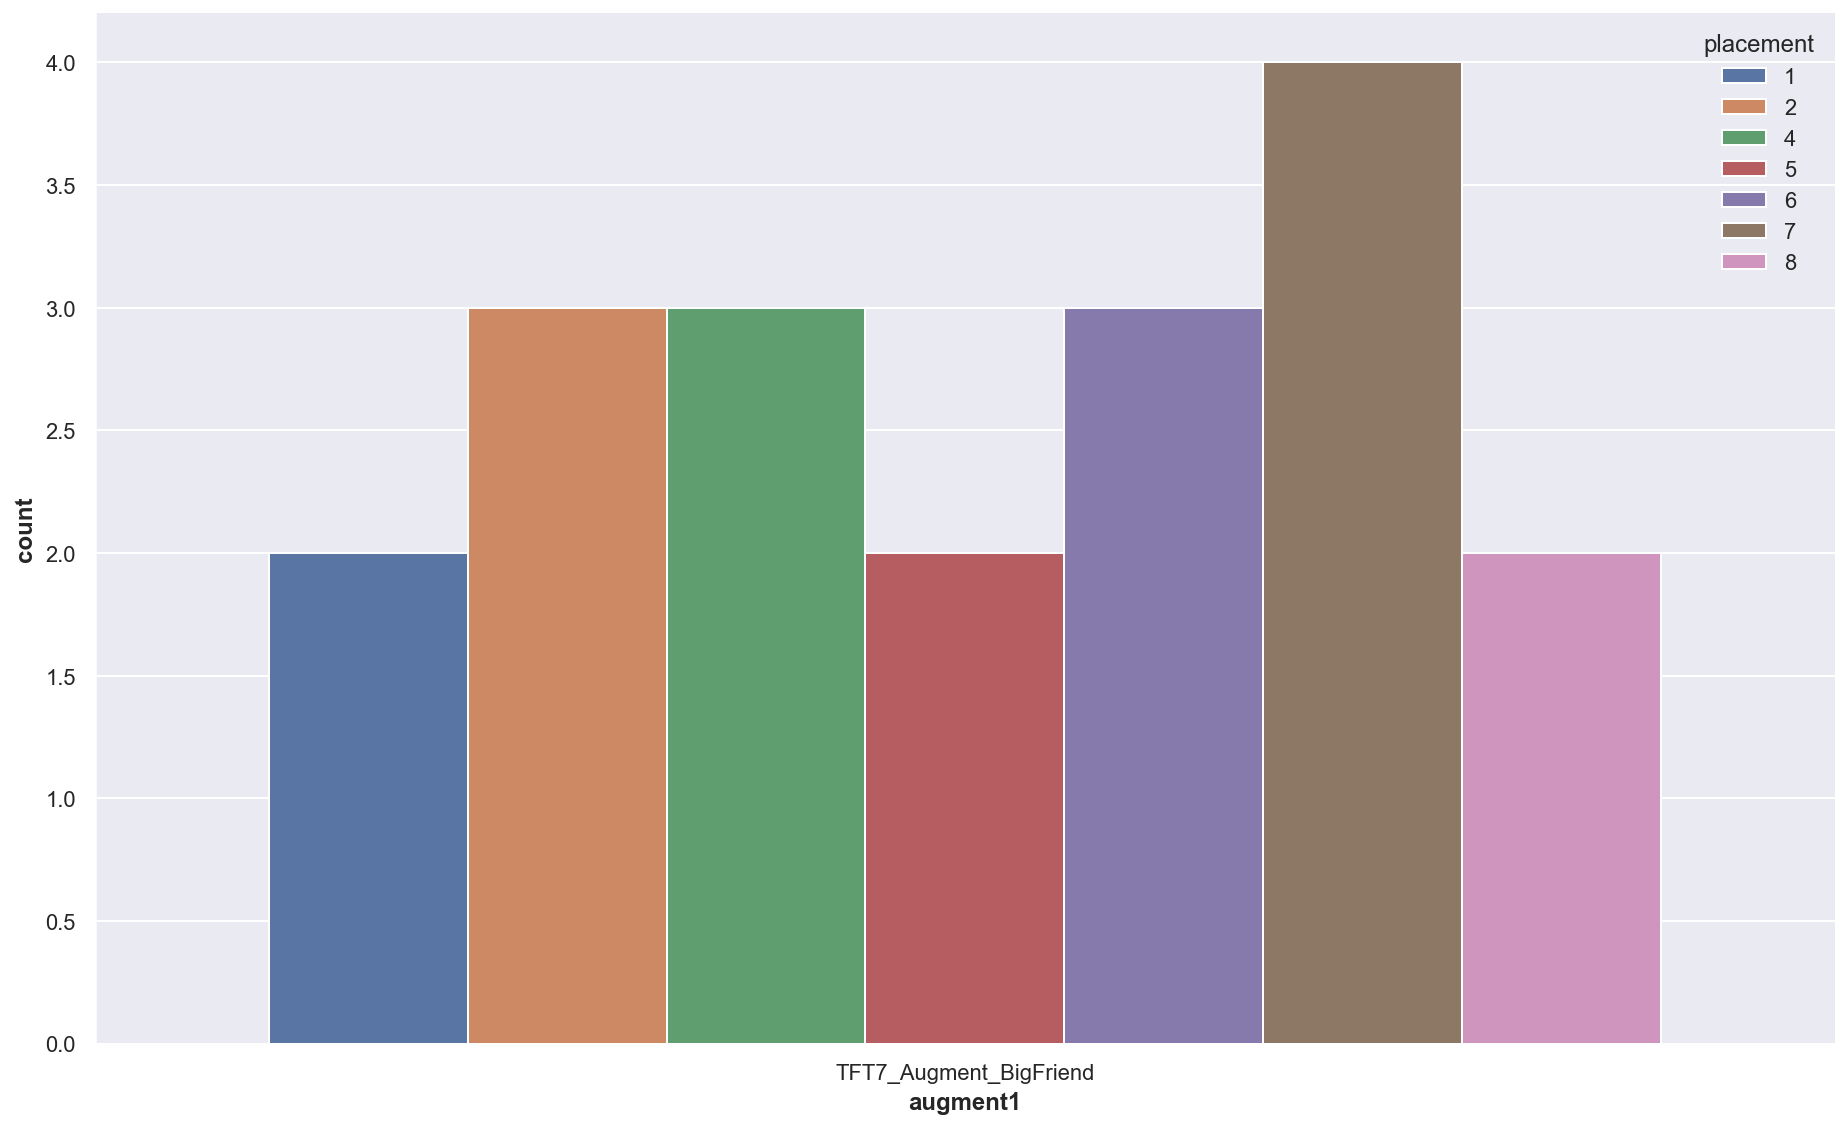

In [1236]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['augment1']=='TFT7_Augment_BigFriend'], x='augment1', hue=TARGETNAME)
sns.despine()

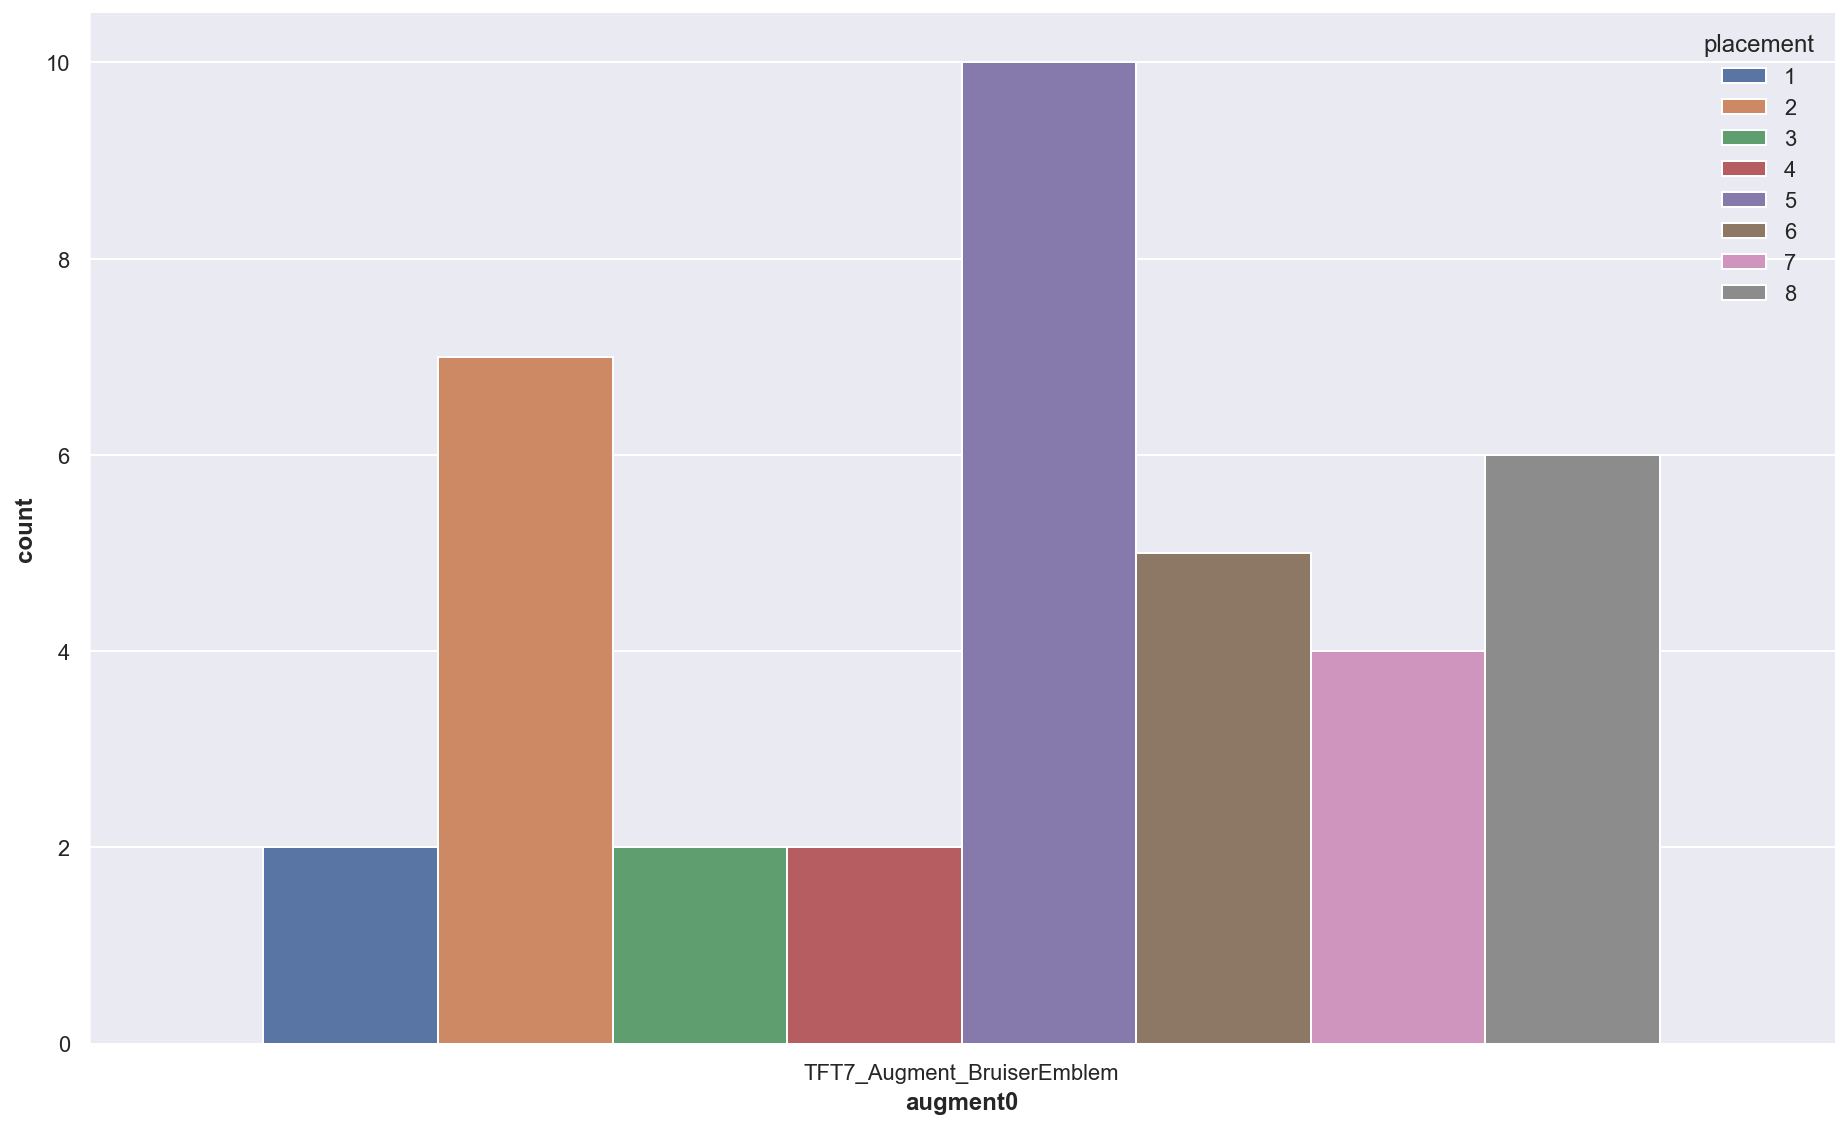

In [1237]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['augment0']=='TFT7_Augment_BruiserEmblem'], x='augment0', hue=TARGETNAME)
sns.despine()

Do not pick TFT6_Augment_WindfallPlusPlus.

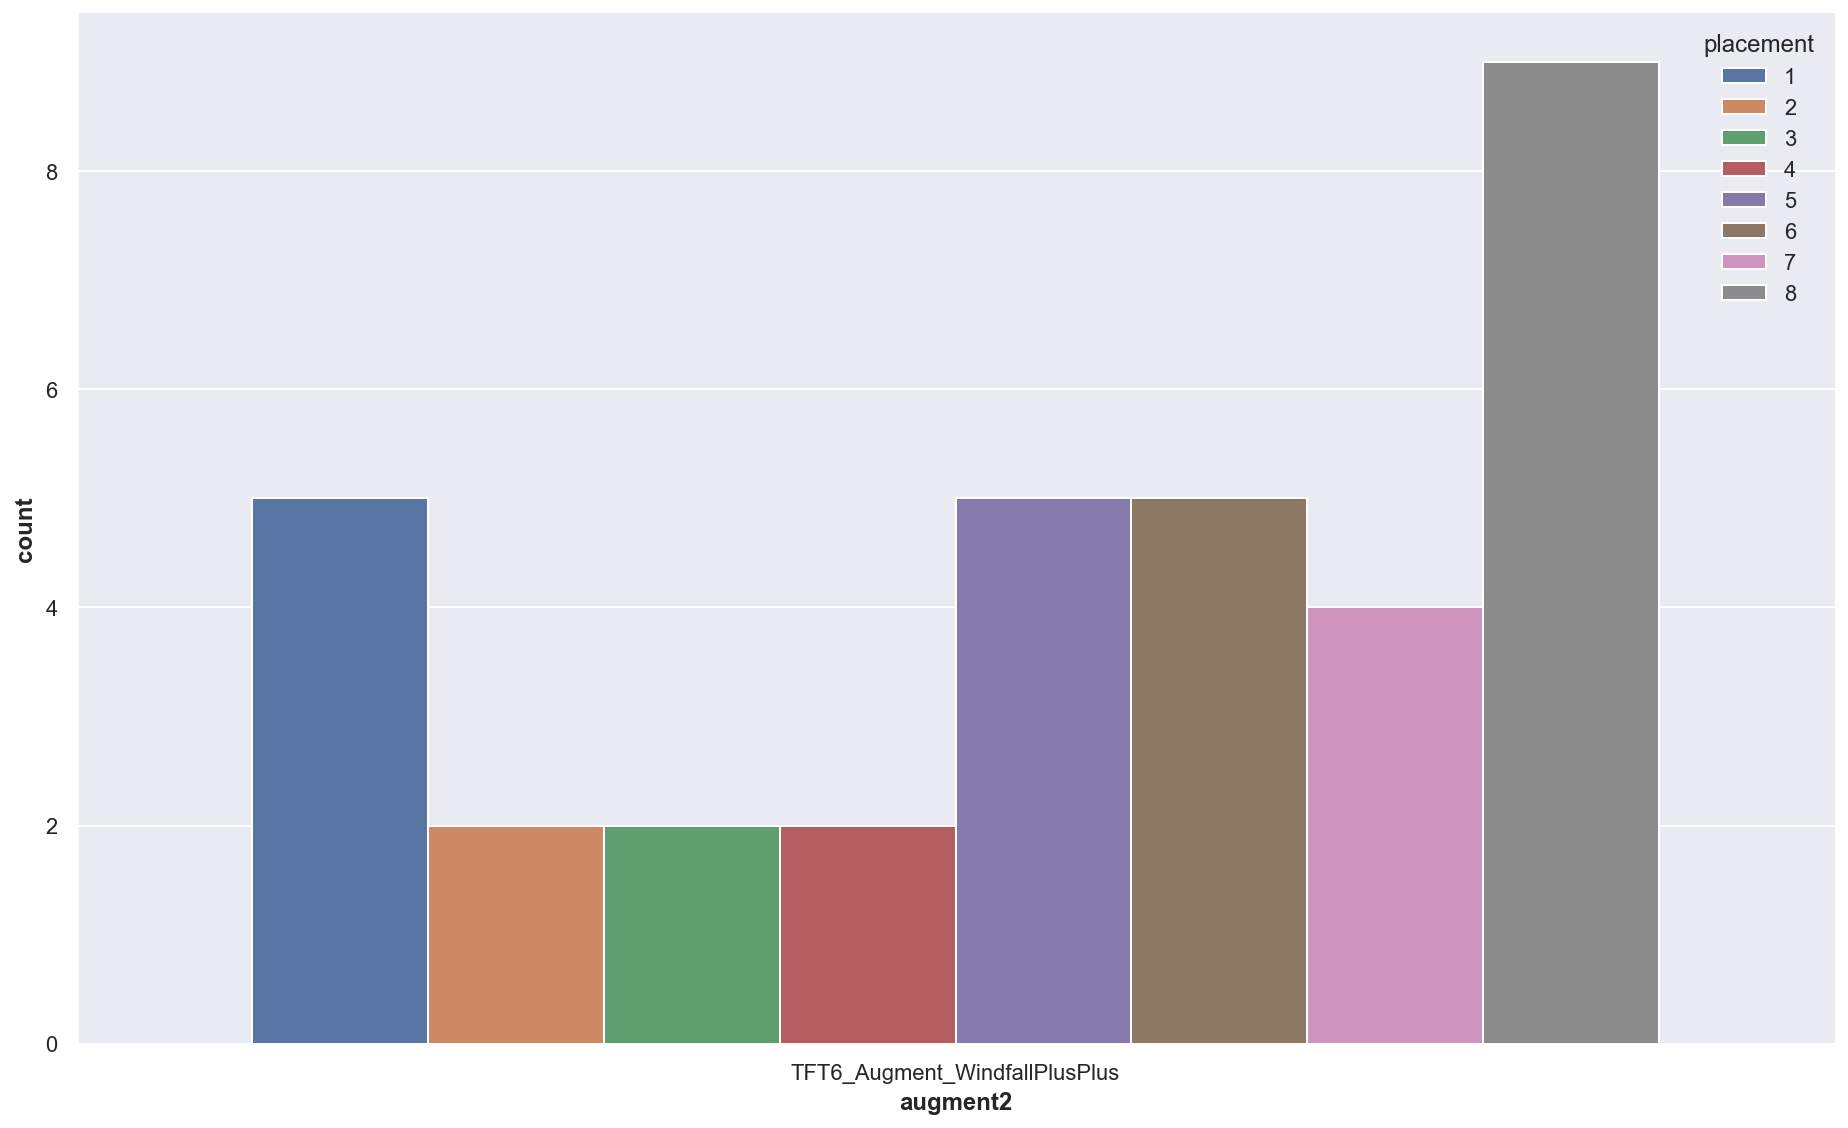

In [1238]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['augment2']=='TFT6_Augment_WindfallPlusPlus'], x='augment2', hue=TARGETNAME)
sns.despine()

Augment TFT6_Augment_CyberneticImplants2 is a good pick.

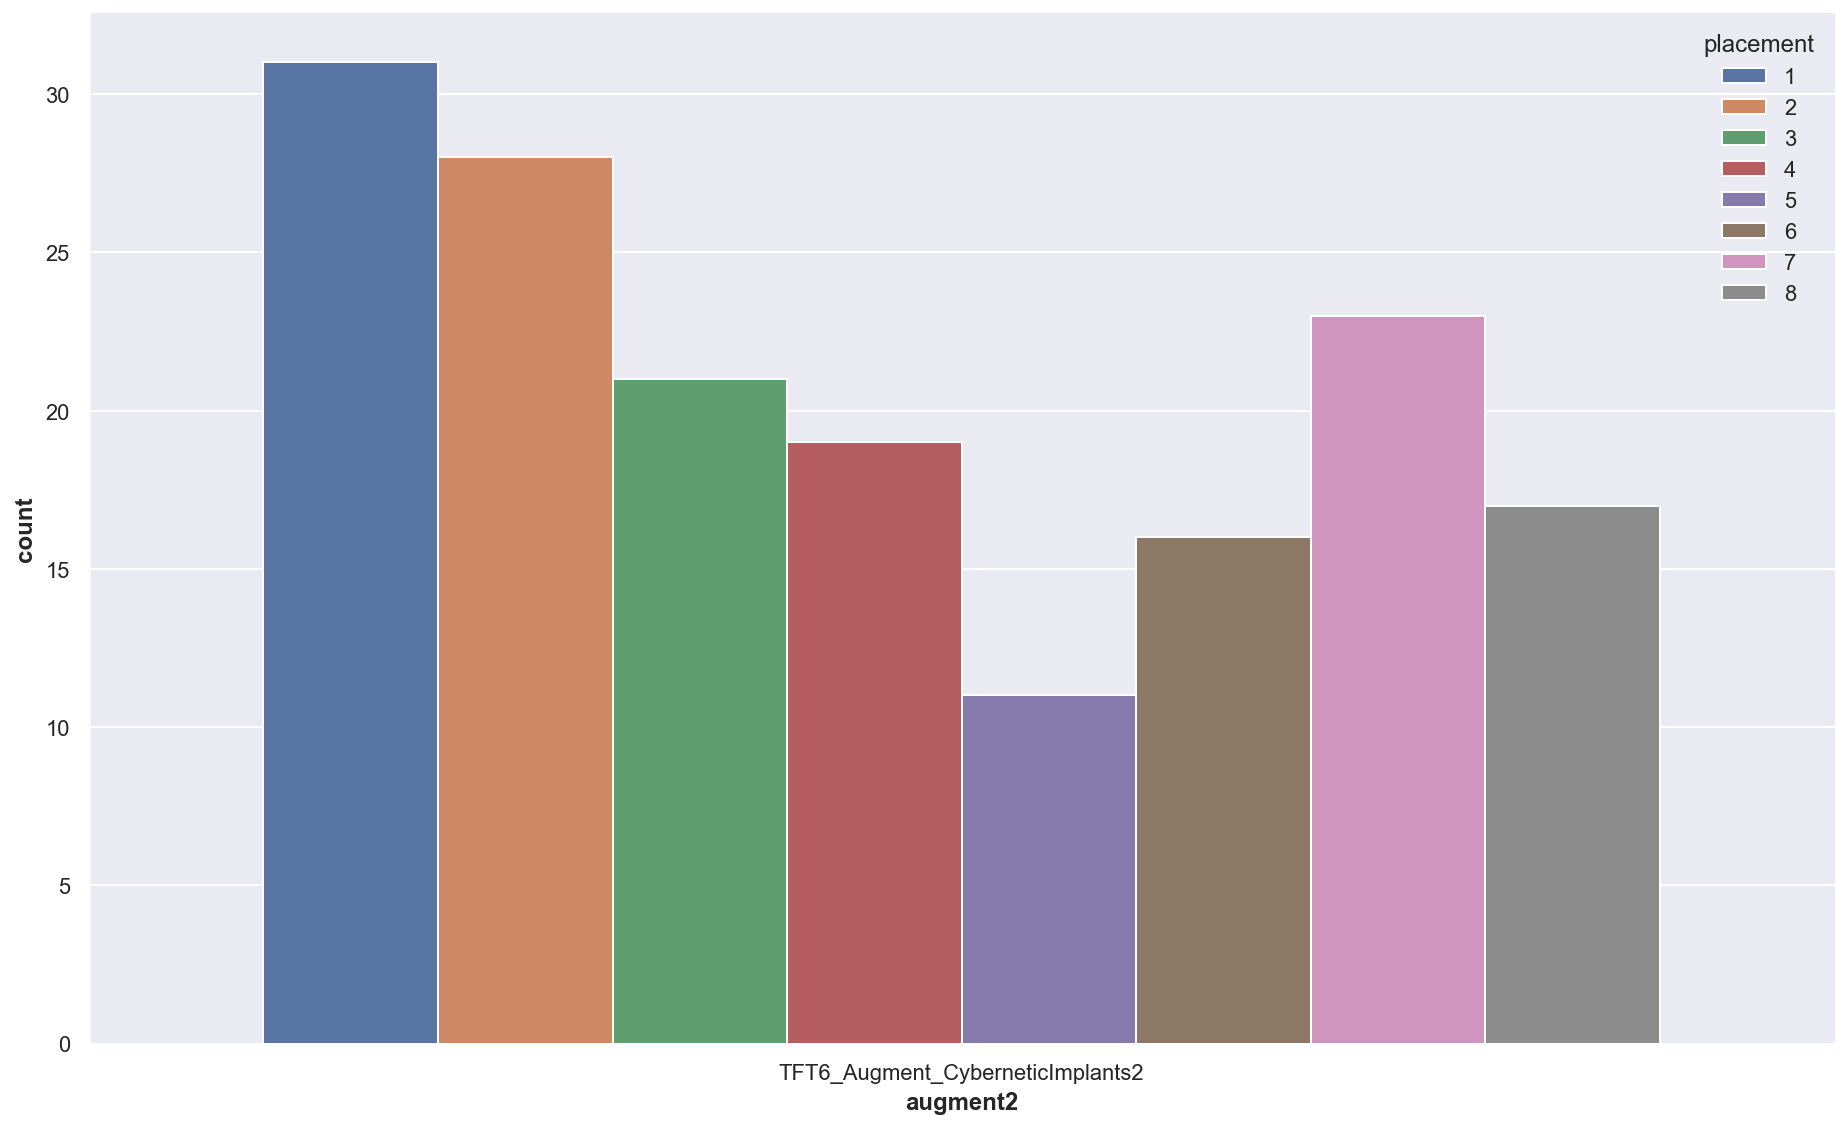

In [1239]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['augment2']=='TFT6_Augment_CyberneticImplants2'], x='augment2', hue=TARGETNAME)
sns.despine()

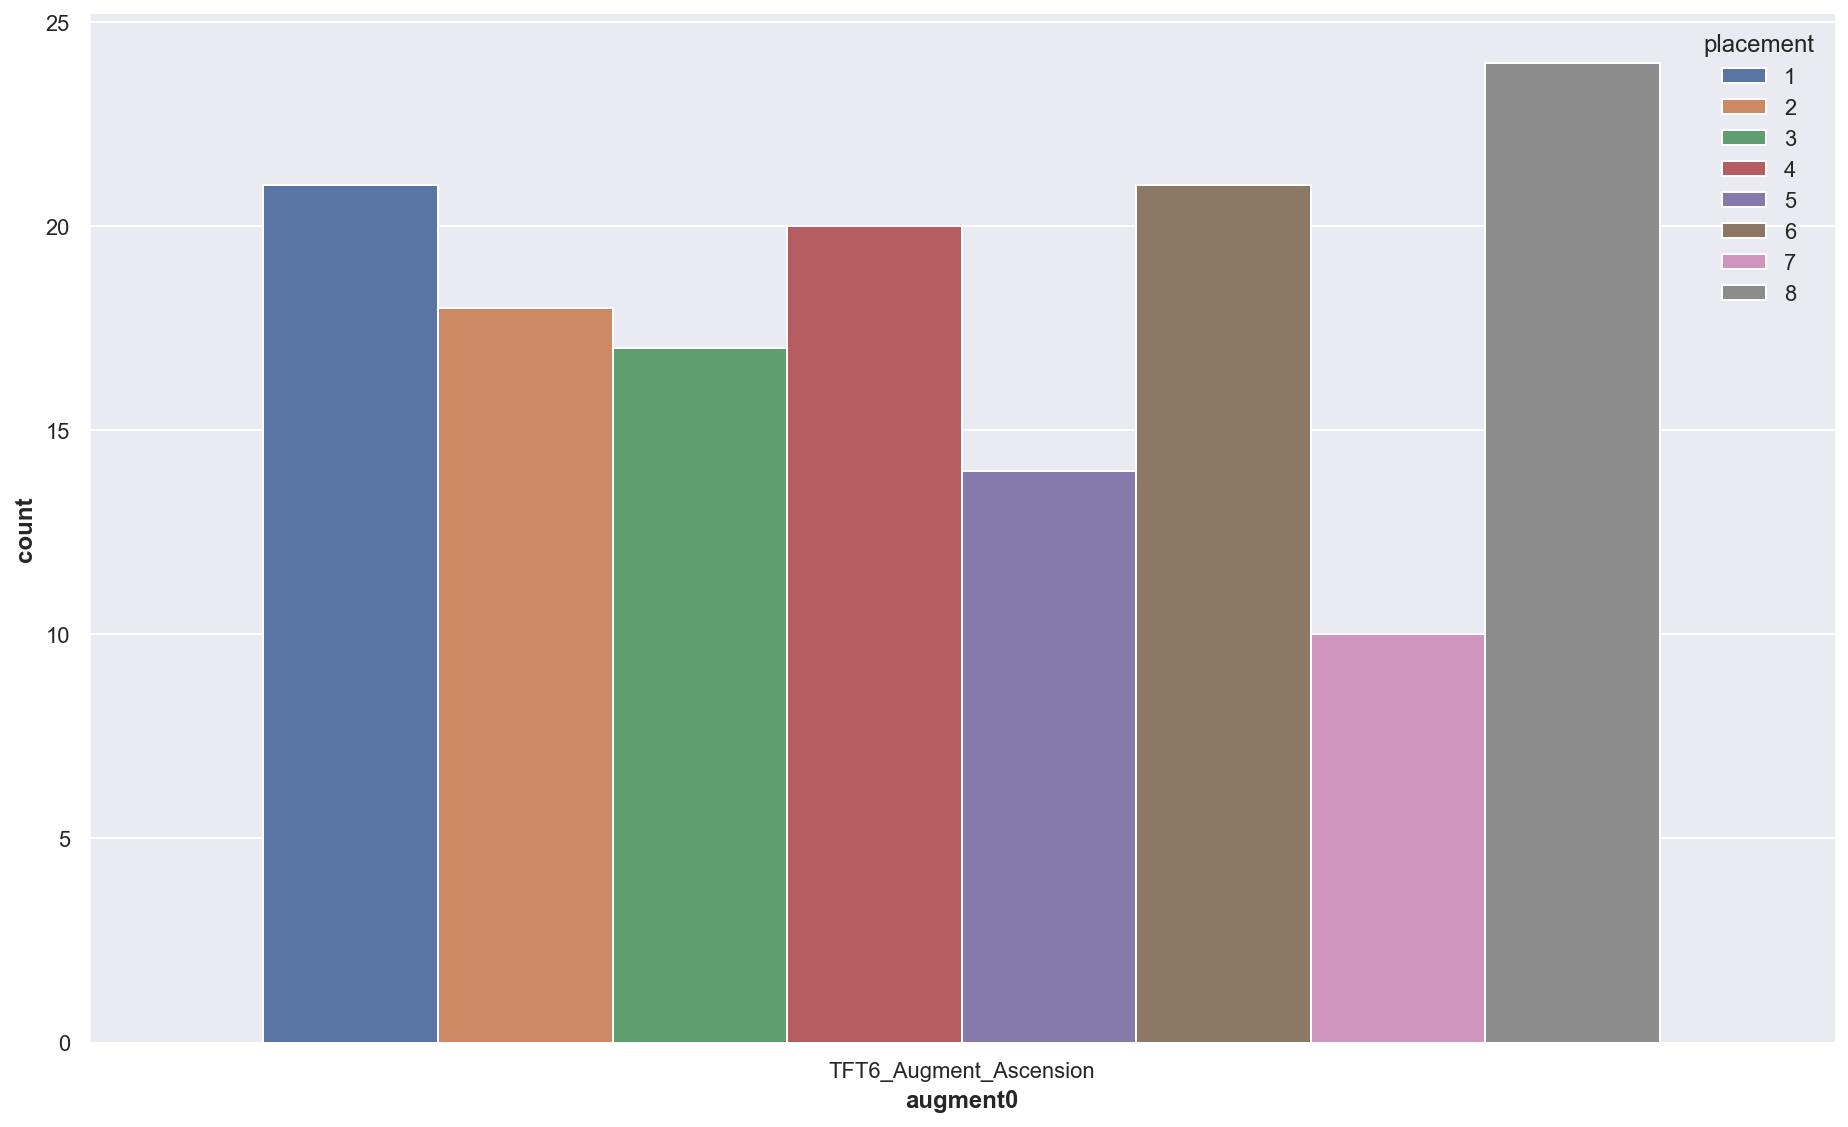

In [1240]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['augment0']=='TFT6_Augment_Ascension'], x='augment0', hue=TARGETNAME)
sns.despine()

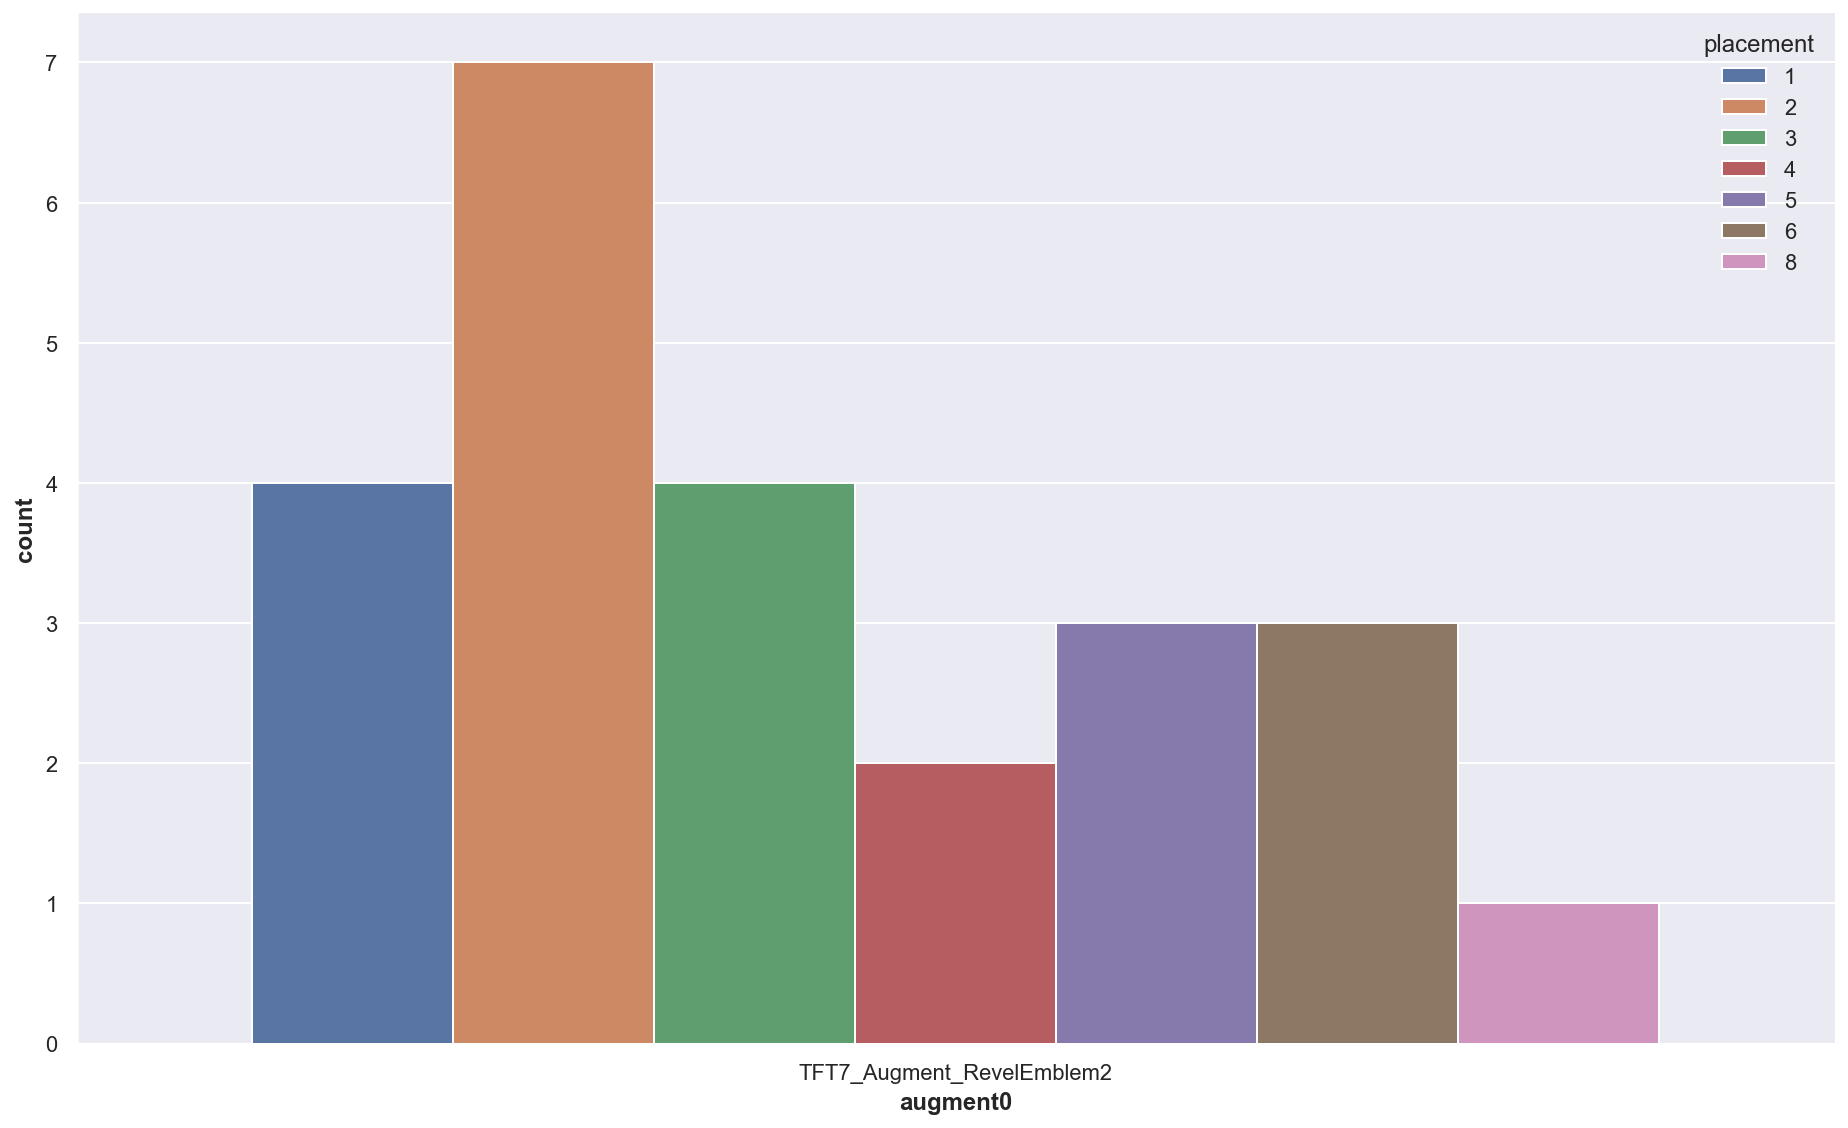

In [1241]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['augment0']=='TFT7_Augment_RevelEmblem2'], x='augment0', hue=TARGETNAME)
sns.despine()

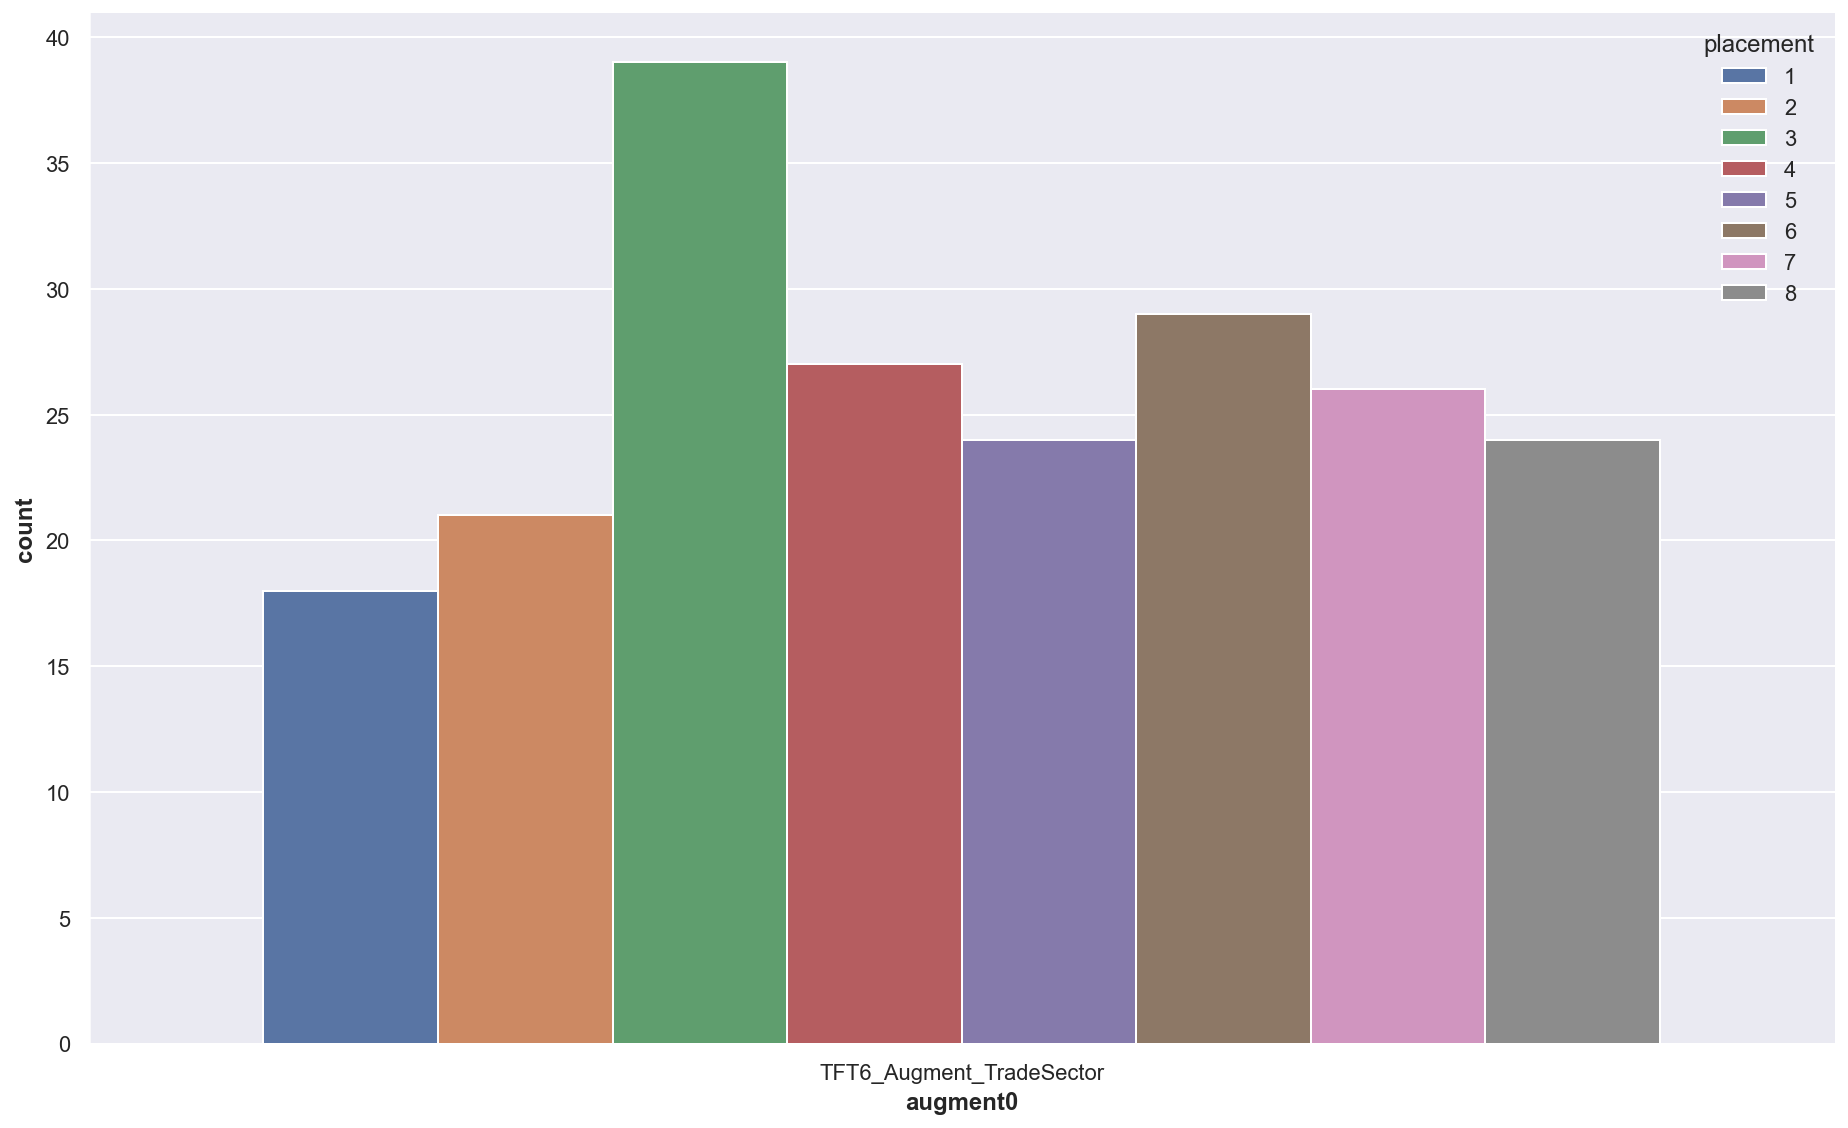

In [1242]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['augment0']=='TFT6_Augment_TradeSector'], x='augment0', hue=TARGETNAME)
sns.despine()

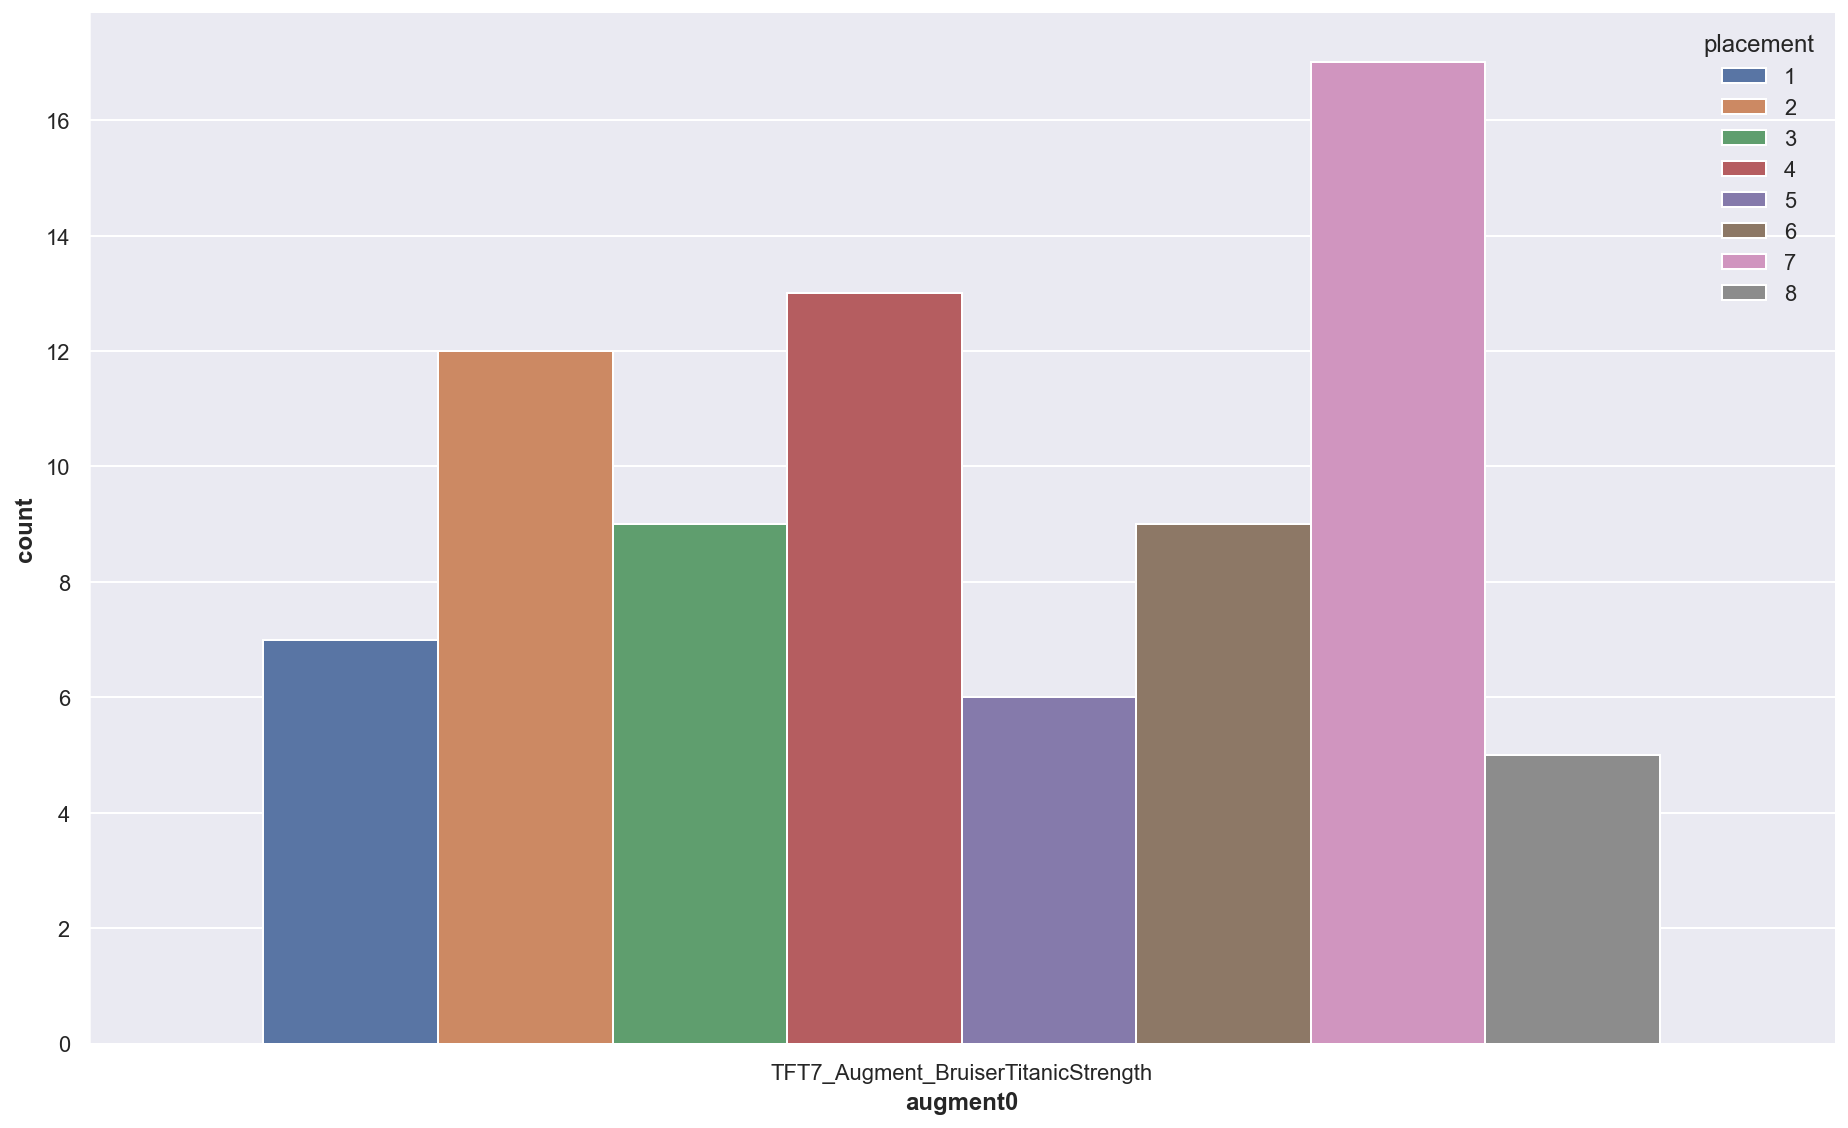

In [1243]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['augment0']=='TFT7_Augment_BruiserTitanicStrength'], x='augment0', hue=TARGETNAME)
sns.despine()

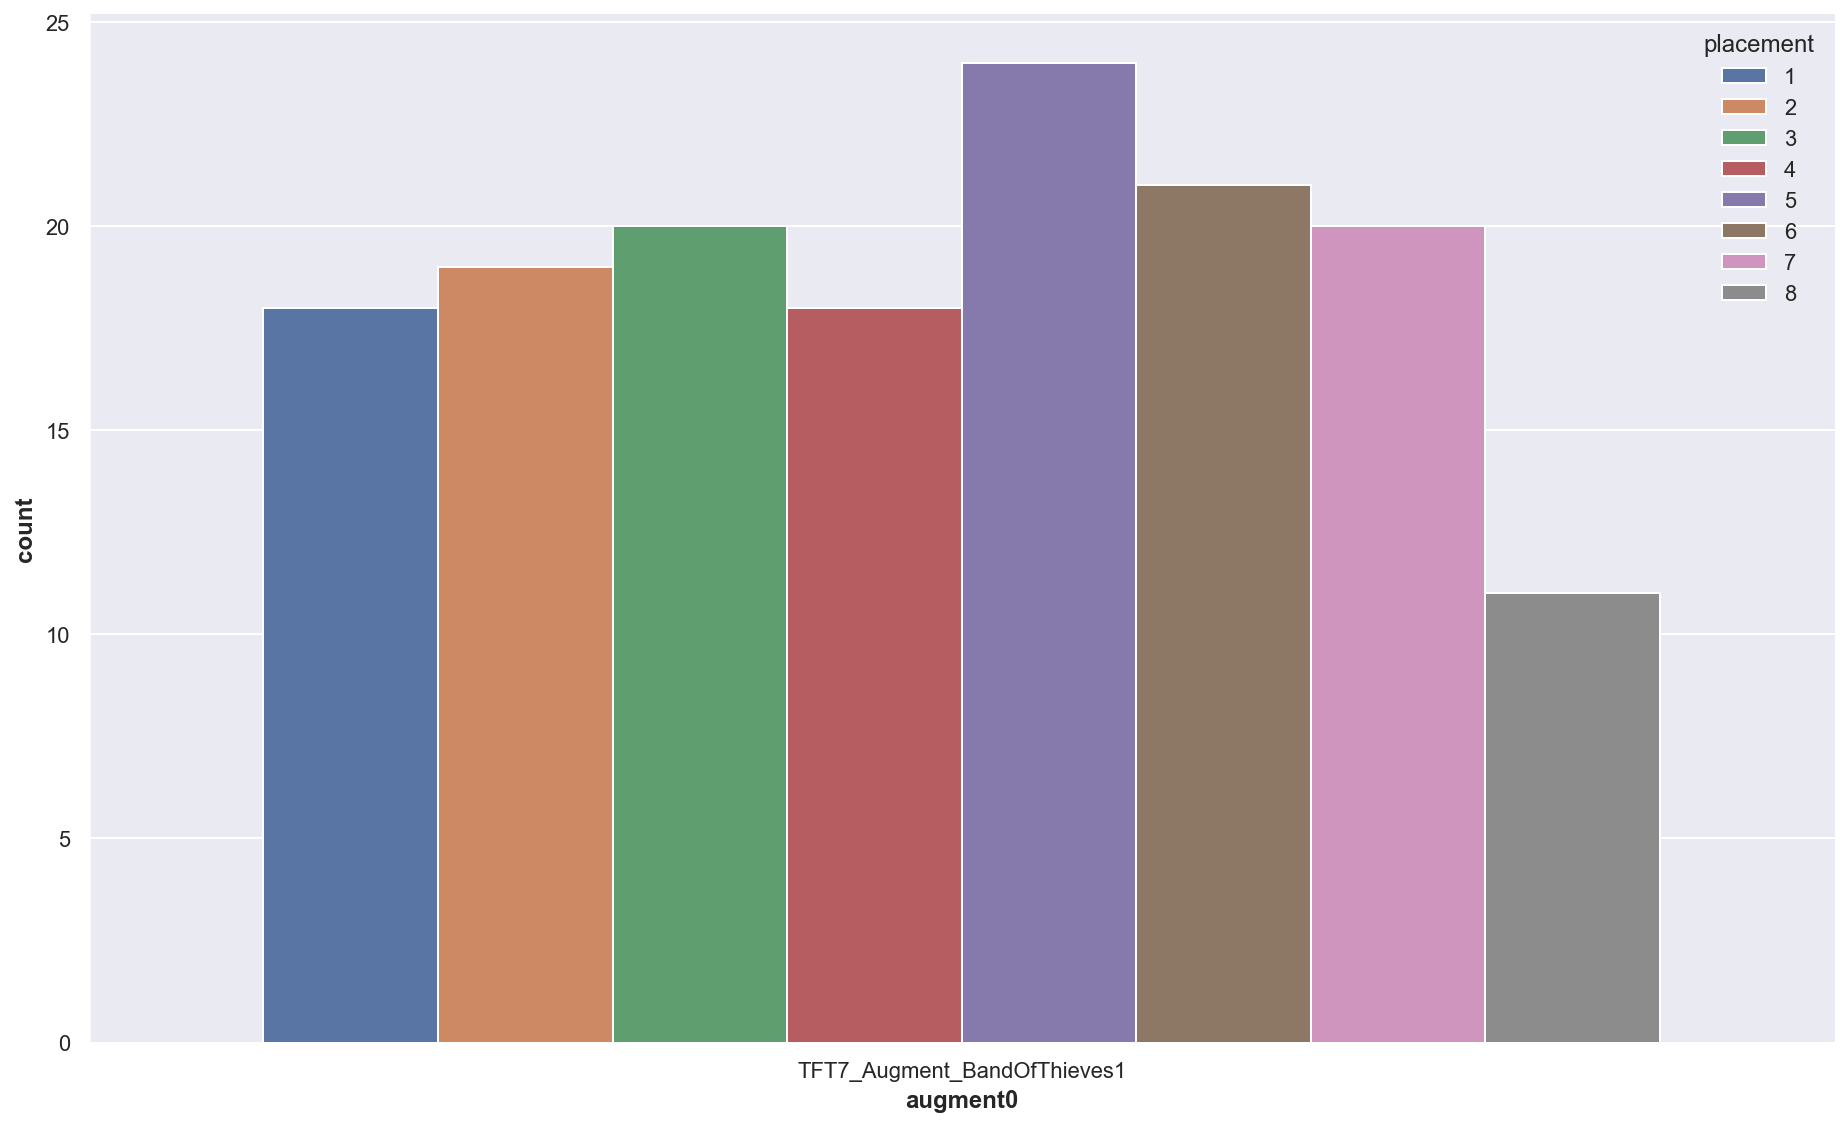

In [1244]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['augment0']=='TFT7_Augment_BandOfThieves1'], x='augment0', hue=TARGETNAME)
sns.despine()

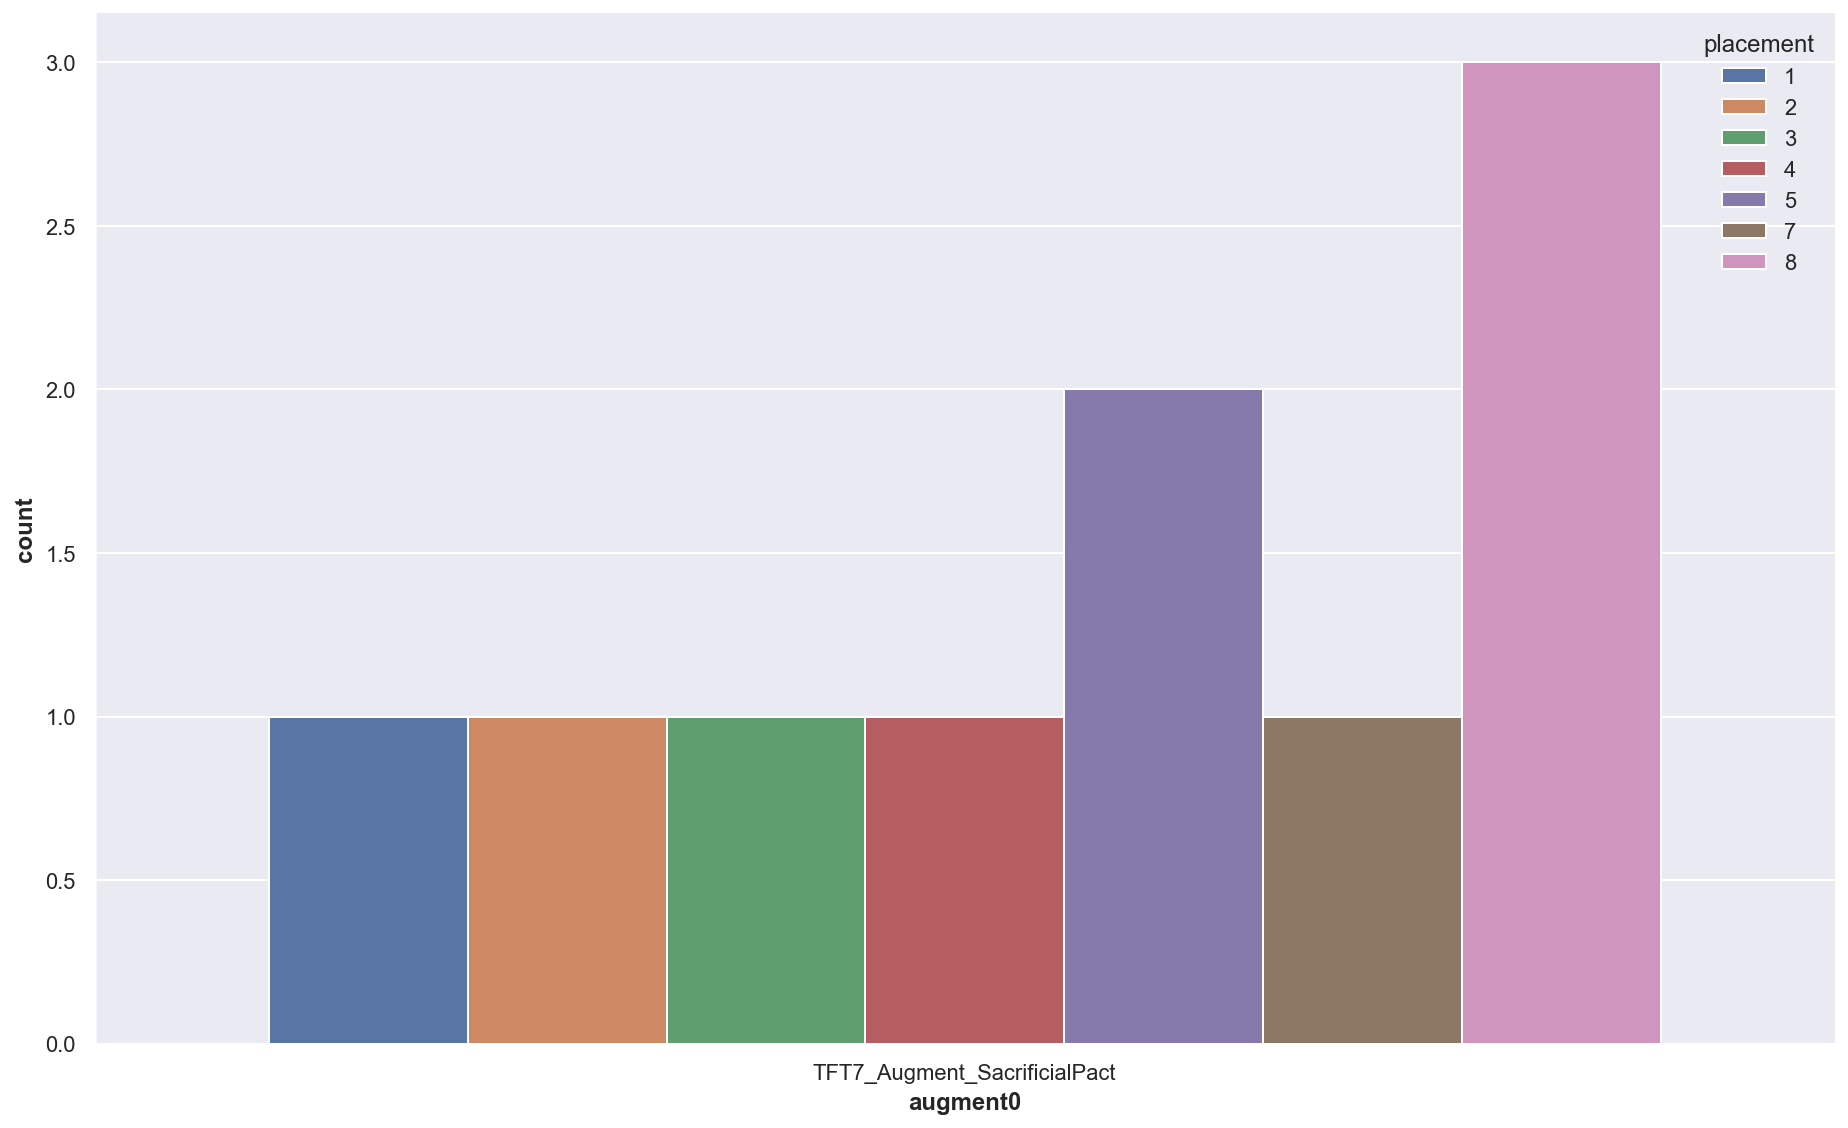

In [1245]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['augment0']=='TFT7_Augment_SacrificialPact'], x='augment0', hue=TARGETNAME)
sns.despine()

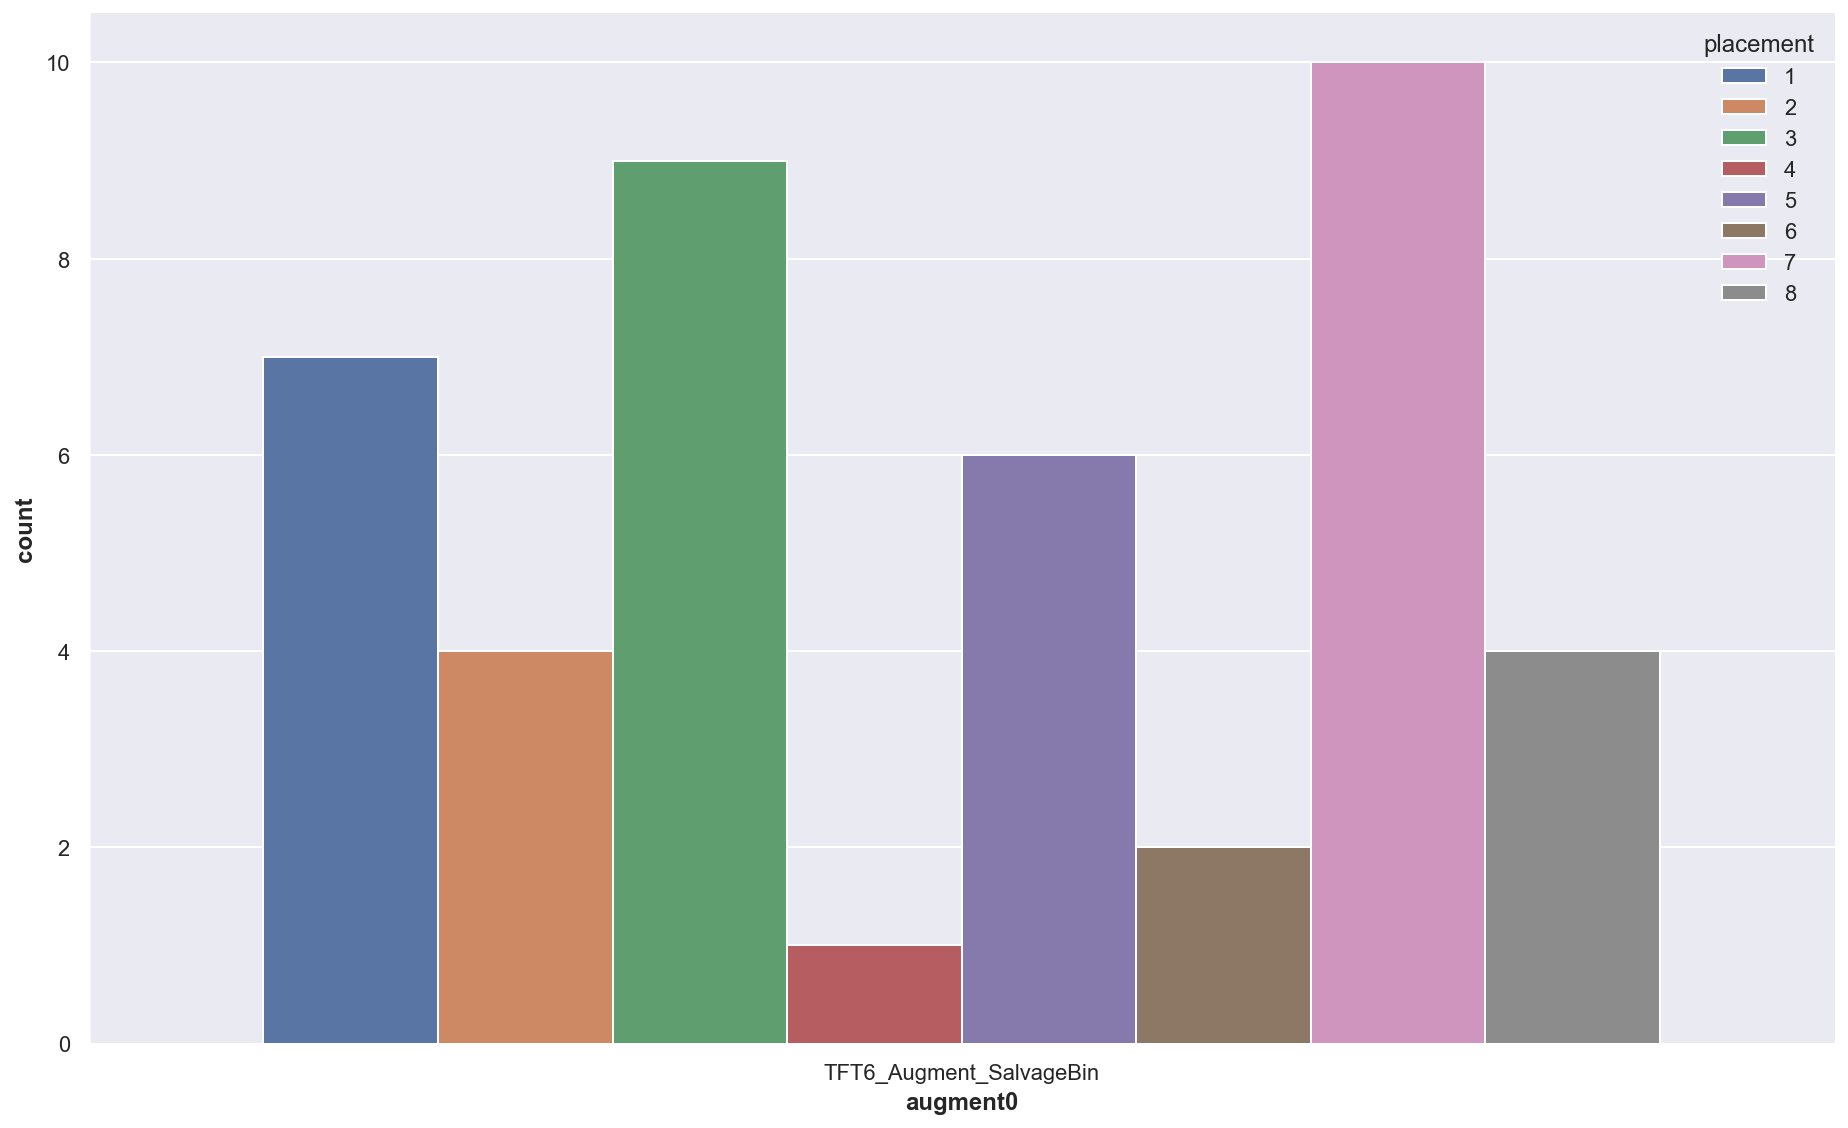

In [1246]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['augment0']=='TFT6_Augment_SalvageBin'], x='augment0', hue=TARGETNAME)
sns.despine()

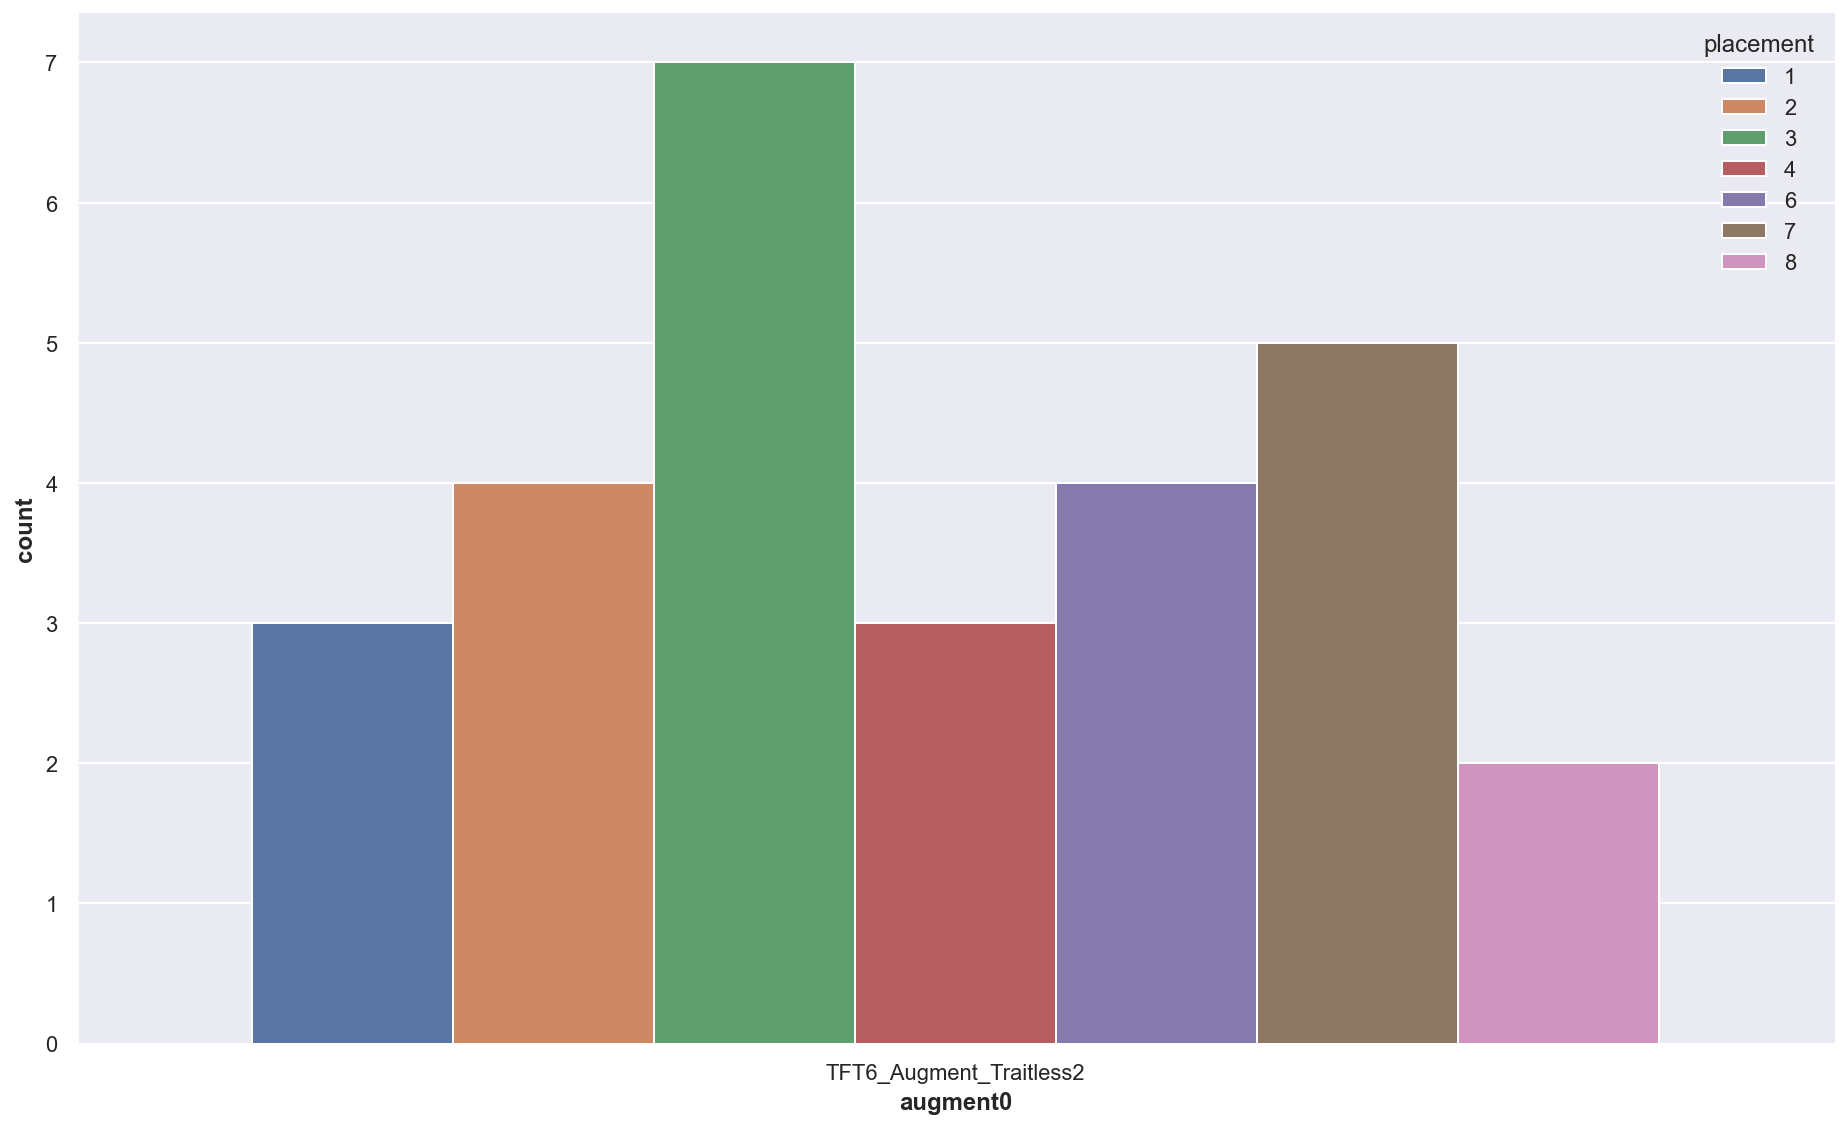

In [1247]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['augment0']=='TFT6_Augment_Traitless2'], x='augment0', hue=TARGETNAME)
sns.despine()

No Good.

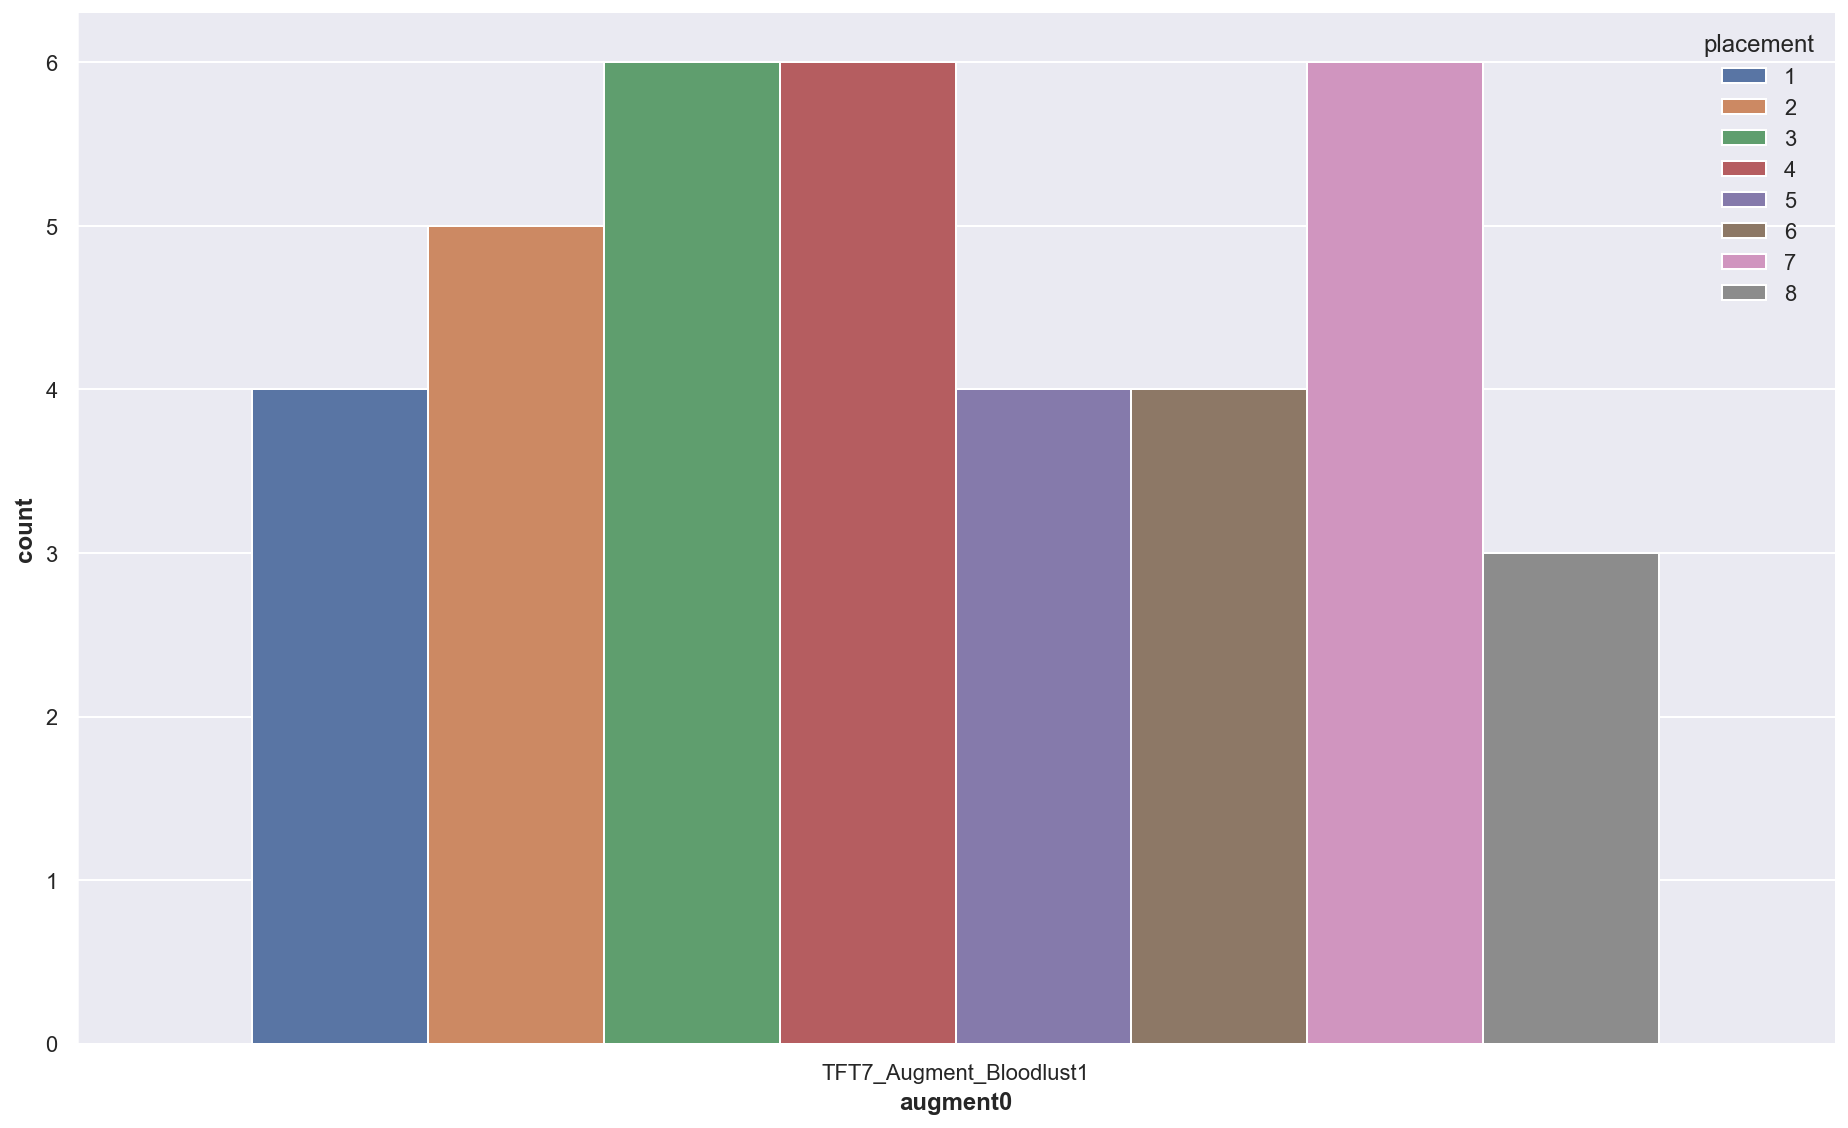

In [1248]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['augment0']=='TFT7_Augment_Bloodlust1'], x='augment0', hue=TARGETNAME)
sns.despine()

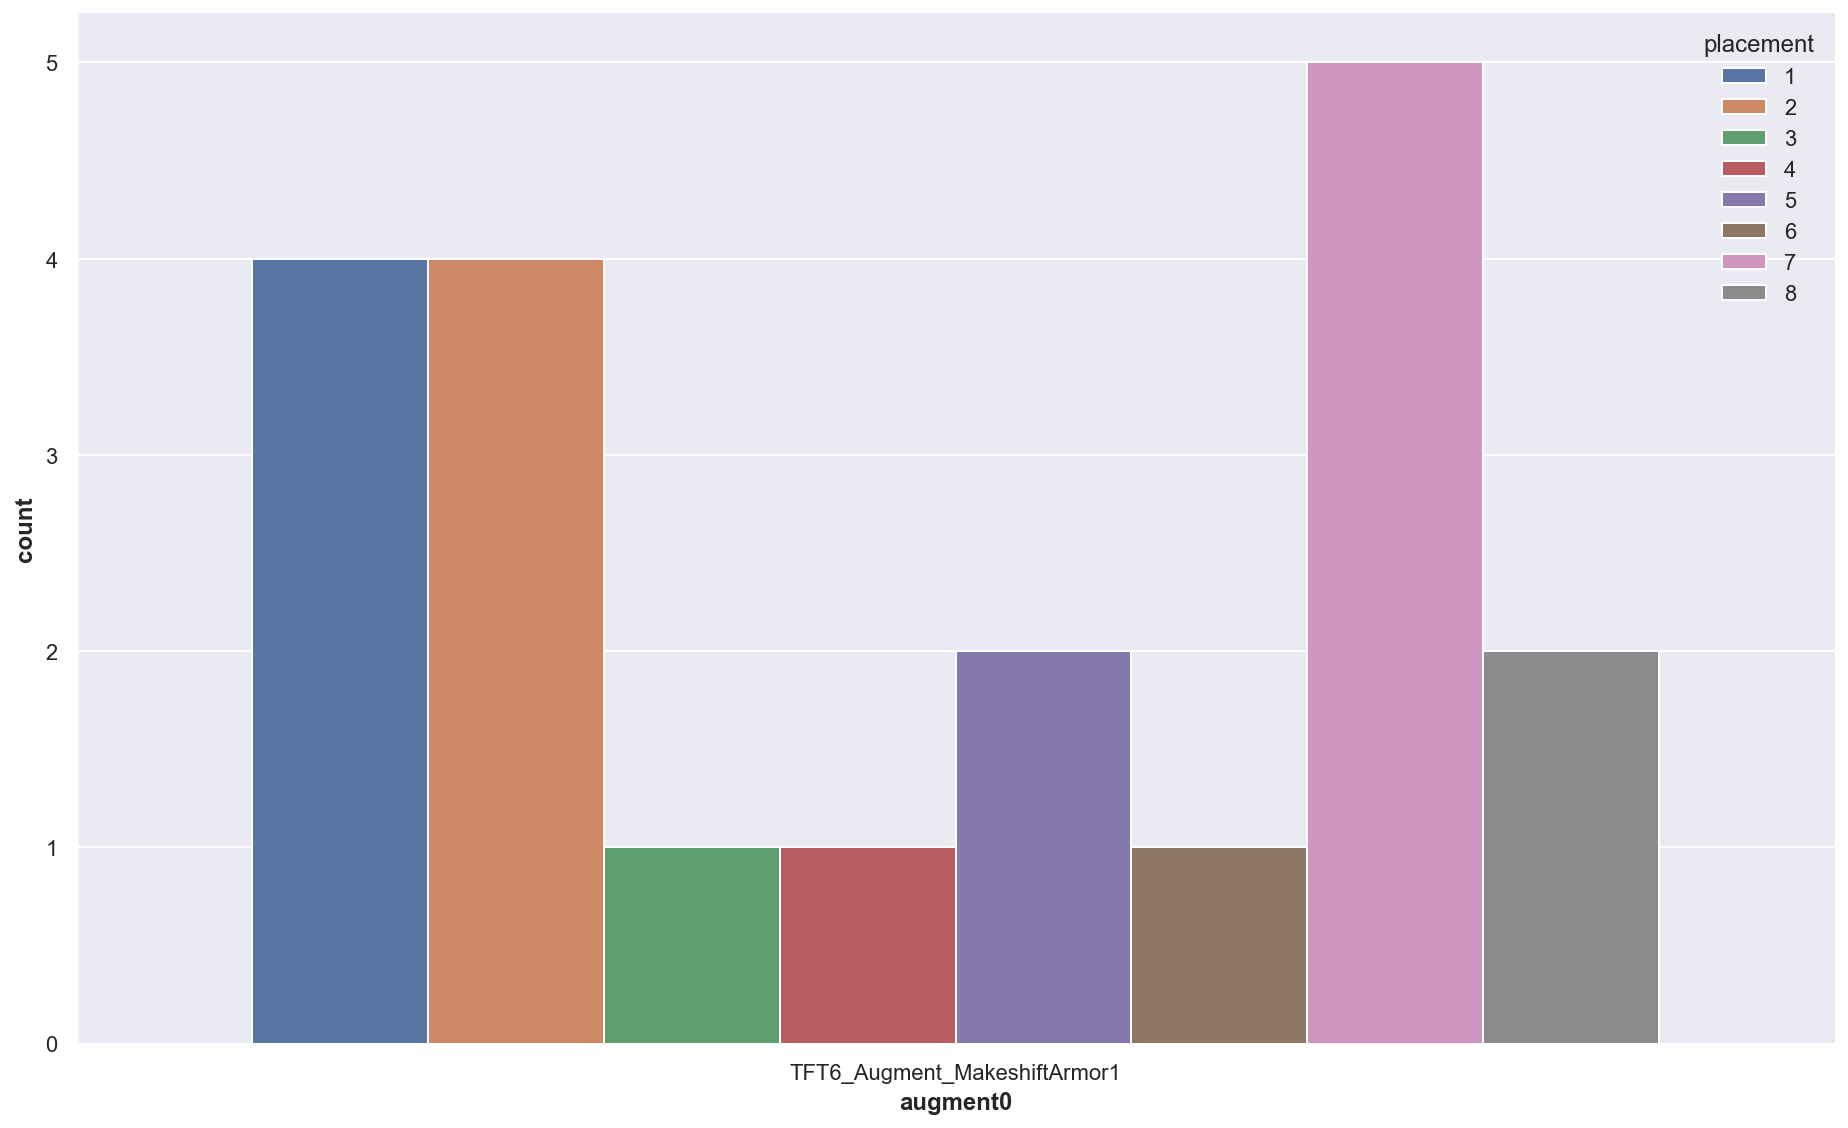

In [1249]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['augment0']=='TFT6_Augment_MakeshiftArmor1'], x='augment0', hue=TARGETNAME)
sns.despine()

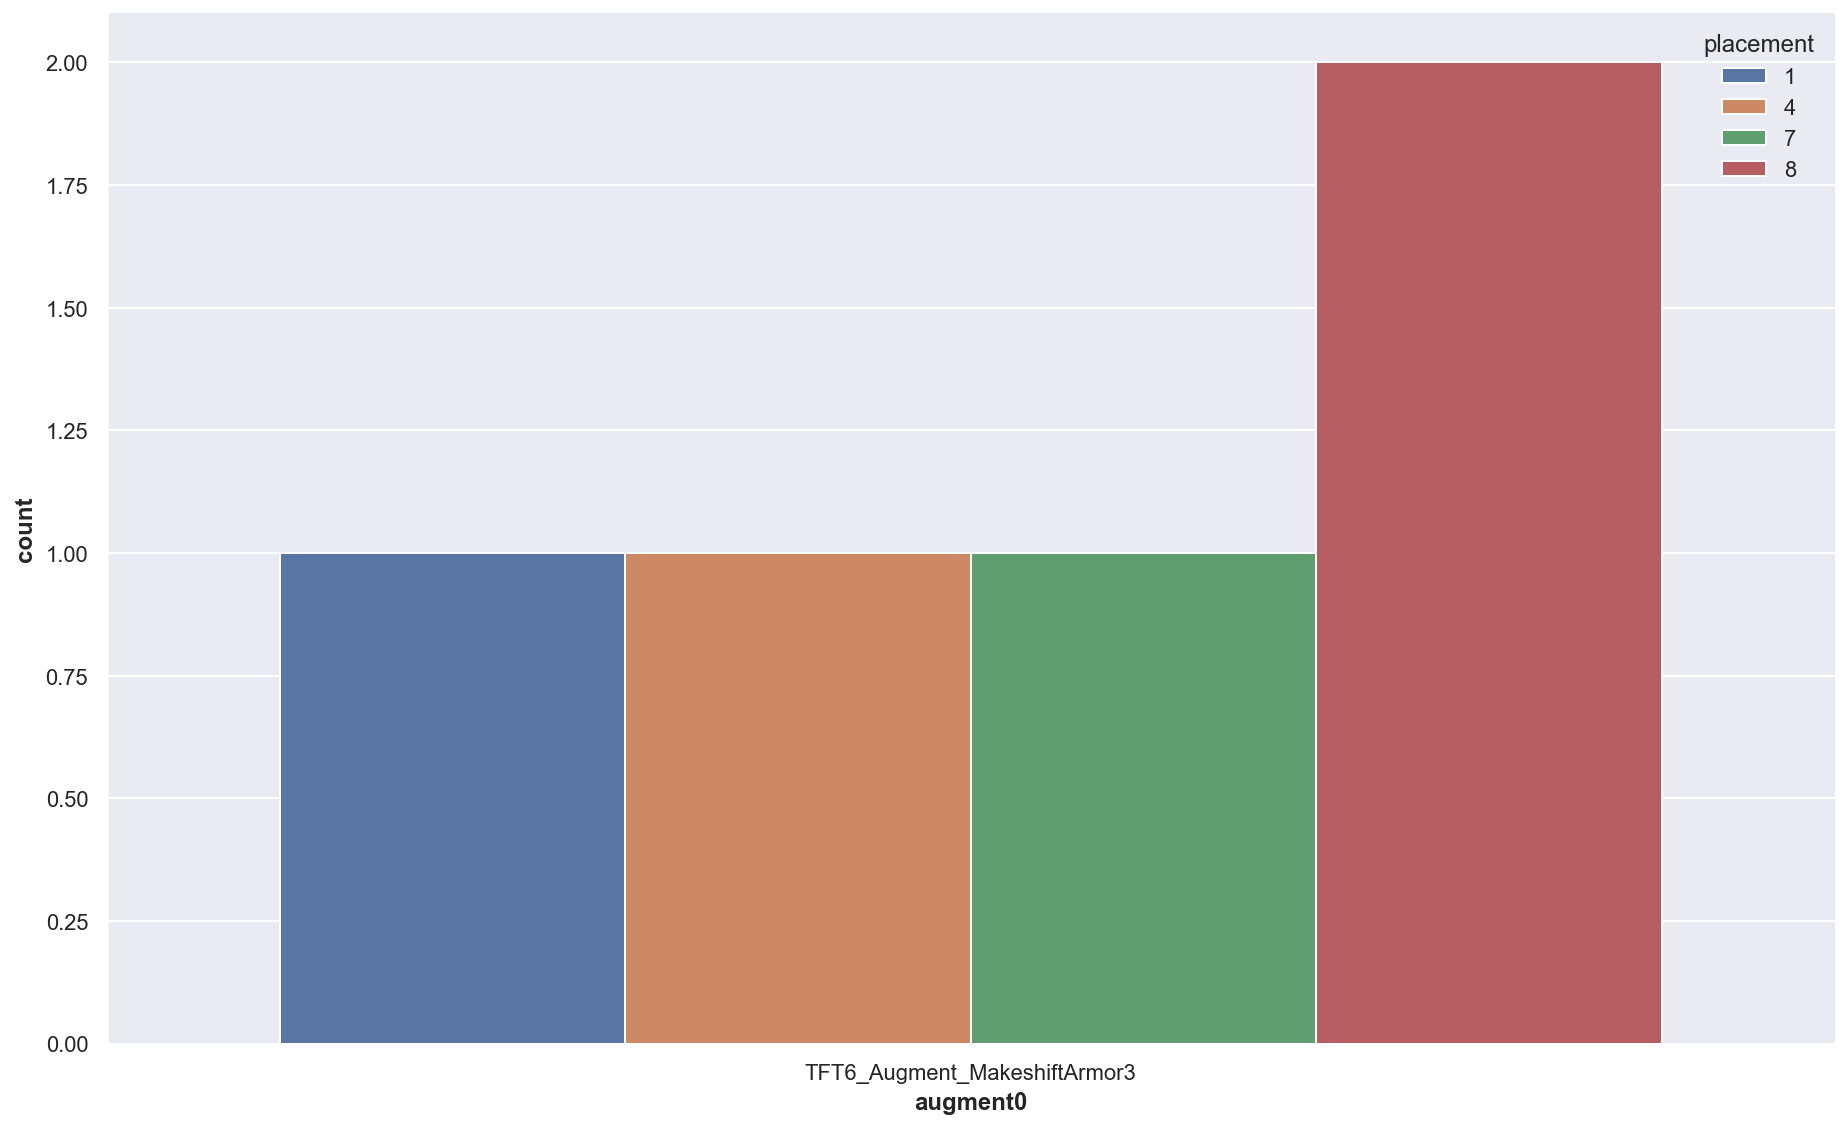

In [1250]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['augment0']=='TFT6_Augment_MakeshiftArmor3'], x='augment0', hue=TARGETNAME)
sns.despine()

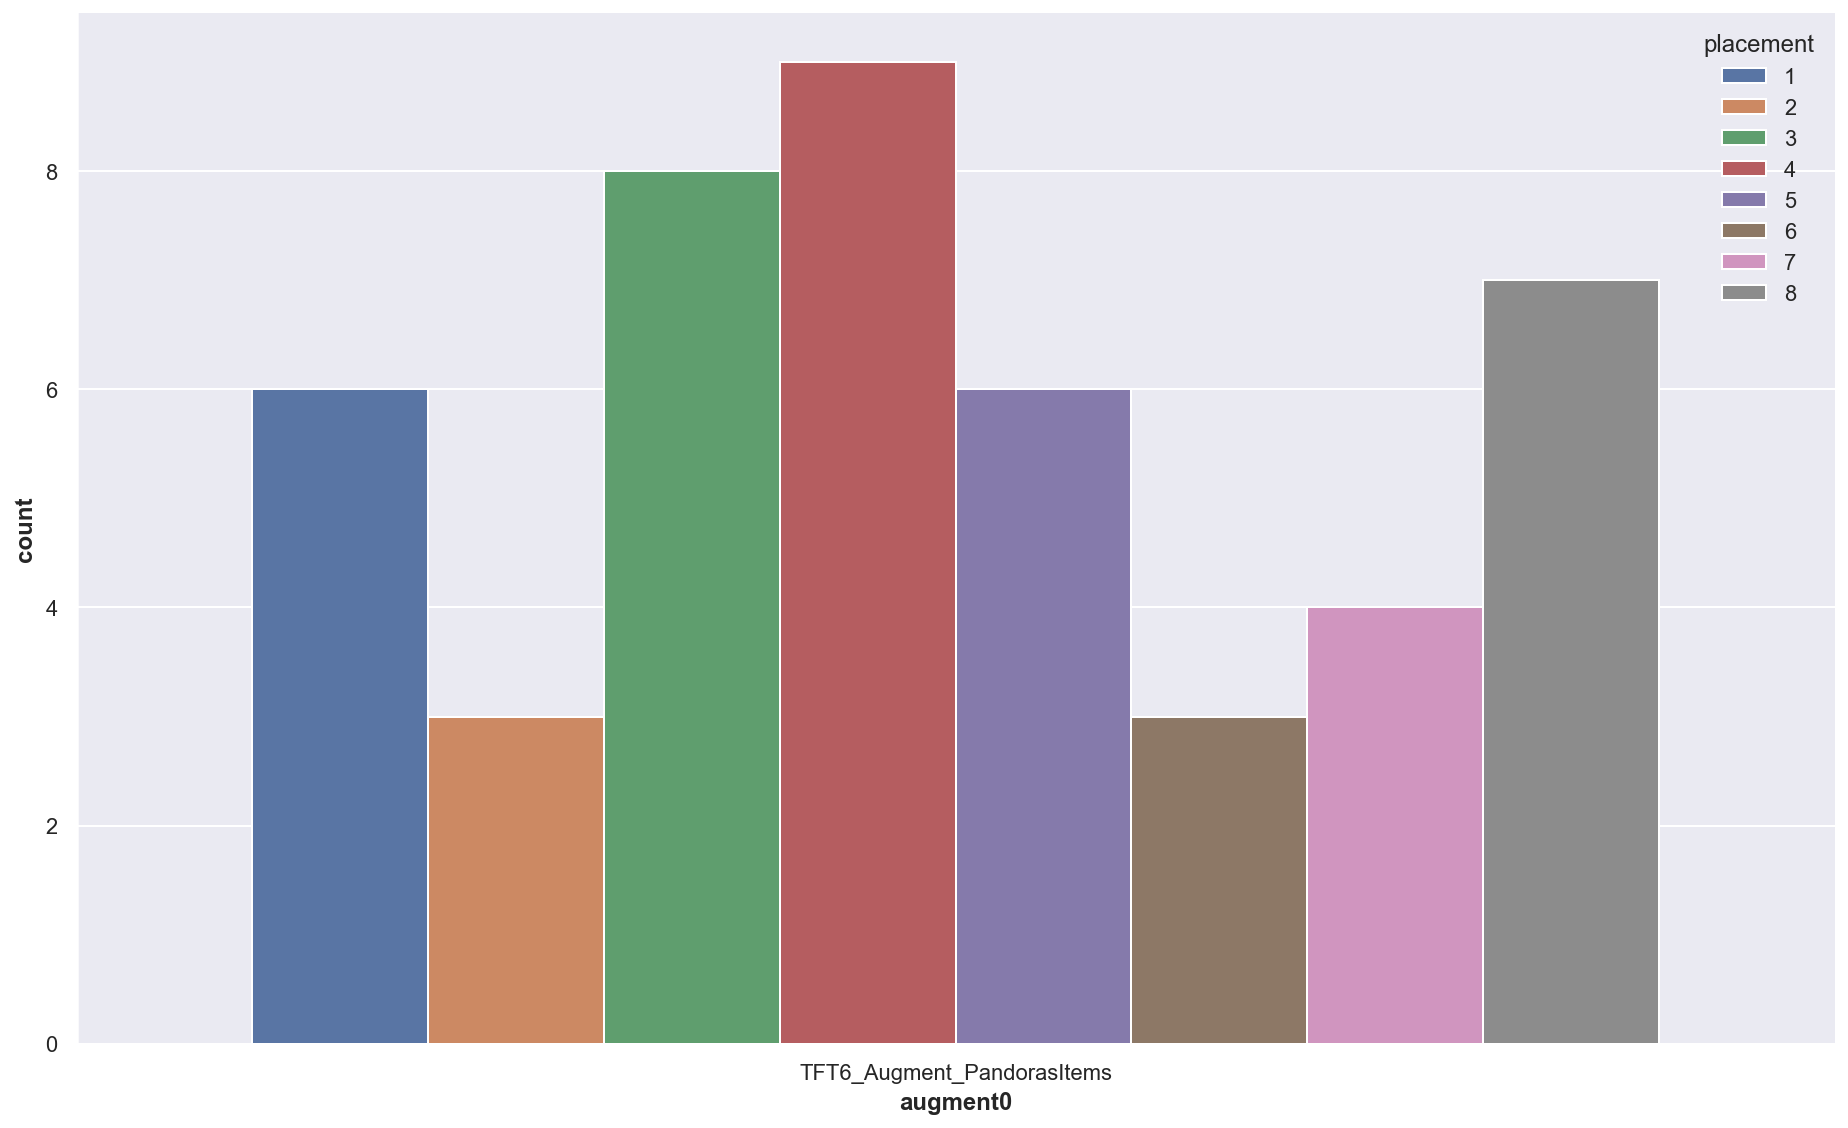

In [1251]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['augment0']=='TFT6_Augment_PandorasItems'], x='augment0', hue=TARGETNAME)
sns.despine()

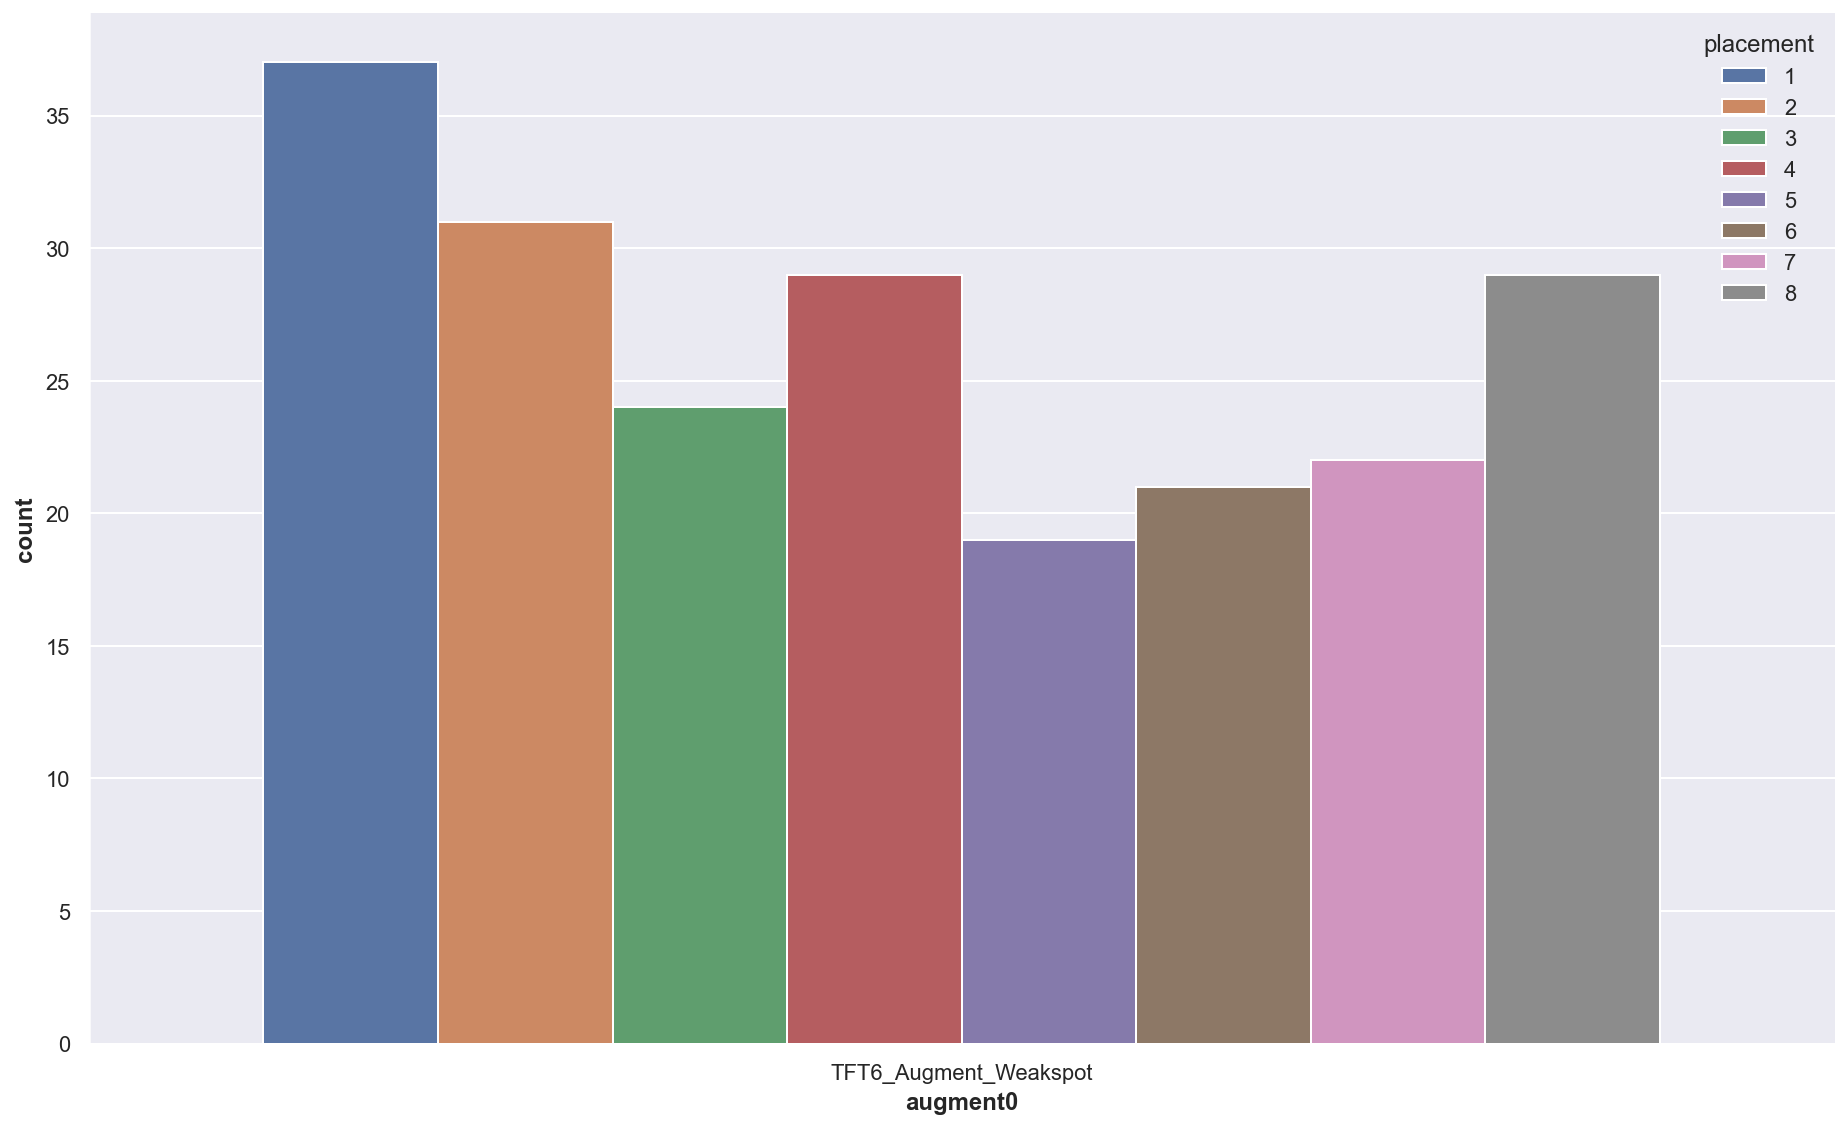

In [1252]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['augment0']=='TFT6_Augment_Weakspot'], x='augment0', hue=TARGETNAME)
sns.despine()

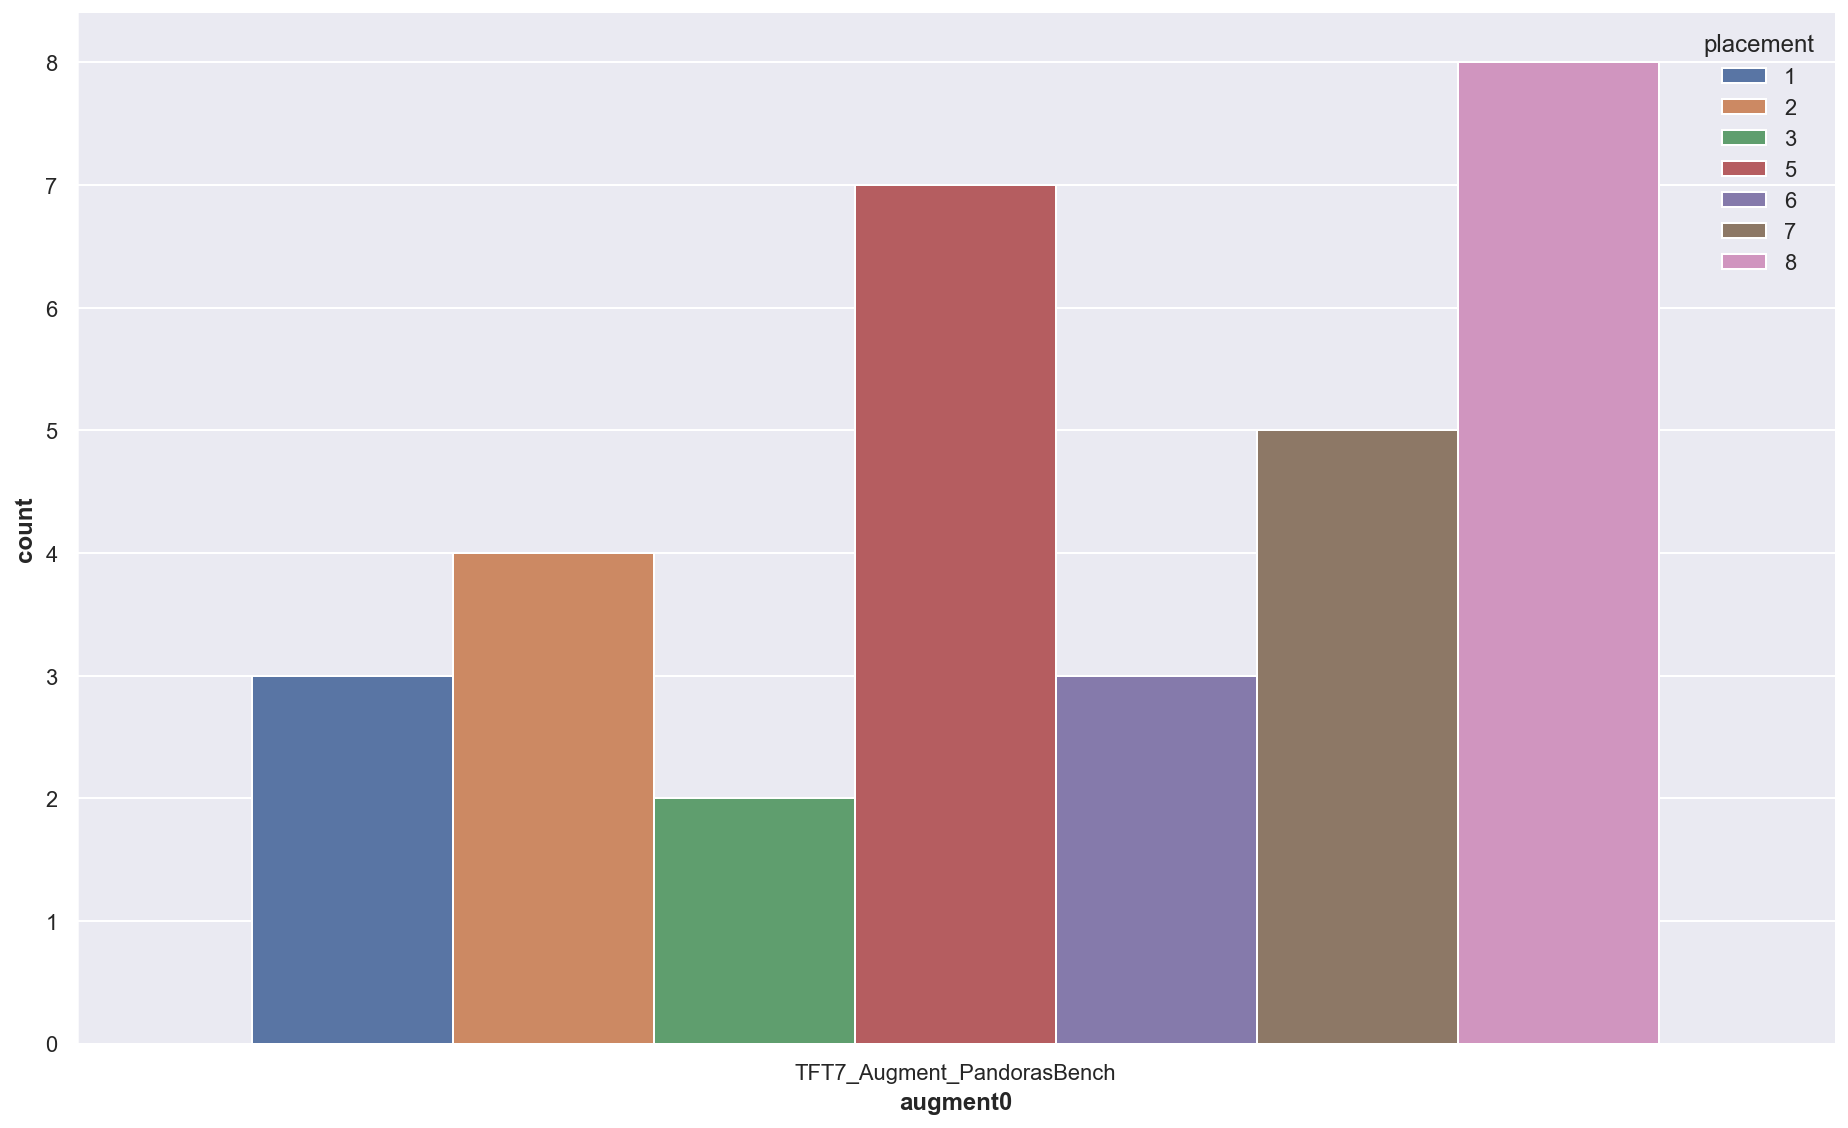

In [1253]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['augment0']=='TFT7_Augment_PandorasBench'], x='augment0', hue=TARGETNAME)
sns.despine()

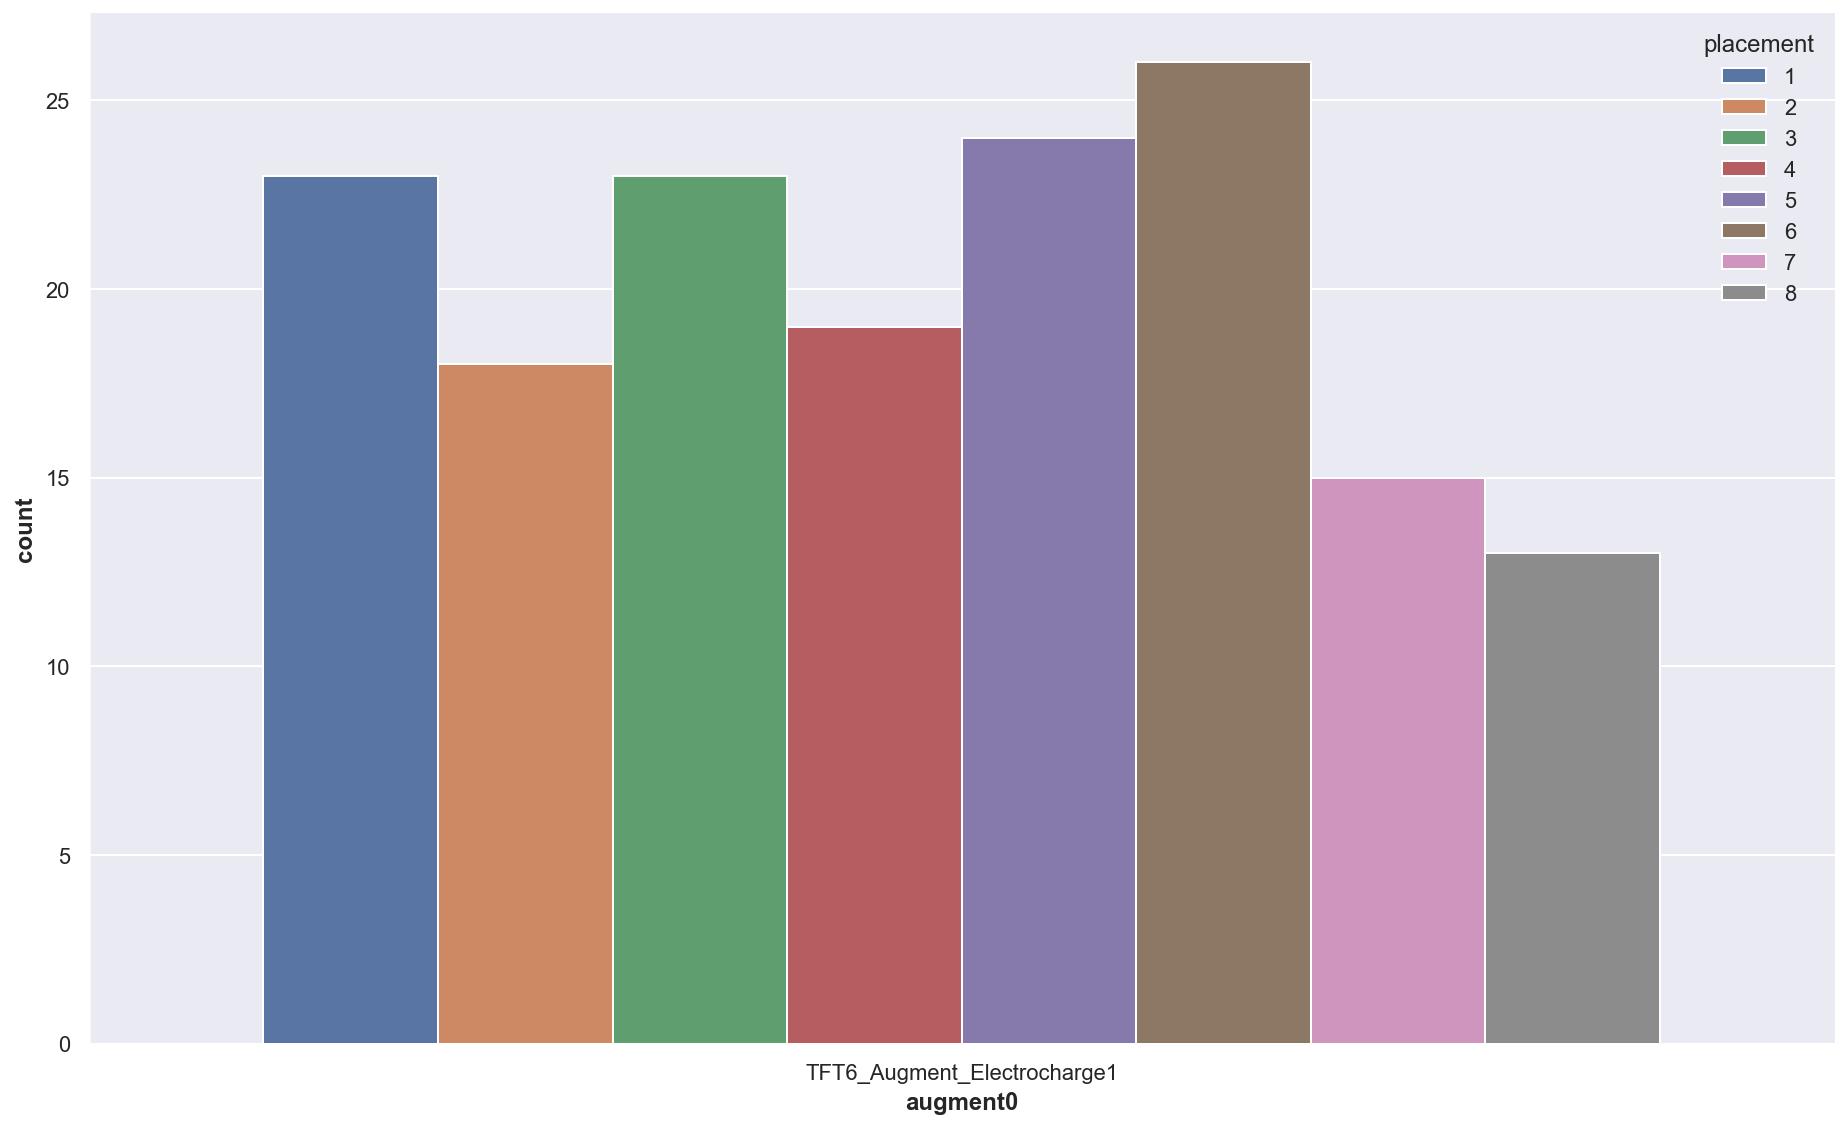

In [1254]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['augment0']=='TFT6_Augment_Electrocharge1'], x='augment0', hue=TARGETNAME)
sns.despine()

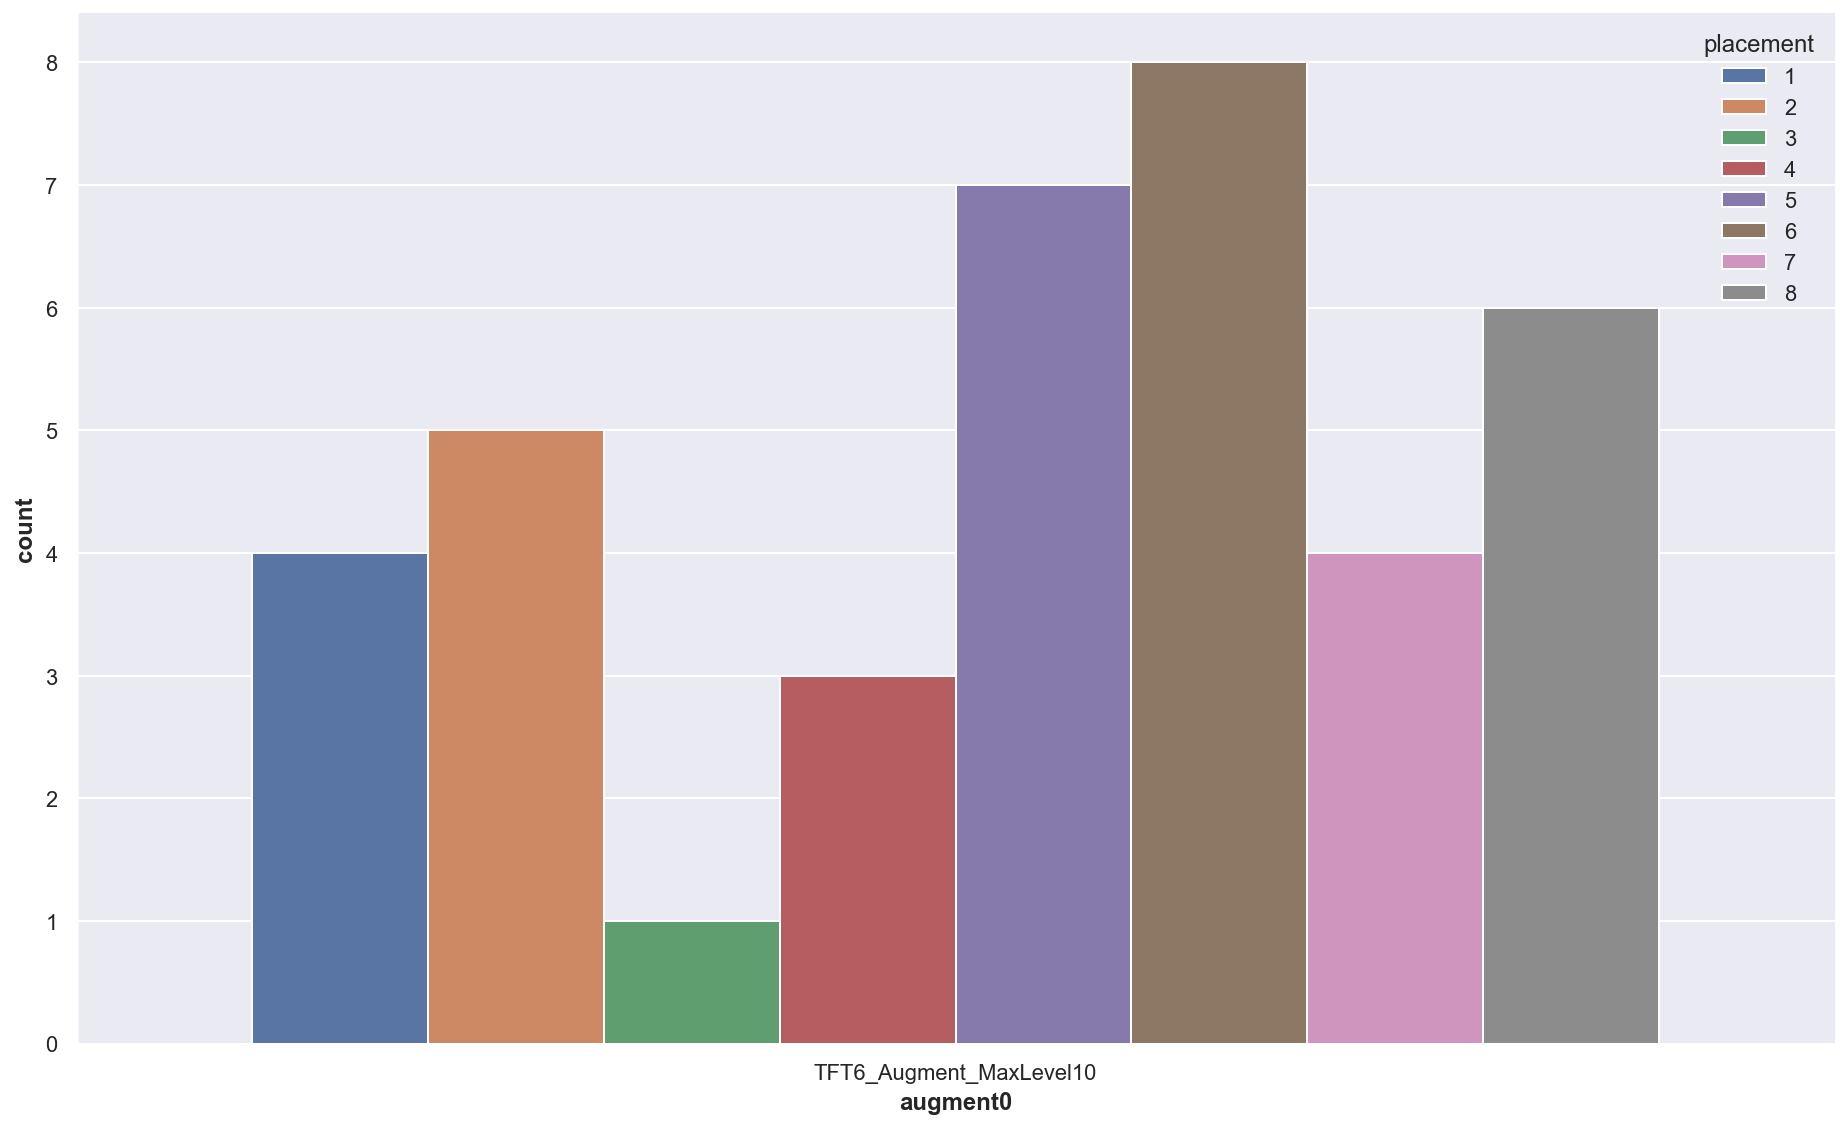

In [1255]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['augment0']=='TFT6_Augment_MaxLevel10'], x='augment0', hue=TARGETNAME)
sns.despine()

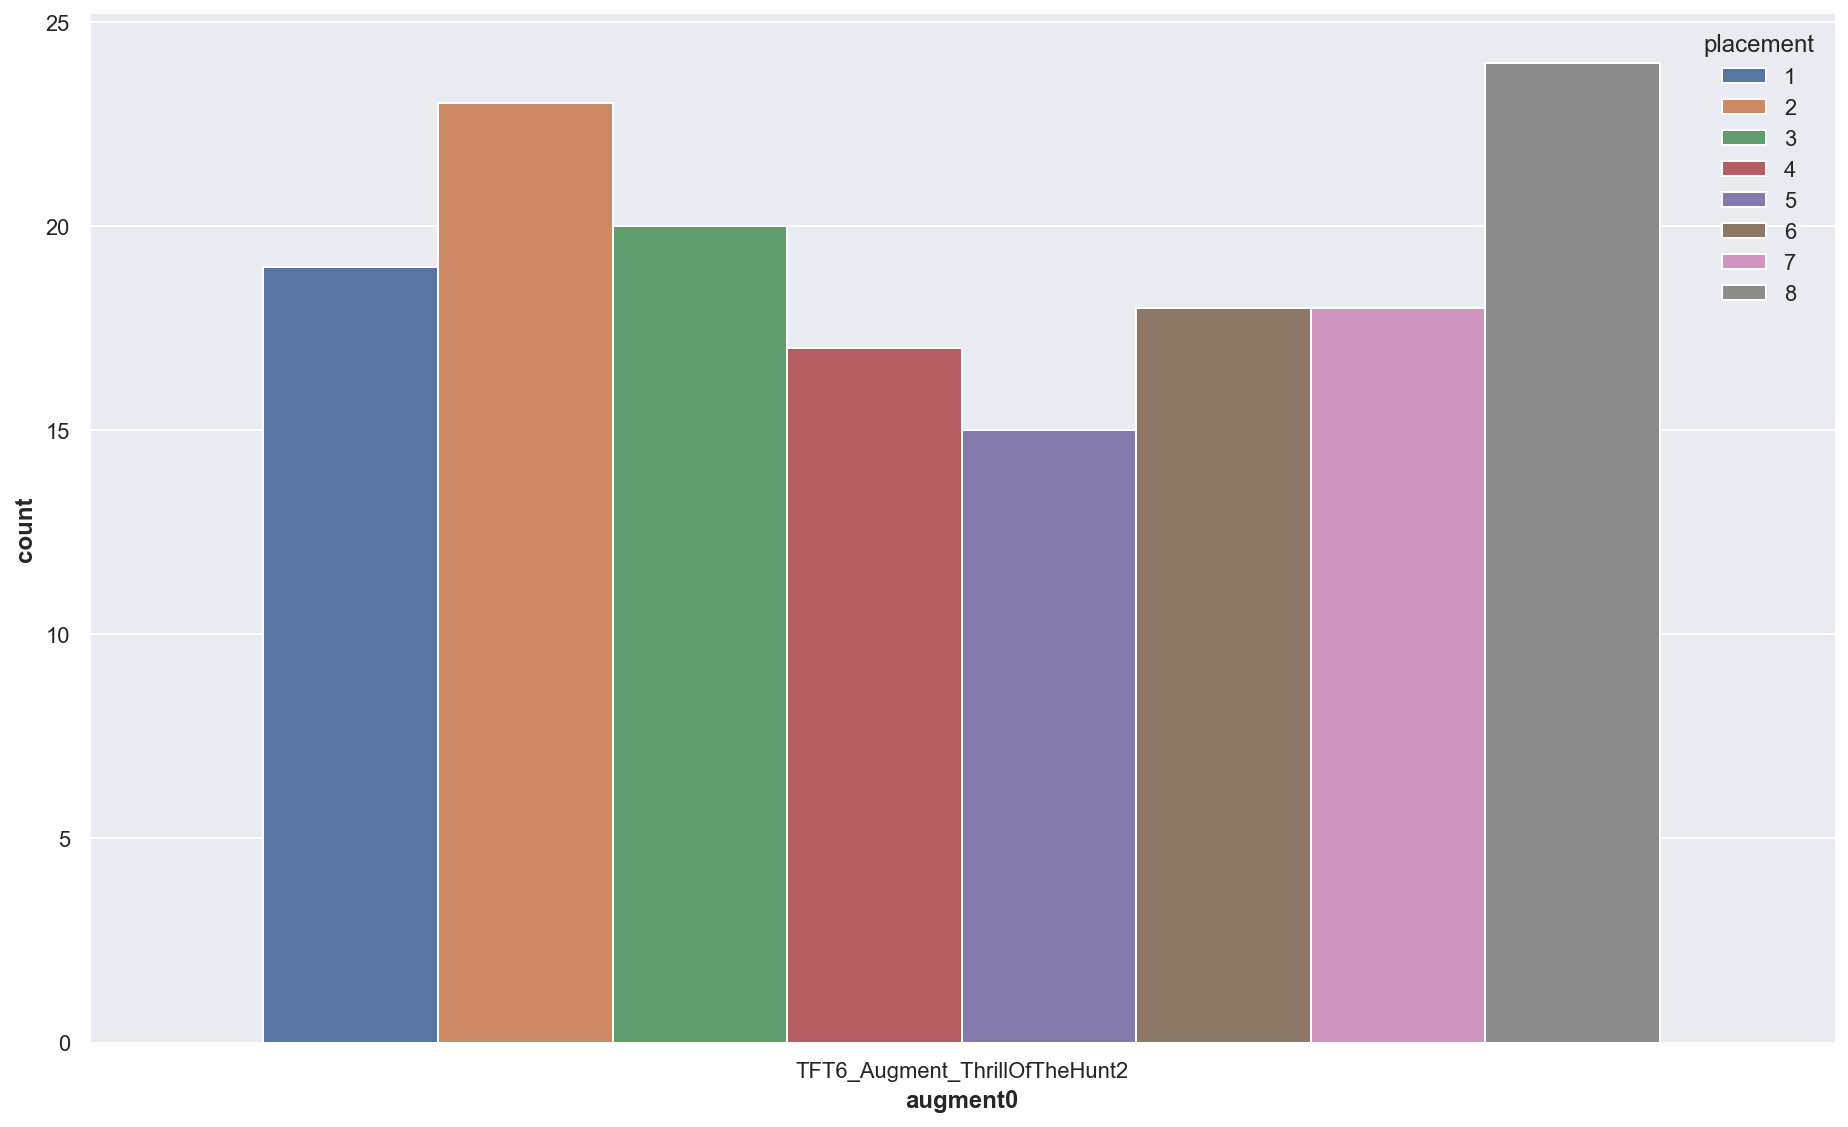

In [1256]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['augment0']=='TFT6_Augment_ThrillOfTheHunt2'], x='augment0', hue=TARGETNAME)
sns.despine()

In [1257]:
# filter and melt the dataframe
m = matches_df.filter(regex=r'placement|augment0').melt('placement', value_name='augment0')
# group and aggregate mean/median
dct = {'Value_Count': ('augment0', 'count'), 'average_placement': ('placement', 'mean')}
augment0_rank_df = m.groupby('augment0', as_index=False).agg(**dct).sort_values(by='average_placement')
augment0_rank_df[:30]

C:\Users\furyx\AppData\Local\Temp\ipykernel_10360\207590299.py:2: FutureWarning: This dataframe has a column name that matches the 'value_name' column name of the resulting Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.
  m = matches_df.filter(regex=r'placement|augment0').melt('placement', value_name='augment0')


augment0  Value_Count  average_placement
21                TFT6_Augment_Diversify2            2           2.500000
106              TFT7_Augment_CursedCrown            6           2.833333
174            TFT7_Augment_WarriorEmblem            7           2.857143
77         TFT7_Augment_AssassinCutthroat            2           3.000000
45               TFT6_Augment_Meditation3            8           3.125000
88              TFT7_Augment_BestFriends3           21           3.238095
142             TFT7_Augment_Preparation3            8           3.250000
148             TFT7_Augment_RevelEmblem2           24           3.291667
78            TFT7_Augment_AssassinEmblem           48           3.354167
128               TFT7_Augment_JadeTrait2           20           3.550000
115             TFT7_Augment_GadgetExpert           65           3.553846
167           TFT7_Augment_TempestEmblem2            3           3.666667
127                TFT7_Augment_JadeTrait           32           3.687500
72                    TFT6_Augment_Twins2           29           3.724138
168     TFT7_Augment_TempestEyeOfTheStorm           11           3.727273
67                 TFT6_Augment_TriForce1            5           3.800000
9        TFT6_Augment_CyberneticImplants1           37           3.810811
81    TFT7_Augment_AstralIntercosmicGifts           12           3.833333
92   TFT7_Augment_BruiserPersonalTraining           15           3.933333
1             TFT6_Augment_BandOfThieves2           17           3.941176
40           TFT6_Augment_MakeshiftArmor2           25           3.960000
153        TFT7_Augment_ScalescornEmblem2            3           4.000000
169             TFT7_Augment_TempestTrait            6           4.000000
145           TFT7_Augment_RagewingScorch           21           4.000000
48             TFT6_Augment_PortableForge          297           4.003367
87              TFT7_Augment_BestFriends2           84           4.059524
12          TFT6_Augment_CyberneticShell1           33           4.060606
49             TFT6_Augment_RadiantRelics           76           4.078947
132              TFT7_Augment_MageEmblem2            9           4.111111
112       TFT7_Augment_EvokerEssenceTheft            8           4.125000

In [1258]:
# filter and melt the dataframe
m = matches_df.filter(regex=r'placement|augment1').melt('placement', value_name='augment1')
# group and aggregate mean/median
dct = {'Value_Count': ('augment1', 'count'), 'average_placement': ('placement', 'mean')}
augment1_rank_df = m.groupby('augment1', as_index=False).agg(**dct).sort_values(by='average_placement')
augment1_rank_df[:30]

C:\Users\furyx\AppData\Local\Temp\ipykernel_10360\1890264867.py:2: FutureWarning: This dataframe has a column name that matches the 'value_name' column name of the resulting Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.
  m = matches_df.filter(regex=r'placement|augment1').melt('placement', value_name='augment1')


augment1  Value_Count  average_placement
66               TFT6_Augment_Traitless2            2           1.500000
67               TFT6_Augment_Traitless3            1           2.000000
65               TFT6_Augment_Traitless1            2           2.000000
156        TFT7_Augment_ScalescornEmblem            1           2.000000
146            TFT7_Augment_Preparation3            2           2.000000
97         TFT7_Augment_CannoneerHotShot           21           2.809524
113           TFT7_Augment_EvokerEmblem2            1           3.000000
112            TFT7_Augment_EvokerEmblem            1           3.000000
10      TFT6_Augment_CyberneticImplants2           23           3.086957
78          TFT7_Augment_AssassinEmblem2           13           3.384615
109      TFT7_Augment_DragonmancerEmblem           13           3.538462
152            TFT7_Augment_RevelEmblem2           14           3.571429
163       TFT7_Augment_ShimmerscaleTrait           12           3.583333
130              TFT7_Augment_JadeTrait2           21           3.619048
171    TFT7_Augment_TempestEyeOfTheStorm            3           3.666667
26           TFT6_Augment_Electrocharge3           58           3.724138
89               TFT7_Augment_BigFriend2           12           3.750000
126              TFT7_Augment_JadeEmblem           65           3.769231
47              TFT6_Augment_Meditation2           24           3.791667
161      TFT7_Augment_ShimmerscaleEmblem           16           3.812500
134              TFT7_Augment_MageEmblem           11           3.818182
108             TFT7_Augment_DragonHorde           58           3.827586
27          TFT6_Augment_Featherweights1           12           3.833333
54               TFT6_Augment_SalvageBin           42           3.857143
9       TFT6_Augment_CyberneticImplants1           42           3.857143
11      TFT6_Augment_CyberneticImplants3           15           3.866667
20              TFT6_Augment_Distancing3           16           3.875000
103     TFT7_Augment_CavalierForAllUnits            9           3.888889
71                   TFT6_Augment_Twins2           18           3.888889
93   TFT7_Augment_BruiserTitanicStrength           51           3.901961

In [1259]:
# filter and melt the dataframe
m = matches_df.filter(regex=r'placement|augment2').melt('placement', value_name='augment2')
# group and aggregate mean/median
dct = {'Value_Count': ('augment2', 'count'), 'average_placement': ('placement', 'mean')}
augment2_rank_df = m.groupby('augment2', as_index=False).agg(**dct).sort_values(by='average_placement')
augment2_rank_df[:30]

C:\Users\furyx\AppData\Local\Temp\ipykernel_10360\3922423790.py:2: FutureWarning: This dataframe has a column name that matches the 'value_name' column name of the resulting Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.
  m = matches_df.filter(regex=r'placement|augment2').melt('placement', value_name='augment2')


augment2  Value_Count  average_placement
56                  TFT6_Augment_Traitless3            1           1.000000
25             TFT6_Augment_Featherweights2            1           2.000000
146              TFT7_Augment_TempestEmblem            5           2.800000
18                  TFT6_Augment_Distancing            7           2.857143
121               TFT7_Augment_MysticTrait2            1           3.000000
55                  TFT6_Augment_Traitless2            1           3.000000
143           TFT7_Augment_SwiftshotEmblem2            6           3.166667
123                TFT7_Augment_Preparation            2           3.500000
82   TFT7_Augment_CavalierDevastatingCharge            5           3.600000
141         TFT7_Augment_ShimmerscaleTrait2            3           3.666667
11         TFT6_Augment_CyberneticImplants3           41           3.682927
89                 TFT7_Augment_DragonHorde           45           3.711111
2               TFT6_Augment_BandOfThieves2           33           3.757576
108      TFT7_Augment_JadeEternalProtection           49           3.775510
51                TFT6_Augment_TheGoldenEgg           49           3.775510
104               TFT7_Augment_GuildEmblem2           18           3.777778
152               TFT7_Augment_UrfsGrabBag2           51           3.784314
7           TFT6_Augment_CelestialBlessing3           66           3.803030
69                TFT7_Augment_BestFriends2          144           3.805556
137         TFT7_Augment_ShapeshifterTrait2            7           3.857143
72                  TFT7_Augment_BigFriend2          107           3.869159
111                 TFT7_Augment_JadeTrait2           23           3.869565
58                    TFT6_Augment_Weakspot           68           3.897059
67              TFT7_Augment_BandOfThieves1           26           3.923077
107                 TFT7_Augment_JadeEmblem           13           3.923077
39                 TFT6_Augment_Meditation1           18           3.944444
5           TFT6_Augment_CelestialBlessing1           38           3.947368
135      TFT7_Augment_ShapeshifterBeastsDen           44           3.977273
70                TFT7_Augment_BestFriends3           33           4.000000
96                 TFT7_Augment_EvokerTrait            2           4.000000

# Baseline Model

In [1260]:
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, accuracy_score, log_loss, confusion_matrix, roc_curve, precision_recall_curve
from collections import defaultdict
from sklearn.linear_model import LogisticRegression
from xgboost import XGBRegressor

In [1261]:
xgb = XGBRegressor(objective='reg:squarederror', eval_metric='mae', 
                    n_estimators=150) #, use_label_encoder=False hist tree_method='hist', enable_categorical=True,

In [1262]:
le_target = LabelEncoder()

one_hot_encoder = OneHotEncoder(handle_unknown="ignore", sparse=False)
augment_oe = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=9999)
item_oe = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=9999)
preproc = StandardScaler()

# Encode label.
# y = le_target.fit_transform(y)

In [1263]:
# Encode category columns.
xgb_regressor_pipeline = Pipeline([
    ('preprocess', ColumnTransformer(
        transformers=[
            ("one_hot_time", one_hot_encoder, categorical_cols),
            # ("augment", augment_oe, categorical_cols[:3]),
            # ("item", item_oe, categorical_cols[3:]),
        ],
        remainder=preproc,
        verbose_feature_names_out=False,
    )),
    ('classifier', xgb),]
)

In [1264]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.85, random_state=42, stratify=match_id_df) # , stratify=match_id_df

xgb_regressor_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('one_hot_time',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['augment0', 'augment1',
                                                   'augment2',
                                                   'TFT7_Ashe_item0',
                                                   'TFT7_Ashe_item1',
                                                   'TFT7_Ashe_item2',
                                                   'TFT7_Anivia_item0',
                                                   'TFT7_Neeko_item0',
                                                   'TFT7_Neeko_item1',
                                                   'TFT7_Neeko_item2',
                                                   'TFT7_DragonGreen_item0',
                                                   'TF...
                              gamma=0, gpu_id=-1, grow_policy='depthwise',
                              importance_type=None, interaction_constraints='',
                              learning_rate=0.300000012, max_bin=256,
                              max_cat_to_onehot=4, max_delta_step=0,
                              max_depth=6, max_leaves=0, min_child_weight=1,
                              missing=nan, monotone_constraints='()',
                              n_estimators=150, n_jobs=0, num_parallel_tree=1,
                              predictor='auto', random_state=0, reg_alpha=0,
                              reg_lambda=1, ...))])

In [1265]:
y_pred = xgb_regressor_pipeline.predict(X_test)

In [1266]:
# evaluate the model using a given test condition
def evaluate_model(cv):
	# get the model
	# evaluate the model
	scores = cross_val_score(xgb_regressor_pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	# return scores
	return np.mean(scores), scores.min(), scores.max()

In [1267]:
# # calculate the ideal test condition
# ideal, _, _ = evaluate_model(LeaveOneOut())
# print('Ideal: %.3f' % ideal)
# # define folds to test
# folds = range(2,31)
# # record mean and min/max of each set of results
# means, mins, maxs = list(),list(),list()
# # evaluate each k value
# for k in folds:
# 	# define the test condition
# 	cv = KFold(n_splits=k, shuffle=True, random_state=1)
# 	# evaluate k value
# 	k_mean, k_min, k_max = evaluate_model(cv)
# 	# report performance
# 	print('> folds=%d, accuracy=%.3f (%.3f,%.3f)' % (k, k_mean, k_min, k_max))
# 	# store mean accuracy
# 	means.append(k_mean)
# 	# store min and max relative to the mean
# 	mins.append(k_mean - k_min)
# 	maxs.append(k_max - k_mean)
# # line plot of k mean values with min/max error bars
# pyplot.errorbar(folds, means, yerr=[mins, maxs], fmt='o')
# # plot the ideal case in a separate color
# pyplot.plot(folds, [ideal for _ in range(len(folds))], color='r')
# # show the plot
# pyplot.show()

In [1268]:
def plot_cm(cm):
    metrics = {
        'accuracy': cm / cm.sum(),
        'recall' : cm / cm.sum(axis = 1 ),
        'precision': cm / cm.sum(axis = 0)
    }
    
    fig, ax = plt.subplots(1,3, tight_layout = True, figsize = (20,6))
    ax = ax.flatten()
#     mask = (np.eye(cm.shape[0]) == 0) * 1
    for idx, (name, matrix) in enumerate(metrics.items()):
        ax[idx].set_title(name)
        sns.heatmap(
            data = matrix,
            cmap = sns.dark_palette("#69d", reverse=True, as_cmap=True),
            cbar = False,
#             mask=mask,
            lw = 0.25,
            annot = True,
            fmt = '.2f',
            ax = ax[idx]
        )
#         for tick in ax[idx].get_xticklabels():
#                 tick.set_rotation(60)
                
    sns.despine()
    
def plot_cm_error(cm):
    mask = (np.eye(cm.shape[0]) != 0) * 1
    fig, ax = plt.subplots(tight_layout=True, figsize=(15,8))
    sns.heatmap(
                data = pd.DataFrame(data=cm, index=le_target.classes_, columns = le_target.classes_),
#                 cmap=sns.dark_palette("#69d", reverse=True, as_cmap=True),
                cbar = False,
                lw = 0.25,
                mask = mask,
                annot = True,
                fmt = '.0f',
                ax = ax
            )
    plt.xticks(rotation=45)
    plt.tight_layout()
    sns.despine()

In [1269]:
# create confusion matrix, calculate accuracy,recall & precision
# cm = pd.DataFrame(data = confusion_matrix(le_target.inverse_transform(y_test), y_pred, labels = le_target.classes_), index = le_target.classes_, columns = le_target.classes_)
# plot_cm(cm)

In [1270]:
len(y_test)

1095

In [1271]:
y_pred.shape

(1095,)

In [1272]:
def plot_oof(y_true, y_predict):
    area = (30 * np.random.rand(len(y_predict)))**2 
    # Plot y_true vs. y_pred
    plt.figure(figsize=(10, 10))
    plt.scatter(y_true, y_predict, s=area, color='r', alpha=0.2)
    plt.plot([plt.xlim()[0], plt.xlim()[1]], [plt.xlim()[0], plt.xlim()[1]], '--', color='k')
    plt.gca().set_aspect('equal')
    plt.xlabel('y_true')
    plt.ylabel('y_pred')
    plt.title('OOF Predictions')
    plt.show()

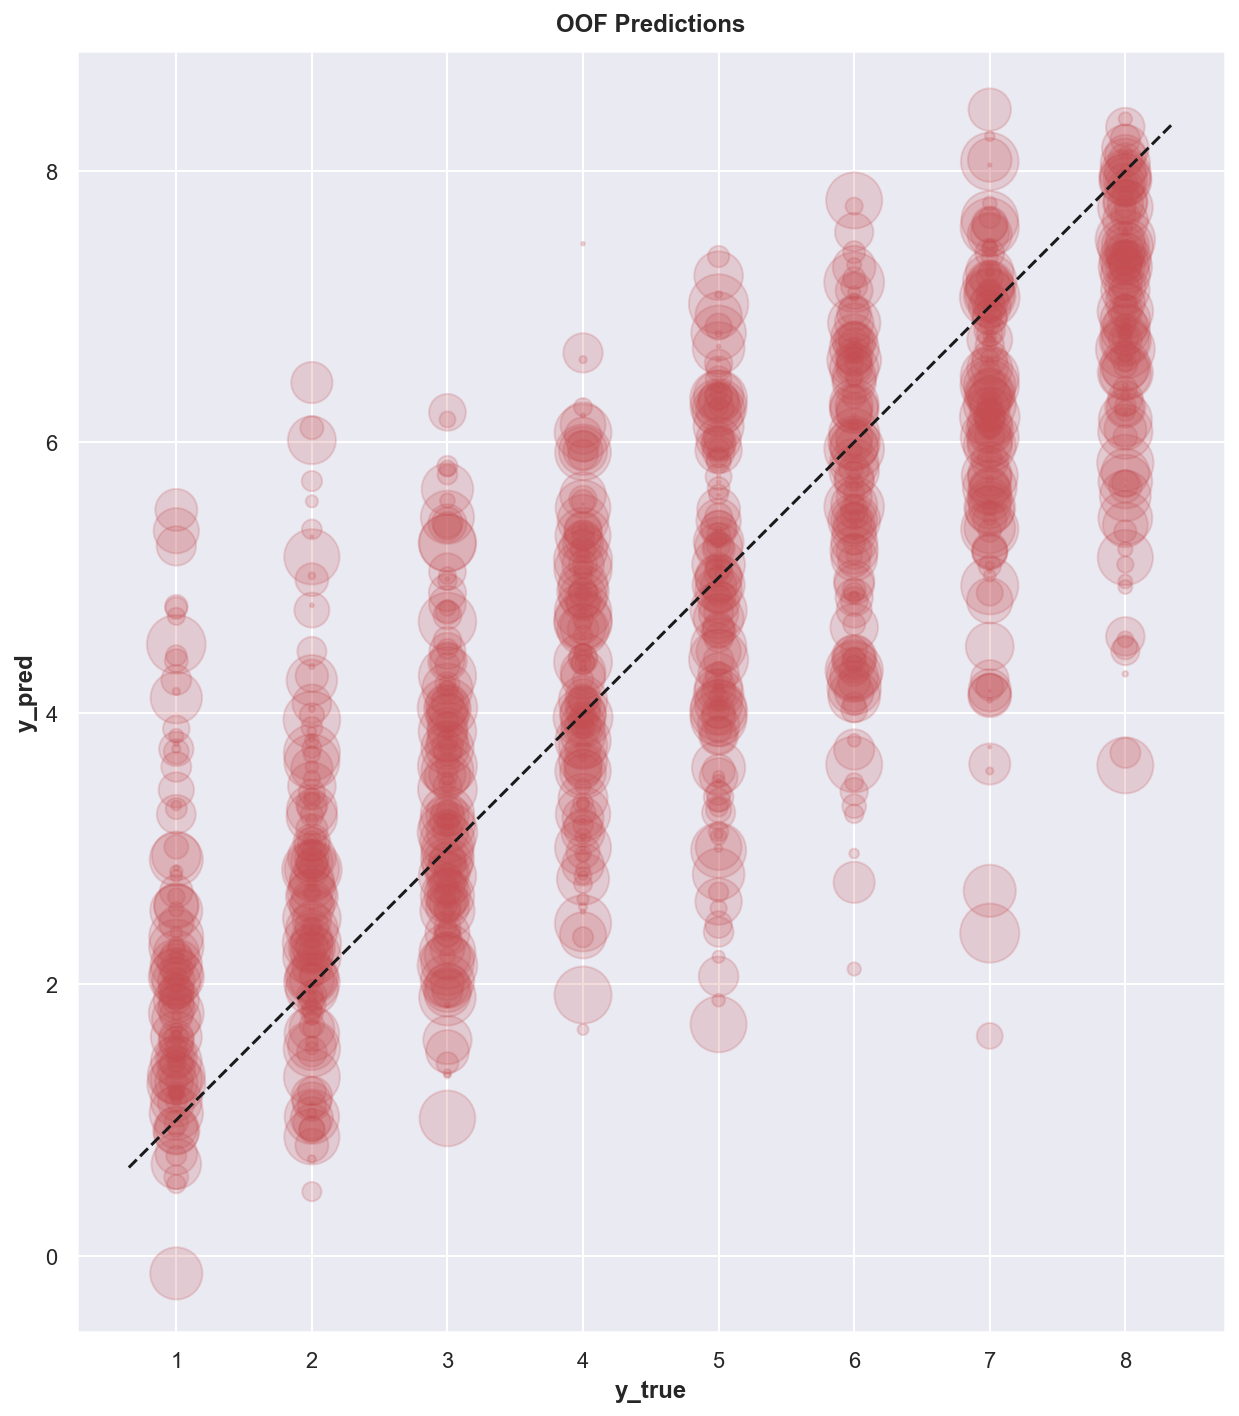

In [1273]:
plot_oof(y_test, y_pred)

In [1274]:
min(y_pred)

-0.13128245

In [1275]:
mean_absolute_error(y_test, y_pred)

1.0388852

In [1276]:
mean_squared_error(y_test, y_pred)

1.8397375

In [1277]:
print(f"XGB train score : {xgb_regressor_pipeline.score(X_train, y_train):.3f}")
print(f"XGB test score: {xgb_regressor_pipeline.score(X_test, y_test):.3f}")

XGB train score : 0.885
XGB test score: 0.634


# mdi_importances

In [1278]:
feature_names = xgb_regressor_pipeline[:-1].get_feature_names_out()
mdi_importances = pd.Series(
    xgb_regressor_pipeline[-1].feature_importances_, index=feature_names
).sort_values(ascending=True)

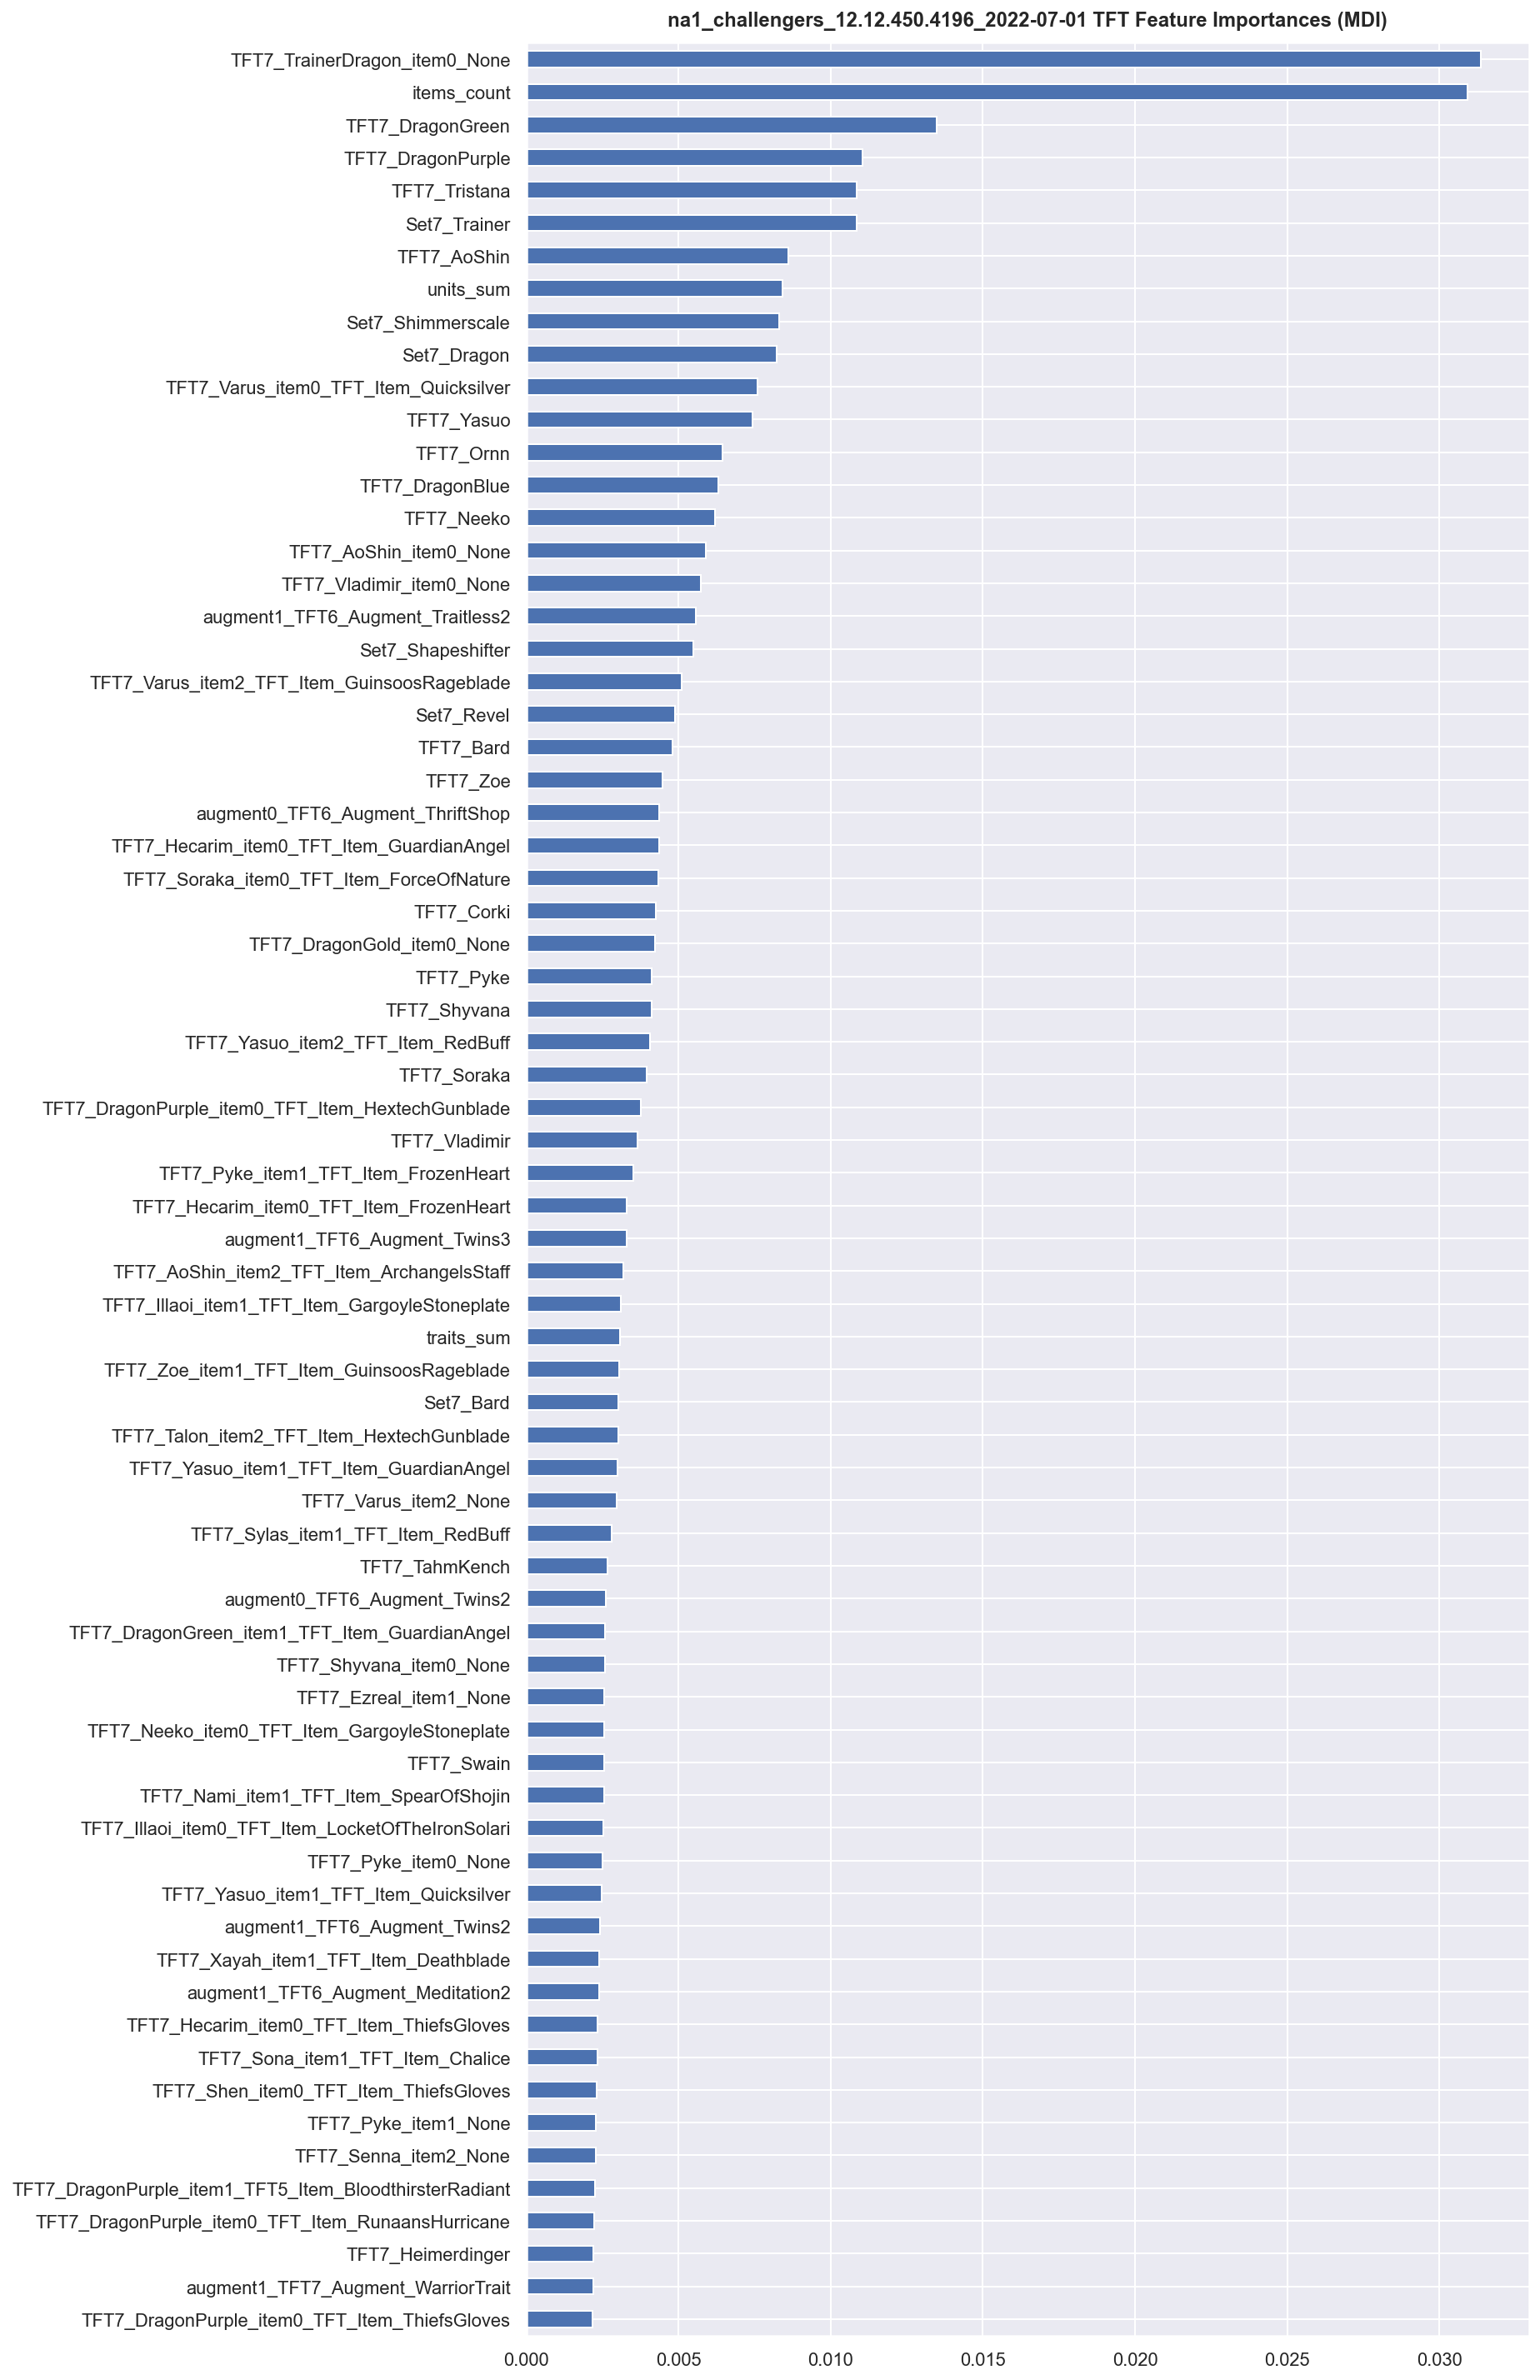

In [1279]:
plt.figure(figsize=(13, 20))
ax = mdi_importances[-70:].plot.barh()
ax.set_title(f"{SERVER}_{LEAGUE}_{LATEST_RELEASE}_{PATCH} TFT Feature Importances (MDI)")
ax.figure.tight_layout()

In [1280]:
mdi_importances.to_csv(os.path.join(ASSETS_DIR, f'{SERVER}_{LEAGUE}_{LATEST_RELEASE}_{PATCH}_mdi_importances.csv'))

In [1281]:
mdi_importances[-60:]

augment1_TFT6_Augment_Meditation2                   0.002377
TFT7_Xayah_item1_TFT_Item_Deathblade                0.002392
augment1_TFT6_Augment_Twins2                        0.002416
TFT7_Yasuo_item1_TFT_Item_Quicksilver               0.002473
TFT7_Pyke_item0_None                                0.002500
TFT7_Illaoi_item0_TFT_Item_LocketOfTheIronSolari    0.002526
TFT7_Nami_item1_TFT_Item_SpearOfShojin              0.002544
TFT7_Swain                                          0.002549
TFT7_Neeko_item0_TFT_Item_GargoyleStoneplate        0.002554
TFT7_Ezreal_item1_None                              0.002560
TFT7_Shyvana_item0_None                             0.002568
TFT7_DragonGreen_item1_TFT_Item_GuardianAngel       0.002574
augment0_TFT6_Augment_Twins2                        0.002610
TFT7_TahmKench                                      0.002669
TFT7_Sylas_item1_TFT_Item_RedBuff                   0.002810
TFT7_Varus_item2_None                               0.002952
TFT7_Yasuo_item1_TFT_Ite

In [1282]:
from sklearn.inspection import permutation_importance

result = permutation_importance(
    xgb_regressor_pipeline, X_test, y_test, n_repeats=5, random_state=42, n_jobs=2
)

sorted_importances_idx = result.importances_mean.argsort()

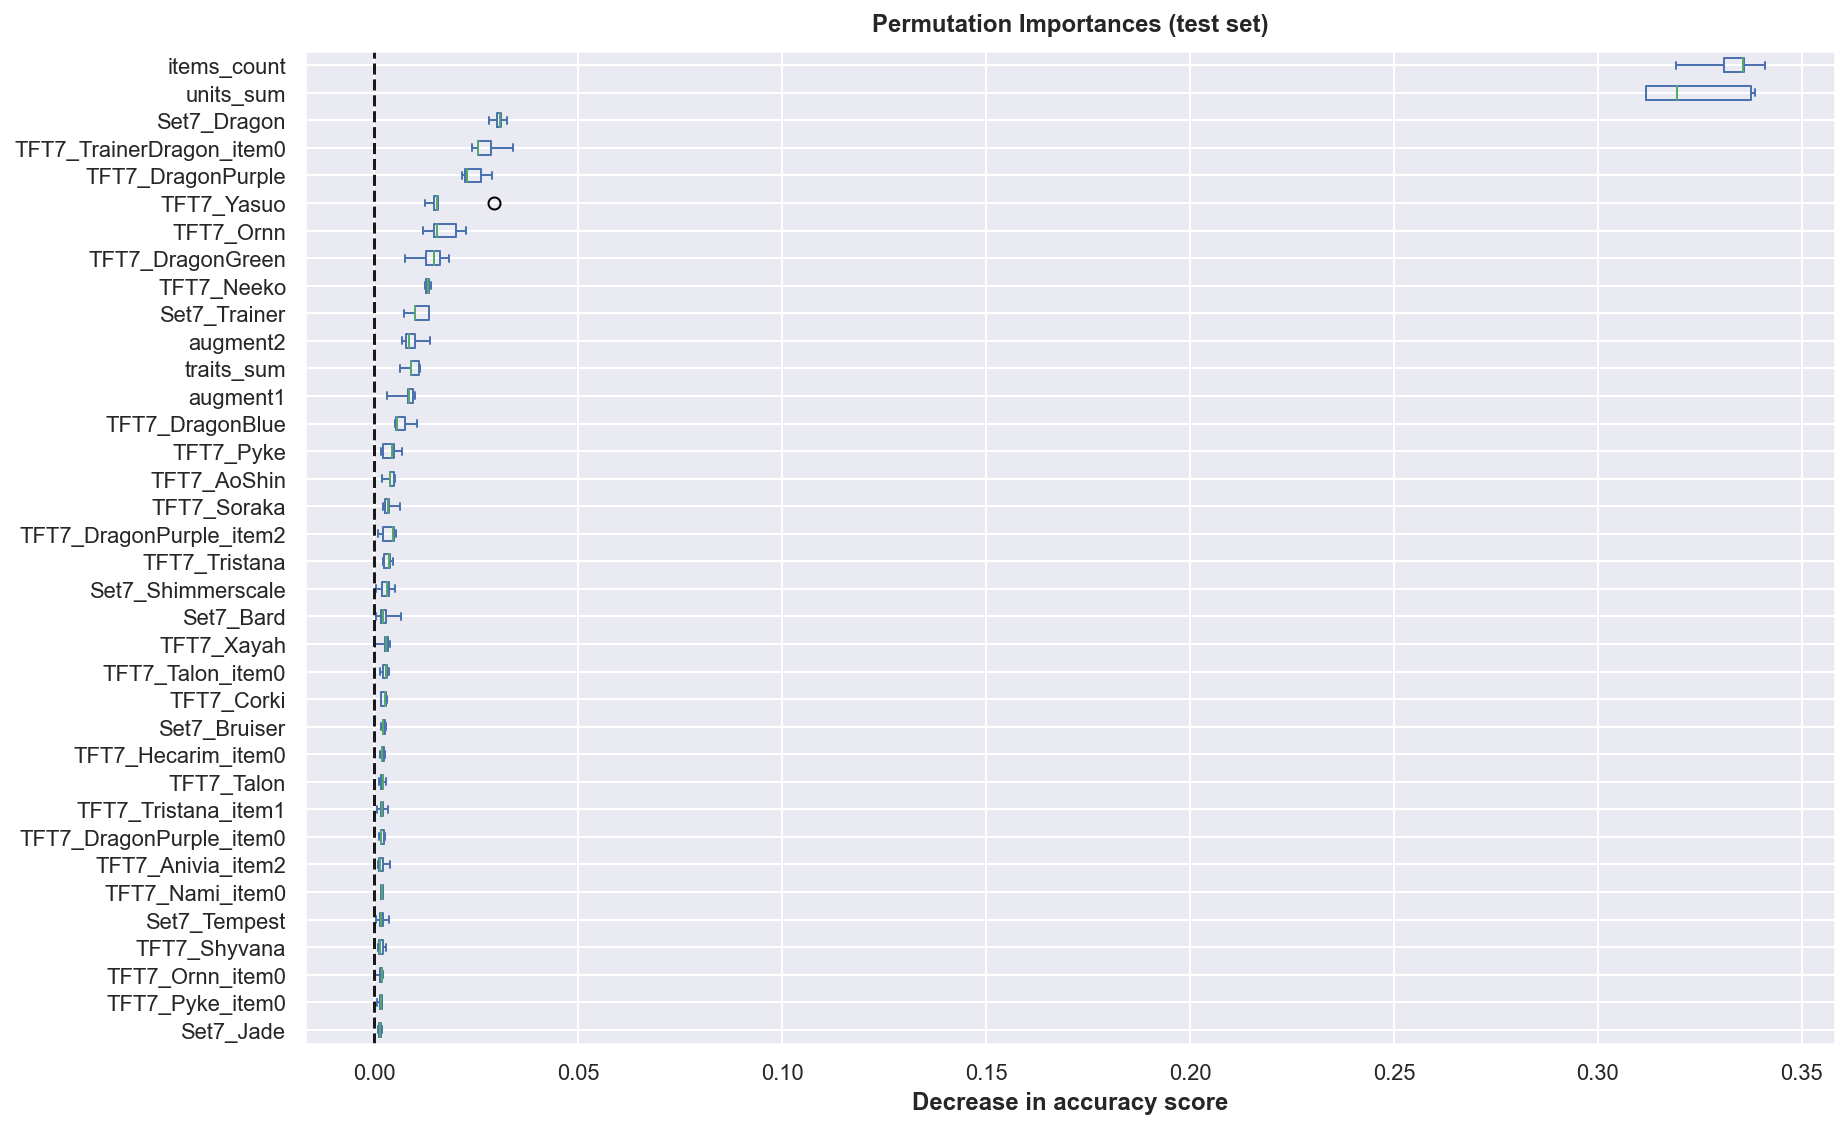

In [1283]:
importances = pd.DataFrame(
    result.importances[sorted_importances_idx[-36:]].T,
    columns=X.columns[sorted_importances_idx[-36:]],
)
# plt.figure(figsize=(15, 30))
ax = importances.plot.box(vert=False, whis=10)
ax.set_title("Permutation Importances (test set)")
ax.axvline(x=0, color="k", linestyle="--")
ax.set_xlabel("Decrease in accuracy score")
ax.figure.tight_layout()

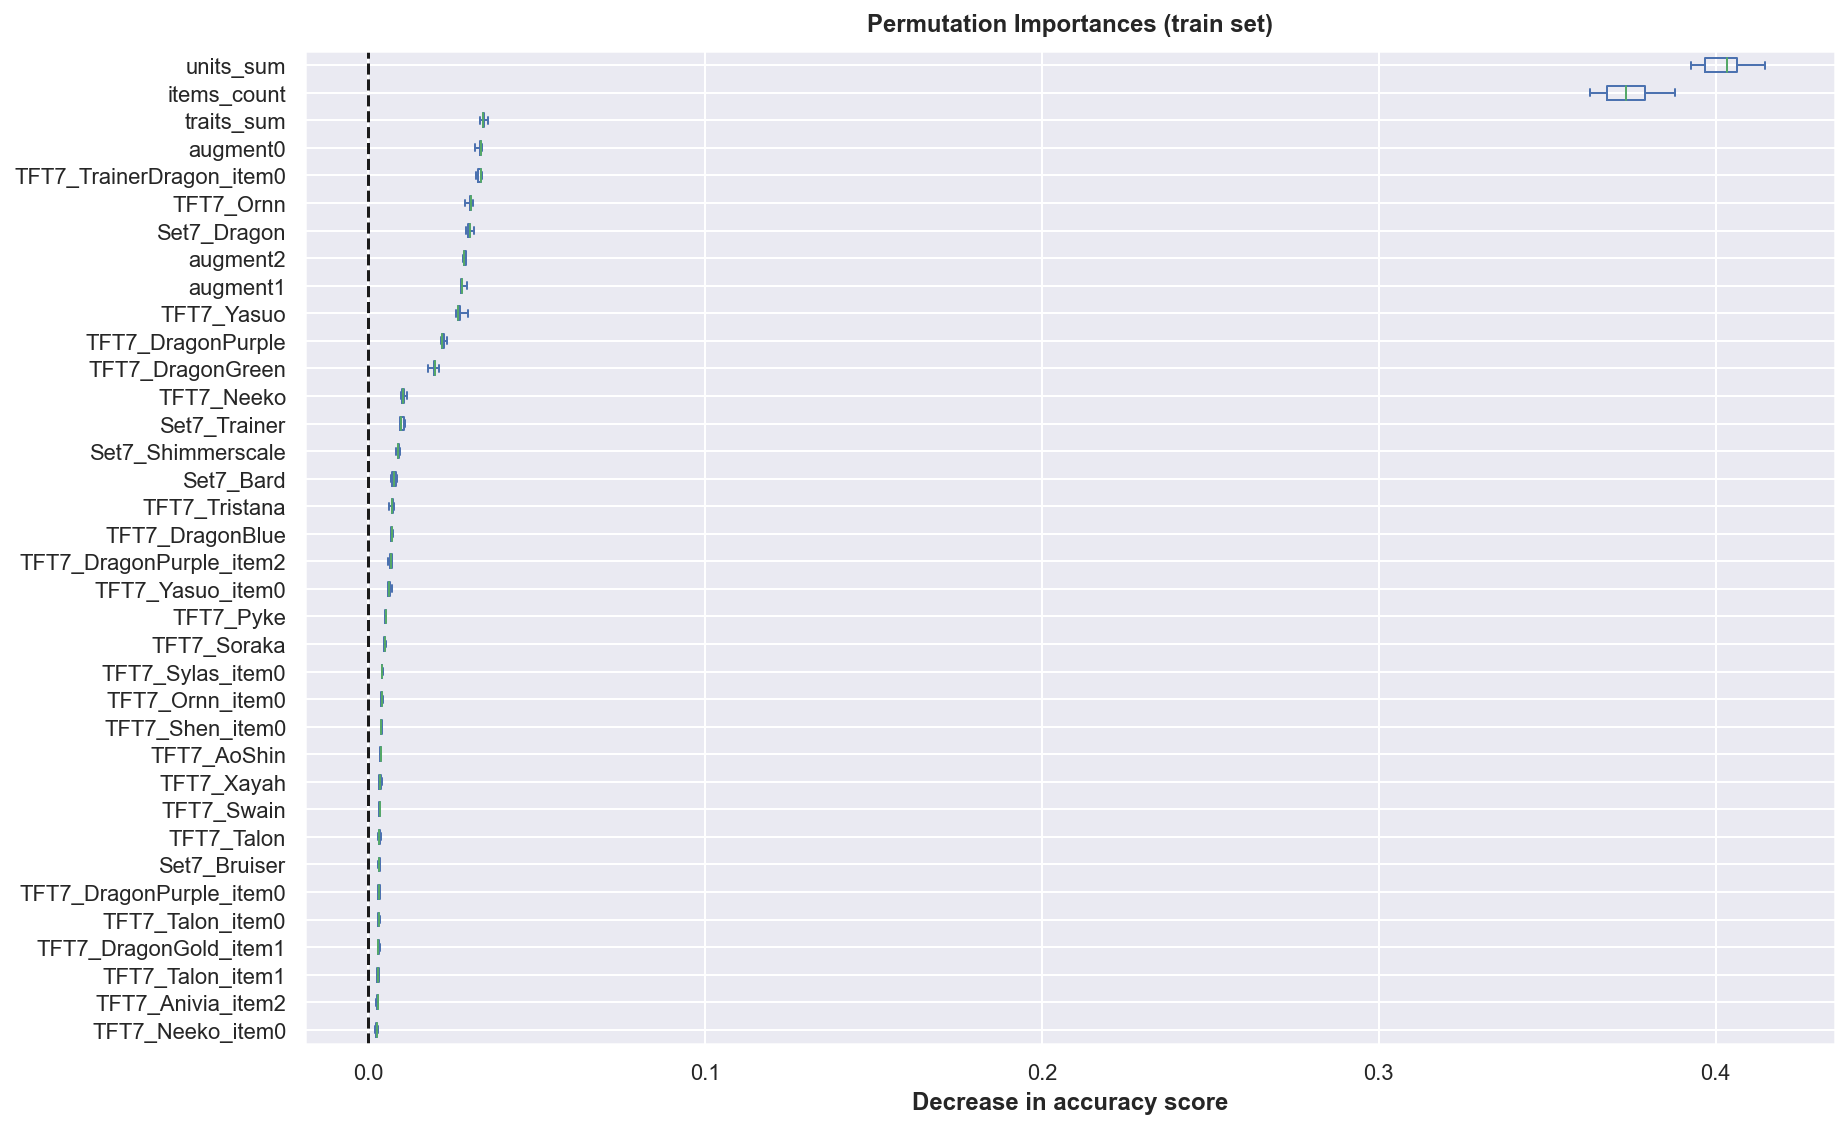

In [1284]:
result = permutation_importance(
    xgb_regressor_pipeline, X_train, y_train, n_repeats=5, random_state=42, n_jobs=2
)

sorted_importances_idx = result.importances_mean.argsort()
importances = pd.DataFrame(
    result.importances[sorted_importances_idx[-36:]].T,
    columns=X.columns[sorted_importances_idx[-36:]],
)
ax = importances.plot.box(vert=False, whis=10)
ax.set_title("Permutation Importances (train set)")
ax.axvline(x=0, color="k", linestyle="--")
ax.set_xlabel("Decrease in accuracy score")
ax.figure.tight_layout()

In [1285]:
xgb_regressor_pipeline

Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('one_hot_time',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['augment0', 'augment1',
                                                   'augment2',
                                                   'TFT7_Ashe_item0',
                                                   'TFT7_Ashe_item1',
                                                   'TFT7_Ashe_item2',
                                                   'TFT7_Anivia_item0',
                                                   'TFT7_Neeko_item0',
                                                   'TFT7_Neeko_item1',
                                                   'TFT7_Neeko_item2',
                                                   'TFT7_DragonGreen_item0',
                                                   'TF...
                              gamma=0, gpu_id=-1, grow_policy='depthwise',
                              importance_type=None, interaction_constraints='',
                              learning_rate=0.300000012, max_bin=256,
                              max_cat_to_onehot=4, max_delta_step=0,
                              max_depth=6, max_leaves=0, min_child_weight=1,
                              missing=nan, monotone_constraints='()',
                              n_estimators=150, n_jobs=0, num_parallel_tree=1,
                              predictor='auto', random_state=0, reg_alpha=0,
                              reg_lambda=1, ...))])

In [1286]:
xgb_regressor_pipeline.set_params(classifier__n_estimators=10).fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('one_hot_time',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['augment0', 'augment1',
                                                   'augment2',
                                                   'TFT7_Ashe_item0',
                                                   'TFT7_Ashe_item1',
                                                   'TFT7_Ashe_item2',
                                                   'TFT7_Anivia_item0',
                                                   'TFT7_Neeko_item0',
                                                   'TFT7_Neeko_item1',
                                                   'TFT7_Neeko_item2',
                                                   'TFT7_DragonGreen_item0',
                                                   'TF...
                              gamma=0, gpu_id=-1, grow_policy='depthwise',
                              importance_type=None, interaction_constraints='',
                              learning_rate=0.300000012, max_bin=256,
                              max_cat_to_onehot=4, max_delta_step=0,
                              max_depth=6, max_leaves=0, min_child_weight=1,
                              missing=nan, monotone_constraints='()',
                              n_estimators=10, n_jobs=0, num_parallel_tree=1,
                              predictor='auto', random_state=0, reg_alpha=0,
                              reg_lambda=1, ...))])

Observing the accuracy score on the training and testing set, we observe that
the two metrics are very similar now. Therefore, our model is not overfitting
anymore. We can then check the permutation importances with this new model.

In [1287]:
print(f"XGB train score : {xgb_regressor_pipeline.score(X_train, y_train):.3f}")
print(f"XGB test score: {xgb_regressor_pipeline.score(X_test, y_test):.3f}")

XGB train score : 0.725
XGB test score: 0.614


In [1288]:
train_result = permutation_importance(
    xgb_regressor_pipeline, X_train, y_train, n_repeats=5, random_state=42, n_jobs=2
)
test_results = permutation_importance(
    xgb_regressor_pipeline, X_test, y_test, n_repeats=5, random_state=42, n_jobs=2
)
sorted_importances_idx = train_result.importances_mean.argsort()

train_importances = pd.DataFrame(
    train_result.importances[sorted_importances_idx[-36:]].T,
    columns=X.columns[sorted_importances_idx[-36:]],
)
test_importances = pd.DataFrame(
    test_results.importances[sorted_importances_idx[-36:]].T,
    columns=X.columns[sorted_importances_idx[-36:]],
)

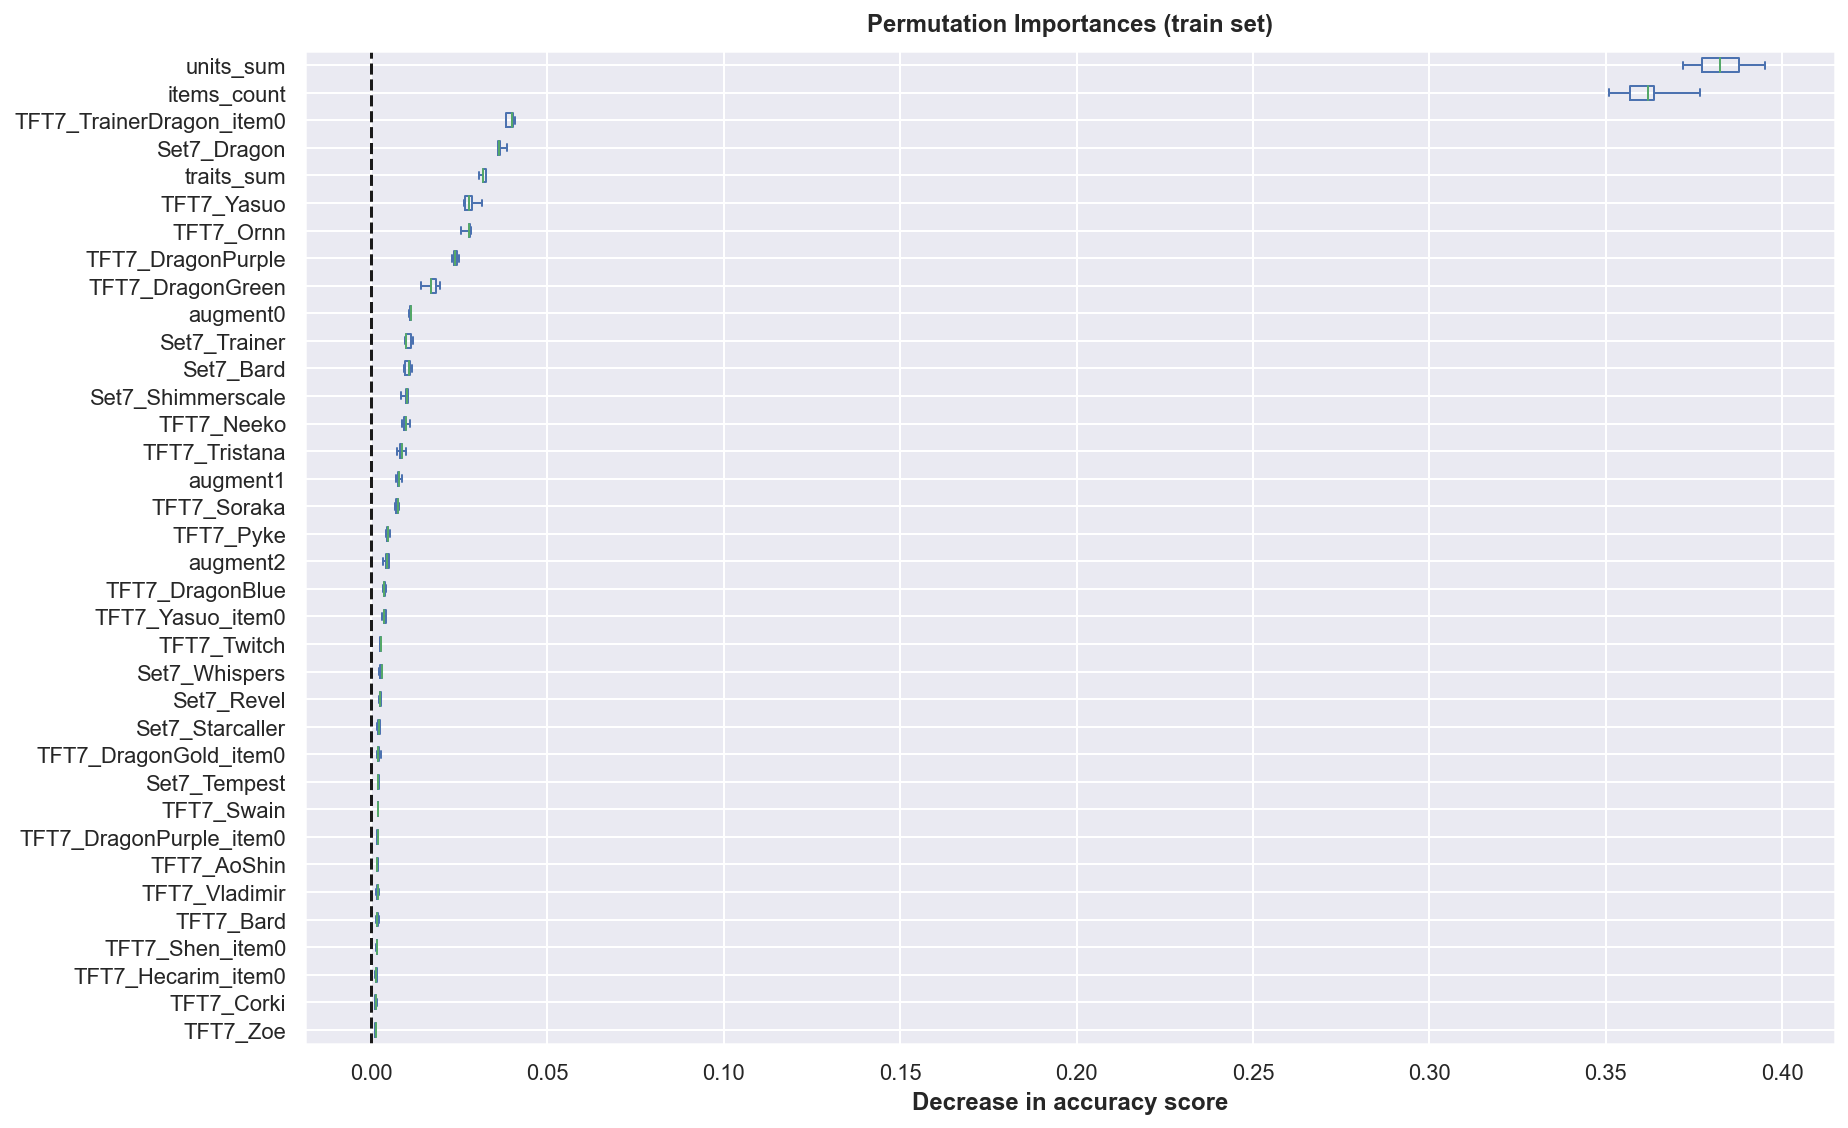

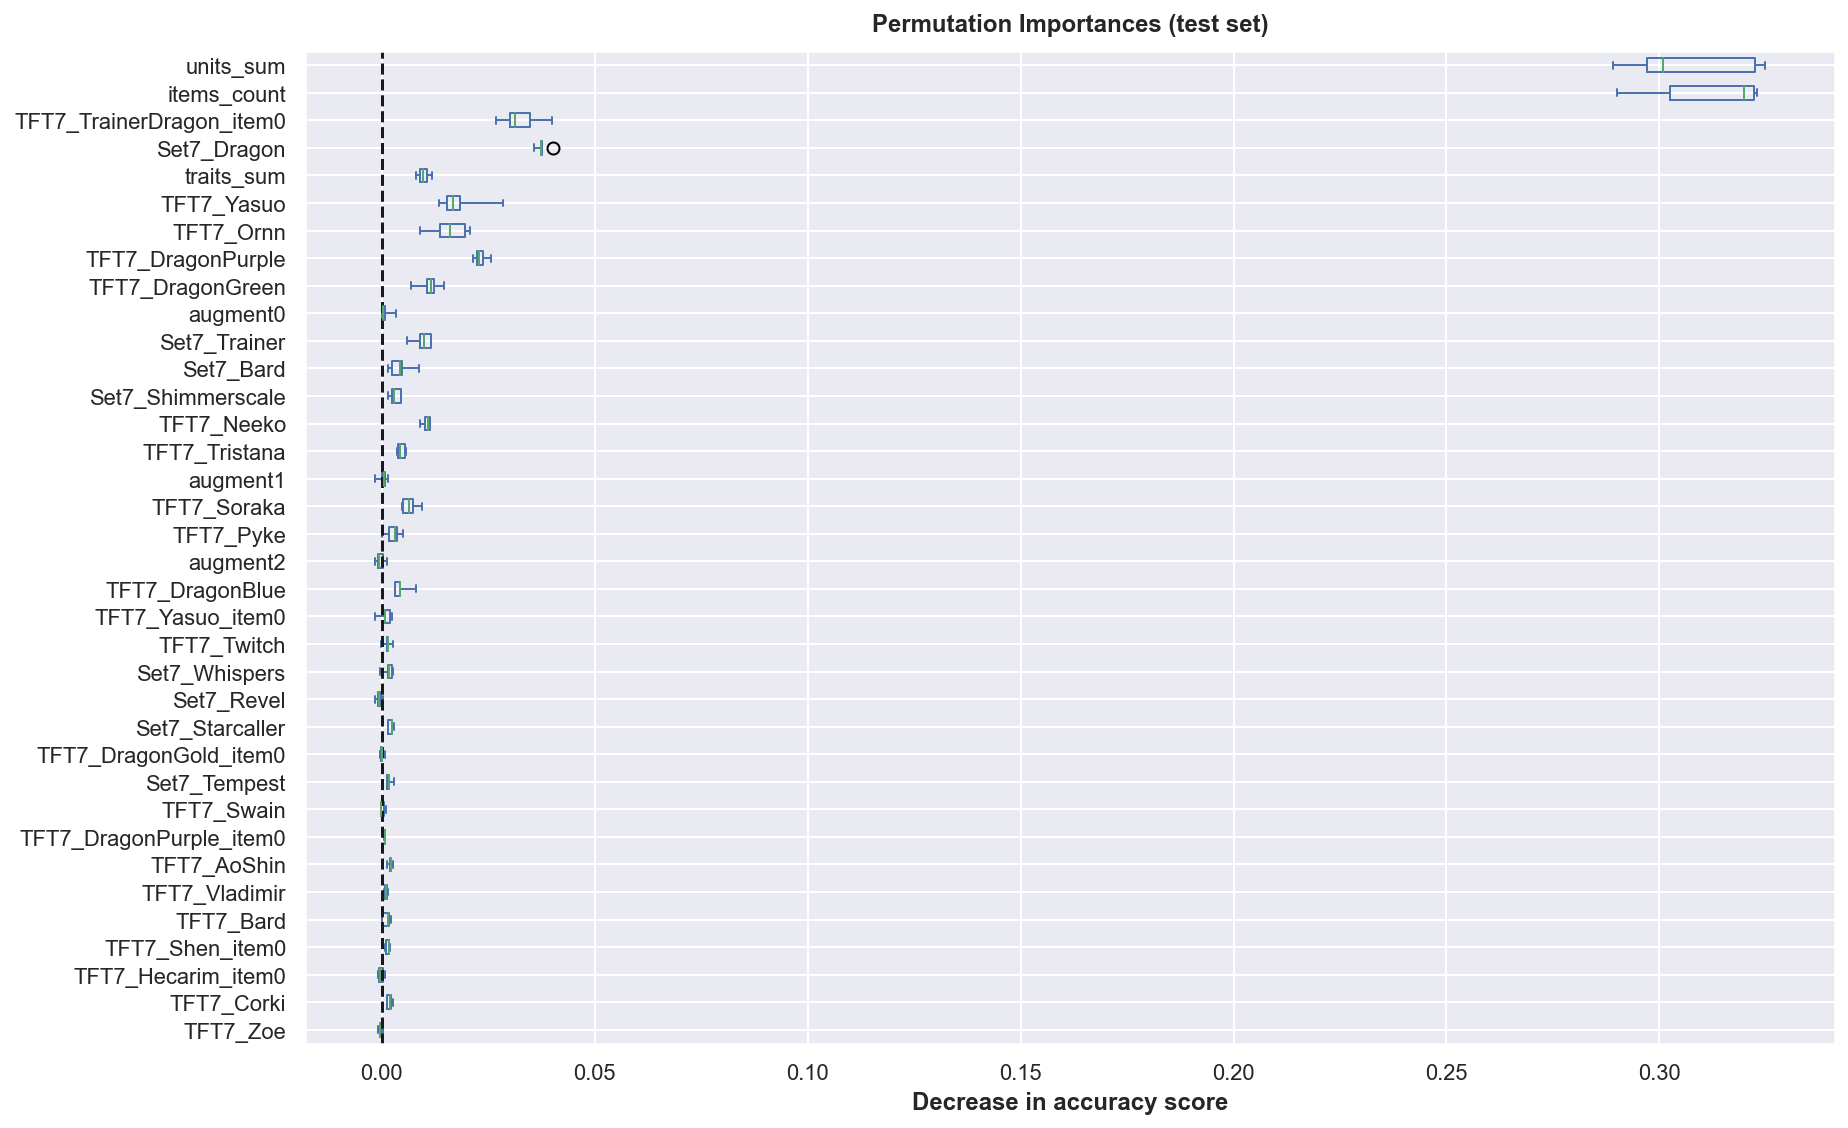

In [1289]:
for name, importances in zip(["train", "test"], [train_importances, test_importances]):
    ax = importances.plot.box(vert=False, whis=10)
    ax.set_title(f"Permutation Importances ({name} set)")
    ax.set_xlabel("Decrease in accuracy score")
    ax.axvline(x=0, color="k", linestyle="--")
    ax.figure.tight_layout()